In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline

In [3]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
env_size = 10
plots_dir = "plots"


In [4]:
# Parameters
plots_dir = "notebooks/output/benchmark/plots"


In [5]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env)

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/envs/registration.py:481: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.identifiers to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.identifiers` for environment variables or `env.get_wrapper_attr('identifiers')` that will search the reminding wrappers.
  logger.warn(


In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, _, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sample_valid_action to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sample_valid_action` for environment variables or `env.get_wrapper_attr('sample_valid_action')` that will search the reminding wrappers.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/minicond

Episode 1|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 9|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  132.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  138.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  146.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  246.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  246.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  260.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  260.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  262.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  262.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  268.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  268.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  368.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  368.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  374.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  374.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  388.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  388.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  394.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  394.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  494.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  494.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:  500.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:  500.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  514.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  514.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  516.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  516.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  616.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  616.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  618.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  618.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  620.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  620.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  626.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  626.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  632.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  632.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  643.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  643.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  651.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  651.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 193|reward:  651.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  657.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  657.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  666.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  666.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 258|reward:  766.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 258|reward:  766.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 1|Iteration 267|reward:  777.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 1|Iteration 267|reward:  777.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 1|Iteration 280|reward:  779.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 1|Iteration 280|reward:  779.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 1|Iteration 289|reward:  788.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 1|Iteration 289|reward:  788.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 1|Iteration 297|reward:  792.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 1|Iteration 297|reward:  792.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  892.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  892.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 321|reward:  892.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 325|reward:  906.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 325|reward:  906.0|last_reward_at:  325|Elapsed Time: 0:00:00||

Episode 1|Iteration 334|reward: 1006.0|last_reward_at:  325|Elapsed Time: 0:00:00||

Episode 1|Iteration 334|reward: 1006.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 1|Iteration 353|reward: 1006.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 1|Iteration 355|reward: 1012.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 1|Iteration 355|reward: 1012.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 1|Iteration 364|reward: 1018.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 1|Iteration 364|reward: 1018.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 1|Iteration 375|reward: 1029.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 1|Iteration 375|reward: 1029.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 1|Iteration 397|reward: 1029.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 1|Iteration 414|reward: 1029.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 1|Iteration 431|reward: 1038.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 1|Iteration 431|reward: 1038.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 1|Iteration 444|reward: 1042.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 1|Iteration 444|reward: 1042.0|last_reward_at:  444|Elapsed Time: 0:00:01||

Episode 1|Iteration 449|reward: 1044.0|last_reward_at:  444|Elapsed Time: 0:00:01||

Episode 1|Iteration 449|reward: 1044.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 1|Iteration 469|reward: 1044.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 1|Iteration 487|reward: 1144.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 1|Iteration 487|reward: 1144.0|last_reward_at:  487|Elapsed Time: 0:00:01||

Episode 1|Iteration 496|reward: 1155.0|last_reward_at:  487|Elapsed Time: 0:00:01||

Episode 1|Iteration 496|reward: 1155.0|last_reward_at:  496|Elapsed Time: 0:00:01||

Episode 1|Iteration 499|reward: 1163.0|last_reward_at:  496|Elapsed Time: 0:00:01||

Episode 1|Iteration 499|reward: 1163.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward: 1172.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward: 1172.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 523|reward: 1272.0|last_reward_at:  508|Elapsed Time: 0:00:02||

Episode 1|Iteration 523|reward: 1272.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 1|Iteration 532|reward: 1278.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 1|Iteration 532|reward: 1278.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 551|reward: 1278.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward: 1278.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 588|reward: 1278.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 605|reward: 1278.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 622|reward: 1278.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 626|reward: 1284.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 626|reward: 1284.0|last_reward_at:  626|Elapsed Time: 0:00:02||

Episode 1|Iteration 642|reward: 1284.0|last_reward_at:  626|Elapsed Time: 0:00:02||

Episode 1|Iteration 660|reward: 1284.0|last_reward_at:  626|Elapsed Time: 0:00:02||

Episode 1|Iteration 678|reward: 1284.0|last_reward_at:  626|Elapsed Time: 0:00:02||

Episode 1|Iteration 694|reward: 1298.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 1|Iteration 694|reward: 1298.0|last_reward_at:  694|Elapsed Time: 0:00:03||

Episode 1|Iteration 696|reward: 6298.0|last_reward_at:  694|Elapsed Time: 0:00:03||

Episode 1|Iteration 696|reward: 6298.0|last_reward_at:  696|Elapsed Time: 0:00:03||

  Episode 1 ended at t=696 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/297 (0.06)
    explore-remote: 20/348 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 77
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8463, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  240.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  251.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  251.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  257.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  257.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  259.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  259.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  263.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  263.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  269.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  269.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  278.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  278.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  378.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  392.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  392.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  492.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  492.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  498.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  498.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  512.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  512.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  612.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  612.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  618.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  618.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  620.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  620.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  634.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  634.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 115|reward:  734.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 115|reward:  734.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 2|Iteration 118|reward:  740.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 2|Iteration 118|reward:  740.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  746.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  746.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  752.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  752.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  763.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  763.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 160|reward:  772.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 160|reward:  772.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  872.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  872.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  874.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  874.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  876.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  876.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 180|reward:  882.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 180|reward:  882.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  888.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  888.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 195|reward:  899.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 195|reward:  899.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 2|Iteration 197|reward:  901.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 2|Iteration 197|reward:  901.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 2|Iteration 220|reward:  901.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 2|Iteration 221|reward:  907.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 2|Iteration 221|reward:  907.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward:  907.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 252|reward:  915.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 252|reward:  915.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 2|Iteration 277|reward:  915.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 2|Iteration 307|reward:  915.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 2|Iteration 331|reward:  915.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 2|Iteration 356|reward:  915.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 2|Iteration 374|reward:  924.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 2|Iteration 374|reward:  924.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 2|Iteration 390|reward: 1024.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 2|Iteration 390|reward: 1024.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 2|Iteration 412|reward: 1024.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 2|Iteration 414|reward: 1038.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 2|Iteration 414|reward: 1038.0|last_reward_at:  414|Elapsed Time: 0:00:01||

Episode 2|Iteration 419|reward: 1138.0|last_reward_at:  414|Elapsed Time: 0:00:01||

Episode 2|Iteration 419|reward: 1138.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 2|Iteration 429|reward: 1140.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 2|Iteration 429|reward: 1140.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 2|Iteration 431|reward: 1146.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 2|Iteration 431|reward: 1146.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 2|Iteration 447|reward: 1157.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 2|Iteration 447|reward: 1157.0|last_reward_at:  447|Elapsed Time: 0:00:01||

Episode 2|Iteration 449|reward: 1163.0|last_reward_at:  447|Elapsed Time: 0:00:01||

Episode 2|Iteration 449|reward: 1163.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 2|Iteration 454|reward: 1171.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 2|Iteration 454|reward: 1171.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 471|reward: 1171.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 476|reward: 1173.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 476|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 2|Iteration 495|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 2|Iteration 516|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 536|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 552|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 588|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 606|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 624|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 644|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 663|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 682|reward: 1173.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 2|Iteration 694|reward: 1182.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 2|Iteration 694|reward: 1182.0|last_reward_at:  694|Elapsed Time: 0:00:03||

Episode 2|Iteration 696|reward: 1282.0|last_reward_at:  694|Elapsed Time: 0:00:03||

Episode 2|Iteration 696|reward: 1282.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 2|Iteration 698|reward: 1296.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 2|Iteration 698|reward: 1296.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 2|Iteration 699|reward: 6296.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 2|Iteration 699|reward: 6296.0|last_reward_at:  699|Elapsed Time: 0:00:03||

  Episode 2 ended at t=699 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/270 (0.07)
    explore-remote: 20/378 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 116
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.7959, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  132.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  138.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  146.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  146.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  246.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  252.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  263.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  263.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  265.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  274.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  274.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  374.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  374.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  388.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  394.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  394.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  494.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  494.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  496.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  496.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  507.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  507.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  511.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  511.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  517.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  517.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  519.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  519.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:  525.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:  525.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward:  534.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward:  534.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 155|reward:  634.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 155|reward:  634.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward:  648.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward:  648.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 167|reward:  748.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 167|reward:  748.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 3|Iteration 177|reward:  754.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 3|Iteration 177|reward:  754.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  760.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  760.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 3|Iteration 184|reward:  766.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 3|Iteration 184|reward:  766.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 3|Iteration 194|reward:  777.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 3|Iteration 194|reward:  777.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 3|Iteration 199|reward:  786.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 3|Iteration 199|reward:  786.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 3|Iteration 205|reward:  790.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 3|Iteration 205|reward:  790.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  890.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  890.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  890.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 236|reward:  901.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 236|reward:  901.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 3|Iteration 252|reward:  903.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 3|Iteration 252|reward:  903.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 3|Iteration 265|reward:  909.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 3|Iteration 265|reward:  909.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 3|Iteration 267|reward:  917.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 3|Iteration 267|reward:  917.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 3|Iteration 275|reward:  926.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 3|Iteration 275|reward:  926.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward: 1026.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward: 1026.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 292|reward: 1040.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 292|reward: 1040.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 3|Iteration 293|reward: 1140.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 3|Iteration 293|reward: 1140.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 3|Iteration 305|reward: 1142.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 3|Iteration 305|reward: 1142.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 3|Iteration 310|reward: 1144.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 3|Iteration 310|reward: 1144.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward: 1150.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward: 1150.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 334|reward: 1150.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 338|reward: 1164.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 338|reward: 1164.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 3|Iteration 345|reward: 1264.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 3|Iteration 345|reward: 1264.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 3|Iteration 350|reward: 1270.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 3|Iteration 350|reward: 1270.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 354|reward: 1276.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 354|reward: 1276.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 3|Iteration 370|reward: 1276.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 3|Iteration 380|reward: 1282.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 3|Iteration 380|reward: 1282.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 3|Iteration 397|reward: 1282.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 3|Iteration 413|reward: 1282.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 3|Iteration 429|reward: 1282.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 3|Iteration 445|reward: 1282.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 3|Iteration 446|reward: 1296.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 3|Iteration 446|reward: 1296.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 3|Iteration 451|reward: 6296.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 3|Iteration 451|reward: 6296.0|last_reward_at:  451|Elapsed Time: 0:00:01||

  Episode 3 ended at t=451 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/160 (0.11)
    explore-remote: 20/240 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 91
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7652, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  140.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  246.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  246.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  257.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  257.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  259.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  259.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  263.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  263.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  272.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  272.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  372.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  372.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  378.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  378.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  392.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  392.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  492.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  492.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  498.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  498.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  504.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  504.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  515.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  515.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 120|reward:  517.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 120|reward:  517.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 4|Iteration 121|reward:  521.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 4|Iteration 121|reward:  521.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  530.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  530.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  630.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 150|reward:  636.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 150|reward:  636.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  650.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  650.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 173|reward:  750.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 173|reward:  750.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 4|Iteration 195|reward:  756.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 4|Iteration 195|reward:  756.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 4|Iteration 202|reward:  762.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 4|Iteration 202|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 236|reward:  768.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 236|reward:  768.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 4|Iteration 243|reward:  782.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 4|Iteration 243|reward:  782.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 4|Iteration 244|reward:  882.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 4|Iteration 244|reward:  882.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  884.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  884.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 267|reward:  884.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 269|reward:  898.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 269|reward:  898.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 4|Iteration 270|reward:  998.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 4|Iteration 270|reward:  998.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 4|Iteration 275|reward: 1004.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 4|Iteration 275|reward: 1004.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 4|Iteration 277|reward: 1010.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 4|Iteration 277|reward: 1010.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward: 1024.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward: 1024.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 286|reward: 1124.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 286|reward: 1124.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 4|Iteration 289|reward: 1126.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 4|Iteration 289|reward: 1126.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 4|Iteration 295|reward: 1132.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 4|Iteration 295|reward: 1132.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward: 1134.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward: 1134.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 301|reward: 1136.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 301|reward: 1136.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 4|Iteration 319|reward: 1136.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 4|Iteration 323|reward: 1147.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 4|Iteration 323|reward: 1147.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 4|Iteration 325|reward: 1153.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 4|Iteration 325|reward: 1153.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 4|Iteration 334|reward: 1159.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 4|Iteration 334|reward: 1159.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 4|Iteration 353|reward: 1159.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 4|Iteration 372|reward: 1159.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 4|Iteration 387|reward: 1168.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 4|Iteration 387|reward: 1168.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 4|Iteration 389|reward: 1268.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 4|Iteration 389|reward: 1268.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 4|Iteration 397|reward: 1279.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 4|Iteration 397|reward: 1279.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 4|Iteration 413|reward: 1279.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 4|Iteration 419|reward: 1288.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 4|Iteration 419|reward: 1288.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 4|Iteration 420|reward: 6288.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 4|Iteration 420|reward: 6288.0|last_reward_at:  420|Elapsed Time: 0:00:01||

  Episode 4 ended at t=420 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/154 (0.11)
    explore-remote: 19/216 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 86
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7379, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  132.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  138.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  138.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  144.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  144.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  244.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  244.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  250.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  250.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  261.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  261.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  270.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  270.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  370.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  370.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  384.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  384.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  484.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  484.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 86|reward:  490.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 86|reward:  490.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  492.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  492.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward:  506.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward:  506.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  512.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  512.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  612.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  612.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  626.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  626.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 106|reward:  726.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 106|reward:  726.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  732.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  732.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  746.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  746.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 118|reward:  752.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 118|reward:  752.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 5|Iteration 119|reward:  852.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 5|Iteration 119|reward:  852.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  854.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  854.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 5|Iteration 131|reward:  856.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 5|Iteration 131|reward:  856.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  862.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  862.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  864.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  864.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  875.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  875.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 146|reward:  881.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 146|reward:  881.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 5|Iteration 147|reward:  883.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 5|Iteration 147|reward:  883.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  889.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  889.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  889.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 188|reward:  895.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 188|reward:  895.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 5|Iteration 211|reward:  895.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 5|Iteration 222|reward:  897.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 5|Iteration 222|reward:  897.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 5|Iteration 242|reward:  905.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 5|Iteration 242|reward:  905.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 264|reward:  905.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 5|Iteration 265|reward:  911.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 5|Iteration 265|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 288|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 309|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 333|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 357|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 379|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 401|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 421|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 441|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 479|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 5|Iteration 500|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:02||

Episode 5|Iteration 526|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:02||

Episode 5|Iteration 548|reward:  911.0|last_reward_at:  265|Elapsed Time: 0:00:02||

Episode 5|Iteration 549|reward:  920.0|last_reward_at:  265|Elapsed Time: 0:00:02||

Episode 5|Iteration 549|reward:  920.0|last_reward_at:  549|Elapsed Time: 0:00:02||

Episode 5|Iteration 552|reward: 1020.0|last_reward_at:  549|Elapsed Time: 0:00:02||

Episode 5|Iteration 552|reward: 1020.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 5|Iteration 570|reward: 1020.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 5|Iteration 591|reward: 1020.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 5|Iteration 593|reward: 1031.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 5|Iteration 593|reward: 1031.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 5|Iteration 609|reward: 1035.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 5|Iteration 609|reward: 1035.0|last_reward_at:  609|Elapsed Time: 0:00:02||

Episode 5|Iteration 627|reward: 1035.0|last_reward_at:  609|Elapsed Time: 0:00:02||

Episode 5|Iteration 640|reward: 1037.0|last_reward_at:  609|Elapsed Time: 0:00:02||

Episode 5|Iteration 640|reward: 1037.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 5|Iteration 660|reward: 1037.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 5|Iteration 678|reward: 1037.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 5|Iteration 698|reward: 1037.0|last_reward_at:  640|Elapsed Time: 0:00:03||

Episode 5|Iteration 700|reward: 1046.0|last_reward_at:  640|Elapsed Time: 0:00:03||

Episode 5|Iteration 700|reward: 1046.0|last_reward_at:  700|Elapsed Time: 0:00:03||

Episode 5|Iteration 706|reward: 1146.0|last_reward_at:  700|Elapsed Time: 0:00:03||

Episode 5|Iteration 706|reward: 1146.0|last_reward_at:  706|Elapsed Time: 0:00:03||

Episode 5|Iteration 725|reward: 1146.0|last_reward_at:  706|Elapsed Time: 0:00:03||

Episode 5|Iteration 739|reward: 1157.0|last_reward_at:  706|Elapsed Time: 0:00:03||

Episode 5|Iteration 739|reward: 1157.0|last_reward_at:  739|Elapsed Time: 0:00:03||

Episode 5|Iteration 760|reward: 1157.0|last_reward_at:  739|Elapsed Time: 0:00:03||

Episode 5|Iteration 768|reward: 1165.0|last_reward_at:  739|Elapsed Time: 0:00:03||

Episode 5|Iteration 768|reward: 1165.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 5|Iteration 782|reward: 1165.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 5|Iteration 797|reward: 1165.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 5|Iteration 814|reward: 1165.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 5|Iteration 825|reward: 1171.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 5|Iteration 825|reward: 1171.0|last_reward_at:  825|Elapsed Time: 0:00:03||

Episode 5|Iteration 843|reward: 1171.0|last_reward_at:  825|Elapsed Time: 0:00:03||

Episode 5|Iteration 860|reward: 1171.0|last_reward_at:  825|Elapsed Time: 0:00:04||

Episode 5|Iteration 878|reward: 1171.0|last_reward_at:  825|Elapsed Time: 0:00:04||

Episode 5|Iteration 897|reward: 1171.0|last_reward_at:  825|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward: 1171.0|last_reward_at:  825|Elapsed Time: 0:00:04||

Episode 5|Iteration 917|reward: 1180.0|last_reward_at:  825|Elapsed Time: 0:00:04||

Episode 5|Iteration 917|reward: 1180.0|last_reward_at:  917|Elapsed Time: 0:00:04||

Episode 5|Iteration 921|reward: 1280.0|last_reward_at:  917|Elapsed Time: 0:00:04||

Episode 5|Iteration 921|reward: 1280.0|last_reward_at:  921|Elapsed Time: 0:00:04||

Episode 5|Iteration 922|reward: 1291.0|last_reward_at:  921|Elapsed Time: 0:00:04||

Episode 5|Iteration 922|reward: 1291.0|last_reward_at:  922|Elapsed Time: 0:00:04||

Episode 5|Iteration 937|reward: 1291.0|last_reward_at:  922|Elapsed Time: 0:00:04||

Episode 5|Iteration 953|reward: 1291.0|last_reward_at:  922|Elapsed Time: 0:00:04||

Episode 5|Iteration 968|reward: 1291.0|last_reward_at:  922|Elapsed Time: 0:00:04||

Episode 5|Iteration 974|reward: 1300.0|last_reward_at:  922|Elapsed Time: 0:00:04||

Episode 5|Iteration 974|reward: 1300.0|last_reward_at:  974|Elapsed Time: 0:00:04||

Episode 5|Iteration 975|reward: 6300.0|last_reward_at:  974|Elapsed Time: 0:00:04||

Episode 5|Iteration 975|reward: 6300.0|last_reward_at:  975|Elapsed Time: 0:00:04||

  Episode 5 ended at t=975 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/424 (0.05)
    explore-remote: 20/499 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 268
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.6786, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  132.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  232.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  232.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  246.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  246.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  346.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  346.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  348.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  348.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  350.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  350.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  356.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  356.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  370.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  378.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  378.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  478.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  478.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  484.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  490.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  490.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  501.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  501.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:  503.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:  503.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:  509.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:  509.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 74|reward:  518.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 74|reward:  518.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 6|Iteration 75|reward:  524.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 6|Iteration 75|reward:  524.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  624.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  624.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 81|reward:  638.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 81|reward:  638.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  738.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  738.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 89|reward:  740.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 89|reward:  740.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:  746.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:  746.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 6|Iteration 111|reward:  752.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 6|Iteration 111|reward:  752.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 6|Iteration 137|reward:  758.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 6|Iteration 137|reward:  758.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  764.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  764.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:  778.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:  778.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 6|Iteration 154|reward:  878.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 6|Iteration 154|reward:  878.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 6|Iteration 163|reward:  880.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 6|Iteration 163|reward:  880.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 6|Iteration 167|reward:  894.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 6|Iteration 167|reward:  894.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward:  994.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward:  994.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 172|reward: 1000.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 172|reward: 1000.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 6|Iteration 176|reward: 1002.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 6|Iteration 176|reward: 1002.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 6|Iteration 182|reward: 1008.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 6|Iteration 182|reward: 1008.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 6|Iteration 194|reward: 1014.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 6|Iteration 194|reward: 1014.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 6|Iteration 198|reward: 1025.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 6|Iteration 198|reward: 1025.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 6|Iteration 214|reward: 1025.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 6|Iteration 220|reward: 1034.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 6|Iteration 220|reward: 1034.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 6|Iteration 226|reward: 1134.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 6|Iteration 226|reward: 1134.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward: 1136.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward: 1136.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 6|Iteration 237|reward: 1150.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 6|Iteration 237|reward: 1150.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 6|Iteration 241|reward: 1250.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 6|Iteration 241|reward: 1250.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 6|Iteration 243|reward: 1256.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 6|Iteration 243|reward: 1256.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 6|Iteration 248|reward: 1270.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 6|Iteration 248|reward: 1270.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 6|Iteration 249|reward: 6270.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 6|Iteration 249|reward: 6270.0|last_reward_at:  249|Elapsed Time: 0:00:01||

  Episode 6 ended at t=249 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/99 (0.16)
    explore-remote: 17/103 (0.14)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 76
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6644, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  258.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  258.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  260.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  260.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  360.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  360.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  362.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  364.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  370.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  370.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  376.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  376.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  390.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  390.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  490.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  490.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  496.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  496.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  510.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  510.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  610.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  610.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  616.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  616.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:  622.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:  622.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 74|reward:  624.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 74|reward:  624.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  626.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  626.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  632.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  632.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 105|reward:  632.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 116|reward:  643.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 116|reward:  643.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 7|Iteration 119|reward:  651.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 7|Iteration 119|reward:  651.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 7|Iteration 131|reward:  657.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 7|Iteration 131|reward:  657.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 7|Iteration 137|reward:  666.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 7|Iteration 137|reward:  666.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  766.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  766.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 166|reward:  766.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 179|reward:  780.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 179|reward:  780.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 7|Iteration 180|reward:  880.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 7|Iteration 180|reward:  880.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 7|Iteration 189|reward:  882.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 7|Iteration 189|reward:  882.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  888.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  888.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 211|reward:  899.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 211|reward:  899.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 7|Iteration 216|reward:  905.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 7|Iteration 216|reward:  905.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 7|Iteration 220|reward:  913.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 7|Iteration 220|reward:  913.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 7|Iteration 246|reward:  913.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 7|Iteration 267|reward:  913.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 7|Iteration 281|reward:  915.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 7|Iteration 281|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 299|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 323|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 363|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 385|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 408|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 427|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 449|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 471|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 7|Iteration 491|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 7|Iteration 513|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 7|Iteration 535|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 7|Iteration 541|reward:  924.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 7|Iteration 541|reward:  924.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 7|Iteration 543|reward: 1024.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 7|Iteration 543|reward: 1024.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 7|Iteration 565|reward: 1024.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 7|Iteration 571|reward: 1035.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 7|Iteration 571|reward: 1035.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 590|reward: 1035.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 609|reward: 1035.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 619|reward: 1044.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 619|reward: 1044.0|last_reward_at:  619|Elapsed Time: 0:00:02||

Episode 7|Iteration 621|reward: 1144.0|last_reward_at:  619|Elapsed Time: 0:00:02||

Episode 7|Iteration 621|reward: 1144.0|last_reward_at:  621|Elapsed Time: 0:00:02||

Episode 7|Iteration 625|reward: 1146.0|last_reward_at:  621|Elapsed Time: 0:00:02||

Episode 7|Iteration 625|reward: 1146.0|last_reward_at:  625|Elapsed Time: 0:00:02||

Episode 7|Iteration 642|reward: 1146.0|last_reward_at:  625|Elapsed Time: 0:00:02||

Episode 7|Iteration 646|reward: 1148.0|last_reward_at:  625|Elapsed Time: 0:00:02||

Episode 7|Iteration 646|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:02||

Episode 7|Iteration 662|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 678|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 695|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 714|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 735|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 753|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 769|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 787|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 798|reward: 1148.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 802|reward: 1159.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 7|Iteration 802|reward: 1159.0|last_reward_at:  802|Elapsed Time: 0:00:03||

Episode 7|Iteration 819|reward: 1159.0|last_reward_at:  802|Elapsed Time: 0:00:03||

Episode 7|Iteration 824|reward: 1168.0|last_reward_at:  802|Elapsed Time: 0:00:03||

Episode 7|Iteration 824|reward: 1168.0|last_reward_at:  824|Elapsed Time: 0:00:03||

Episode 7|Iteration 827|reward: 1268.0|last_reward_at:  824|Elapsed Time: 0:00:03||

Episode 7|Iteration 827|reward: 1268.0|last_reward_at:  827|Elapsed Time: 0:00:03||

Episode 7|Iteration 829|reward: 1274.0|last_reward_at:  827|Elapsed Time: 0:00:04||

Episode 7|Iteration 829|reward: 1274.0|last_reward_at:  829|Elapsed Time: 0:00:04||

Episode 7|Iteration 843|reward: 1274.0|last_reward_at:  829|Elapsed Time: 0:00:04||

Episode 7|Iteration 857|reward: 1274.0|last_reward_at:  829|Elapsed Time: 0:00:04||

Episode 7|Iteration 869|reward: 1280.0|last_reward_at:  829|Elapsed Time: 0:00:04||

Episode 7|Iteration 869|reward: 1280.0|last_reward_at:  869|Elapsed Time: 0:00:04||

Episode 7|Iteration 883|reward: 1280.0|last_reward_at:  869|Elapsed Time: 0:00:04||

Episode 7|Iteration 897|reward: 1280.0|last_reward_at:  869|Elapsed Time: 0:00:04||

Episode 7|Iteration 910|reward: 1280.0|last_reward_at:  869|Elapsed Time: 0:00:04||

Episode 7|Iteration 919|reward: 1294.0|last_reward_at:  869|Elapsed Time: 0:00:04||

Episode 7|Iteration 919|reward: 1294.0|last_reward_at:  919|Elapsed Time: 0:00:04||

Episode 7|Iteration 920|reward: 6294.0|last_reward_at:  919|Elapsed Time: 0:00:04||

Episode 7|Iteration 920|reward: 6294.0|last_reward_at:  920|Elapsed Time: 0:00:04||

  Episode 7 ended at t=920 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/389 (0.05)
    explore-remote: 20/480 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 332
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6148, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   14.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  125.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  125.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  131.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  131.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  133.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  135.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  143.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  152.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  252.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  266.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  266.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  366.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  366.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  377.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  377.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  379.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  379.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  387.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  387.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  396.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  396.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  496.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  496.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 56|reward:  507.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 56|reward:  507.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 8|Iteration 60|reward:  513.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 8|Iteration 60|reward:  513.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:  519.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:  519.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 84|reward:  528.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 84|reward:  528.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  628.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  628.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 91|reward:  639.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 91|reward:  639.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  641.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  641.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 105|reward:  643.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 105|reward:  643.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 116|reward:  645.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 116|reward:  645.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 8|Iteration 118|reward:  653.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 8|Iteration 118|reward:  653.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 8|Iteration 128|reward:  659.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 8|Iteration 128|reward:  659.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  668.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  668.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 132|reward:  768.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 132|reward:  768.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 8|Iteration 159|reward:  768.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 8|Iteration 162|reward:  782.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 8|Iteration 162|reward:  782.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 8|Iteration 163|reward:  882.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 8|Iteration 163|reward:  882.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 8|Iteration 173|reward:  884.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 8|Iteration 173|reward:  884.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 8|Iteration 197|reward:  884.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 8|Iteration 219|reward:  884.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 8|Iteration 241|reward:  898.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 8|Iteration 241|reward:  898.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 8|Iteration 243|reward:  998.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 8|Iteration 243|reward:  998.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 8|Iteration 246|reward: 1004.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 8|Iteration 246|reward: 1004.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 8|Iteration 251|reward: 1006.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 8|Iteration 251|reward: 1006.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 8|Iteration 253|reward: 1017.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 8|Iteration 253|reward: 1017.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 8|Iteration 271|reward: 1026.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 8|Iteration 271|reward: 1026.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 8|Iteration 272|reward: 1126.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 8|Iteration 272|reward: 1126.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 8|Iteration 279|reward: 1140.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 8|Iteration 279|reward: 1140.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 8|Iteration 280|reward: 1240.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 8|Iteration 280|reward: 1240.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 8|Iteration 281|reward: 1246.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 8|Iteration 281|reward: 1246.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 8|Iteration 297|reward: 1246.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 8|Iteration 298|reward: 1252.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 8|Iteration 298|reward: 1252.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 8|Iteration 303|reward: 1258.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 8|Iteration 303|reward: 1258.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 8|Iteration 314|reward: 1260.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 8|Iteration 314|reward: 1260.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 8|Iteration 331|reward: 1266.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 8|Iteration 331|reward: 1266.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward: 1266.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 8|Iteration 349|reward: 1272.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 8|Iteration 349|reward: 1272.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 8|Iteration 365|reward: 1272.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 8|Iteration 378|reward: 1286.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 8|Iteration 378|reward: 1286.0|last_reward_at:  378|Elapsed Time: 0:00:01||

Episode 8|Iteration 379|reward: 6286.0|last_reward_at:  378|Elapsed Time: 0:00:01||

Episode 8|Iteration 379|reward: 6286.0|last_reward_at:  379|Elapsed Time: 0:00:01||

  Episode 8 ended at t=379 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/143 (0.12)
    explore-remote: 18/187 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 145
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5956, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  131.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  139.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  139.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  148.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  148.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  248.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  262.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  362.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  364.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  366.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  366.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  372.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  386.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  386.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  486.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  486.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  492.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  492.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  506.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  510.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  510.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  512.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  512.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  612.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  612.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  618.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  618.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 87|reward:  629.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 87|reward:  629.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  635.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  635.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  641.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  641.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 106|reward:  649.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 106|reward:  649.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 9|Iteration 110|reward:  655.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 9|Iteration 110|reward:  655.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 9|Iteration 140|reward:  664.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 9|Iteration 140|reward:  664.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 9|Iteration 143|reward:  764.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 9|Iteration 143|reward:  764.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 9|Iteration 149|reward:  770.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 9|Iteration 149|reward:  770.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 176|reward:  770.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 203|reward:  770.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 214|reward:  781.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 214|reward:  781.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:  781.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 9|Iteration 243|reward:  783.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 9|Iteration 243|reward:  783.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 9|Iteration 257|reward:  787.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 9|Iteration 257|reward:  787.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 9|Iteration 282|reward:  787.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 9|Iteration 307|reward:  787.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 9|Iteration 310|reward:  796.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 9|Iteration 310|reward:  796.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 9|Iteration 315|reward:  896.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 9|Iteration 315|reward:  896.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 9|Iteration 335|reward:  896.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 9|Iteration 357|reward:  896.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 9|Iteration 358|reward:  910.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 9|Iteration 358|reward:  910.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 9|Iteration 359|reward: 1010.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 9|Iteration 359|reward: 1010.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 9|Iteration 377|reward: 1010.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 9|Iteration 383|reward: 1016.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 9|Iteration 383|reward: 1016.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 9|Iteration 402|reward: 1016.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 9|Iteration 420|reward: 1016.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 9|Iteration 431|reward: 1022.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 9|Iteration 431|reward: 1022.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 9|Iteration 449|reward: 1022.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 9|Iteration 466|reward: 1022.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 9|Iteration 469|reward: 1033.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 9|Iteration 469|reward: 1033.0|last_reward_at:  469|Elapsed Time: 0:00:02||

Episode 9|Iteration 487|reward: 1035.0|last_reward_at:  469|Elapsed Time: 0:00:02||

Episode 9|Iteration 487|reward: 1035.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 9|Iteration 500|reward: 1039.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 9|Iteration 500|reward: 1039.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 9|Iteration 516|reward: 1048.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 9|Iteration 516|reward: 1048.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 9|Iteration 517|reward: 1148.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 9|Iteration 517|reward: 1148.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 9|Iteration 535|reward: 1148.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 9|Iteration 550|reward: 1154.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 9|Iteration 550|reward: 1154.0|last_reward_at:  550|Elapsed Time: 0:00:02||

Episode 9|Iteration 562|reward: 1168.0|last_reward_at:  550|Elapsed Time: 0:00:02||

Episode 9|Iteration 562|reward: 1168.0|last_reward_at:  562|Elapsed Time: 0:00:02||

Episode 9|Iteration 563|reward: 1268.0|last_reward_at:  562|Elapsed Time: 0:00:02||

Episode 9|Iteration 563|reward: 1268.0|last_reward_at:  563|Elapsed Time: 0:00:02||

Episode 9|Iteration 569|reward: 1274.0|last_reward_at:  563|Elapsed Time: 0:00:02||

Episode 9|Iteration 569|reward: 1274.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 9|Iteration 585|reward: 1274.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 9|Iteration 596|reward: 1280.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 9|Iteration 596|reward: 1280.0|last_reward_at:  596|Elapsed Time: 0:00:02||

Episode 9|Iteration 597|reward: 1286.0|last_reward_at:  596|Elapsed Time: 0:00:02||

Episode 9|Iteration 597|reward: 1286.0|last_reward_at:  597|Elapsed Time: 0:00:02||

Episode 9|Iteration 604|reward: 1300.0|last_reward_at:  597|Elapsed Time: 0:00:02||

Episode 9|Iteration 604|reward: 1300.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 9|Iteration 610|reward: 6300.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 9|Iteration 610|reward: 6300.0|last_reward_at:  610|Elapsed Time: 0:00:02||

  Episode 9 ended at t=610 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/219 (0.08)
    explore-remote: 20/340 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 249
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5663, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   18.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  129.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  139.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  139.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  145.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  145.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:  154.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:  154.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  254.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  254.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  268.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  268.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  368.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  368.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 68|reward:  374.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 68|reward:  374.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 10|Iteration 72|reward:  376.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 10|Iteration 72|reward:  376.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 10|Iteration 86|reward:  390.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 10|Iteration 86|reward:  390.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 10|Iteration 87|reward:  392.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 10|Iteration 87|reward:  392.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  492.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  492.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  498.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  498.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 105|reward:  512.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 105|reward:  512.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 10|Iteration 107|reward:  612.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 10|Iteration 107|reward:  612.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 10|Iteration 108|reward:  614.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 10|Iteration 108|reward:  614.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 10|Iteration 109|reward:  620.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 10|Iteration 109|reward:  620.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 10|Iteration 120|reward:  622.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 10|Iteration 120|reward:  622.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 10|Iteration 150|reward:  622.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 10|Iteration 167|reward:  636.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 10|Iteration 167|reward:  636.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 10|Iteration 168|reward:  642.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 10|Iteration 168|reward:  642.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  742.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  742.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  756.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  756.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 177|reward:  856.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 177|reward:  856.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 10|Iteration 188|reward:  858.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 10|Iteration 188|reward:  858.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 10|Iteration 195|reward:  864.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 10|Iteration 195|reward:  864.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 10|Iteration 197|reward:  866.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 10|Iteration 197|reward:  866.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 10|Iteration 199|reward:  872.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 10|Iteration 199|reward:  872.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 10|Iteration 201|reward:  878.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 10|Iteration 201|reward:  878.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 10|Iteration 221|reward:  878.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 10|Iteration 227|reward:  889.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 10|Iteration 227|reward:  889.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:  895.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:  895.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 10|Iteration 268|reward:  895.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 10|Iteration 269|reward:  903.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 10|Iteration 269|reward:  903.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 10|Iteration 289|reward:  903.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 10|Iteration 307|reward:  909.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 10|Iteration 307|reward:  909.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 10|Iteration 313|reward:  915.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 10|Iteration 313|reward:  915.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 329|reward:  915.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 342|reward:  915.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 362|reward:  915.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 382|reward:  915.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 393|reward:  924.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 393|reward:  924.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 10|Iteration 394|reward: 1024.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 10|Iteration 394|reward: 1024.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 10|Iteration 412|reward: 1024.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 10|Iteration 422|reward: 1035.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 10|Iteration 422|reward: 1035.0|last_reward_at:  422|Elapsed Time: 0:00:01||

Episode 10|Iteration 424|reward: 1044.0|last_reward_at:  422|Elapsed Time: 0:00:01||

Episode 10|Iteration 424|reward: 1044.0|last_reward_at:  424|Elapsed Time: 0:00:01||

Episode 10|Iteration 425|reward: 1144.0|last_reward_at:  424|Elapsed Time: 0:00:01||

Episode 10|Iteration 425|reward: 1144.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 10|Iteration 435|reward: 1146.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 10|Iteration 435|reward: 1146.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 10|Iteration 452|reward: 1146.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 10|Iteration 467|reward: 1146.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 10|Iteration 476|reward: 1148.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 10|Iteration 476|reward: 1148.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 10|Iteration 494|reward: 1148.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 10|Iteration 496|reward: 1159.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 10|Iteration 496|reward: 1159.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 10|Iteration 513|reward: 1159.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 10|Iteration 529|reward: 1159.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward: 1165.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward: 1165.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 10|Iteration 549|reward: 1165.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 10|Iteration 566|reward: 1165.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 10|Iteration 581|reward: 1165.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 10|Iteration 587|reward: 1174.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 10|Iteration 587|reward: 1174.0|last_reward_at:  587|Elapsed Time: 0:00:02||

Episode 10|Iteration 590|reward: 1274.0|last_reward_at:  587|Elapsed Time: 0:00:02||

Episode 10|Iteration 590|reward: 1274.0|last_reward_at:  590|Elapsed Time: 0:00:02||

Episode 10|Iteration 596|reward: 1288.0|last_reward_at:  590|Elapsed Time: 0:00:03||

Episode 10|Iteration 596|reward: 1288.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 10|Iteration 597|reward: 6288.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 10|Iteration 597|reward: 6288.0|last_reward_at:  597|Elapsed Time: 0:00:03||

  Episode 10 ended at t=597 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/223 (0.08)
    explore-remote: 19/324 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 257
simulation ended


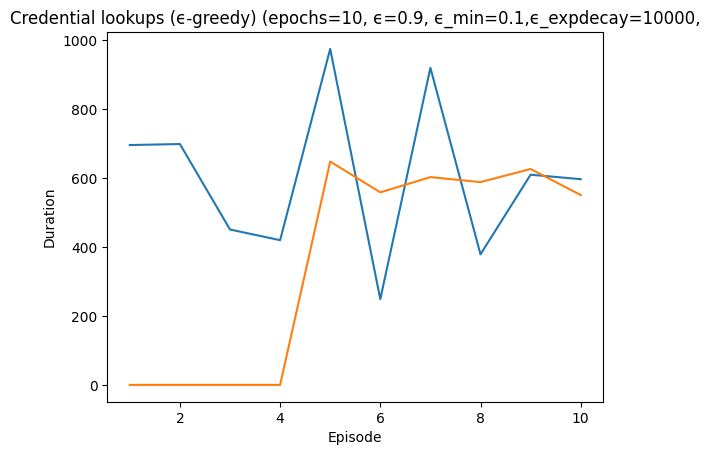

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.name to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.name` for environment variables or `env.get_wrapper_attr('name')` that will search the reminding wrappers.
  logger.warn(


In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/50 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:   14.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   16.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   16.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:   20.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  120.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  120.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  131.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  137.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  137.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  146.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  146.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  246.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  246.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  257.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  257.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  261.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  261.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  270.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  270.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 103|reward:  272.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 103|reward:  272.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 1|Iteration 127|reward:  372.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 1|Iteration 127|reward:  372.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  378.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  378.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  392.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  392.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  492.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  492.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  503.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  503.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  509.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  509.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  515.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  515.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  524.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  524.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  528.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  528.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  628.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  628.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  639.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  639.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  645.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  645.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  651.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  651.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  653.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  653.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  653.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 204|reward:  661.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 204|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 248|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 267|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 287|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 309|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 334|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 356|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 380|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 403|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 427|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 450|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 475|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 496|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 1|Iteration 519|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 537|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 560|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 583|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 605|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 625|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 647|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 670|reward:  661.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 680|reward:  670.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 1|Iteration 680|reward:  670.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 1|Iteration 687|reward:  770.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 1|Iteration 687|reward:  770.0|last_reward_at:  687|Elapsed Time: 0:00:02||

Episode 1|Iteration 708|reward:  770.0|last_reward_at:  687|Elapsed Time: 0:00:02||

Episode 1|Iteration 717|reward:  781.0|last_reward_at:  687|Elapsed Time: 0:00:03||

Episode 1|Iteration 717|reward:  781.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 1|Iteration 726|reward:  790.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 1|Iteration 726|reward:  790.0|last_reward_at:  726|Elapsed Time: 0:00:03||

Episode 1|Iteration 732|reward:  890.0|last_reward_at:  726|Elapsed Time: 0:00:03||

Episode 1|Iteration 732|reward:  890.0|last_reward_at:  732|Elapsed Time: 0:00:03||

Episode 1|Iteration 752|reward:  890.0|last_reward_at:  732|Elapsed Time: 0:00:03||

Episode 1|Iteration 766|reward:  901.0|last_reward_at:  732|Elapsed Time: 0:00:03||

Episode 1|Iteration 766|reward:  901.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 769|reward:  903.0|last_reward_at:  766|Elapsed Time: 0:00:03||

Episode 1|Iteration 769|reward:  903.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 1|Iteration 789|reward:  903.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 1|Iteration 793|reward:  909.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 1|Iteration 793|reward:  909.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 1|Iteration 794|reward:  917.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 1|Iteration 794|reward:  917.0|last_reward_at:  794|Elapsed Time: 0:00:03||

Episode 1|Iteration 813|reward:  917.0|last_reward_at:  794|Elapsed Time: 0:00:03||

Episode 1|Iteration 815|reward:  919.0|last_reward_at:  794|Elapsed Time: 0:00:03||

Episode 1|Iteration 815|reward:  919.0|last_reward_at:  815|Elapsed Time: 0:00:03||

Episode 1|Iteration 835|reward:  919.0|last_reward_at:  815|Elapsed Time: 0:00:03||

Episode 1|Iteration 850|reward:  928.0|last_reward_at:  815|Elapsed Time: 0:00:03||

Episode 1|Iteration 850|reward:  928.0|last_reward_at:  850|Elapsed Time: 0:00:03||

Episode 1|Iteration 854|reward: 1028.0|last_reward_at:  850|Elapsed Time: 0:00:03||

Episode 1|Iteration 854|reward: 1028.0|last_reward_at:  854|Elapsed Time: 0:00:03||

Episode 1|Iteration 855|reward: 1039.0|last_reward_at:  854|Elapsed Time: 0:00:03||

Episode 1|Iteration 855|reward: 1039.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 1|Iteration 874|reward: 1039.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 1|Iteration 882|reward: 1048.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 1|Iteration 882|reward: 1048.0|last_reward_at:  882|Elapsed Time: 0:00:03||

Episode 1|Iteration 886|reward: 1050.0|last_reward_at:  882|Elapsed Time: 0:00:03||

Episode 1|Iteration 886|reward: 1050.0|last_reward_at:  886|Elapsed Time: 0:00:03||

Episode 1|Iteration 890|reward: 1150.0|last_reward_at:  886|Elapsed Time: 0:00:03||

Episode 1|Iteration 890|reward: 1150.0|last_reward_at:  890|Elapsed Time: 0:00:03||

Episode 1|Iteration 904|reward: 1150.0|last_reward_at:  890|Elapsed Time: 0:00:04||

Episode 1|Iteration 908|reward: 1152.0|last_reward_at:  890|Elapsed Time: 0:00:04||

Episode 1|Iteration 908|reward: 1152.0|last_reward_at:  908|Elapsed Time: 0:00:04||

Episode 1|Iteration 923|reward: 1152.0|last_reward_at:  908|Elapsed Time: 0:00:04||

Episode 1|Iteration 924|reward: 1163.0|last_reward_at:  908|Elapsed Time: 0:00:04||

Episode 1|Iteration 924|reward: 1163.0|last_reward_at:  924|Elapsed Time: 0:00:04||

Episode 1|Iteration 936|reward: 1163.0|last_reward_at:  924|Elapsed Time: 0:00:04||

Episode 1|Iteration 937|reward: 1171.0|last_reward_at:  924|Elapsed Time: 0:00:04||

Episode 1|Iteration 937|reward: 1171.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 1|Iteration 939|reward: 1177.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 1|Iteration 939|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 1|Iteration 954|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 1|Iteration 971|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 1|Iteration 986|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 1|Iteration 1001|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 1|Iteration 1017|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 1|Iteration 1026|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 1|Iteration 1041|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1056|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1071|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1085|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1099|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1114|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1130|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1140|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1156|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1172|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 1|Iteration 1184|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1194|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1209|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1223|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1238|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1254|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1267|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1283|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1298|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1314|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 1|Iteration 1329|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:07||

Episode 1|Iteration 1345|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:07||

Episode 1|Iteration 1360|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:07||

Episode 1|Iteration 1376|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:07||

Episode 1|Iteration 1391|reward: 1177.0|last_reward_at:  939|Elapsed Time: 0:00:07||

Episode 1|Iteration 1392|reward: 1186.0|last_reward_at:  939|Elapsed Time: 0:00:07||

Episode 1|Iteration 1392|reward: 1186.0|last_reward_at: 1392|Elapsed Time: 0:00:07||

Episode 1|Iteration 1393|reward: 1286.0|last_reward_at: 1392|Elapsed Time: 0:00:07||

Episode 1|Iteration 1393|reward: 1286.0|last_reward_at: 1393|Elapsed Time: 0:00:07||

Episode 1|Iteration 1405|reward: 1297.0|last_reward_at: 1393|Elapsed Time: 0:00:07||

Episode 1|Iteration 1405|reward: 1297.0|last_reward_at: 1405|Elapsed Time: 0:00:07||

Episode 1|Iteration 1414|reward: 1306.0|last_reward_at: 1405|Elapsed Time: 0:00:07||

Episode 1|Iteration 1414|reward: 1306.0|last_reward_at: 1414|Elapsed Time: 0:00:07||

Episode 1|Iteration 1415|reward: 6306.0|last_reward_at: 1414|Elapsed Time: 0:00:07||

Episode 1|Iteration 1415|reward: 6306.0|last_reward_at: 1415|Elapsed Time: 0:00:07||

  Episode 1 ended at t=1415 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/321 (0.03)
    explore-remote: 18/428 (0.04)
    explore-connect: 0/435 (0.00)
    exploit-local: 11/63 (0.15)
    exploit-remote: 2/116 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 121
  ## Episode: 2/50 'Tabular Q-learning' ϵ=0.6808, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  135.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  135.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  137.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  137.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  143.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  143.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  152.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  152.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  252.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  252.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  263.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  263.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  265.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  265.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  269.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  269.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  278.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  278.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  378.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  378.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  378.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  389.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  389.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 118|reward:  395.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 118|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 121|reward:  403.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 121|reward:  403.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 147|reward:  403.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 170|reward:  403.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  403.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 216|reward:  412.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 216|reward:  412.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 2|Iteration 217|reward:  512.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 2|Iteration 217|reward:  512.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 220|reward:  523.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 220|reward:  523.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 2|Iteration 227|reward:  525.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 2|Iteration 227|reward:  525.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 2|Iteration 252|reward:  525.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 2|Iteration 266|reward:  529.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 266|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 289|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 310|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 330|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 357|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 382|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 402|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 423|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 444|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 456|reward:  529.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 457|reward:  538.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 2|Iteration 457|reward:  538.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 2|Iteration 460|reward:  638.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 2|Iteration 460|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:01||

Episode 2|Iteration 480|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 2|Iteration 502|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 2|Iteration 522|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 2|Iteration 539|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 2|Iteration 557|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 2|Iteration 572|reward:  649.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 2|Iteration 572|reward:  649.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 589|reward:  649.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 606|reward:  657.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 606|reward:  657.0|last_reward_at:  606|Elapsed Time: 0:00:02||

Episode 2|Iteration 626|reward:  663.0|last_reward_at:  606|Elapsed Time: 0:00:02||

Episode 2|Iteration 626|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:02||

Episode 2|Iteration 643|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:02||

Episode 2|Iteration 664|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 683|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 703|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 724|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 738|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 758|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 780|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 798|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 815|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 834|reward:  663.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 843|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 2|Iteration 843|reward:  672.0|last_reward_at:  843|Elapsed Time: 0:00:03||

Episode 2|Iteration 844|reward:  772.0|last_reward_at:  843|Elapsed Time: 0:00:04||

Episode 2|Iteration 844|reward:  772.0|last_reward_at:  844|Elapsed Time: 0:00:04||

Episode 2|Iteration 865|reward:  772.0|last_reward_at:  844|Elapsed Time: 0:00:04||

Episode 2|Iteration 880|reward:  772.0|last_reward_at:  844|Elapsed Time: 0:00:04||

Episode 2|Iteration 897|reward:  772.0|last_reward_at:  844|Elapsed Time: 0:00:04||

Episode 2|Iteration 902|reward:  786.0|last_reward_at:  844|Elapsed Time: 0:00:04||

Episode 2|Iteration 902|reward:  786.0|last_reward_at:  902|Elapsed Time: 0:00:04||

Episode 2|Iteration 903|reward:  886.0|last_reward_at:  902|Elapsed Time: 0:00:04||

Episode 2|Iteration 903|reward:  886.0|last_reward_at:  903|Elapsed Time: 0:00:04||

Episode 2|Iteration 920|reward:  886.0|last_reward_at:  903|Elapsed Time: 0:00:04||

Episode 2|Iteration 926|reward:  888.0|last_reward_at:  903|Elapsed Time: 0:00:04||

Episode 2|Iteration 926|reward:  888.0|last_reward_at:  926|Elapsed Time: 0:00:04||

Episode 2|Iteration 931|reward:  902.0|last_reward_at:  926|Elapsed Time: 0:00:04||

Episode 2|Iteration 931|reward:  902.0|last_reward_at:  931|Elapsed Time: 0:00:04||

Episode 2|Iteration 932|reward:  908.0|last_reward_at:  931|Elapsed Time: 0:00:04||

Episode 2|Iteration 932|reward:  908.0|last_reward_at:  932|Elapsed Time: 0:00:04||

Episode 2|Iteration 935|reward: 1008.0|last_reward_at:  932|Elapsed Time: 0:00:04||

Episode 2|Iteration 935|reward: 1008.0|last_reward_at:  935|Elapsed Time: 0:00:04||

Episode 2|Iteration 939|reward: 1014.0|last_reward_at:  935|Elapsed Time: 0:00:04||

Episode 2|Iteration 939|reward: 1014.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 2|Iteration 947|reward: 1016.0|last_reward_at:  939|Elapsed Time: 0:00:04||

Episode 2|Iteration 947|reward: 1016.0|last_reward_at:  947|Elapsed Time: 0:00:04||

Episode 2|Iteration 964|reward: 1016.0|last_reward_at:  947|Elapsed Time: 0:00:04||

Episode 2|Iteration 978|reward: 1016.0|last_reward_at:  947|Elapsed Time: 0:00:04||

Episode 2|Iteration 981|reward: 1022.0|last_reward_at:  947|Elapsed Time: 0:00:04||

Episode 2|Iteration 981|reward: 1022.0|last_reward_at:  981|Elapsed Time: 0:00:04||

Episode 2|Iteration 1000|reward: 1022.0|last_reward_at:  981|Elapsed Time: 0:00:04||

Episode 2|Iteration 1015|reward: 1022.0|last_reward_at:  981|Elapsed Time: 0:00:05||

Episode 2|Iteration 1026|reward: 1022.0|last_reward_at:  981|Elapsed Time: 0:00:05||

Episode 2|Iteration 1039|reward: 1033.0|last_reward_at:  981|Elapsed Time: 0:00:05||

Episode 2|Iteration 1039|reward: 1033.0|last_reward_at: 1039|Elapsed Time: 0:00:05||

Episode 2|Iteration 1054|reward: 1033.0|last_reward_at: 1039|Elapsed Time: 0:00:05||

Episode 2|Iteration 1059|reward: 1035.0|last_reward_at: 1039|Elapsed Time: 0:00:05||

Episode 2|Iteration 1059|reward: 1035.0|last_reward_at: 1059|Elapsed Time: 0:00:05||

Episode 2|Iteration 1063|reward: 1039.0|last_reward_at: 1059|Elapsed Time: 0:00:05||

Episode 2|Iteration 1063|reward: 1039.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

Episode 2|Iteration 1080|reward: 1039.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

Episode 2|Iteration 1097|reward: 1039.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

Episode 2|Iteration 1115|reward: 1039.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

Episode 2|Iteration 1129|reward: 1039.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

Episode 2|Iteration 1140|reward: 1039.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

Episode 2|Iteration 1155|reward: 1039.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

Episode 2|Iteration 1168|reward: 1045.0|last_reward_at: 1063|Elapsed Time: 0:00:06||

Episode 2|Iteration 1168|reward: 1045.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1180|reward: 1045.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1196|reward: 1045.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1212|reward: 1045.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1228|reward: 1045.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1243|reward: 1045.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1254|reward: 1045.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1259|reward: 1054.0|last_reward_at: 1168|Elapsed Time: 0:00:06||

Episode 2|Iteration 1259|reward: 1054.0|last_reward_at: 1259|Elapsed Time: 0:00:06||

Episode 2|Iteration 1261|reward: 1154.0|last_reward_at: 1259|Elapsed Time: 0:00:06||

Episode 2|Iteration 1261|reward: 1154.0|last_reward_at: 1261|Elapsed Time: 0:00:06||

Episode 2|Iteration 1265|reward: 1165.0|last_reward_at: 1261|Elapsed Time: 0:00:06||

Episode 2|Iteration 1265|reward: 1165.0|last_reward_at: 1265|Elapsed Time: 0:00:06||

Episode 2|Iteration 1277|reward: 1165.0|last_reward_at: 1265|Elapsed Time: 0:00:06||

Episode 2|Iteration 1291|reward: 1165.0|last_reward_at: 1265|Elapsed Time: 0:00:06||

Episode 2|Iteration 1307|reward: 1165.0|last_reward_at: 1265|Elapsed Time: 0:00:07||

Episode 2|Iteration 1310|reward: 1171.0|last_reward_at: 1265|Elapsed Time: 0:00:07||

Episode 2|Iteration 1310|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1324|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1336|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1349|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1363|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1377|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1392|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1406|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1419|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:07||

Episode 2|Iteration 1431|reward: 1171.0|last_reward_at: 1310|Elapsed Time: 0:00:08||

Episode 2|Iteration 1442|reward: 1180.0|last_reward_at: 1310|Elapsed Time: 0:00:08||

Episode 2|Iteration 1442|reward: 1180.0|last_reward_at: 1442|Elapsed Time: 0:00:08||

Episode 2|Iteration 1443|reward: 1280.0|last_reward_at: 1442|Elapsed Time: 0:00:08||

Episode 2|Iteration 1443|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1456|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1469|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1481|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1494|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1507|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1520|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1533|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1546|reward: 1280.0|last_reward_at: 1443|Elapsed Time: 0:00:08||

Episode 2|Iteration 1554|reward: 1291.0|last_reward_at: 1443|Elapsed Time: 0:00:09||

Episode 2|Iteration 1554|reward: 1291.0|last_reward_at: 1554|Elapsed Time: 0:00:09||

Episode 2|Iteration 1565|reward: 1291.0|last_reward_at: 1554|Elapsed Time: 0:00:09||

Episode 2|Iteration 1577|reward: 1291.0|last_reward_at: 1554|Elapsed Time: 0:00:09||

Episode 2|Iteration 1578|reward: 1297.0|last_reward_at: 1554|Elapsed Time: 0:00:09||

Episode 2|Iteration 1578|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1589|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1601|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1613|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1625|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1637|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1649|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1662|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:09||

Episode 2|Iteration 1674|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1686|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1697|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1707|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1719|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1731|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1743|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1754|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1766|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:10||

Episode 2|Iteration 1777|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1788|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1799|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1810|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1821|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1833|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1844|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1854|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1867|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1879|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:11||

Episode 2|Iteration 1891|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:12||

Episode 2|Iteration 1903|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:12||

Episode 2|Iteration 1915|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:12||

Episode 2|Iteration 1927|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:12||

Episode 2|Iteration 1937|reward: 1297.0|last_reward_at: 1578|Elapsed Time: 0:00:12||

Episode 2|Iteration 1946|reward: 1306.0|last_reward_at: 1578|Elapsed Time: 0:00:12||

Episode 2|Iteration 1946|reward: 1306.0|last_reward_at: 1946|Elapsed Time: 0:00:12||

Episode 2|Iteration 1948|reward: 6306.0|last_reward_at: 1946|Elapsed Time: 0:00:12||

Episode 2|Iteration 1948|reward: 6306.0|last_reward_at: 1948|Elapsed Time: 0:00:12||

  Episode 2 ended at t=1948 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/413 (0.04)
    explore-remote: 18/505 (0.03)
    explore-connect: 0/610 (0.00)
    exploit-local: 4/74 (0.05)
    exploit-remote: 2/294 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 496
  ## Episode: 3/50 'Tabular Q-learning' ϵ=0.4643, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  131.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  139.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  139.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  141.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  150.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  250.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  261.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  261.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  270.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  270.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  370.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  370.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  372.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  372.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  386.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  486.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  486.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  497.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  497.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  499.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  499.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  505.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  505.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  509.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  509.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  518.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  518.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  618.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  618.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  632.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  632.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  732.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  732.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  743.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  743.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 106|reward:  745.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 106|reward:  745.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:  751.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:  751.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 132|reward:  751.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  753.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  753.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 148|reward:  759.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 148|reward:  759.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  765.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  765.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 154|reward:  767.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 154|reward:  767.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  773.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  773.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  773.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 3|Iteration 203|reward:  773.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 3|Iteration 220|reward:  773.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 3|Iteration 223|reward:  779.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 3|Iteration 223|reward:  779.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 3|Iteration 225|reward:  783.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 3|Iteration 225|reward:  783.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 240|reward:  783.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 256|reward:  783.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward:  783.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 280|reward:  792.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 280|reward:  792.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 3|Iteration 281|reward:  892.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 3|Iteration 281|reward:  892.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 297|reward:  892.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 314|reward:  892.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 331|reward:  892.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward:  892.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 3|Iteration 351|reward:  903.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 3|Iteration 351|reward:  903.0|last_reward_at:  351|Elapsed Time: 0:00:02||

Episode 3|Iteration 357|reward:  911.0|last_reward_at:  351|Elapsed Time: 0:00:02||

Episode 3|Iteration 357|reward:  911.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 367|reward:  917.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 3|Iteration 367|reward:  917.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 3|Iteration 381|reward:  917.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 3|Iteration 396|reward:  917.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 3|Iteration 411|reward:  917.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 3|Iteration 425|reward:  917.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 3|Iteration 438|reward:  926.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 3|Iteration 438|reward:  926.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 3|Iteration 439|reward: 1026.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 3|Iteration 439|reward: 1026.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 3|Iteration 452|reward: 1026.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 3|Iteration 465|reward: 1026.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 3|Iteration 478|reward: 1026.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 3|Iteration 479|reward: 1040.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 3|Iteration 479|reward: 1040.0|last_reward_at:  479|Elapsed Time: 0:00:03||

Episode 3|Iteration 480|reward: 1140.0|last_reward_at:  479|Elapsed Time: 0:00:03||

Episode 3|Iteration 480|reward: 1140.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 3|Iteration 493|reward: 1140.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 3|Iteration 504|reward: 1142.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 3|Iteration 504|reward: 1142.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 3|Iteration 517|reward: 1142.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 3|Iteration 518|reward: 1144.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 3|Iteration 518|reward: 1144.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 3|Iteration 519|reward: 1150.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 3|Iteration 519|reward: 1150.0|last_reward_at:  519|Elapsed Time: 0:00:03||

Episode 3|Iteration 526|reward: 1164.0|last_reward_at:  519|Elapsed Time: 0:00:03||

Episode 3|Iteration 526|reward: 1164.0|last_reward_at:  526|Elapsed Time: 0:00:03||

Episode 3|Iteration 527|reward: 1264.0|last_reward_at:  526|Elapsed Time: 0:00:03||

Episode 3|Iteration 527|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 3|Iteration 539|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 3|Iteration 551|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 3|Iteration 561|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 3|Iteration 570|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 3|Iteration 580|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 3|Iteration 591|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:04||

Episode 3|Iteration 602|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:04||

Episode 3|Iteration 612|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:04||

Episode 3|Iteration 623|reward: 1264.0|last_reward_at:  527|Elapsed Time: 0:00:04||

Episode 3|Iteration 631|reward: 1278.0|last_reward_at:  527|Elapsed Time: 0:00:04||

Episode 3|Iteration 631|reward: 1278.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 3|Iteration 637|reward: 6278.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 3|Iteration 637|reward: 6278.0|last_reward_at:  637|Elapsed Time: 0:00:04||

  Episode 3 ended at t=637 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/127 (0.10)
    explore-remote: 14/150 (0.09)
    explore-connect: 0/172 (0.00)
    exploit-local: 5/42 (0.11)
    exploit-remote: 4/98 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 198
  ## Episode: 4/50 'Tabular Q-learning' ϵ=0.4100, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  133.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  142.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  242.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  242.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  256.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  256.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  356.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  356.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  367.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  367.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  373.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  373.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  381.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  381.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  383.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  383.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  389.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  389.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  395.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  395.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  404.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  404.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  504.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  504.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  506.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  506.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:  520.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:  520.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  620.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  620.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 97|reward:  631.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 97|reward:  631.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  633.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  633.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  642.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  642.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  742.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  742.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  744.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  744.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  758.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  758.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  762.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  762.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  862.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  862.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 116|reward:  873.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 116|reward:  873.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 4|Iteration 120|reward:  879.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 4|Iteration 120|reward:  879.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  885.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  885.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  893.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  893.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  899.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  899.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 155|reward:  899.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  899.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 182|reward:  899.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 198|reward:  899.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 211|reward:  901.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 211|reward:  901.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 4|Iteration 223|reward:  901.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 4|Iteration 225|reward:  907.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 4|Iteration 225|reward:  907.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 4|Iteration 228|reward:  913.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 4|Iteration 228|reward:  913.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 4|Iteration 242|reward:  913.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 4|Iteration 256|reward:  913.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 4|Iteration 260|reward:  915.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 4|Iteration 260|reward:  915.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 4|Iteration 273|reward:  915.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 4|Iteration 288|reward:  915.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 4|Iteration 302|reward:  915.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 4|Iteration 314|reward:  915.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 4|Iteration 316|reward:  924.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 4|Iteration 316|reward:  924.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 4|Iteration 319|reward: 1024.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 4|Iteration 319|reward: 1024.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 4|Iteration 329|reward: 1035.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 4|Iteration 329|reward: 1035.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 341|reward: 1035.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 343|reward: 1044.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 343|reward: 1044.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 4|Iteration 346|reward: 1144.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 4|Iteration 346|reward: 1144.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 4|Iteration 358|reward: 1144.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 4|Iteration 371|reward: 1144.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 4|Iteration 382|reward: 1155.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 4|Iteration 382|reward: 1155.0|last_reward_at:  382|Elapsed Time: 0:00:02||

Episode 4|Iteration 384|reward: 1157.0|last_reward_at:  382|Elapsed Time: 0:00:02||

Episode 4|Iteration 384|reward: 1157.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 396|reward: 1157.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 403|reward: 1163.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 403|reward: 1163.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 4|Iteration 416|reward: 1163.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 428|reward: 1163.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 442|reward: 1163.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 449|reward: 1172.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 449|reward: 1172.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 4|Iteration 450|reward: 1272.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 4|Iteration 450|reward: 1272.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 4|Iteration 456|reward: 1272.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 4|Iteration 466|reward: 1283.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 4|Iteration 466|reward: 1283.0|last_reward_at:  466|Elapsed Time: 0:00:03||

Episode 4|Iteration 474|reward: 1285.0|last_reward_at:  466|Elapsed Time: 0:00:03||

Episode 4|Iteration 474|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 4|Iteration 485|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 4|Iteration 496|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 4|Iteration 507|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 4|Iteration 518|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 4|Iteration 529|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:04||

Episode 4|Iteration 541|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:04||

Episode 4|Iteration 555|reward: 1285.0|last_reward_at:  474|Elapsed Time: 0:00:04||

Episode 4|Iteration 564|reward: 1294.0|last_reward_at:  474|Elapsed Time: 0:00:04||

Episode 4|Iteration 564|reward: 1294.0|last_reward_at:  564|Elapsed Time: 0:00:04||

Episode 4|Iteration 566|reward: 6294.0|last_reward_at:  564|Elapsed Time: 0:00:04||

Episode 4|Iteration 566|reward: 6294.0|last_reward_at:  566|Elapsed Time: 0:00:04||

  Episode 4 ended at t=566 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/113 (0.10)
    explore-remote: 14/137 (0.09)
    explore-connect: 0/175 (0.00)
    exploit-local: 9/4 (0.69)
    exploit-remote: 5/86 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 227
  ## Episode: 5/50 'Tabular Q-learning' ϵ=0.3672, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  242.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  244.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  244.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  250.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  250.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  264.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  264.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  364.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  364.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  366.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  366.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  377.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  377.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  383.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  383.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  389.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  389.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  398.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  398.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  498.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  498.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  500.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  500.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward:  500.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  511.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  511.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  517.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  517.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  517.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  519.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  519.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 154|reward:  528.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 154|reward:  528.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:  628.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:  628.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  639.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  639.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  641.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  641.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  647.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  647.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 168|reward:  656.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 168|reward:  656.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  756.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  756.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  756.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 201|reward:  756.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 202|reward:  762.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 202|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 5|Iteration 217|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 5|Iteration 228|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 5|Iteration 243|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 5|Iteration 260|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 5|Iteration 266|reward:  773.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 5|Iteration 266|reward:  773.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 5|Iteration 272|reward:  775.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 5|Iteration 272|reward:  775.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 5|Iteration 277|reward:  784.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 5|Iteration 277|reward:  784.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 5|Iteration 278|reward:  884.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 5|Iteration 278|reward:  884.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 5|Iteration 279|reward:  895.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 5|Iteration 279|reward:  895.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 5|Iteration 286|reward:  904.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 5|Iteration 286|reward:  904.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 5|Iteration 289|reward: 1004.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 5|Iteration 289|reward: 1004.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 5|Iteration 302|reward: 1004.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 5|Iteration 303|reward: 1015.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 5|Iteration 303|reward: 1015.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 315|reward: 1015.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 326|reward: 1015.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 5|Iteration 337|reward: 1015.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 5|Iteration 343|reward: 1019.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 5|Iteration 343|reward: 1019.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 5|Iteration 354|reward: 1019.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 5|Iteration 366|reward: 1019.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 5|Iteration 368|reward: 1028.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 5|Iteration 368|reward: 1028.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 5|Iteration 369|reward: 1128.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 5|Iteration 369|reward: 1128.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 5|Iteration 380|reward: 1128.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 5|Iteration 384|reward: 1130.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 5|Iteration 384|reward: 1130.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 5|Iteration 394|reward: 1141.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 5|Iteration 394|reward: 1141.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 5|Iteration 398|reward: 1147.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 5|Iteration 398|reward: 1147.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 5|Iteration 407|reward: 1153.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 5|Iteration 407|reward: 1153.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 5|Iteration 419|reward: 1153.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 5|Iteration 430|reward: 1153.0|last_reward_at:  407|Elapsed Time: 0:00:03||

Episode 5|Iteration 439|reward: 1161.0|last_reward_at:  407|Elapsed Time: 0:00:03||

Episode 5|Iteration 439|reward: 1161.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 5|Iteration 450|reward: 1161.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 5|Iteration 461|reward: 1170.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 5|Iteration 461|reward: 1170.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 5|Iteration 462|reward: 1270.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 5|Iteration 462|reward: 1270.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 5|Iteration 471|reward: 1281.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 5|Iteration 471|reward: 1281.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 5|Iteration 482|reward: 1281.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 5|Iteration 493|reward: 1281.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 5|Iteration 504|reward: 1281.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 5|Iteration 514|reward: 1281.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 5|Iteration 518|reward: 1283.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 5|Iteration 518|reward: 1283.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 5|Iteration 531|reward: 1283.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 5|Iteration 533|reward: 1289.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 5|Iteration 533|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:03||

Episode 5|Iteration 546|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 560|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 568|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 580|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 592|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 604|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 618|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 631|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 643|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 655|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 668|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 679|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 690|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 702|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 713|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 725|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 738|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 750|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 761|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:05||

Episode 5|Iteration 773|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 786|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 798|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 809|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 821|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 831|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 843|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 856|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 867|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:06||

Episode 5|Iteration 879|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 892|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 905|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 912|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 924|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 937|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 948|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 960|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 971|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 982|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:07||

Episode 5|Iteration 994|reward: 1289.0|last_reward_at:  533|Elapsed Time: 0:00:08||

Episode 5|Iteration 999|reward: 1298.0|last_reward_at:  533|Elapsed Time: 0:00:08||

Episode 5|Iteration 999|reward: 1298.0|last_reward_at:  999|Elapsed Time: 0:00:08||

Episode 5|Iteration 1000|reward: 6298.0|last_reward_at:  999|Elapsed Time: 0:00:08||

Episode 5|Iteration 1000|reward: 6298.0|last_reward_at: 1000|Elapsed Time: 0:00:08||

  Episode 5 ended at t=1000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/205 (0.05)
    explore-remote: 16/232 (0.06)
    explore-connect: 0/255 (0.00)
    exploit-local: 11/16 (0.41)
    exploit-remote: 4/240 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 388
  ## Episode: 6/50 'Tabular Q-learning' ϵ=0.3024, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  245.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  249.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  249.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  251.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  251.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  253.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  253.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  255.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  255.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  261.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  261.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  261.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  270.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  270.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 68|reward:  370.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 68|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  384.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  384.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  484.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  484.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 80|reward:  495.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 80|reward:  495.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 6|Iteration 84|reward:  497.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 6|Iteration 84|reward:  497.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  503.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  503.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 93|reward:  509.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 93|reward:  509.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  513.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  513.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 102|reward:  519.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 102|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 131|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 162|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 181|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 196|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 215|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 228|reward:  519.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 236|reward:  528.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 236|reward:  528.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 6|Iteration 237|reward:  628.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 6|Iteration 237|reward:  628.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 6|Iteration 254|reward:  628.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 6|Iteration 270|reward:  628.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 6|Iteration 283|reward:  628.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 6|Iteration 292|reward:  642.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 6|Iteration 292|reward:  642.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 6|Iteration 293|reward:  742.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 6|Iteration 293|reward:  742.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 6|Iteration 307|reward:  742.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 6|Iteration 313|reward:  748.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 6|Iteration 313|reward:  748.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 6|Iteration 323|reward:  748.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 6|Iteration 332|reward:  754.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 6|Iteration 332|reward:  754.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 6|Iteration 335|reward:  765.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 6|Iteration 335|reward:  765.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 6|Iteration 342|reward:  765.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 6|Iteration 342|reward:  767.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 6|Iteration 342|reward:  767.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 6|Iteration 349|reward:  771.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 6|Iteration 349|reward:  771.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 6|Iteration 352|reward:  777.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 6|Iteration 352|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 6|Iteration 366|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 6|Iteration 377|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 6|Iteration 388|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 6|Iteration 405|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 6|Iteration 417|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 6|Iteration 429|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 6|Iteration 441|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 6|Iteration 455|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 6|Iteration 469|reward:  777.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 6|Iteration 477|reward:  786.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 6|Iteration 477|reward:  786.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 6|Iteration 479|reward:  886.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 6|Iteration 479|reward:  886.0|last_reward_at:  479|Elapsed Time: 0:00:03||

Episode 6|Iteration 488|reward:  900.0|last_reward_at:  479|Elapsed Time: 0:00:03||

Episode 6|Iteration 488|reward:  900.0|last_reward_at:  488|Elapsed Time: 0:00:03||

Episode 6|Iteration 489|reward: 1000.0|last_reward_at:  488|Elapsed Time: 0:00:03||

Episode 6|Iteration 489|reward: 1000.0|last_reward_at:  489|Elapsed Time: 0:00:03||

Episode 6|Iteration 491|reward: 1011.0|last_reward_at:  489|Elapsed Time: 0:00:03||

Episode 6|Iteration 491|reward: 1011.0|last_reward_at:  491|Elapsed Time: 0:00:03||

Episode 6|Iteration 494|reward: 1017.0|last_reward_at:  491|Elapsed Time: 0:00:03||

Episode 6|Iteration 494|reward: 1017.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 6|Iteration 507|reward: 1017.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 6|Iteration 513|reward: 1021.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 6|Iteration 513|reward: 1021.0|last_reward_at:  513|Elapsed Time: 0:00:03||

Episode 6|Iteration 525|reward: 1021.0|last_reward_at:  513|Elapsed Time: 0:00:03||

Episode 6|Iteration 535|reward: 1021.0|last_reward_at:  513|Elapsed Time: 0:00:03||

Episode 6|Iteration 544|reward: 1023.0|last_reward_at:  513|Elapsed Time: 0:00:03||

Episode 6|Iteration 544|reward: 1023.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 6|Iteration 555|reward: 1023.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 6|Iteration 564|reward: 1029.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 6|Iteration 564|reward: 1029.0|last_reward_at:  564|Elapsed Time: 0:00:04||

Episode 6|Iteration 575|reward: 1029.0|last_reward_at:  564|Elapsed Time: 0:00:04||

Episode 6|Iteration 587|reward: 1029.0|last_reward_at:  564|Elapsed Time: 0:00:04||

Episode 6|Iteration 599|reward: 1038.0|last_reward_at:  564|Elapsed Time: 0:00:04||

Episode 6|Iteration 599|reward: 1038.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 600|reward: 1138.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 600|reward: 1138.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 6|Iteration 605|reward: 1149.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 6|Iteration 605|reward: 1149.0|last_reward_at:  605|Elapsed Time: 0:00:04||

Episode 6|Iteration 606|reward: 1155.0|last_reward_at:  605|Elapsed Time: 0:00:04||

Episode 6|Iteration 606|reward: 1155.0|last_reward_at:  606|Elapsed Time: 0:00:04||

Episode 6|Iteration 608|reward: 1164.0|last_reward_at:  606|Elapsed Time: 0:00:04||

Episode 6|Iteration 608|reward: 1164.0|last_reward_at:  608|Elapsed Time: 0:00:04||

Episode 6|Iteration 611|reward: 1264.0|last_reward_at:  608|Elapsed Time: 0:00:04||

Episode 6|Iteration 611|reward: 1264.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 6|Iteration 622|reward: 1264.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 6|Iteration 633|reward: 1264.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 6|Iteration 641|reward: 1270.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 6|Iteration 641|reward: 1270.0|last_reward_at:  641|Elapsed Time: 0:00:04||

Episode 6|Iteration 653|reward: 1270.0|last_reward_at:  641|Elapsed Time: 0:00:04||

Episode 6|Iteration 660|reward: 1276.0|last_reward_at:  641|Elapsed Time: 0:00:05||

Episode 6|Iteration 660|reward: 1276.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 6|Iteration 672|reward: 1276.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 6|Iteration 674|reward: 1282.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 6|Iteration 674|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 684|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 695|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 705|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 717|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 727|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 737|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 748|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 755|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 6|Iteration 766|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 777|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 787|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 798|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 807|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 818|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 829|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 838|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 848|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 6|Iteration 857|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:07||

Episode 6|Iteration 868|reward: 1282.0|last_reward_at:  674|Elapsed Time: 0:00:07||

Episode 6|Iteration 869|reward: 1296.0|last_reward_at:  674|Elapsed Time: 0:00:07||

Episode 6|Iteration 869|reward: 1296.0|last_reward_at:  869|Elapsed Time: 0:00:07||

Episode 6|Iteration 871|reward: 6296.0|last_reward_at:  869|Elapsed Time: 0:00:07||

Episode 6|Iteration 871|reward: 6296.0|last_reward_at:  871|Elapsed Time: 0:00:07||

  Episode 6 ended at t=871 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/216 (0.06)
    explore-remote: 18/272 (0.06)
    explore-connect: 0/284 (0.00)
    exploit-local: 6/26 (0.19)
    exploit-remote: 2/22 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 572
  ## Episode: 7/50 'Tabular Q-learning' ϵ=0.2557, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  245.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  254.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  254.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  354.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  360.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  362.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  364.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  364.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  378.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  378.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:  478.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:  478.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  480.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  480.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  491.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  491.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  500.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  500.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  600.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  600.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  606.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  606.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  620.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  620.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  720.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  720.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 77|reward:  731.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 77|reward:  731.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  737.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  737.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:  741.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:  741.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  743.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  743.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 85|reward:  749.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 85|reward:  749.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 7|Iteration 87|reward:  758.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 7|Iteration 87|reward:  758.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  858.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  858.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 101|reward:  858.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 102|reward:  869.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 102|reward:  869.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  875.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  875.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 125|reward:  875.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 131|reward:  877.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 131|reward:  877.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 7|Iteration 134|reward:  885.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 7|Iteration 134|reward:  885.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 7|Iteration 140|reward:  891.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 7|Iteration 140|reward:  891.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 7|Iteration 144|reward:  897.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 7|Iteration 144|reward:  897.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 7|Iteration 157|reward:  897.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 7|Iteration 169|reward:  903.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 7|Iteration 169|reward:  903.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 7|Iteration 172|reward:  912.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 7|Iteration 172|reward:  912.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 7|Iteration 173|reward: 1012.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 7|Iteration 173|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 7|Iteration 175|reward: 1014.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 7|Iteration 175|reward: 1014.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 7|Iteration 177|reward: 1025.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 7|Iteration 177|reward: 1025.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 7|Iteration 179|reward: 1034.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 7|Iteration 179|reward: 1034.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 7|Iteration 180|reward: 1134.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 7|Iteration 180|reward: 1134.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 7|Iteration 188|reward: 1136.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 7|Iteration 188|reward: 1136.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 7|Iteration 190|reward: 1150.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 7|Iteration 190|reward: 1150.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 7|Iteration 194|reward: 1250.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 7|Iteration 194|reward: 1250.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 7|Iteration 195|reward: 1256.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 7|Iteration 195|reward: 1256.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 7|Iteration 197|reward: 1267.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 7|Iteration 197|reward: 1267.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 7|Iteration 199|reward: 1276.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 7|Iteration 199|reward: 1276.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 7|Iteration 201|reward: 6276.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 7|Iteration 201|reward: 6276.0|last_reward_at:  201|Elapsed Time: 0:00:01||

  Episode 7 ended at t=201 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/43 (0.14)
    explore-remote: 16/35 (0.31)
    explore-connect: 0/51 (0.00)
    exploit-local: 13/25 (0.34)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 96
  ## Episode: 8/50 'Tabular Q-learning' ϵ=0.2460, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  131.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  131.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  140.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  240.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  251.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  251.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  260.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  260.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  360.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  360.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  366.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  366.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  377.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  377.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  379.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  379.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  385.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  385.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  393.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  393.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:  395.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:  395.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  397.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  397.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 80|reward:  397.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 85|reward:  399.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 85|reward:  399.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 8|Iteration 104|reward:  399.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  399.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 8|Iteration 129|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 8|Iteration 129|reward:  408.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  508.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  508.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 131|reward:  519.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 131|reward:  519.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 8|Iteration 138|reward:  528.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 8|Iteration 138|reward:  528.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  628.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  628.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 155|reward:  628.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 167|reward:  642.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 8|Iteration 167|reward:  642.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 168|reward:  742.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 168|reward:  742.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 8|Iteration 170|reward:  753.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 8|Iteration 170|reward:  753.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 8|Iteration 176|reward:  762.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 8|Iteration 176|reward:  762.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 8|Iteration 177|reward:  862.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 8|Iteration 177|reward:  862.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 8|Iteration 179|reward:  864.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 8|Iteration 179|reward:  864.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 8|Iteration 189|reward:  866.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 8|Iteration 189|reward:  866.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 8|Iteration 193|reward:  868.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 8|Iteration 193|reward:  868.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 8|Iteration 195|reward:  874.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 8|Iteration 195|reward:  874.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 8|Iteration 208|reward:  874.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 8|Iteration 218|reward:  885.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 8|Iteration 218|reward:  885.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 8|Iteration 219|reward:  893.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 8|Iteration 219|reward:  893.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 8|Iteration 228|reward:  893.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 8|Iteration 238|reward:  899.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 8|Iteration 238|reward:  899.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 8|Iteration 240|reward:  901.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 8|Iteration 240|reward:  901.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 8|Iteration 252|reward:  901.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 8|Iteration 264|reward:  901.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 8|Iteration 266|reward:  907.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 8|Iteration 266|reward:  907.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 8|Iteration 280|reward:  907.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 8|Iteration 293|reward:  907.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 8|Iteration 294|reward:  916.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 8|Iteration 294|reward:  916.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 8|Iteration 295|reward: 1016.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 8|Iteration 295|reward: 1016.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 8|Iteration 302|reward: 1027.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 8|Iteration 302|reward: 1027.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 8|Iteration 306|reward: 1029.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 8|Iteration 306|reward: 1029.0|last_reward_at:  306|Elapsed Time: 0:00:02||

Episode 8|Iteration 308|reward: 1033.0|last_reward_at:  306|Elapsed Time: 0:00:02||

Episode 8|Iteration 308|reward: 1033.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 8|Iteration 320|reward: 1033.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 8|Iteration 328|reward: 1042.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 8|Iteration 328|reward: 1042.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 8|Iteration 329|reward: 1142.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 8|Iteration 329|reward: 1142.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 331|reward: 1153.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 331|reward: 1153.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 8|Iteration 336|reward: 1161.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 8|Iteration 336|reward: 1161.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 8|Iteration 342|reward: 1161.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 8|Iteration 353|reward: 1161.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 8|Iteration 364|reward: 1161.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 8|Iteration 376|reward: 1161.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 8|Iteration 381|reward: 1167.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 8|Iteration 381|reward: 1167.0|last_reward_at:  381|Elapsed Time: 0:00:02||

Episode 8|Iteration 390|reward: 1173.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 8|Iteration 390|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 400|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 411|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 421|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 432|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 443|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 454|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 465|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 475|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 486|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 8|Iteration 497|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 508|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 520|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 531|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 541|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 553|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 563|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 570|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 580|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 591|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:04||

Episode 8|Iteration 602|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 613|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 626|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 638|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 650|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 661|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 673|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 684|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 694|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:05||

Episode 8|Iteration 705|reward: 1173.0|last_reward_at:  390|Elapsed Time: 0:00:06||

Episode 8|Iteration 710|reward: 1182.0|last_reward_at:  390|Elapsed Time: 0:00:06||

Episode 8|Iteration 710|reward: 1182.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 8|Iteration 711|reward: 1282.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 8|Iteration 711|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 722|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 733|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 743|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 754|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 766|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 776|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 785|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 796|reward: 1282.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 800|reward: 1293.0|last_reward_at:  711|Elapsed Time: 0:00:06||

Episode 8|Iteration 800|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:06||

Episode 8|Iteration 811|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 821|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 831|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 842|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 853|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 865|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 878|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 890|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 903|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 912|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:07||

Episode 8|Iteration 922|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 933|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 945|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 956|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 967|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 980|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 992|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 1003|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 1015|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:08||

Episode 8|Iteration 1026|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1037|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1048|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1060|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1071|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1082|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1094|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1107|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1118|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1129|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:09||

Episode 8|Iteration 1140|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1150|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1161|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1171|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1183|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1193|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1204|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1216|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1228|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1239|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:10||

Episode 8|Iteration 1250|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1261|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1272|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1284|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1295|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1307|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1318|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1329|reward: 1293.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1335|reward: 1302.0|last_reward_at:  800|Elapsed Time: 0:00:11||

Episode 8|Iteration 1335|reward: 1302.0|last_reward_at: 1335|Elapsed Time: 0:00:11||

Episode 8|Iteration 1336|reward: 6302.0|last_reward_at: 1335|Elapsed Time: 0:00:11||

Episode 8|Iteration 1336|reward: 6302.0|last_reward_at: 1336|Elapsed Time: 0:00:11||

  Episode 8 ended at t=1336 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/302 (0.04)
    explore-remote: 20/310 (0.06)
    explore-connect: 0/358 (0.00)
    exploit-local: 10/45 (0.18)
    exploit-remote: 0/269 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 709
  ## Episode: 9/50 'Tabular Q-learning' ϵ=0.1907, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  136.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  236.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  247.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  247.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  251.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  251.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  253.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  253.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  259.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  259.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  268.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  268.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  368.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  368.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  370.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  384.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  384.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  484.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  484.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  495.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  495.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  504.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  504.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  604.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  604.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:  604.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 67|reward:  606.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 67|reward:  606.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  612.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  612.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  618.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  618.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 85|reward:  624.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 85|reward:  624.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 87|reward:  630.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 87|reward:  630.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 9|Iteration 93|reward:  632.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 9|Iteration 93|reward:  632.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 109|reward:  632.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 121|reward:  632.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 135|reward:  632.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 150|reward:  643.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 150|reward:  643.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 9|Iteration 165|reward:  643.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 9|Iteration 177|reward:  649.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 9|Iteration 177|reward:  649.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 9|Iteration 182|reward:  658.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 9|Iteration 182|reward:  658.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 9|Iteration 183|reward:  758.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 9|Iteration 183|reward:  758.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 9|Iteration 188|reward:  769.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 9|Iteration 188|reward:  769.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 9|Iteration 189|reward:  778.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 9|Iteration 189|reward:  778.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 9|Iteration 193|reward:  878.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 9|Iteration 193|reward:  878.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 9|Iteration 199|reward:  880.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 9|Iteration 199|reward:  880.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 9|Iteration 211|reward:  880.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 9|Iteration 224|reward:  880.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 9|Iteration 232|reward:  894.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 9|Iteration 232|reward:  894.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 9|Iteration 233|reward:  994.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 9|Iteration 233|reward:  994.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 9|Iteration 235|reward:  996.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 9|Iteration 235|reward:  996.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 9|Iteration 237|reward: 1007.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 9|Iteration 237|reward: 1007.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 9|Iteration 239|reward: 1016.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 9|Iteration 239|reward: 1016.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 240|reward: 1116.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 240|reward: 1116.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 9|Iteration 244|reward: 1122.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 9|Iteration 244|reward: 1122.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 9|Iteration 252|reward: 1128.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 9|Iteration 252|reward: 1128.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 9|Iteration 264|reward: 1128.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 9|Iteration 275|reward: 1128.0|last_reward_at:  252|Elapsed Time: 0:00:02||

Episode 9|Iteration 280|reward: 1130.0|last_reward_at:  252|Elapsed Time: 0:00:02||

Episode 9|Iteration 280|reward: 1130.0|last_reward_at:  280|Elapsed Time: 0:00:02||

Episode 9|Iteration 292|reward: 1130.0|last_reward_at:  280|Elapsed Time: 0:00:02||

Episode 9|Iteration 304|reward: 1144.0|last_reward_at:  280|Elapsed Time: 0:00:02||

Episode 9|Iteration 304|reward: 1144.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 9|Iteration 305|reward: 1244.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 9|Iteration 305|reward: 1244.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 9|Iteration 312|reward: 1250.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 9|Iteration 312|reward: 1250.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 323|reward: 1250.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 332|reward: 1250.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 341|reward: 1250.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 349|reward: 1264.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 349|reward: 1264.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 9|Iteration 350|reward: 6264.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 9|Iteration 350|reward: 6264.0|last_reward_at:  350|Elapsed Time: 0:00:02||

  Episode 9 ended at t=350 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/78 (0.09)
    explore-remote: 17/87 (0.16)
    explore-connect: 0/97 (0.00)
    exploit-local: 10/42 (0.19)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 210
  ## Episode: 10/50 'Tabular Q-learning' ϵ=0.1784, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  131.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  131.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  133.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  141.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  141.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  150.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  250.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  250.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  263.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  263.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 10|Iteration 90|reward:  272.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 10|Iteration 90|reward:  272.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 10|Iteration 91|reward:  372.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 10|Iteration 91|reward:  372.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 10|Iteration 92|reward:  383.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 10|Iteration 92|reward:  383.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  391.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  391.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 110|reward:  393.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 110|reward:  393.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 10|Iteration 115|reward:  399.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 10|Iteration 115|reward:  399.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 10|Iteration 130|reward:  399.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 10|Iteration 142|reward:  408.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 10|Iteration 142|reward:  408.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 10|Iteration 143|reward:  508.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 10|Iteration 143|reward:  508.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 10|Iteration 156|reward:  519.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 10|Iteration 156|reward:  519.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 10|Iteration 169|reward:  521.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 10|Iteration 169|reward:  521.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 10|Iteration 185|reward:  521.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 10|Iteration 199|reward:  521.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 10|Iteration 214|reward:  521.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 10|Iteration 226|reward:  525.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 10|Iteration 226|reward:  525.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 10|Iteration 240|reward:  525.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 10|Iteration 255|reward:  525.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 10|Iteration 257|reward:  527.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 10|Iteration 257|reward:  527.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 10|Iteration 272|reward:  527.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 10|Iteration 287|reward:  527.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 10|Iteration 290|reward:  536.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 10|Iteration 290|reward:  536.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 10|Iteration 291|reward:  636.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 10|Iteration 291|reward:  636.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 10|Iteration 295|reward:  647.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 10|Iteration 295|reward:  647.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 309|reward:  647.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 10|Iteration 317|reward:  655.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 10|Iteration 317|reward:  655.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 10|Iteration 325|reward:  661.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 10|Iteration 325|reward:  661.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 10|Iteration 340|reward:  661.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 10|Iteration 347|reward:  670.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 10|Iteration 347|reward:  670.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 10|Iteration 348|reward:  770.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 10|Iteration 348|reward:  770.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 10|Iteration 349|reward:  781.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 10|Iteration 349|reward:  781.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 10|Iteration 362|reward:  781.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 10|Iteration 374|reward:  781.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 10|Iteration 386|reward:  790.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 10|Iteration 386|reward:  790.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 10|Iteration 387|reward:  890.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 10|Iteration 387|reward:  890.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 10|Iteration 388|reward:  901.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 10|Iteration 388|reward:  901.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 10|Iteration 389|reward:  910.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 10|Iteration 389|reward:  910.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 10|Iteration 390|reward: 1010.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 10|Iteration 390|reward: 1010.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 10|Iteration 401|reward: 1010.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 10|Iteration 410|reward: 1012.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 10|Iteration 410|reward: 1012.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 10|Iteration 421|reward: 1012.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 10|Iteration 425|reward: 1026.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 10|Iteration 425|reward: 1026.0|last_reward_at:  425|Elapsed Time: 0:00:03||

Episode 10|Iteration 426|reward: 1126.0|last_reward_at:  425|Elapsed Time: 0:00:03||

Episode 10|Iteration 426|reward: 1126.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 10|Iteration 428|reward: 1128.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 10|Iteration 428|reward: 1128.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 10|Iteration 431|reward: 1134.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 10|Iteration 431|reward: 1134.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 10|Iteration 442|reward: 1134.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 10|Iteration 445|reward: 1148.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 10|Iteration 445|reward: 1148.0|last_reward_at:  445|Elapsed Time: 0:00:03||

Episode 10|Iteration 448|reward: 1248.0|last_reward_at:  445|Elapsed Time: 0:00:03||

Episode 10|Iteration 448|reward: 1248.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 10|Iteration 456|reward: 1248.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 10|Iteration 459|reward: 1254.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 10|Iteration 459|reward: 1254.0|last_reward_at:  459|Elapsed Time: 0:00:03||

Episode 10|Iteration 460|reward: 1256.0|last_reward_at:  459|Elapsed Time: 0:00:03||

Episode 10|Iteration 460|reward: 1256.0|last_reward_at:  460|Elapsed Time: 0:00:03||

Episode 10|Iteration 461|reward: 1258.0|last_reward_at:  460|Elapsed Time: 0:00:03||

Episode 10|Iteration 461|reward: 1258.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 10|Iteration 471|reward: 1258.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 10|Iteration 481|reward: 1258.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 10|Iteration 490|reward: 1272.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 10|Iteration 490|reward: 1272.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 10|Iteration 491|reward: 6272.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 10|Iteration 491|reward: 6272.0|last_reward_at:  491|Elapsed Time: 0:00:03||

  Episode 10 ended at t=491 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/131 (0.08)
    explore-remote: 18/138 (0.12)
    explore-connect: 0/175 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 391
  ## Episode: 11/50 'Tabular Q-learning' ϵ=0.1627, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  129.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  129.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  138.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:  238.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  244.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  250.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  250.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 47|reward:  261.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 47|reward:  261.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:  263.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:  263.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 62|reward:  267.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 62|reward:  267.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 11|Iteration 71|reward:  276.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 11|Iteration 71|reward:  276.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 11|Iteration 72|reward:  376.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 11|Iteration 72|reward:  376.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 11|Iteration 73|reward:  387.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 11|Iteration 73|reward:  387.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 11|Iteration 78|reward:  393.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 11|Iteration 78|reward:  393.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 11|Iteration 88|reward:  402.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 11|Iteration 88|reward:  402.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 11|Iteration 89|reward:  502.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 11|Iteration 89|reward:  502.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 11|Iteration 93|reward:  508.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 11|Iteration 93|reward:  508.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 11|Iteration 104|reward:  519.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 11|Iteration 104|reward:  519.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 11|Iteration 106|reward:  521.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 11|Iteration 106|reward:  521.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 11|Iteration 114|reward:  521.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 11|Iteration 129|reward:  521.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 11|Iteration 145|reward:  521.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 11|Iteration 160|reward:  521.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 11|Iteration 161|reward:  530.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 11|Iteration 161|reward:  530.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 11|Iteration 162|reward:  630.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 11|Iteration 162|reward:  630.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 11|Iteration 163|reward:  641.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 11|Iteration 163|reward:  641.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 11|Iteration 178|reward:  641.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 11|Iteration 183|reward:  643.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 11|Iteration 183|reward:  643.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 11|Iteration 184|reward:  652.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 11|Iteration 184|reward:  652.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 11|Iteration 185|reward:  752.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 11|Iteration 185|reward:  752.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 11|Iteration 195|reward:  758.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 11|Iteration 195|reward:  758.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 11|Iteration 204|reward:  769.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 11|Iteration 204|reward:  769.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 11|Iteration 207|reward:  773.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 11|Iteration 207|reward:  773.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 11|Iteration 220|reward:  773.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 11|Iteration 225|reward:  782.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 11|Iteration 225|reward:  782.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 11|Iteration 226|reward:  882.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 11|Iteration 226|reward:  882.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 11|Iteration 228|reward:  893.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 11|Iteration 228|reward:  893.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 11|Iteration 238|reward:  901.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 11|Iteration 238|reward:  901.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 11|Iteration 239|reward:  910.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 11|Iteration 239|reward:  910.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 11|Iteration 241|reward: 1010.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 11|Iteration 241|reward: 1010.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 11|Iteration 248|reward: 1012.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 11|Iteration 248|reward: 1012.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 11|Iteration 255|reward: 1018.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 11|Iteration 255|reward: 1018.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 11|Iteration 260|reward: 1024.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 11|Iteration 260|reward: 1024.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 11|Iteration 261|reward: 1035.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 11|Iteration 261|reward: 1035.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 11|Iteration 266|reward: 1037.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 11|Iteration 266|reward: 1037.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 11|Iteration 277|reward: 1037.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 11|Iteration 287|reward: 1037.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 11|Iteration 299|reward: 1037.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 11|Iteration 311|reward: 1037.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 11|Iteration 321|reward: 1037.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 11|Iteration 324|reward: 1046.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 11|Iteration 324|reward: 1046.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 11|Iteration 325|reward: 1146.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 11|Iteration 325|reward: 1146.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 11|Iteration 330|reward: 1157.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 11|Iteration 330|reward: 1157.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 11|Iteration 337|reward: 1165.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 11|Iteration 337|reward: 1165.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 11|Iteration 338|reward: 1174.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 11|Iteration 338|reward: 1174.0|last_reward_at:  338|Elapsed Time: 0:00:02||

Episode 11|Iteration 339|reward: 1274.0|last_reward_at:  338|Elapsed Time: 0:00:02||

Episode 11|Iteration 339|reward: 1274.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 11|Iteration 349|reward: 1274.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 11|Iteration 356|reward: 1276.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 11|Iteration 356|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 11|Iteration 366|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 11|Iteration 376|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:03||

Episode 11|Iteration 387|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:03||

Episode 11|Iteration 398|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:03||

Episode 11|Iteration 408|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:03||

Episode 11|Iteration 418|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:03||

Episode 11|Iteration 427|reward: 1276.0|last_reward_at:  356|Elapsed Time: 0:00:03||

Episode 11|Iteration 429|reward: 1290.0|last_reward_at:  356|Elapsed Time: 0:00:03||

Episode 11|Iteration 429|reward: 1290.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 11|Iteration 431|reward: 6290.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 11|Iteration 431|reward: 6290.0|last_reward_at:  431|Elapsed Time: 0:00:03||

  Episode 11 ended at t=431 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/97 (0.11)
    explore-remote: 19/121 (0.14)
    explore-connect: 0/152 (0.00)
    exploit-local: 8/11 (0.42)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 323
  ## Episode: 12/50 'Tabular Q-learning' ϵ=0.1501, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  240.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  240.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  242.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  242.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  248.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  248.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  250.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  250.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  261.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  261.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward:  270.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward:  270.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward:  370.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward:  370.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 12|Iteration 43|reward:  381.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 12|Iteration 43|reward:  381.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 12|Iteration 53|reward:  383.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 12|Iteration 53|reward:  383.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 12|Iteration 64|reward:  391.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 12|Iteration 64|reward:  391.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 12|Iteration 65|reward:  397.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 12|Iteration 65|reward:  397.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 12|Iteration 71|reward:  406.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 12|Iteration 71|reward:  406.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 12|Iteration 72|reward:  506.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 12|Iteration 72|reward:  506.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 12|Iteration 87|reward:  506.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 12|Iteration 92|reward:  508.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 12|Iteration 92|reward:  508.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 12|Iteration 110|reward:  508.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 12|Iteration 124|reward:  508.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 12|Iteration 140|reward:  508.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 12|Iteration 155|reward:  508.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 12|Iteration 168|reward:  519.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 12|Iteration 168|reward:  519.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 12|Iteration 170|reward:  521.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 12|Iteration 170|reward:  521.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 12|Iteration 179|reward:  530.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 12|Iteration 179|reward:  530.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 12|Iteration 180|reward:  630.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 12|Iteration 180|reward:  630.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 12|Iteration 181|reward:  641.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 12|Iteration 181|reward:  641.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 12|Iteration 182|reward:  650.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 12|Iteration 182|reward:  650.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 12|Iteration 183|reward:  750.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 12|Iteration 183|reward:  750.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 12|Iteration 194|reward:  756.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 12|Iteration 194|reward:  756.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 12|Iteration 195|reward:  770.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 12|Iteration 195|reward:  770.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 12|Iteration 196|reward:  870.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 12|Iteration 196|reward:  870.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 12|Iteration 198|reward:  881.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 12|Iteration 198|reward:  881.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 12|Iteration 199|reward:  890.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 12|Iteration 199|reward:  890.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 12|Iteration 200|reward:  990.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 12|Iteration 200|reward:  990.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 12|Iteration 209|reward:  992.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 12|Iteration 209|reward:  992.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 12|Iteration 221|reward:  992.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 12|Iteration 228|reward:  992.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 12|Iteration 230|reward:  994.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 12|Iteration 230|reward:  994.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 12|Iteration 238|reward: 1000.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 12|Iteration 238|reward: 1000.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 12|Iteration 250|reward: 1000.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 12|Iteration 262|reward: 1000.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 12|Iteration 266|reward: 1014.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 12|Iteration 266|reward: 1014.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 12|Iteration 267|reward: 1114.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 12|Iteration 267|reward: 1114.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 12|Iteration 273|reward: 1125.0|last_reward_at:  267|Elapsed Time: 0:00:02||

Episode 12|Iteration 273|reward: 1125.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 12|Iteration 275|reward: 1134.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 12|Iteration 275|reward: 1134.0|last_reward_at:  275|Elapsed Time: 0:00:02||

Episode 12|Iteration 276|reward: 1234.0|last_reward_at:  275|Elapsed Time: 0:00:02||

Episode 12|Iteration 276|reward: 1234.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 12|Iteration 286|reward: 1240.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 12|Iteration 286|reward: 1240.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 12|Iteration 296|reward: 1240.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 12|Iteration 304|reward: 1240.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 12|Iteration 314|reward: 1240.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 12|Iteration 323|reward: 1240.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 12|Iteration 330|reward: 1242.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 12|Iteration 330|reward: 1242.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 12|Iteration 340|reward: 1242.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 12|Iteration 350|reward: 1242.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 12|Iteration 352|reward: 1248.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 12|Iteration 352|reward: 1248.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 12|Iteration 353|reward: 1259.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 12|Iteration 353|reward: 1259.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 12|Iteration 358|reward: 1265.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 12|Iteration 358|reward: 1265.0|last_reward_at:  358|Elapsed Time: 0:00:02||

Episode 12|Iteration 361|reward: 1271.0|last_reward_at:  358|Elapsed Time: 0:00:03||

Episode 12|Iteration 361|reward: 1271.0|last_reward_at:  361|Elapsed Time: 0:00:03||

Episode 12|Iteration 365|reward: 1277.0|last_reward_at:  361|Elapsed Time: 0:00:03||

Episode 12|Iteration 365|reward: 1277.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 12|Iteration 369|reward: 1279.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 12|Iteration 369|reward: 1279.0|last_reward_at:  369|Elapsed Time: 0:00:03||

Episode 12|Iteration 374|reward: 1281.0|last_reward_at:  369|Elapsed Time: 0:00:03||

Episode 12|Iteration 374|reward: 1281.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 12|Iteration 381|reward: 1287.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 12|Iteration 381|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 391|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 403|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 414|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 425|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 436|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 447|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 456|reward: 1287.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 463|reward: 1296.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 12|Iteration 463|reward: 1296.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 12|Iteration 464|reward: 6296.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 12|Iteration 464|reward: 6296.0|last_reward_at:  464|Elapsed Time: 0:00:04||

  Episode 12 ended at t=464 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/96 (0.09)
    explore-remote: 16/107 (0.13)
    explore-connect: 0/120 (0.00)
    exploit-local: 11/40 (0.22)
    exploit-remote: 4/49 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 290
  ## Episode: 13/50 'Tabular Q-learning' ϵ=0.1377, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  245.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  245.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  247.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  247.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  249.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  249.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  255.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  255.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  264.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  264.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 42|reward:  364.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 42|reward:  364.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward:  370.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward:  370.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 73|reward:  370.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 90|reward:  370.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 110|reward:  370.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 112|reward:  381.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 112|reward:  381.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 13|Iteration 113|reward:  387.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 13|Iteration 113|reward:  387.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 13|Iteration 125|reward:  395.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 13|Iteration 125|reward:  395.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 13|Iteration 129|reward:  397.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 13|Iteration 129|reward:  397.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 13|Iteration 137|reward:  399.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 13|Iteration 137|reward:  399.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 13|Iteration 152|reward:  399.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 13|Iteration 168|reward:  399.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 13|Iteration 184|reward:  399.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 13|Iteration 198|reward:  399.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 13|Iteration 212|reward:  399.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 13|Iteration 226|reward:  408.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 13|Iteration 226|reward:  408.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 13|Iteration 228|reward:  508.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 13|Iteration 228|reward:  508.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 13|Iteration 229|reward:  519.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 13|Iteration 229|reward:  519.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 13|Iteration 233|reward:  528.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 13|Iteration 233|reward:  528.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 13|Iteration 234|reward:  628.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 13|Iteration 234|reward:  628.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 13|Iteration 249|reward:  628.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 13|Iteration 263|reward:  628.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 13|Iteration 278|reward:  628.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 13|Iteration 280|reward:  639.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 13|Iteration 280|reward:  639.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 13|Iteration 281|reward:  641.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 13|Iteration 281|reward:  641.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 13|Iteration 294|reward:  641.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 13|Iteration 299|reward:  649.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 13|Iteration 299|reward:  649.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 13|Iteration 303|reward:  658.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 13|Iteration 303|reward:  658.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 13|Iteration 304|reward:  758.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 13|Iteration 304|reward:  758.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 13|Iteration 310|reward:  769.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 13|Iteration 310|reward:  769.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 13|Iteration 311|reward:  775.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 13|Iteration 311|reward:  775.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 13|Iteration 312|reward:  784.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 13|Iteration 312|reward:  784.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 13|Iteration 313|reward:  884.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 13|Iteration 313|reward:  884.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 13|Iteration 327|reward:  884.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 13|Iteration 331|reward:  898.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 13|Iteration 331|reward:  898.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 13|Iteration 332|reward:  998.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 13|Iteration 332|reward:  998.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 13|Iteration 334|reward: 1004.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 13|Iteration 334|reward: 1004.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 13|Iteration 342|reward: 1004.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 13|Iteration 352|reward: 1004.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 13|Iteration 359|reward: 1010.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 13|Iteration 359|reward: 1010.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 13|Iteration 370|reward: 1012.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 13|Iteration 370|reward: 1012.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 13|Iteration 372|reward: 1014.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 13|Iteration 372|reward: 1014.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 13|Iteration 385|reward: 1014.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 13|Iteration 398|reward: 1014.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 13|Iteration 410|reward: 1014.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 13|Iteration 423|reward: 1014.0|last_reward_at:  372|Elapsed Time: 0:00:03||

Episode 13|Iteration 428|reward: 1028.0|last_reward_at:  372|Elapsed Time: 0:00:03||

Episode 13|Iteration 428|reward: 1028.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 13|Iteration 429|reward: 1128.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 13|Iteration 429|reward: 1128.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 13|Iteration 430|reward: 1139.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 13|Iteration 430|reward: 1139.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 13|Iteration 434|reward: 1145.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 13|Iteration 434|reward: 1145.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 13|Iteration 444|reward: 1145.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 13|Iteration 455|reward: 1145.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 13|Iteration 457|reward: 1154.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 13|Iteration 457|reward: 1154.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 13|Iteration 458|reward: 1254.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 13|Iteration 458|reward: 1254.0|last_reward_at:  458|Elapsed Time: 0:00:03||

Episode 13|Iteration 461|reward: 1265.0|last_reward_at:  458|Elapsed Time: 0:00:03||

Episode 13|Iteration 461|reward: 1265.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 13|Iteration 470|reward: 1265.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 13|Iteration 472|reward: 1274.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 13|Iteration 472|reward: 1274.0|last_reward_at:  472|Elapsed Time: 0:00:03||

Episode 13|Iteration 473|reward: 6274.0|last_reward_at:  472|Elapsed Time: 0:00:03||

Episode 13|Iteration 473|reward: 6274.0|last_reward_at:  473|Elapsed Time: 0:00:03||

  Episode 13 ended at t=473 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/95 (0.08)
    explore-remote: 12/121 (0.09)
    explore-connect: 0/131 (0.00)
    exploit-local: 12/47 (0.20)
    exploit-remote: 3/33 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 305
  ## Episode: 14/50 'Tabular Q-learning' ϵ=0.1261, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  143.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  143.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  152.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  263.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  263.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 51|reward:  267.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 51|reward:  267.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 14|Iteration 60|reward:  269.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 14|Iteration 60|reward:  269.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 14|Iteration 70|reward:  278.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 14|Iteration 70|reward:  278.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  378.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  378.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 72|reward:  389.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 72|reward:  389.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 14|Iteration 77|reward:  395.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 14|Iteration 77|reward:  395.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 14|Iteration 81|reward:  403.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 14|Iteration 81|reward:  403.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 14|Iteration 97|reward:  403.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 14|Iteration 110|reward:  403.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 14|Iteration 123|reward:  403.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 14|Iteration 137|reward:  403.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 14|Iteration 153|reward:  403.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 14|Iteration 171|reward:  403.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 14|Iteration 180|reward:  412.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 14|Iteration 180|reward:  412.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 14|Iteration 181|reward:  512.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 14|Iteration 181|reward:  512.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 14|Iteration 196|reward:  512.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 14|Iteration 211|reward:  512.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 14|Iteration 223|reward:  526.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 14|Iteration 223|reward:  526.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 14|Iteration 224|reward:  626.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 14|Iteration 224|reward:  626.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 14|Iteration 225|reward:  637.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 14|Iteration 225|reward:  637.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 14|Iteration 227|reward:  646.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 14|Iteration 227|reward:  646.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 14|Iteration 228|reward:  746.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 14|Iteration 228|reward:  746.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 14|Iteration 239|reward:  748.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 14|Iteration 239|reward:  748.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 14|Iteration 243|reward:  754.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 14|Iteration 243|reward:  754.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 14|Iteration 253|reward:  765.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 14|Iteration 253|reward:  765.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 14|Iteration 261|reward:  767.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 14|Iteration 261|reward:  767.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 14|Iteration 273|reward:  767.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 14|Iteration 285|reward:  767.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 14|Iteration 297|reward:  767.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 14|Iteration 302|reward:  773.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 14|Iteration 302|reward:  773.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 14|Iteration 310|reward:  777.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 14|Iteration 310|reward:  777.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 14|Iteration 321|reward:  779.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 14|Iteration 321|reward:  779.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 14|Iteration 323|reward:  788.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 14|Iteration 323|reward:  788.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 14|Iteration 324|reward:  888.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 14|Iteration 324|reward:  888.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 14|Iteration 328|reward:  902.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 14|Iteration 328|reward:  902.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 14|Iteration 329|reward: 1002.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 14|Iteration 329|reward: 1002.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 14|Iteration 339|reward: 1013.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 14|Iteration 339|reward: 1013.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 14|Iteration 349|reward: 1013.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 14|Iteration 355|reward: 1022.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 14|Iteration 355|reward: 1022.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 14|Iteration 356|reward: 1122.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 14|Iteration 356|reward: 1122.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 14|Iteration 358|reward: 1128.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 14|Iteration 358|reward: 1128.0|last_reward_at:  358|Elapsed Time: 0:00:02||

Episode 14|Iteration 359|reward: 1130.0|last_reward_at:  358|Elapsed Time: 0:00:02||

Episode 14|Iteration 359|reward: 1130.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 14|Iteration 365|reward: 1141.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 14|Iteration 365|reward: 1141.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 14|Iteration 372|reward: 1150.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 14|Iteration 372|reward: 1150.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 14|Iteration 373|reward: 1250.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 14|Iteration 373|reward: 1250.0|last_reward_at:  373|Elapsed Time: 0:00:02||

Episode 14|Iteration 382|reward: 1250.0|last_reward_at:  373|Elapsed Time: 0:00:02||

Episode 14|Iteration 383|reward: 1261.0|last_reward_at:  373|Elapsed Time: 0:00:02||

Episode 14|Iteration 383|reward: 1261.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 14|Iteration 393|reward: 1270.0|last_reward_at:  383|Elapsed Time: 0:00:03||

Episode 14|Iteration 393|reward: 1270.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 14|Iteration 394|reward: 6270.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 14|Iteration 394|reward: 6270.0|last_reward_at:  394|Elapsed Time: 0:00:03||

  Episode 14 ended at t=394 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/93 (0.10)
    explore-remote: 15/106 (0.12)
    explore-connect: 0/133 (0.00)
    exploit-local: 10/16 (0.38)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 309
  ## Episode: 15/50 'Tabular Q-learning' ϵ=0.1173, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  245.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  245.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  254.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  354.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  360.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  360.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  360.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 54|reward:  362.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 54|reward:  362.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 15|Iteration 56|reward:  368.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 15|Iteration 56|reward:  368.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward:  370.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward:  370.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 76|reward:  370.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 81|reward:  384.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 81|reward:  384.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 15|Iteration 82|reward:  484.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 15|Iteration 82|reward:  484.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 15|Iteration 84|reward:  495.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 15|Iteration 84|reward:  495.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 15|Iteration 85|reward:  504.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 15|Iteration 85|reward:  504.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 15|Iteration 86|reward:  604.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 15|Iteration 86|reward:  604.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 15|Iteration 93|reward:  606.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 15|Iteration 93|reward:  606.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 15|Iteration 95|reward:  612.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 15|Iteration 95|reward:  612.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 15|Iteration 108|reward:  614.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 15|Iteration 108|reward:  614.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 15|Iteration 123|reward:  614.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 15|Iteration 130|reward:  625.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 15|Iteration 130|reward:  625.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 15|Iteration 138|reward:  633.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 15|Iteration 138|reward:  633.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 15|Iteration 147|reward:  639.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 15|Iteration 147|reward:  639.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 15|Iteration 150|reward:  648.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 15|Iteration 150|reward:  648.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:  748.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:  748.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 15|Iteration 154|reward:  759.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 15|Iteration 154|reward:  759.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 15|Iteration 155|reward:  768.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 15|Iteration 155|reward:  768.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 15|Iteration 156|reward:  868.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 15|Iteration 156|reward:  868.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 15|Iteration 161|reward:  870.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 15|Iteration 161|reward:  870.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 15|Iteration 165|reward:  872.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 15|Iteration 165|reward:  872.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 15|Iteration 167|reward:  874.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 15|Iteration 167|reward:  874.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 15|Iteration 180|reward:  874.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 15|Iteration 189|reward:  880.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 15|Iteration 189|reward:  880.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 15|Iteration 192|reward:  882.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 15|Iteration 192|reward:  882.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 15|Iteration 206|reward:  882.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 15|Iteration 212|reward:  893.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 15|Iteration 212|reward:  893.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 15|Iteration 215|reward:  902.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 15|Iteration 215|reward:  902.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 15|Iteration 216|reward: 1002.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 15|Iteration 216|reward: 1002.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 15|Iteration 221|reward: 1013.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 15|Iteration 221|reward: 1013.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 15|Iteration 225|reward: 1022.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 15|Iteration 225|reward: 1022.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 15|Iteration 226|reward: 1122.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 15|Iteration 226|reward: 1122.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 15|Iteration 229|reward: 1128.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 15|Iteration 229|reward: 1128.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 15|Iteration 230|reward: 1139.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 15|Iteration 230|reward: 1139.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 15|Iteration 241|reward: 1139.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 15|Iteration 249|reward: 1145.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 15|Iteration 249|reward: 1145.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 15|Iteration 259|reward: 1145.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 15|Iteration 269|reward: 1145.0|last_reward_at:  249|Elapsed Time: 0:00:02||

Episode 15|Iteration 271|reward: 1151.0|last_reward_at:  249|Elapsed Time: 0:00:02||

Episode 15|Iteration 271|reward: 1151.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 15|Iteration 277|reward: 1153.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 15|Iteration 277|reward: 1153.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 15|Iteration 288|reward: 1153.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 15|Iteration 298|reward: 1153.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 15|Iteration 299|reward: 1159.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 15|Iteration 299|reward: 1159.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 15|Iteration 300|reward: 1161.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 15|Iteration 300|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 15|Iteration 311|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 15|Iteration 321|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 15|Iteration 332|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 15|Iteration 342|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 15|Iteration 350|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 15|Iteration 361|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 15|Iteration 371|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:03||

Episode 15|Iteration 375|reward: 1169.0|last_reward_at:  300|Elapsed Time: 0:00:03||

Episode 15|Iteration 375|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 386|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 396|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 406|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 416|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 427|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 437|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 448|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 456|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 15|Iteration 466|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:04||

Episode 15|Iteration 476|reward: 1169.0|last_reward_at:  375|Elapsed Time: 0:00:04||

Episode 15|Iteration 479|reward: 1178.0|last_reward_at:  375|Elapsed Time: 0:00:04||

Episode 15|Iteration 479|reward: 1178.0|last_reward_at:  479|Elapsed Time: 0:00:04||

Episode 15|Iteration 480|reward: 1278.0|last_reward_at:  479|Elapsed Time: 0:00:04||

Episode 15|Iteration 480|reward: 1278.0|last_reward_at:  480|Elapsed Time: 0:00:04||

Episode 15|Iteration 482|reward: 1289.0|last_reward_at:  480|Elapsed Time: 0:00:04||

Episode 15|Iteration 482|reward: 1289.0|last_reward_at:  482|Elapsed Time: 0:00:04||

Episode 15|Iteration 485|reward: 1298.0|last_reward_at:  482|Elapsed Time: 0:00:04||

Episode 15|Iteration 485|reward: 1298.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 15|Iteration 486|reward: 6298.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 15|Iteration 486|reward: 6298.0|last_reward_at:  486|Elapsed Time: 0:00:04||

  Episode 15 ended at t=486 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/114 (0.07)
    explore-remote: 20/113 (0.15)
    explore-connect: 0/135 (0.00)
    exploit-local: 12/72 (0.14)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 337
  ## Episode: 16/50 'Tabular Q-learning' ϵ=0.1074, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:  129.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  138.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  238.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  238.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 35|reward:  249.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 35|reward:  249.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 16|Iteration 41|reward:  255.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 16|Iteration 41|reward:  255.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 16|Iteration 47|reward:  259.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 16|Iteration 47|reward:  259.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 16|Iteration 63|reward:  261.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 16|Iteration 63|reward:  261.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 16|Iteration 67|reward:  270.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 16|Iteration 67|reward:  270.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 16|Iteration 68|reward:  370.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 16|Iteration 68|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 16|Iteration 70|reward:  381.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 16|Iteration 70|reward:  381.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 16|Iteration 76|reward:  389.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 16|Iteration 76|reward:  389.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 16|Iteration 80|reward:  398.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 16|Iteration 80|reward:  398.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 16|Iteration 81|reward:  498.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 16|Iteration 81|reward:  498.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 16|Iteration 82|reward:  512.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 16|Iteration 82|reward:  512.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 16|Iteration 83|reward:  612.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 16|Iteration 83|reward:  612.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 16|Iteration 84|reward:  623.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 16|Iteration 84|reward:  623.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 16|Iteration 86|reward:  631.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 16|Iteration 86|reward:  631.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 16|Iteration 87|reward:  637.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 16|Iteration 87|reward:  637.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 16|Iteration 90|reward:  646.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 16|Iteration 90|reward:  646.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 16|Iteration 91|reward:  746.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 16|Iteration 91|reward:  746.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 16|Iteration 92|reward:  752.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 16|Iteration 92|reward:  752.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 16|Iteration 105|reward:  752.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 16|Iteration 114|reward:  752.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 16|Iteration 124|reward:  758.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 16|Iteration 124|reward:  758.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 16|Iteration 125|reward:  764.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 16|Iteration 125|reward:  764.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 16|Iteration 132|reward:  766.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 16|Iteration 132|reward:  766.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 16|Iteration 145|reward:  766.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 16|Iteration 147|reward:  780.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 16|Iteration 147|reward:  780.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 16|Iteration 148|reward:  880.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 16|Iteration 148|reward:  880.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 16|Iteration 152|reward:  882.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 16|Iteration 152|reward:  882.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 16|Iteration 155|reward:  893.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 16|Iteration 155|reward:  893.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 16|Iteration 157|reward:  899.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 16|Iteration 157|reward:  899.0|last_reward_at:  157|Elapsed Time: 0:00:01||

Episode 16|Iteration 161|reward:  908.0|last_reward_at:  157|Elapsed Time: 0:00:01||

Episode 16|Iteration 161|reward:  908.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 16|Iteration 162|reward: 1008.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 16|Iteration 162|reward: 1008.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 16|Iteration 163|reward: 1014.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 16|Iteration 163|reward: 1014.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 16|Iteration 168|reward: 1016.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 16|Iteration 168|reward: 1016.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 16|Iteration 169|reward: 1018.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 16|Iteration 169|reward: 1018.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 16|Iteration 179|reward: 1018.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 16|Iteration 191|reward: 1018.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 16|Iteration 202|reward: 1018.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 16|Iteration 212|reward: 1018.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 16|Iteration 223|reward: 1018.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 16|Iteration 232|reward: 1024.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 16|Iteration 232|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 16|Iteration 243|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 16|Iteration 252|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 263|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 274|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 286|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 299|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 312|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 325|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 337|reward: 1024.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 351|reward: 1035.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 16|Iteration 351|reward: 1035.0|last_reward_at:  351|Elapsed Time: 0:00:02||

Episode 16|Iteration 361|reward: 1035.0|last_reward_at:  351|Elapsed Time: 0:00:02||

Episode 16|Iteration 365|reward: 1037.0|last_reward_at:  351|Elapsed Time: 0:00:03||

Episode 16|Iteration 365|reward: 1037.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 16|Iteration 375|reward: 1037.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 16|Iteration 386|reward: 1037.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 16|Iteration 397|reward: 1037.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 16|Iteration 408|reward: 1037.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 16|Iteration 418|reward: 1037.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 16|Iteration 426|reward: 1041.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 16|Iteration 426|reward: 1041.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 16|Iteration 437|reward: 1041.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 16|Iteration 448|reward: 1041.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 16|Iteration 451|reward: 1050.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 16|Iteration 451|reward: 1050.0|last_reward_at:  451|Elapsed Time: 0:00:03||

Episode 16|Iteration 452|reward: 1150.0|last_reward_at:  451|Elapsed Time: 0:00:03||

Episode 16|Iteration 452|reward: 1150.0|last_reward_at:  452|Elapsed Time: 0:00:03||

Episode 16|Iteration 453|reward: 1161.0|last_reward_at:  452|Elapsed Time: 0:00:03||

Episode 16|Iteration 453|reward: 1161.0|last_reward_at:  453|Elapsed Time: 0:00:03||

Episode 16|Iteration 455|reward: 1169.0|last_reward_at:  453|Elapsed Time: 0:00:03||

Episode 16|Iteration 455|reward: 1169.0|last_reward_at:  455|Elapsed Time: 0:00:03||

Episode 16|Iteration 466|reward: 1169.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 16|Iteration 470|reward: 1175.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 16|Iteration 470|reward: 1175.0|last_reward_at:  470|Elapsed Time: 0:00:04||

Episode 16|Iteration 481|reward: 1175.0|last_reward_at:  470|Elapsed Time: 0:00:04||

Episode 16|Iteration 492|reward: 1175.0|last_reward_at:  470|Elapsed Time: 0:00:04||

Episode 16|Iteration 503|reward: 1175.0|last_reward_at:  470|Elapsed Time: 0:00:04||

Episode 16|Iteration 508|reward: 1184.0|last_reward_at:  470|Elapsed Time: 0:00:04||

Episode 16|Iteration 508|reward: 1184.0|last_reward_at:  508|Elapsed Time: 0:00:04||

Episode 16|Iteration 509|reward: 1284.0|last_reward_at:  508|Elapsed Time: 0:00:04||

Episode 16|Iteration 509|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:04||

Episode 16|Iteration 519|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:04||

Episode 16|Iteration 529|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:04||

Episode 16|Iteration 539|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:04||

Episode 16|Iteration 548|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:04||

Episode 16|Iteration 558|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:04||

Episode 16|Iteration 568|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:05||

Episode 16|Iteration 577|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:05||

Episode 16|Iteration 586|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:05||

Episode 16|Iteration 595|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:05||

Episode 16|Iteration 605|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:05||

Episode 16|Iteration 614|reward: 1284.0|last_reward_at:  509|Elapsed Time: 0:00:05||

Episode 16|Iteration 617|reward: 1295.0|last_reward_at:  509|Elapsed Time: 0:00:05||

Episode 16|Iteration 617|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:05||

Episode 16|Iteration 623|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:05||

Episode 16|Iteration 634|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:05||

Episode 16|Iteration 645|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:05||

Episode 16|Iteration 657|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 669|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 680|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 690|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 701|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 712|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 724|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 736|reward: 1295.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 744|reward: 1304.0|last_reward_at:  617|Elapsed Time: 0:00:06||

Episode 16|Iteration 744|reward: 1304.0|last_reward_at:  744|Elapsed Time: 0:00:06||

Episode 16|Iteration 745|reward: 6304.0|last_reward_at:  744|Elapsed Time: 0:00:06||

Episode 16|Iteration 745|reward: 6304.0|last_reward_at:  745|Elapsed Time: 0:00:06||

  Episode 16 ended at t=745 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/148 (0.07)
    explore-remote: 20/192 (0.09)
    explore-connect: 0/223 (0.00)
    exploit-local: 9/12 (0.43)
    exploit-remote: 0/118 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 509
  ## Episode: 17/50 'Tabular Q-learning' ϵ=0.0939, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  247.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  247.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  256.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  364.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  366.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  366.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward:  377.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward:  377.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 50|reward:  377.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 54|reward:  379.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 54|reward:  379.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 17|Iteration 57|reward:  385.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 17|Iteration 57|reward:  385.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 17|Iteration 68|reward:  394.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 17|Iteration 68|reward:  394.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 17|Iteration 70|reward:  494.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 17|Iteration 70|reward:  494.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 17|Iteration 73|reward:  505.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 17|Iteration 73|reward:  505.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 17|Iteration 74|reward:  514.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 17|Iteration 74|reward:  514.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 17|Iteration 75|reward:  614.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 17|Iteration 75|reward:  614.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 17|Iteration 82|reward:  616.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 17|Iteration 82|reward:  616.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 17|Iteration 93|reward:  627.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 17|Iteration 93|reward:  627.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 17|Iteration 101|reward:  633.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 17|Iteration 101|reward:  633.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 17|Iteration 104|reward:  635.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 17|Iteration 104|reward:  635.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 17|Iteration 112|reward:  641.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 17|Iteration 112|reward:  641.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 17|Iteration 114|reward:  650.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 17|Iteration 114|reward:  650.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 17|Iteration 115|reward:  750.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 17|Iteration 115|reward:  750.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 17|Iteration 120|reward:  761.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 17|Iteration 120|reward:  761.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 17|Iteration 125|reward:  770.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 17|Iteration 125|reward:  770.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 17|Iteration 126|reward:  870.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 17|Iteration 126|reward:  870.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 17|Iteration 129|reward:  876.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 17|Iteration 129|reward:  876.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 17|Iteration 141|reward:  876.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 17|Iteration 154|reward:  876.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 17|Iteration 155|reward:  890.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 17|Iteration 155|reward:  890.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 17|Iteration 156|reward:  990.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 17|Iteration 156|reward:  990.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 17|Iteration 162|reward: 1001.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 17|Iteration 162|reward: 1001.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 17|Iteration 166|reward: 1010.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 17|Iteration 166|reward: 1010.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 17|Iteration 168|reward: 1110.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 17|Iteration 168|reward: 1110.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 17|Iteration 179|reward: 1112.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 17|Iteration 179|reward: 1112.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 17|Iteration 181|reward: 1118.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 17|Iteration 181|reward: 1118.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 17|Iteration 183|reward: 1124.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 17|Iteration 183|reward: 1124.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 17|Iteration 188|reward: 1126.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 17|Iteration 188|reward: 1126.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 17|Iteration 194|reward: 1132.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 17|Iteration 194|reward: 1132.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 17|Iteration 205|reward: 1132.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 17|Iteration 206|reward: 1143.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 17|Iteration 206|reward: 1143.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 17|Iteration 212|reward: 1152.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 17|Iteration 212|reward: 1152.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 17|Iteration 214|reward: 1252.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 17|Iteration 214|reward: 1252.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 17|Iteration 218|reward: 1263.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 17|Iteration 218|reward: 1263.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 17|Iteration 219|reward: 1272.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 17|Iteration 219|reward: 1272.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 17|Iteration 220|reward: 6272.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 17|Iteration 220|reward: 6272.0|last_reward_at:  220|Elapsed Time: 0:00:01||

  Episode 17 ended at t=220 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/47 (0.16)
    explore-remote: 15/47 (0.24)
    explore-connect: 0/56 (0.00)
    exploit-local: 12/23 (0.34)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 154
  ## Episode: 18/50 'Tabular Q-learning' ϵ=0.0903, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  240.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 20|reward:  246.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 20|reward:  246.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  257.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  257.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  259.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  259.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  268.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  268.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 35|reward:  368.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 35|reward:  368.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  379.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  379.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  387.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  387.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 49|reward:  393.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 49|reward:  393.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 18|Iteration 57|reward:  402.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 18|Iteration 57|reward:  402.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 18|Iteration 58|reward:  502.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 18|Iteration 58|reward:  502.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 18|Iteration 73|reward:  502.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 18|Iteration 79|reward:  516.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 18|Iteration 79|reward:  516.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 18|Iteration 80|reward:  616.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 18|Iteration 80|reward:  616.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 18|Iteration 81|reward:  618.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 18|Iteration 81|reward:  618.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 18|Iteration 82|reward:  629.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 18|Iteration 82|reward:  629.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 18|Iteration 83|reward:  631.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 18|Iteration 83|reward:  631.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 18|Iteration 95|reward:  637.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 18|Iteration 95|reward:  637.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 18|Iteration 97|reward:  639.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 18|Iteration 97|reward:  639.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 18|Iteration 110|reward:  639.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 18|Iteration 112|reward:  641.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 18|Iteration 112|reward:  641.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 18|Iteration 125|reward:  641.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 18|Iteration 128|reward:  650.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 18|Iteration 128|reward:  650.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 18|Iteration 129|reward:  750.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 18|Iteration 129|reward:  750.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 18|Iteration 142|reward:  750.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 18|Iteration 145|reward:  764.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 18|Iteration 145|reward:  764.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 18|Iteration 146|reward:  864.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 18|Iteration 146|reward:  864.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 18|Iteration 148|reward:  870.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 18|Iteration 148|reward:  870.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 18|Iteration 152|reward:  881.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 18|Iteration 152|reward:  881.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 18|Iteration 163|reward:  881.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 18|Iteration 166|reward:  883.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 18|Iteration 166|reward:  883.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 177|reward:  883.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 185|reward:  891.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 185|reward:  891.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 18|Iteration 196|reward:  891.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 18|Iteration 208|reward:  891.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 18|Iteration 209|reward:  897.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 18|Iteration 209|reward:  897.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 18|Iteration 213|reward:  903.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 18|Iteration 213|reward:  903.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 18|Iteration 214|reward:  905.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 18|Iteration 214|reward:  905.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 18|Iteration 225|reward:  905.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 18|Iteration 228|reward:  911.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 18|Iteration 228|reward:  911.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 18|Iteration 231|reward:  913.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 18|Iteration 231|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 18|Iteration 242|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 18|Iteration 252|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 262|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 272|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 281|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 291|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 301|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 311|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 322|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 331|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 18|Iteration 341|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 351|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 362|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 374|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 386|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 398|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 410|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 422|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 434|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 445|reward:  913.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 18|Iteration 451|reward:  922.0|last_reward_at:  231|Elapsed Time: 0:00:04||

Episode 18|Iteration 451|reward:  922.0|last_reward_at:  451|Elapsed Time: 0:00:04||

Episode 18|Iteration 452|reward: 1022.0|last_reward_at:  451|Elapsed Time: 0:00:04||

Episode 18|Iteration 452|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 463|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 474|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 484|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 494|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 505|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 517|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 527|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 537|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:04||

Episode 18|Iteration 548|reward: 1022.0|last_reward_at:  452|Elapsed Time: 0:00:05||

Episode 18|Iteration 555|reward: 1036.0|last_reward_at:  452|Elapsed Time: 0:00:05||

Episode 18|Iteration 555|reward: 1036.0|last_reward_at:  555|Elapsed Time: 0:00:05||

Episode 18|Iteration 556|reward: 1136.0|last_reward_at:  555|Elapsed Time: 0:00:05||

Episode 18|Iteration 556|reward: 1136.0|last_reward_at:  556|Elapsed Time: 0:00:05||

Episode 18|Iteration 557|reward: 1138.0|last_reward_at:  556|Elapsed Time: 0:00:05||

Episode 18|Iteration 557|reward: 1138.0|last_reward_at:  557|Elapsed Time: 0:00:05||

Episode 18|Iteration 565|reward: 1149.0|last_reward_at:  557|Elapsed Time: 0:00:05||

Episode 18|Iteration 565|reward: 1149.0|last_reward_at:  565|Elapsed Time: 0:00:05||

Episode 18|Iteration 568|reward: 1151.0|last_reward_at:  565|Elapsed Time: 0:00:05||

Episode 18|Iteration 568|reward: 1151.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 18|Iteration 572|reward: 1160.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 18|Iteration 572|reward: 1160.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 18|Iteration 573|reward: 1260.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 18|Iteration 573|reward: 1260.0|last_reward_at:  573|Elapsed Time: 0:00:05||

Episode 18|Iteration 581|reward: 1266.0|last_reward_at:  573|Elapsed Time: 0:00:05||

Episode 18|Iteration 581|reward: 1266.0|last_reward_at:  581|Elapsed Time: 0:00:05||

Episode 18|Iteration 587|reward: 1277.0|last_reward_at:  581|Elapsed Time: 0:00:05||

Episode 18|Iteration 587|reward: 1277.0|last_reward_at:  587|Elapsed Time: 0:00:05||

Episode 18|Iteration 592|reward: 1286.0|last_reward_at:  587|Elapsed Time: 0:00:05||

Episode 18|Iteration 592|reward: 1286.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 18|Iteration 593|reward: 6286.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 18|Iteration 593|reward: 6286.0|last_reward_at:  593|Elapsed Time: 0:00:05||

  Episode 18 ended at t=593 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/171 (0.06)
    explore-remote: 19/186 (0.09)
    explore-connect: 0/186 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 520
  ## Episode: 19/50 'Tabular Q-learning' ϵ=0.0813, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 25|reward:  259.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 25|reward:  259.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 19|Iteration 29|reward:  261.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 19|Iteration 29|reward:  261.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward:  265.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward:  265.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward:  267.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 59|reward:  276.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 59|reward:  276.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 19|Iteration 60|reward:  376.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 19|Iteration 60|reward:  376.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 19|Iteration 61|reward:  387.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 19|Iteration 61|reward:  387.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 19|Iteration 75|reward:  393.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 19|Iteration 75|reward:  393.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 19|Iteration 78|reward:  402.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 19|Iteration 78|reward:  402.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 19|Iteration 79|reward:  502.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 19|Iteration 79|reward:  502.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 19|Iteration 81|reward:  508.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 19|Iteration 81|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 19|Iteration 97|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 19|Iteration 112|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 19|Iteration 129|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 19|Iteration 134|reward:  519.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 19|Iteration 134|reward:  519.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 19|Iteration 149|reward:  519.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 19|Iteration 150|reward:  521.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 19|Iteration 150|reward:  521.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 19|Iteration 163|reward:  521.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 19|Iteration 177|reward:  521.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 19|Iteration 192|reward:  521.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 19|Iteration 204|reward:  525.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 19|Iteration 204|reward:  525.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 19|Iteration 219|reward:  525.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 19|Iteration 228|reward:  525.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 19|Iteration 242|reward:  525.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 19|Iteration 255|reward:  525.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 19|Iteration 256|reward:  534.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 19|Iteration 256|reward:  534.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 19|Iteration 257|reward:  634.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 19|Iteration 257|reward:  634.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 19|Iteration 271|reward:  634.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 19|Iteration 285|reward:  634.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 19|Iteration 287|reward:  648.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 19|Iteration 287|reward:  648.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 19|Iteration 288|reward:  748.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 19|Iteration 288|reward:  748.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 19|Iteration 291|reward:  759.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 19|Iteration 291|reward:  759.0|last_reward_at:  291|Elapsed Time: 0:00:02||

Episode 19|Iteration 292|reward:  765.0|last_reward_at:  291|Elapsed Time: 0:00:02||

Episode 19|Iteration 292|reward:  765.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 19|Iteration 297|reward:  769.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 19|Iteration 297|reward:  769.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 19|Iteration 310|reward:  769.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 19|Iteration 311|reward:  778.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 19|Iteration 311|reward:  778.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 19|Iteration 313|reward:  878.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 19|Iteration 313|reward:  878.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 19|Iteration 314|reward:  889.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 19|Iteration 314|reward:  889.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 19|Iteration 316|reward:  898.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 19|Iteration 316|reward:  898.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 19|Iteration 317|reward:  998.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 19|Iteration 317|reward:  998.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 19|Iteration 320|reward: 1009.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 19|Iteration 320|reward: 1009.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 19|Iteration 323|reward: 1015.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 19|Iteration 323|reward: 1015.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 19|Iteration 328|reward: 1024.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 19|Iteration 328|reward: 1024.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 19|Iteration 329|reward: 1124.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 19|Iteration 329|reward: 1124.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 19|Iteration 332|reward: 1130.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 19|Iteration 332|reward: 1130.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 19|Iteration 334|reward: 1141.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 19|Iteration 334|reward: 1141.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 19|Iteration 342|reward: 1141.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 19|Iteration 344|reward: 1150.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 19|Iteration 344|reward: 1150.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 19|Iteration 345|reward: 1250.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 19|Iteration 345|reward: 1250.0|last_reward_at:  345|Elapsed Time: 0:00:02||

Episode 19|Iteration 353|reward: 1256.0|last_reward_at:  345|Elapsed Time: 0:00:02||

Episode 19|Iteration 353|reward: 1256.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 19|Iteration 365|reward: 1256.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 19|Iteration 367|reward: 1267.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 19|Iteration 367|reward: 1267.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 19|Iteration 370|reward: 1276.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 19|Iteration 370|reward: 1276.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 19|Iteration 371|reward: 6276.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 19|Iteration 371|reward: 6276.0|last_reward_at:  371|Elapsed Time: 0:00:02||

  Episode 19 ended at t=371 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/66 (0.13)
    explore-remote: 15/104 (0.13)
    explore-connect: 0/123 (0.00)
    exploit-local: 10/20 (0.33)
    exploit-remote: 0/12 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 294
  ## Episode: 20/50 'Tabular Q-learning' ϵ=0.0762, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  142.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  142.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 22|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 22|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward:  246.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward:  246.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward:  252.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward:  252.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 48|reward:  263.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 48|reward:  263.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 20|Iteration 53|reward:  265.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 20|Iteration 53|reward:  265.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 55|reward:  269.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 55|reward:  269.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 20|Iteration 71|reward:  269.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 20|Iteration 88|reward:  269.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 20|Iteration 98|reward:  269.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 20|Iteration 106|reward:  278.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 20|Iteration 106|reward:  278.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 20|Iteration 107|reward:  378.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 20|Iteration 107|reward:  378.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 20|Iteration 108|reward:  389.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 20|Iteration 108|reward:  389.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 20|Iteration 109|reward:  397.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 20|Iteration 109|reward:  397.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 20|Iteration 110|reward:  406.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 20|Iteration 110|reward:  406.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 20|Iteration 111|reward:  506.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 20|Iteration 111|reward:  506.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 20|Iteration 127|reward:  506.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 20|Iteration 138|reward:  512.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 20|Iteration 138|reward:  512.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 20|Iteration 154|reward:  512.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 20|Iteration 171|reward:  512.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 20|Iteration 189|reward:  512.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 20|Iteration 204|reward:  523.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 20|Iteration 204|reward:  523.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 20|Iteration 207|reward:  527.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 20|Iteration 207|reward:  527.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 20|Iteration 208|reward:  529.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 20|Iteration 208|reward:  529.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 20|Iteration 223|reward:  529.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 20|Iteration 237|reward:  529.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 20|Iteration 250|reward:  529.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 20|Iteration 265|reward:  529.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 20|Iteration 274|reward:  538.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 20|Iteration 274|reward:  538.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 20|Iteration 275|reward:  638.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 20|Iteration 275|reward:  638.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 20|Iteration 276|reward:  649.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 20|Iteration 276|reward:  649.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 20|Iteration 279|reward:  655.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 20|Iteration 279|reward:  655.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 20|Iteration 281|reward:  664.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 20|Iteration 281|reward:  664.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 20|Iteration 282|reward:  764.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 20|Iteration 282|reward:  764.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 20|Iteration 283|reward:  770.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 20|Iteration 283|reward:  770.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 20|Iteration 287|reward:  784.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 20|Iteration 287|reward:  784.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 20|Iteration 288|reward:  884.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 20|Iteration 288|reward:  884.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 20|Iteration 298|reward:  886.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 20|Iteration 298|reward:  886.0|last_reward_at:  298|Elapsed Time: 0:00:02||

Episode 20|Iteration 300|reward:  897.0|last_reward_at:  298|Elapsed Time: 0:00:02||

Episode 20|Iteration 300|reward:  897.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 20|Iteration 301|reward:  899.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 20|Iteration 301|reward:  899.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 20|Iteration 312|reward:  899.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 20|Iteration 317|reward:  907.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 20|Iteration 317|reward:  907.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 20|Iteration 328|reward:  907.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 20|Iteration 336|reward:  913.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 20|Iteration 336|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 348|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 358|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 370|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 382|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 393|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 404|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 416|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 427|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 438|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 450|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 462|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 473|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 481|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 492|reward:  913.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 495|reward:  919.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 20|Iteration 495|reward:  919.0|last_reward_at:  495|Elapsed Time: 0:00:03||

Episode 20|Iteration 500|reward:  928.0|last_reward_at:  495|Elapsed Time: 0:00:03||

Episode 20|Iteration 500|reward:  928.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 20|Iteration 501|reward: 1028.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 20|Iteration 501|reward: 1028.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 20|Iteration 507|reward: 1039.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 20|Iteration 507|reward: 1039.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 20|Iteration 518|reward: 1039.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 20|Iteration 528|reward: 1039.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 20|Iteration 537|reward: 1043.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 20|Iteration 537|reward: 1043.0|last_reward_at:  537|Elapsed Time: 0:00:04||

Episode 20|Iteration 541|reward: 1045.0|last_reward_at:  537|Elapsed Time: 0:00:04||

Episode 20|Iteration 541|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 20|Iteration 551|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 20|Iteration 561|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 20|Iteration 570|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 20|Iteration 580|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 20|Iteration 591|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 20|Iteration 601|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 20|Iteration 612|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 622|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 633|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 643|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 653|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 664|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 675|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 684|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 692|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 702|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:05||

Episode 20|Iteration 713|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 724|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 735|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 745|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 756|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 766|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 776|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 786|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 796|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:06||

Episode 20|Iteration 807|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 817|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 828|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 839|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 850|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 860|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 870|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 880|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 890|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 900|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:07||

Episode 20|Iteration 911|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:08||

Episode 20|Iteration 922|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:08||

Episode 20|Iteration 932|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:08||

Episode 20|Iteration 942|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:08||

Episode 20|Iteration 952|reward: 1045.0|last_reward_at:  541|Elapsed Time: 0:00:08||

Episode 20|Iteration 955|reward: 1054.0|last_reward_at:  541|Elapsed Time: 0:00:08||

Episode 20|Iteration 955|reward: 1054.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 20|Iteration 956|reward: 1154.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 20|Iteration 956|reward: 1154.0|last_reward_at:  956|Elapsed Time: 0:00:08||

Episode 20|Iteration 966|reward: 1165.0|last_reward_at:  956|Elapsed Time: 0:00:08||

Episode 20|Iteration 966|reward: 1165.0|last_reward_at:  966|Elapsed Time: 0:00:08||

Episode 20|Iteration 976|reward: 1165.0|last_reward_at:  966|Elapsed Time: 0:00:08||

Episode 20|Iteration 986|reward: 1165.0|last_reward_at:  966|Elapsed Time: 0:00:08||

Episode 20|Iteration 987|reward: 1173.0|last_reward_at:  966|Elapsed Time: 0:00:08||

Episode 20|Iteration 987|reward: 1173.0|last_reward_at:  987|Elapsed Time: 0:00:08||

Episode 20|Iteration 997|reward: 1173.0|last_reward_at:  987|Elapsed Time: 0:00:08||

Episode 20|Iteration 1005|reward: 1182.0|last_reward_at:  987|Elapsed Time: 0:00:09||

Episode 20|Iteration 1005|reward: 1182.0|last_reward_at: 1005|Elapsed Time: 0:00:09||

Episode 20|Iteration 1006|reward: 1282.0|last_reward_at: 1005|Elapsed Time: 0:00:09||

Episode 20|Iteration 1006|reward: 1282.0|last_reward_at: 1006|Elapsed Time: 0:00:09||

Episode 20|Iteration 1016|reward: 1282.0|last_reward_at: 1006|Elapsed Time: 0:00:09||

Episode 20|Iteration 1023|reward: 1288.0|last_reward_at: 1006|Elapsed Time: 0:00:09||

Episode 20|Iteration 1023|reward: 1288.0|last_reward_at: 1023|Elapsed Time: 0:00:09||

Episode 20|Iteration 1033|reward: 1288.0|last_reward_at: 1023|Elapsed Time: 0:00:09||

Episode 20|Iteration 1043|reward: 1288.0|last_reward_at: 1023|Elapsed Time: 0:00:09||

Episode 20|Iteration 1047|reward: 1299.0|last_reward_at: 1023|Elapsed Time: 0:00:09||

Episode 20|Iteration 1047|reward: 1299.0|last_reward_at: 1047|Elapsed Time: 0:00:09||

Episode 20|Iteration 1056|reward: 1299.0|last_reward_at: 1047|Elapsed Time: 0:00:09||

Episode 20|Iteration 1066|reward: 1308.0|last_reward_at: 1047|Elapsed Time: 0:00:09||

Episode 20|Iteration 1066|reward: 1308.0|last_reward_at: 1066|Elapsed Time: 0:00:09||

Episode 20|Iteration 1067|reward: 6308.0|last_reward_at: 1066|Elapsed Time: 0:00:09||

Episode 20|Iteration 1067|reward: 6308.0|last_reward_at: 1067|Elapsed Time: 0:00:09||

  Episode 20 ended at t=1067 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/282 (0.03)
    explore-remote: 19/323 (0.06)
    explore-connect: 0/364 (0.00)
    exploit-local: 11/46 (0.19)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 926
  ## Episode: 21/50 'Tabular Q-learning' ϵ=0.0635, γ=0.015,learning_rate=0.01,Q%=100


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  238.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 15|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 15|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 21|Iteration 33|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 21|Iteration 38|reward:  258.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 21|Iteration 38|reward:  258.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 21|Iteration 39|reward:  358.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 21|Iteration 39|reward:  358.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  369.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  369.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 41|reward:  371.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 41|reward:  371.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 21|Iteration 45|reward:  379.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 21|Iteration 45|reward:  379.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 21|Iteration 46|reward:  385.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 21|Iteration 46|reward:  385.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 21|Iteration 52|reward:  391.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 21|Iteration 52|reward:  391.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 21|Iteration 64|reward:  400.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 21|Iteration 64|reward:  400.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 21|Iteration 65|reward:  500.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 21|Iteration 65|reward:  500.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 21|Iteration 69|reward:  511.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 21|Iteration 69|reward:  511.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 21|Iteration 76|reward:  513.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 21|Iteration 76|reward:  513.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 21|Iteration 91|reward:  513.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 21|Iteration 99|reward:  515.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 21|Iteration 99|reward:  515.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 21|Iteration 114|reward:  515.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 21|Iteration 118|reward:  519.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 21|Iteration 118|reward:  519.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 21|Iteration 132|reward:  519.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 21|Iteration 144|reward:  528.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 21|Iteration 144|reward:  528.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 21|Iteration 145|reward:  628.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 21|Iteration 145|reward:  628.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 21|Iteration 151|reward:  639.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 21|Iteration 151|reward:  639.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 21|Iteration 153|reward:  648.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 21|Iteration 153|reward:  648.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 21|Iteration 154|reward:  748.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 21|Iteration 154|reward:  748.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 21|Iteration 168|reward:  748.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 21|Iteration 182|reward:  759.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 21|Iteration 182|reward:  759.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 21|Iteration 195|reward:  761.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 21|Iteration 195|reward:  761.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 21|Iteration 207|reward:  761.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 21|Iteration 219|reward:  761.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 21|Iteration 220|reward:  765.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 21|Iteration 220|reward:  765.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 21|Iteration 228|reward:  765.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 21|Iteration 239|reward:  765.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 21|Iteration 248|reward:  771.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 21|Iteration 248|reward:  771.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 21|Iteration 258|reward:  777.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 21|Iteration 258|reward:  777.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 21|Iteration 270|reward:  777.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 21|Iteration 283|reward:  777.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 21|Iteration 296|reward:  777.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 21|Iteration 308|reward:  777.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 21|Iteration 315|reward:  786.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 21|Iteration 315|reward:  786.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 21|Iteration 316|reward:  886.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 21|Iteration 316|reward:  886.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 21|Iteration 329|reward:  886.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 21|Iteration 341|reward:  886.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 21|Iteration 342|reward:  900.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 21|Iteration 342|reward:  900.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 21|Iteration 343|reward: 1000.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 21|Iteration 343|reward: 1000.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 21|Iteration 354|reward: 1000.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 21|Iteration 365|reward: 1000.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 21|Iteration 375|reward: 1000.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 21|Iteration 384|reward: 1006.0|last_reward_at:  343|Elapsed Time: 0:00:03||

Episode 21|Iteration 384|reward: 1006.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 21|Iteration 395|reward: 1006.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 21|Iteration 405|reward: 1006.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 21|Iteration 416|reward: 1006.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 21|Iteration 427|reward: 1006.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 21|Iteration 429|reward: 1017.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 21|Iteration 429|reward: 1017.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 21|Iteration 430|reward: 1026.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 21|Iteration 430|reward: 1026.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 21|Iteration 431|reward: 1126.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 21|Iteration 431|reward: 1126.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 21|Iteration 439|reward: 1128.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 21|Iteration 439|reward: 1128.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 21|Iteration 442|reward: 1139.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 21|Iteration 442|reward: 1139.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 21|Iteration 443|reward: 1145.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 21|Iteration 443|reward: 1145.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 21|Iteration 451|reward: 1145.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 21|Iteration 454|reward: 1154.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 21|Iteration 454|reward: 1154.0|last_reward_at:  454|Elapsed Time: 0:00:03||

Episode 21|Iteration 455|reward: 1254.0|last_reward_at:  454|Elapsed Time: 0:00:03||

Episode 21|Iteration 455|reward: 1254.0|last_reward_at:  455|Elapsed Time: 0:00:03||

Episode 21|Iteration 457|reward: 1265.0|last_reward_at:  455|Elapsed Time: 0:00:03||

Episode 21|Iteration 457|reward: 1265.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 21|Iteration 458|reward: 1274.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 21|Iteration 458|reward: 1274.0|last_reward_at:  458|Elapsed Time: 0:00:03||

Episode 21|Iteration 459|reward: 6274.0|last_reward_at:  458|Elapsed Time: 0:00:03||

Episode 21|Iteration 459|reward: 6274.0|last_reward_at:  459|Elapsed Time: 0:00:03||

  Episode 21 ended at t=459 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/114 (0.06)
    explore-remote: 16/145 (0.10)
    explore-connect: 0/132 (0.00)
    exploit-local: 13/21 (0.38)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 383
  ## Episode: 22/50 'Tabular Q-learning' ϵ=0.0588, γ=0.015,learning_rate=0.01,Q%=100


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 22|Iteration 7|reward:  254.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 22|Iteration 7|reward:  254.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 23|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 23|reward:  356.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  362.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  362.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward:  364.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward:  364.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward:  370.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward:  370.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 57|reward:  370.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 74|reward:  370.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 89|reward:  372.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 89|reward:  372.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 22|Iteration 104|reward:  383.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 22|Iteration 104|reward:  383.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 22|Iteration 108|reward:  389.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 22|Iteration 108|reward:  389.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 22|Iteration 113|reward:  397.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 22|Iteration 113|reward:  397.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 22|Iteration 124|reward:  406.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 22|Iteration 124|reward:  406.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 22|Iteration 125|reward:  506.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 22|Iteration 125|reward:  506.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 22|Iteration 129|reward:  517.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 22|Iteration 129|reward:  517.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 22|Iteration 132|reward:  519.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 22|Iteration 132|reward:  519.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 22|Iteration 133|reward:  528.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 22|Iteration 133|reward:  528.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 22|Iteration 134|reward:  628.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 22|Iteration 134|reward:  628.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 22|Iteration 137|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 22|Iteration 137|reward:  630.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 22|Iteration 152|reward:  630.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 22|Iteration 160|reward:  644.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 22|Iteration 160|reward:  644.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 22|Iteration 161|reward:  744.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 22|Iteration 161|reward:  744.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 22|Iteration 167|reward:  755.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 22|Iteration 167|reward:  755.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 22|Iteration 168|reward:  764.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 22|Iteration 168|reward:  764.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 22|Iteration 169|reward:  864.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 22|Iteration 169|reward:  864.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 22|Iteration 181|reward:  864.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 22|Iteration 190|reward:  870.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 22|Iteration 190|reward:  870.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 22|Iteration 202|reward:  872.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 22|Iteration 202|reward:  872.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 22|Iteration 208|reward:  874.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 22|Iteration 208|reward:  874.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 22|Iteration 220|reward:  874.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 22|Iteration 228|reward:  874.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 22|Iteration 239|reward:  874.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 22|Iteration 251|reward:  874.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 22|Iteration 261|reward:  880.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 22|Iteration 261|reward:  880.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 22|Iteration 274|reward:  880.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 22|Iteration 280|reward:  886.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 22|Iteration 280|reward:  886.0|last_reward_at:  280|Elapsed Time: 0:00:02||

Episode 22|Iteration 287|reward:  888.0|last_reward_at:  280|Elapsed Time: 0:00:02||

Episode 22|Iteration 287|reward:  888.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 22|Iteration 301|reward:  888.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 22|Iteration 313|reward:  899.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 22|Iteration 313|reward:  899.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 22|Iteration 317|reward:  908.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 22|Iteration 317|reward:  908.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 22|Iteration 318|reward: 1008.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 22|Iteration 318|reward: 1008.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 22|Iteration 319|reward: 1019.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 22|Iteration 319|reward: 1019.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 22|Iteration 322|reward: 1028.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 22|Iteration 322|reward: 1028.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 22|Iteration 323|reward: 1128.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 22|Iteration 323|reward: 1128.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 22|Iteration 325|reward: 1142.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 22|Iteration 325|reward: 1142.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 22|Iteration 326|reward: 1242.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 22|Iteration 326|reward: 1242.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 22|Iteration 338|reward: 1242.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 22|Iteration 349|reward: 1242.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 22|Iteration 354|reward: 1248.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 22|Iteration 354|reward: 1248.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 22|Iteration 357|reward: 1262.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 22|Iteration 357|reward: 1262.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 22|Iteration 358|reward: 6262.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 22|Iteration 358|reward: 6262.0|last_reward_at:  358|Elapsed Time: 0:00:02||

  Episode 22 ended at t=358 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/56 (0.10)
    explore-remote: 14/61 (0.19)
    explore-connect: 0/100 (0.00)
    exploit-local: 13/86 (0.13)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 213
  ## Episode: 23/50 'Tabular Q-learning' ϵ=0.0554, γ=0.015,learning_rate=0.01,Q%=100


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  240.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 10|reward:  254.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 10|reward:  254.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 15|reward:  365.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 15|reward:  365.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 23|Iteration 21|reward:  371.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 23|Iteration 21|reward:  371.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  379.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  379.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  388.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  388.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  488.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  488.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  494.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  494.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 28|reward:  496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 28|reward:  496.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  498.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  498.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 49|reward:  498.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 63|reward:  498.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 76|reward:  504.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 76|reward:  504.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 23|Iteration 78|reward:  515.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 23|Iteration 78|reward:  515.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 23|Iteration 81|reward:  517.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 23|Iteration 81|reward:  517.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 23|Iteration 88|reward:  521.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 23|Iteration 88|reward:  521.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 23|Iteration 95|reward:  530.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 23|Iteration 95|reward:  530.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 23|Iteration 96|reward:  630.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 23|Iteration 96|reward:  630.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 23|Iteration 97|reward:  641.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 23|Iteration 97|reward:  641.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 23|Iteration 98|reward:  650.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 23|Iteration 98|reward:  650.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 23|Iteration 99|reward:  750.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 23|Iteration 99|reward:  750.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 23|Iteration 105|reward:  752.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 23|Iteration 105|reward:  752.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 23|Iteration 114|reward:  752.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 23|Iteration 118|reward:  758.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 23|Iteration 118|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 23|Iteration 120|reward:  760.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 23|Iteration 120|reward:  760.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 23|Iteration 132|reward:  760.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 23|Iteration 145|reward:  760.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 23|Iteration 157|reward:  771.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 23|Iteration 157|reward:  771.0|last_reward_at:  157|Elapsed Time: 0:00:01||

Episode 23|Iteration 166|reward:  773.0|last_reward_at:  157|Elapsed Time: 0:00:01||

Episode 23|Iteration 166|reward:  773.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 23|Iteration 170|reward:  777.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 23|Iteration 170|reward:  777.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 23|Iteration 182|reward:  777.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 23|Iteration 194|reward:  777.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 23|Iteration 200|reward:  783.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 23|Iteration 200|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 23|Iteration 212|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 23|Iteration 224|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 23|Iteration 237|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 23|Iteration 249|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 261|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 274|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 287|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 299|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 312|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 324|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 335|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 342|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 354|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 364|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 23|Iteration 376|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 389|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 401|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 413|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 426|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 438|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 451|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 464|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 476|reward:  783.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 480|reward:  792.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 23|Iteration 480|reward:  792.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 23|Iteration 481|reward:  892.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 23|Iteration 481|reward:  892.0|last_reward_at:  481|Elapsed Time: 0:00:03||

Episode 23|Iteration 483|reward:  903.0|last_reward_at:  481|Elapsed Time: 0:00:04||

Episode 23|Iteration 483|reward:  903.0|last_reward_at:  483|Elapsed Time: 0:00:04||

Episode 23|Iteration 486|reward:  911.0|last_reward_at:  483|Elapsed Time: 0:00:04||

Episode 23|Iteration 486|reward:  911.0|last_reward_at:  486|Elapsed Time: 0:00:04||

Episode 23|Iteration 488|reward:  920.0|last_reward_at:  486|Elapsed Time: 0:00:04||

Episode 23|Iteration 488|reward:  920.0|last_reward_at:  488|Elapsed Time: 0:00:04||

Episode 23|Iteration 489|reward: 1020.0|last_reward_at:  488|Elapsed Time: 0:00:04||

Episode 23|Iteration 489|reward: 1020.0|last_reward_at:  489|Elapsed Time: 0:00:04||

Episode 23|Iteration 500|reward: 1020.0|last_reward_at:  489|Elapsed Time: 0:00:04||

Episode 23|Iteration 502|reward: 1026.0|last_reward_at:  489|Elapsed Time: 0:00:04||

Episode 23|Iteration 502|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 512|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 522|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 533|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 544|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 554|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 564|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 570|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 580|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 23|Iteration 590|reward: 1026.0|last_reward_at:  502|Elapsed Time: 0:00:05||

Episode 23|Iteration 600|reward: 1040.0|last_reward_at:  502|Elapsed Time: 0:00:05||

Episode 23|Iteration 600|reward: 1040.0|last_reward_at:  600|Elapsed Time: 0:00:05||

Episode 23|Iteration 601|reward: 1140.0|last_reward_at:  600|Elapsed Time: 0:00:05||

Episode 23|Iteration 601|reward: 1140.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 23|Iteration 604|reward: 1154.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 23|Iteration 604|reward: 1154.0|last_reward_at:  604|Elapsed Time: 0:00:05||

Episode 23|Iteration 605|reward: 1254.0|last_reward_at:  604|Elapsed Time: 0:00:05||

Episode 23|Iteration 605|reward: 1254.0|last_reward_at:  605|Elapsed Time: 0:00:05||

Episode 23|Iteration 608|reward: 1265.0|last_reward_at:  605|Elapsed Time: 0:00:05||

Episode 23|Iteration 608|reward: 1265.0|last_reward_at:  608|Elapsed Time: 0:00:05||

Episode 23|Iteration 609|reward: 1267.0|last_reward_at:  608|Elapsed Time: 0:00:05||

Episode 23|Iteration 609|reward: 1267.0|last_reward_at:  609|Elapsed Time: 0:00:05||

Episode 23|Iteration 616|reward: 1273.0|last_reward_at:  609|Elapsed Time: 0:00:05||

Episode 23|Iteration 616|reward: 1273.0|last_reward_at:  616|Elapsed Time: 0:00:05||

Episode 23|Iteration 626|reward: 1273.0|last_reward_at:  616|Elapsed Time: 0:00:05||

Episode 23|Iteration 627|reward: 1279.0|last_reward_at:  616|Elapsed Time: 0:00:05||

Episode 23|Iteration 627|reward: 1279.0|last_reward_at:  627|Elapsed Time: 0:00:05||

Episode 23|Iteration 629|reward: 1285.0|last_reward_at:  627|Elapsed Time: 0:00:05||

Episode 23|Iteration 629|reward: 1285.0|last_reward_at:  629|Elapsed Time: 0:00:05||

Episode 23|Iteration 633|reward: 1294.0|last_reward_at:  629|Elapsed Time: 0:00:05||

Episode 23|Iteration 633|reward: 1294.0|last_reward_at:  633|Elapsed Time: 0:00:05||

Episode 23|Iteration 634|reward: 6294.0|last_reward_at:  633|Elapsed Time: 0:00:05||

Episode 23|Iteration 634|reward: 6294.0|last_reward_at:  634|Elapsed Time: 0:00:05||

  Episode 23 ended at t=634 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/149 (0.07)
    explore-remote: 17/193 (0.08)
    explore-connect: 0/196 (0.00)
    exploit-local: 9/25 (0.26)
    exploit-remote: 2/21 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 549
  ## Episode: 24/50 'Tabular Q-learning' ϵ=0.0500, γ=0.015,learning_rate=0.01,Q%=100


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  245.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  249.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  249.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 11|reward:  255.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 11|reward:  255.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  261.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  261.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  263.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  263.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  265.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  265.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 48|reward:  274.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 48|reward:  274.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 24|Iteration 49|reward:  374.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 24|Iteration 49|reward:  374.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 24|Iteration 56|reward:  388.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 24|Iteration 56|reward:  388.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 24|Iteration 57|reward:  488.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 24|Iteration 57|reward:  488.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 24|Iteration 59|reward:  499.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 24|Iteration 59|reward:  499.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 24|Iteration 62|reward:  508.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 24|Iteration 62|reward:  508.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 24|Iteration 63|reward:  608.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 24|Iteration 63|reward:  608.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 24|Iteration 65|reward:  614.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 24|Iteration 65|reward:  614.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 24|Iteration 80|reward:  616.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 24|Iteration 80|reward:  616.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 24|Iteration 87|reward:  618.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 24|Iteration 87|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 24|Iteration 101|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 24|Iteration 114|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 24|Iteration 127|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 24|Iteration 141|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 24|Iteration 156|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 24|Iteration 171|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 24|Iteration 186|reward:  624.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 24|Iteration 186|reward:  624.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 24|Iteration 198|reward:  624.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 24|Iteration 210|reward:  638.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 24|Iteration 210|reward:  638.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 24|Iteration 211|reward:  738.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 24|Iteration 211|reward:  738.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 24|Iteration 212|reward:  749.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 24|Iteration 212|reward:  749.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 24|Iteration 213|reward:  758.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 24|Iteration 213|reward:  758.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 24|Iteration 214|reward:  858.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 24|Iteration 214|reward:  858.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 24|Iteration 215|reward:  872.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 24|Iteration 215|reward:  872.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 24|Iteration 218|reward:  972.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 24|Iteration 218|reward:  972.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 24|Iteration 219|reward:  983.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 24|Iteration 219|reward:  983.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 24|Iteration 220|reward:  985.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 24|Iteration 220|reward:  985.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 24|Iteration 221|reward:  991.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 24|Iteration 221|reward:  991.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 24|Iteration 224|reward: 1000.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 24|Iteration 224|reward: 1000.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 24|Iteration 225|reward: 1100.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 24|Iteration 225|reward: 1100.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 24|Iteration 235|reward: 1100.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 24|Iteration 246|reward: 1100.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 24|Iteration 255|reward: 1102.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 24|Iteration 255|reward: 1102.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 24|Iteration 257|reward: 1108.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 24|Iteration 257|reward: 1108.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 24|Iteration 268|reward: 1108.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 24|Iteration 269|reward: 1119.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 24|Iteration 269|reward: 1119.0|last_reward_at:  269|Elapsed Time: 0:00:02||

Episode 24|Iteration 276|reward: 1121.0|last_reward_at:  269|Elapsed Time: 0:00:02||

Episode 24|Iteration 276|reward: 1121.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 24|Iteration 286|reward: 1121.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 24|Iteration 296|reward: 1121.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 24|Iteration 300|reward: 1127.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 24|Iteration 300|reward: 1127.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 24|Iteration 304|reward: 1135.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 24|Iteration 304|reward: 1135.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 24|Iteration 309|reward: 1141.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 24|Iteration 309|reward: 1141.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 24|Iteration 311|reward: 1147.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 24|Iteration 311|reward: 1147.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 24|Iteration 316|reward: 1149.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 24|Iteration 316|reward: 1149.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 24|Iteration 326|reward: 1149.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 24|Iteration 329|reward: 1151.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 24|Iteration 329|reward: 1151.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 24|Iteration 330|reward: 1157.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 24|Iteration 330|reward: 1157.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 24|Iteration 340|reward: 1157.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 24|Iteration 347|reward: 1166.0|last_reward_at:  330|Elapsed Time: 0:00:02||

Episode 24|Iteration 347|reward: 1166.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 24|Iteration 348|reward: 1266.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 24|Iteration 348|reward: 1266.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 24|Iteration 357|reward: 1266.0|last_reward_at:  348|Elapsed Time: 0:00:03||

Episode 24|Iteration 367|reward: 1266.0|last_reward_at:  348|Elapsed Time: 0:00:03||

Episode 24|Iteration 377|reward: 1266.0|last_reward_at:  348|Elapsed Time: 0:00:03||

Episode 24|Iteration 387|reward: 1266.0|last_reward_at:  348|Elapsed Time: 0:00:03||

Episode 24|Iteration 390|reward: 1272.0|last_reward_at:  348|Elapsed Time: 0:00:03||

Episode 24|Iteration 390|reward: 1272.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 24|Iteration 399|reward: 1272.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 24|Iteration 409|reward: 1272.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 24|Iteration 412|reward: 1278.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 24|Iteration 412|reward: 1278.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 24|Iteration 422|reward: 1278.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 24|Iteration 427|reward: 1289.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 24|Iteration 427|reward: 1289.0|last_reward_at:  427|Elapsed Time: 0:00:03||

Episode 24|Iteration 434|reward: 1298.0|last_reward_at:  427|Elapsed Time: 0:00:03||

Episode 24|Iteration 434|reward: 1298.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 24|Iteration 435|reward: 6298.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 24|Iteration 435|reward: 6298.0|last_reward_at:  435|Elapsed Time: 0:00:03||

  Episode 24 ended at t=435 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/88 (0.08)
    explore-remote: 20/98 (0.17)
    explore-connect: 0/142 (0.00)
    exploit-local: 13/55 (0.19)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 334
  ## Episode: 25/50 'Tabular Q-learning' ϵ=0.0467, γ=0.015,learning_rate=0.01,Q%=100


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  135.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  143.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward:  152.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward:  252.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 32|reward:  263.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 32|reward:  263.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward:  272.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward:  272.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 25|Iteration 35|reward:  372.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 25|Iteration 35|reward:  372.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 25|Iteration 55|reward:  372.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 25|Iteration 63|reward:  374.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 25|Iteration 63|reward:  374.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 25|Iteration 65|reward:  376.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 25|Iteration 65|reward:  376.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 25|Iteration 83|reward:  376.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 25|Iteration 98|reward:  390.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 25|Iteration 98|reward:  390.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 25|Iteration 99|reward:  490.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 25|Iteration 99|reward:  490.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 25|Iteration 100|reward:  501.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 25|Iteration 100|reward:  501.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 25|Iteration 101|reward:  510.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 25|Iteration 101|reward:  510.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 25|Iteration 102|reward:  610.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 25|Iteration 102|reward:  610.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 25|Iteration 104|reward:  612.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 25|Iteration 104|reward:  612.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 25|Iteration 107|reward:  614.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 25|Iteration 107|reward:  614.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 25|Iteration 108|reward:  620.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 25|Iteration 108|reward:  620.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 25|Iteration 109|reward:  626.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 25|Iteration 109|reward:  626.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 25|Iteration 123|reward:  626.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 25|Iteration 130|reward:  632.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 25|Iteration 130|reward:  632.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 25|Iteration 145|reward:  632.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 25|Iteration 159|reward:  632.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 25|Iteration 161|reward:  646.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 25|Iteration 161|reward:  646.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 25|Iteration 162|reward:  746.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 25|Iteration 162|reward:  746.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 25|Iteration 163|reward:  757.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 25|Iteration 163|reward:  757.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 25|Iteration 166|reward:  759.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 25|Iteration 166|reward:  759.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 25|Iteration 168|reward:  763.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 25|Iteration 168|reward:  763.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 25|Iteration 180|reward:  769.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 25|Iteration 180|reward:  769.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 25|Iteration 193|reward:  775.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 25|Iteration 193|reward:  775.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 25|Iteration 203|reward:  784.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 25|Iteration 203|reward:  784.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 25|Iteration 204|reward:  884.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 25|Iteration 204|reward:  884.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 25|Iteration 215|reward:  884.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 25|Iteration 225|reward:  884.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 25|Iteration 237|reward:  884.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 25|Iteration 239|reward:  898.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 25|Iteration 239|reward:  898.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 25|Iteration 240|reward:  998.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 25|Iteration 240|reward:  998.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 25|Iteration 241|reward: 1009.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 25|Iteration 241|reward: 1009.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 25|Iteration 245|reward: 1015.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 25|Iteration 245|reward: 1015.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 25|Iteration 246|reward: 1021.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 25|Iteration 246|reward: 1021.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 25|Iteration 257|reward: 1021.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 25|Iteration 267|reward: 1021.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 25|Iteration 277|reward: 1021.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 25|Iteration 283|reward: 1030.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 25|Iteration 283|reward: 1030.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 25|Iteration 284|reward: 1130.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 25|Iteration 284|reward: 1130.0|last_reward_at:  284|Elapsed Time: 0:00:02||

Episode 25|Iteration 287|reward: 1141.0|last_reward_at:  284|Elapsed Time: 0:00:02||

Episode 25|Iteration 287|reward: 1141.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 25|Iteration 292|reward: 1150.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 25|Iteration 292|reward: 1150.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 25|Iteration 293|reward: 1250.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 25|Iteration 293|reward: 1250.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 25|Iteration 294|reward: 1261.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 25|Iteration 294|reward: 1261.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 25|Iteration 300|reward: 1270.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 25|Iteration 300|reward: 1270.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 25|Iteration 301|reward: 6270.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 25|Iteration 301|reward: 6270.0|last_reward_at:  301|Elapsed Time: 0:00:02||

  Episode 25 ended at t=301 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/55 (0.08)
    explore-remote: 16/82 (0.16)
    explore-connect: 0/80 (0.00)
    exploit-local: 14/38 (0.27)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 221
  ## Episode: 26/50 'Tabular Q-learning' ϵ=0.0445, γ=0.015,learning_rate=0.01,Q%=100


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  254.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  254.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 27|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 33|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 33|reward:  360.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 26|Iteration 43|reward:  362.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 26|Iteration 43|reward:  362.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 26|Iteration 54|reward:  364.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 26|Iteration 54|reward:  364.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 26|Iteration 61|reward:  370.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 26|Iteration 61|reward:  370.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 26|Iteration 71|reward:  372.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 26|Iteration 71|reward:  372.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 26|Iteration 88|reward:  386.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 26|Iteration 88|reward:  386.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 26|Iteration 89|reward:  486.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 26|Iteration 89|reward:  486.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 26|Iteration 90|reward:  497.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 26|Iteration 90|reward:  497.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 26|Iteration 91|reward:  506.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 26|Iteration 91|reward:  506.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 26|Iteration 93|reward:  606.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 26|Iteration 93|reward:  606.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 26|Iteration 101|reward:  608.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 26|Iteration 101|reward:  608.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 26|Iteration 109|reward:  610.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 26|Iteration 109|reward:  610.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 26|Iteration 113|reward:  621.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 26|Iteration 113|reward:  621.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 26|Iteration 115|reward:  629.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 26|Iteration 115|reward:  629.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 26|Iteration 127|reward:  629.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 26|Iteration 130|reward:  635.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 26|Iteration 130|reward:  635.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 26|Iteration 144|reward:  635.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 26|Iteration 149|reward:  641.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 26|Iteration 149|reward:  641.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 26|Iteration 162|reward:  643.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 26|Iteration 162|reward:  643.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 26|Iteration 175|reward:  649.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 26|Iteration 175|reward:  649.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 26|Iteration 186|reward:  649.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 26|Iteration 199|reward:  649.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 26|Iteration 213|reward:  649.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 26|Iteration 226|reward:  658.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 26|Iteration 226|reward:  658.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 26|Iteration 227|reward:  758.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 26|Iteration 227|reward:  758.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 26|Iteration 229|reward:  769.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 26|Iteration 229|reward:  769.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 26|Iteration 230|reward:  773.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 26|Iteration 230|reward:  773.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 26|Iteration 237|reward:  775.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 26|Iteration 237|reward:  775.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 26|Iteration 239|reward:  781.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 26|Iteration 239|reward:  781.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 26|Iteration 251|reward:  781.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 26|Iteration 263|reward:  781.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 26|Iteration 275|reward:  781.0|last_reward_at:  239|Elapsed Time: 0:00:02||

Episode 26|Iteration 284|reward:  790.0|last_reward_at:  239|Elapsed Time: 0:00:02||

Episode 26|Iteration 284|reward:  790.0|last_reward_at:  284|Elapsed Time: 0:00:02||

Episode 26|Iteration 285|reward:  890.0|last_reward_at:  284|Elapsed Time: 0:00:02||

Episode 26|Iteration 285|reward:  890.0|last_reward_at:  285|Elapsed Time: 0:00:02||

Episode 26|Iteration 296|reward:  890.0|last_reward_at:  285|Elapsed Time: 0:00:02||

Episode 26|Iteration 302|reward:  901.0|last_reward_at:  285|Elapsed Time: 0:00:02||

Episode 26|Iteration 302|reward:  901.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 26|Iteration 314|reward:  901.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 26|Iteration 323|reward:  910.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 26|Iteration 323|reward:  910.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 26|Iteration 324|reward: 1010.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 26|Iteration 324|reward: 1010.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 26|Iteration 328|reward: 1021.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 26|Iteration 328|reward: 1021.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 26|Iteration 339|reward: 1021.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 26|Iteration 344|reward: 1027.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 26|Iteration 344|reward: 1027.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 26|Iteration 349|reward: 1031.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 26|Iteration 349|reward: 1031.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 26|Iteration 360|reward: 1031.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 26|Iteration 370|reward: 1031.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 26|Iteration 380|reward: 1031.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 26|Iteration 390|reward: 1031.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 26|Iteration 400|reward: 1037.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 26|Iteration 400|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 411|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 421|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 432|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 443|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 455|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 465|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 475|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 26|Iteration 486|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:04||

Episode 26|Iteration 496|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:04||

Episode 26|Iteration 507|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:04||

Episode 26|Iteration 518|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:04||

Episode 26|Iteration 529|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:04||

Episode 26|Iteration 540|reward: 1037.0|last_reward_at:  400|Elapsed Time: 0:00:04||

Episode 26|Iteration 545|reward: 1046.0|last_reward_at:  400|Elapsed Time: 0:00:04||

Episode 26|Iteration 545|reward: 1046.0|last_reward_at:  545|Elapsed Time: 0:00:04||

Episode 26|Iteration 546|reward: 1146.0|last_reward_at:  545|Elapsed Time: 0:00:04||

Episode 26|Iteration 546|reward: 1146.0|last_reward_at:  546|Elapsed Time: 0:00:04||

Episode 26|Iteration 551|reward: 1157.0|last_reward_at:  546|Elapsed Time: 0:00:04||

Episode 26|Iteration 551|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:04||

Episode 26|Iteration 561|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:04||

Episode 26|Iteration 570|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:04||

Episode 26|Iteration 579|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:05||

Episode 26|Iteration 589|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:05||

Episode 26|Iteration 599|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:05||

Episode 26|Iteration 609|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:05||

Episode 26|Iteration 618|reward: 1157.0|last_reward_at:  551|Elapsed Time: 0:00:05||

Episode 26|Iteration 622|reward: 1163.0|last_reward_at:  551|Elapsed Time: 0:00:05||

Episode 26|Iteration 622|reward: 1163.0|last_reward_at:  622|Elapsed Time: 0:00:05||

Episode 26|Iteration 632|reward: 1163.0|last_reward_at:  622|Elapsed Time: 0:00:05||

Episode 26|Iteration 642|reward: 1163.0|last_reward_at:  622|Elapsed Time: 0:00:05||

Episode 26|Iteration 651|reward: 1163.0|last_reward_at:  622|Elapsed Time: 0:00:05||

Episode 26|Iteration 656|reward: 1165.0|last_reward_at:  622|Elapsed Time: 0:00:05||

Episode 26|Iteration 656|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:05||

Episode 26|Iteration 666|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:05||

Episode 26|Iteration 675|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:06||

Episode 26|Iteration 684|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:06||

Episode 26|Iteration 693|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:06||

Episode 26|Iteration 703|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:06||

Episode 26|Iteration 713|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:06||

Episode 26|Iteration 723|reward: 1165.0|last_reward_at:  656|Elapsed Time: 0:00:06||

Episode 26|Iteration 728|reward: 1173.0|last_reward_at:  656|Elapsed Time: 0:00:06||

Episode 26|Iteration 728|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 26|Iteration 738|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 26|Iteration 748|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 26|Iteration 759|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 26|Iteration 769|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 779|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 789|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 798|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 807|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 816|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 826|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 836|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 846|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 856|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 26|Iteration 866|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 876|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 887|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 897|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 908|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 918|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 929|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 940|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 951|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:08||

Episode 26|Iteration 963|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 973|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 984|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 995|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 1005|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 1016|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 1026|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 1036|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 1048|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 1059|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:09||

Episode 26|Iteration 1069|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1079|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1089|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1099|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1109|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1119|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1131|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1140|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1150|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1160|reward: 1173.0|last_reward_at:  728|Elapsed Time: 0:00:10||

Episode 26|Iteration 1168|reward: 1182.0|last_reward_at:  728|Elapsed Time: 0:00:11||

Episode 26|Iteration 1168|reward: 1182.0|last_reward_at: 1168|Elapsed Time: 0:00:11||

Episode 26|Iteration 1169|reward: 1282.0|last_reward_at: 1168|Elapsed Time: 0:00:11||

Episode 26|Iteration 1169|reward: 1282.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 26|Iteration 1179|reward: 1282.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 26|Iteration 1189|reward: 1282.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 26|Iteration 1199|reward: 1282.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 26|Iteration 1208|reward: 1296.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 26|Iteration 1208|reward: 1296.0|last_reward_at: 1208|Elapsed Time: 0:00:11||

Episode 26|Iteration 1209|reward: 6296.0|last_reward_at: 1208|Elapsed Time: 0:00:11||

Episode 26|Iteration 1209|reward: 6296.0|last_reward_at: 1209|Elapsed Time: 0:00:11||

  Episode 26 ended at t=1209 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/309 (0.03)
    explore-remote: 20/326 (0.06)
    explore-connect: 0/369 (0.00)
    exploit-local: 11/53 (0.17)
    exploit-remote: 0/101 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 974
  ## Episode: 27/50 'Tabular Q-learning' ϵ=0.0371, γ=0.015,learning_rate=0.01,Q%=100


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  238.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  244.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  244.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  258.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  258.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  358.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 24|reward:  369.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 24|reward:  369.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  375.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  375.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 28|reward:  377.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 28|reward:  377.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 27|Iteration 45|reward:  377.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 27|Iteration 60|reward:  385.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 27|Iteration 60|reward:  385.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 27|Iteration 65|reward:  394.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 27|Iteration 65|reward:  394.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 27|Iteration 66|reward:  494.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 27|Iteration 66|reward:  494.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 27|Iteration 68|reward:  500.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 27|Iteration 68|reward:  500.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 27|Iteration 85|reward:  500.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 27|Iteration 99|reward:  502.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 27|Iteration 99|reward:  502.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 27|Iteration 112|reward:  516.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 27|Iteration 112|reward:  516.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 27|Iteration 113|reward:  616.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 27|Iteration 113|reward:  616.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 27|Iteration 116|reward:  618.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 27|Iteration 116|reward:  618.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 27|Iteration 128|reward:  629.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 27|Iteration 128|reward:  629.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 27|Iteration 132|reward:  638.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 27|Iteration 132|reward:  638.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 27|Iteration 133|reward:  738.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 27|Iteration 133|reward:  738.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 27|Iteration 142|reward:  740.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 27|Iteration 142|reward:  740.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 27|Iteration 149|reward:  746.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 27|Iteration 149|reward:  746.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 27|Iteration 154|reward:  752.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 27|Iteration 154|reward:  752.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 27|Iteration 167|reward:  752.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 27|Iteration 169|reward:  758.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 27|Iteration 169|reward:  758.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 27|Iteration 181|reward:  758.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 27|Iteration 186|reward:  769.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 27|Iteration 186|reward:  769.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 27|Iteration 198|reward:  769.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 27|Iteration 205|reward:  775.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 27|Iteration 205|reward:  775.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 27|Iteration 215|reward:  777.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 27|Iteration 215|reward:  777.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 27|Iteration 227|reward:  777.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 27|Iteration 240|reward:  777.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 27|Iteration 252|reward:  777.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 27|Iteration 265|reward:  777.0|last_reward_at:  215|Elapsed Time: 0:00:02||

Episode 27|Iteration 278|reward:  777.0|last_reward_at:  215|Elapsed Time: 0:00:02||

Episode 27|Iteration 281|reward:  781.0|last_reward_at:  215|Elapsed Time: 0:00:02||

Episode 27|Iteration 281|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 293|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 306|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 318|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 331|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 342|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 353|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 365|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 377|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 27|Iteration 389|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 27|Iteration 401|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 27|Iteration 414|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 27|Iteration 427|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 27|Iteration 439|reward:  781.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 27|Iteration 440|reward:  790.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 27|Iteration 440|reward:  790.0|last_reward_at:  440|Elapsed Time: 0:00:03||

Episode 27|Iteration 441|reward:  890.0|last_reward_at:  440|Elapsed Time: 0:00:03||

Episode 27|Iteration 441|reward:  890.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 27|Iteration 446|reward:  901.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 27|Iteration 446|reward:  901.0|last_reward_at:  446|Elapsed Time: 0:00:03||

Episode 27|Iteration 447|reward:  910.0|last_reward_at:  446|Elapsed Time: 0:00:03||

Episode 27|Iteration 447|reward:  910.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 27|Iteration 448|reward: 1010.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 27|Iteration 448|reward: 1010.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 27|Iteration 456|reward: 1010.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 27|Iteration 457|reward: 1021.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 27|Iteration 457|reward: 1021.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 27|Iteration 467|reward: 1021.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 27|Iteration 468|reward: 1023.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 27|Iteration 468|reward: 1023.0|last_reward_at:  468|Elapsed Time: 0:00:03||

Episode 27|Iteration 478|reward: 1029.0|last_reward_at:  468|Elapsed Time: 0:00:03||

Episode 27|Iteration 478|reward: 1029.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 27|Iteration 483|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 27|Iteration 483|reward: 1033.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 27|Iteration 492|reward: 1039.0|last_reward_at:  483|Elapsed Time: 0:00:04||

Episode 27|Iteration 492|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 503|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 513|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 522|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 532|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 542|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 553|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 563|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 570|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 579|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:04||

Episode 27|Iteration 589|reward: 1039.0|last_reward_at:  492|Elapsed Time: 0:00:05||

Episode 27|Iteration 590|reward: 1048.0|last_reward_at:  492|Elapsed Time: 0:00:05||

Episode 27|Iteration 590|reward: 1048.0|last_reward_at:  590|Elapsed Time: 0:00:05||

Episode 27|Iteration 591|reward: 1148.0|last_reward_at:  590|Elapsed Time: 0:00:05||

Episode 27|Iteration 591|reward: 1148.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 27|Iteration 601|reward: 1148.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 27|Iteration 611|reward: 1148.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 27|Iteration 621|reward: 1148.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 27|Iteration 622|reward: 1162.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 27|Iteration 622|reward: 1162.0|last_reward_at:  622|Elapsed Time: 0:00:05||

Episode 27|Iteration 623|reward: 1262.0|last_reward_at:  622|Elapsed Time: 0:00:05||

Episode 27|Iteration 623|reward: 1262.0|last_reward_at:  623|Elapsed Time: 0:00:05||

Episode 27|Iteration 624|reward: 1273.0|last_reward_at:  623|Elapsed Time: 0:00:05||

Episode 27|Iteration 624|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:05||

Episode 27|Iteration 633|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:05||

Episode 27|Iteration 642|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:05||

Episode 27|Iteration 652|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:05||

Episode 27|Iteration 661|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:05||

Episode 27|Iteration 671|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:05||

Episode 27|Iteration 680|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:06||

Episode 27|Iteration 689|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:06||

Episode 27|Iteration 698|reward: 1273.0|last_reward_at:  624|Elapsed Time: 0:00:06||

Episode 27|Iteration 699|reward: 1279.0|last_reward_at:  624|Elapsed Time: 0:00:06||

Episode 27|Iteration 699|reward: 1279.0|last_reward_at:  699|Elapsed Time: 0:00:06||

Episode 27|Iteration 708|reward: 1279.0|last_reward_at:  699|Elapsed Time: 0:00:06||

Episode 27|Iteration 710|reward: 1285.0|last_reward_at:  699|Elapsed Time: 0:00:06||

Episode 27|Iteration 710|reward: 1285.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 27|Iteration 719|reward: 1285.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 27|Iteration 720|reward: 1291.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 27|Iteration 720|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 27|Iteration 729|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 27|Iteration 738|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 27|Iteration 747|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 27|Iteration 757|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 27|Iteration 768|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 27|Iteration 779|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 27|Iteration 790|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 27|Iteration 798|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 27|Iteration 807|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 27|Iteration 818|reward: 1291.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 27|Iteration 823|reward: 1300.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 27|Iteration 823|reward: 1300.0|last_reward_at:  823|Elapsed Time: 0:00:07||

Episode 27|Iteration 824|reward: 6300.0|last_reward_at:  823|Elapsed Time: 0:00:07||

Episode 27|Iteration 824|reward: 6300.0|last_reward_at:  824|Elapsed Time: 0:00:07||

  Episode 27 ended at t=824 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/204 (0.05)
    explore-remote: 20/252 (0.07)
    explore-connect: 0/272 (0.00)
    exploit-local: 11/14 (0.44)
    exploit-remote: 0/30 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 727
  ## Episode: 28/50 'Tabular Q-learning' ϵ=0.0330, γ=0.015,learning_rate=0.01,Q%=100


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  236.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  238.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  238.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward:  244.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward:  244.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 47|reward:  250.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 47|reward:  250.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 28|Iteration 65|reward:  250.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 28|Iteration 69|reward:  261.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 28|Iteration 69|reward:  261.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 28|Iteration 85|reward:  261.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 28|Iteration 86|reward:  263.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 28|Iteration 86|reward:  263.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 28|Iteration 103|reward:  263.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 28|Iteration 114|reward:  263.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 28|Iteration 130|reward:  263.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 28|Iteration 131|reward:  267.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 28|Iteration 131|reward:  267.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 28|Iteration 135|reward:  276.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 28|Iteration 135|reward:  276.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 28|Iteration 136|reward:  376.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 28|Iteration 136|reward:  376.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 28|Iteration 137|reward:  387.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 28|Iteration 137|reward:  387.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 28|Iteration 138|reward:  396.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 28|Iteration 138|reward:  396.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 28|Iteration 139|reward:  496.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 28|Iteration 139|reward:  496.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 28|Iteration 142|reward:  502.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 28|Iteration 142|reward:  502.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 28|Iteration 153|reward:  508.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 28|Iteration 153|reward:  508.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 28|Iteration 167|reward:  508.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 28|Iteration 182|reward:  508.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 28|Iteration 198|reward:  508.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 28|Iteration 199|reward:  519.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 28|Iteration 199|reward:  519.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 28|Iteration 213|reward:  519.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 28|Iteration 216|reward:  523.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 28|Iteration 216|reward:  523.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 28|Iteration 228|reward:  523.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 28|Iteration 243|reward:  523.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 28|Iteration 257|reward:  523.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 28|Iteration 268|reward:  532.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 28|Iteration 268|reward:  532.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 28|Iteration 269|reward:  632.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 28|Iteration 269|reward:  632.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 28|Iteration 270|reward:  643.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 28|Iteration 270|reward:  643.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 28|Iteration 272|reward:  652.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 28|Iteration 272|reward:  652.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 28|Iteration 273|reward:  752.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 28|Iteration 273|reward:  752.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 28|Iteration 276|reward:  754.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 28|Iteration 276|reward:  754.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 28|Iteration 289|reward:  754.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 28|Iteration 297|reward:  768.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 28|Iteration 297|reward:  768.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 28|Iteration 298|reward:  868.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 28|Iteration 298|reward:  868.0|last_reward_at:  298|Elapsed Time: 0:00:02||

Episode 28|Iteration 302|reward:  879.0|last_reward_at:  298|Elapsed Time: 0:00:02||

Episode 28|Iteration 302|reward:  879.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 28|Iteration 308|reward:  885.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 28|Iteration 308|reward:  885.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 28|Iteration 319|reward:  885.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 28|Iteration 320|reward:  894.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 28|Iteration 320|reward:  894.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 28|Iteration 321|reward:  994.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 28|Iteration 321|reward:  994.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 28|Iteration 331|reward:  996.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 28|Iteration 331|reward:  996.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 28|Iteration 342|reward:  996.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 28|Iteration 343|reward: 1002.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 28|Iteration 343|reward: 1002.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 28|Iteration 354|reward: 1002.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 28|Iteration 356|reward: 1008.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 28|Iteration 356|reward: 1008.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 28|Iteration 366|reward: 1014.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 28|Iteration 366|reward: 1014.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 28|Iteration 377|reward: 1014.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 28|Iteration 387|reward: 1020.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 28|Iteration 387|reward: 1020.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 28|Iteration 388|reward: 1031.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 28|Iteration 388|reward: 1031.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 28|Iteration 391|reward: 1040.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 28|Iteration 391|reward: 1040.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 28|Iteration 392|reward: 1140.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 28|Iteration 392|reward: 1140.0|last_reward_at:  392|Elapsed Time: 0:00:02||

Episode 28|Iteration 394|reward: 1151.0|last_reward_at:  392|Elapsed Time: 0:00:02||

Episode 28|Iteration 394|reward: 1151.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 28|Iteration 403|reward: 1159.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 28|Iteration 403|reward: 1159.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 28|Iteration 412|reward: 1168.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 28|Iteration 412|reward: 1168.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 28|Iteration 413|reward: 1268.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 28|Iteration 413|reward: 1268.0|last_reward_at:  413|Elapsed Time: 0:00:03||

Episode 28|Iteration 418|reward: 1270.0|last_reward_at:  413|Elapsed Time: 0:00:03||

Episode 28|Iteration 418|reward: 1270.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 28|Iteration 419|reward: 1281.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 28|Iteration 419|reward: 1281.0|last_reward_at:  419|Elapsed Time: 0:00:03||

Episode 28|Iteration 421|reward: 1290.0|last_reward_at:  419|Elapsed Time: 0:00:03||

Episode 28|Iteration 421|reward: 1290.0|last_reward_at:  421|Elapsed Time: 0:00:03||

Episode 28|Iteration 422|reward: 6290.0|last_reward_at:  421|Elapsed Time: 0:00:03||

Episode 28|Iteration 422|reward: 6290.0|last_reward_at:  422|Elapsed Time: 0:00:03||

  Episode 28 ended at t=422 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/97 (0.06)
    explore-remote: 17/97 (0.15)
    explore-connect: 0/121 (0.00)
    exploit-local: 15/58 (0.21)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 325
  ## Episode: 29/50 'Tabular Q-learning' ϵ=0.0311, γ=0.015,learning_rate=0.01,Q%=100


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  242.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  248.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  262.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  262.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  362.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  362.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 35|reward:  373.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 35|reward:  373.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 29|Iteration 36|reward:  375.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 29|Iteration 36|reward:  375.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 29|Iteration 38|reward:  377.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 29|Iteration 38|reward:  377.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 29|Iteration 41|reward:  383.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 29|Iteration 41|reward:  383.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 44|reward:  389.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 44|reward:  389.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 29|Iteration 59|reward:  389.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 29|Iteration 62|reward:  398.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 29|Iteration 62|reward:  398.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 29|Iteration 63|reward:  498.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 29|Iteration 63|reward:  498.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 29|Iteration 75|reward:  509.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 29|Iteration 75|reward:  509.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 29|Iteration 83|reward:  515.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 29|Iteration 83|reward:  515.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 29|Iteration 97|reward:  515.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 29|Iteration 102|reward:  524.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 29|Iteration 102|reward:  524.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 29|Iteration 103|reward:  624.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 29|Iteration 103|reward:  624.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 29|Iteration 104|reward:  635.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 29|Iteration 104|reward:  635.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 29|Iteration 105|reward:  637.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 29|Iteration 105|reward:  637.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 29|Iteration 109|reward:  646.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 29|Iteration 109|reward:  646.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 29|Iteration 110|reward:  746.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 29|Iteration 110|reward:  746.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 29|Iteration 122|reward:  746.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 29|Iteration 126|reward:  748.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 29|Iteration 126|reward:  748.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 29|Iteration 129|reward:  754.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 29|Iteration 129|reward:  754.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 29|Iteration 137|reward:  768.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 29|Iteration 137|reward:  768.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 29|Iteration 138|reward:  868.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 29|Iteration 138|reward:  868.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 29|Iteration 141|reward:  879.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 29|Iteration 141|reward:  879.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 29|Iteration 142|reward:  887.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 29|Iteration 142|reward:  887.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 29|Iteration 145|reward:  896.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 29|Iteration 145|reward:  896.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 29|Iteration 146|reward:  996.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 29|Iteration 146|reward:  996.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 29|Iteration 147|reward:  998.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 29|Iteration 147|reward:  998.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 29|Iteration 151|reward: 1004.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 29|Iteration 151|reward: 1004.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 29|Iteration 162|reward: 1004.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 29|Iteration 173|reward: 1004.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 29|Iteration 174|reward: 1010.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 29|Iteration 174|reward: 1010.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 29|Iteration 183|reward: 1012.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 29|Iteration 183|reward: 1012.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 29|Iteration 194|reward: 1012.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 29|Iteration 196|reward: 1014.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 29|Iteration 196|reward: 1014.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 29|Iteration 206|reward: 1014.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 29|Iteration 214|reward: 1014.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 29|Iteration 219|reward: 1025.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 29|Iteration 219|reward: 1025.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 29|Iteration 220|reward: 1029.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 29|Iteration 220|reward: 1029.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 29|Iteration 228|reward: 1029.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 29|Iteration 234|reward: 1035.0|last_reward_at:  220|Elapsed Time: 0:00:02||

Episode 29|Iteration 234|reward: 1035.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 29|Iteration 244|reward: 1035.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 29|Iteration 254|reward: 1035.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 29|Iteration 264|reward: 1035.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 29|Iteration 274|reward: 1035.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 29|Iteration 285|reward: 1035.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 29|Iteration 294|reward: 1037.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 29|Iteration 294|reward: 1037.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 29|Iteration 304|reward: 1037.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 29|Iteration 315|reward: 1037.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 29|Iteration 325|reward: 1037.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 29|Iteration 334|reward: 1046.0|last_reward_at:  294|Elapsed Time: 0:00:03||

Episode 29|Iteration 334|reward: 1046.0|last_reward_at:  334|Elapsed Time: 0:00:03||

Episode 29|Iteration 335|reward: 1146.0|last_reward_at:  334|Elapsed Time: 0:00:03||

Episode 29|Iteration 335|reward: 1146.0|last_reward_at:  335|Elapsed Time: 0:00:03||

Episode 29|Iteration 338|reward: 1157.0|last_reward_at:  335|Elapsed Time: 0:00:03||

Episode 29|Iteration 338|reward: 1157.0|last_reward_at:  338|Elapsed Time: 0:00:03||

Episode 29|Iteration 345|reward: 1165.0|last_reward_at:  338|Elapsed Time: 0:00:03||

Episode 29|Iteration 345|reward: 1165.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 355|reward: 1165.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 367|reward: 1165.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 377|reward: 1165.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 387|reward: 1165.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 398|reward: 1165.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 408|reward: 1165.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 416|reward: 1171.0|last_reward_at:  345|Elapsed Time: 0:00:03||

Episode 29|Iteration 416|reward: 1171.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 29|Iteration 425|reward: 1171.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 29|Iteration 433|reward: 1180.0|last_reward_at:  416|Elapsed Time: 0:00:04||

Episode 29|Iteration 433|reward: 1180.0|last_reward_at:  433|Elapsed Time: 0:00:04||

Episode 29|Iteration 434|reward: 1280.0|last_reward_at:  433|Elapsed Time: 0:00:04||

Episode 29|Iteration 434|reward: 1280.0|last_reward_at:  434|Elapsed Time: 0:00:04||

Episode 29|Iteration 438|reward: 1291.0|last_reward_at:  434|Elapsed Time: 0:00:04||

Episode 29|Iteration 438|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 448|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 456|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 464|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 474|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 484|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 494|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 504|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 514|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 29|Iteration 524|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 534|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 543|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 552|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 562|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 570|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 579|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 588|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 597|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 607|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 29|Iteration 617|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 627|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 638|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 649|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 660|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 671|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 682|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 693|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 704|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:06||

Episode 29|Iteration 715|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 726|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 736|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 746|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 757|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 768|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 779|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 790|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 798|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 808|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:07||

Episode 29|Iteration 818|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 829|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 840|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 851|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 862|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 873|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 885|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 895|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 907|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 918|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:08||

Episode 29|Iteration 929|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:09||

Episode 29|Iteration 940|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:09||

Episode 29|Iteration 951|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:09||

Episode 29|Iteration 962|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:09||

Episode 29|Iteration 973|reward: 1291.0|last_reward_at:  438|Elapsed Time: 0:00:09||

Episode 29|Iteration 979|reward: 1300.0|last_reward_at:  438|Elapsed Time: 0:00:09||

Episode 29|Iteration 979|reward: 1300.0|last_reward_at:  979|Elapsed Time: 0:00:09||

Episode 29|Iteration 980|reward: 6300.0|last_reward_at:  979|Elapsed Time: 0:00:09||

Episode 29|Iteration 980|reward: 6300.0|last_reward_at:  980|Elapsed Time: 0:00:09||

  Episode 29 ended at t=980 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/218 (0.04)
    explore-remote: 18/246 (0.07)
    explore-connect: 0/257 (0.00)
    exploit-local: 11/23 (0.32)
    exploit-remote: 2/184 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 711
  ## Episode: 30/50 'Tabular Q-learning' ϵ=0.0274, γ=0.015,learning_rate=0.01,Q%=100


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  131.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  131.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  133.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  142.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 12|reward:  253.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 12|reward:  253.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  262.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  262.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 27|reward:  368.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 27|reward:  368.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  382.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  382.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  482.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  482.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  493.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  493.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 36|reward:  502.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 36|reward:  502.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward:  602.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward:  602.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 38|reward:  604.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 38|reward:  604.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 54|reward:  604.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 67|reward:  604.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 69|reward:  606.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 69|reward:  606.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 30|Iteration 72|reward:  608.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 30|Iteration 72|reward:  608.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 30|Iteration 84|reward:  614.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 30|Iteration 84|reward:  614.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 30|Iteration 91|reward:  620.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 30|Iteration 91|reward:  620.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 30|Iteration 99|reward:  631.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 30|Iteration 99|reward:  631.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 30|Iteration 104|reward:  640.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 30|Iteration 104|reward:  640.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 30|Iteration 105|reward:  740.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 30|Iteration 105|reward:  740.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 30|Iteration 107|reward:  751.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 30|Iteration 107|reward:  751.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 30|Iteration 113|reward:  757.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 30|Iteration 113|reward:  757.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 30|Iteration 122|reward:  766.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 30|Iteration 122|reward:  766.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 30|Iteration 123|reward:  866.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 30|Iteration 123|reward:  866.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 30|Iteration 137|reward:  866.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 30|Iteration 139|reward:  868.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 30|Iteration 139|reward:  868.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 30|Iteration 151|reward:  868.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 30|Iteration 153|reward:  870.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 30|Iteration 153|reward:  870.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 30|Iteration 165|reward:  870.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 30|Iteration 178|reward:  870.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 30|Iteration 180|reward:  872.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 30|Iteration 180|reward:  872.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 30|Iteration 192|reward:  872.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 30|Iteration 199|reward:  883.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 30|Iteration 199|reward:  883.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 30|Iteration 210|reward:  883.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 30|Iteration 213|reward:  892.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 30|Iteration 213|reward:  892.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 30|Iteration 214|reward:  992.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 30|Iteration 214|reward:  992.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 30|Iteration 219|reward: 1003.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 30|Iteration 219|reward: 1003.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 30|Iteration 222|reward: 1012.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 30|Iteration 222|reward: 1012.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 30|Iteration 223|reward: 1112.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 30|Iteration 223|reward: 1112.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 30|Iteration 230|reward: 1126.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 30|Iteration 230|reward: 1126.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 30|Iteration 231|reward: 1226.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 30|Iteration 231|reward: 1226.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 30|Iteration 233|reward: 1237.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 30|Iteration 233|reward: 1237.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 30|Iteration 240|reward: 1246.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 30|Iteration 240|reward: 1246.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 30|Iteration 241|reward: 6246.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 30|Iteration 241|reward: 6246.0|last_reward_at:  241|Elapsed Time: 0:00:01||

  Episode 30 ended at t=241 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/45 (0.13)
    explore-remote: 12/47 (0.20)
    explore-connect: 0/60 (0.00)
    exploit-local: 12/47 (0.20)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 160
  ## Episode: 31/50 'Tabular Q-learning' ϵ=0.0266, γ=0.015,learning_rate=0.01,Q%=100


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  348.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  359.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  359.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 23|reward:  368.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 23|reward:  368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 31|Iteration 24|reward:  468.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 31|Iteration 24|reward:  468.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  474.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  474.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward:  476.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward:  476.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward:  478.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward:  478.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward:  480.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward:  480.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 31|Iteration 44|reward:  486.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 31|Iteration 44|reward:  486.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 31|Iteration 53|reward:  492.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 31|Iteration 53|reward:  492.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 31|Iteration 54|reward:  506.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 31|Iteration 54|reward:  506.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 31|Iteration 55|reward:  606.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 31|Iteration 55|reward:  606.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 31|Iteration 59|reward:  617.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 31|Iteration 59|reward:  617.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 31|Iteration 62|reward:  626.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 31|Iteration 62|reward:  626.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 31|Iteration 63|reward:  726.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 31|Iteration 63|reward:  726.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 31|Iteration 73|reward:  732.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 31|Iteration 73|reward:  732.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 31|Iteration 84|reward:  732.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 31|Iteration 89|reward:  738.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 31|Iteration 89|reward:  738.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 31|Iteration 92|reward:  740.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 31|Iteration 92|reward:  740.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 31|Iteration 102|reward:  746.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 31|Iteration 102|reward:  746.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 31|Iteration 105|reward:  748.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 31|Iteration 105|reward:  748.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 31|Iteration 107|reward:  754.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 31|Iteration 107|reward:  754.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 31|Iteration 120|reward:  768.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 31|Iteration 120|reward:  768.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 31|Iteration 121|reward:  868.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 31|Iteration 121|reward:  868.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 31|Iteration 123|reward:  870.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 31|Iteration 123|reward:  870.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 31|Iteration 128|reward:  881.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 31|Iteration 128|reward:  881.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 31|Iteration 129|reward:  890.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 31|Iteration 129|reward:  890.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 31|Iteration 130|reward:  990.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 31|Iteration 130|reward:  990.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 31|Iteration 138|reward:  996.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 31|Iteration 138|reward:  996.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 31|Iteration 139|reward:  998.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 31|Iteration 139|reward:  998.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 31|Iteration 151|reward:  998.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 31|Iteration 156|reward: 1004.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 31|Iteration 156|reward: 1004.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 31|Iteration 167|reward: 1010.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 31|Iteration 167|reward: 1010.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 31|Iteration 179|reward: 1010.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 31|Iteration 192|reward: 1010.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 31|Iteration 202|reward: 1021.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 31|Iteration 202|reward: 1021.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 31|Iteration 206|reward: 1025.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 31|Iteration 206|reward: 1025.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 31|Iteration 219|reward: 1025.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 31|Iteration 228|reward: 1025.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 31|Iteration 238|reward: 1025.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 31|Iteration 250|reward: 1025.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 31|Iteration 262|reward: 1025.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 31|Iteration 272|reward: 1027.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 31|Iteration 272|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 286|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 297|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 309|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 315|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 326|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 337|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 349|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 31|Iteration 360|reward: 1027.0|last_reward_at:  272|Elapsed Time: 0:00:03||

Episode 31|Iteration 367|reward: 1036.0|last_reward_at:  272|Elapsed Time: 0:00:03||

Episode 31|Iteration 367|reward: 1036.0|last_reward_at:  367|Elapsed Time: 0:00:03||

Episode 31|Iteration 368|reward: 1136.0|last_reward_at:  367|Elapsed Time: 0:00:03||

Episode 31|Iteration 368|reward: 1136.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 31|Iteration 378|reward: 1136.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 31|Iteration 388|reward: 1136.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 31|Iteration 398|reward: 1136.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 31|Iteration 408|reward: 1136.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 31|Iteration 411|reward: 1147.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 31|Iteration 411|reward: 1147.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 31|Iteration 413|reward: 1156.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 31|Iteration 413|reward: 1156.0|last_reward_at:  413|Elapsed Time: 0:00:03||

Episode 31|Iteration 414|reward: 1256.0|last_reward_at:  413|Elapsed Time: 0:00:03||

Episode 31|Iteration 414|reward: 1256.0|last_reward_at:  414|Elapsed Time: 0:00:03||

Episode 31|Iteration 416|reward: 1267.0|last_reward_at:  414|Elapsed Time: 0:00:03||

Episode 31|Iteration 416|reward: 1267.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 31|Iteration 418|reward: 1276.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 31|Iteration 418|reward: 1276.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 31|Iteration 419|reward: 6276.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 31|Iteration 419|reward: 6276.0|last_reward_at:  419|Elapsed Time: 0:00:03||

  Episode 31 ended at t=419 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/62 (0.10)
    explore-remote: 13/79 (0.14)
    explore-connect: 0/95 (0.00)
    exploit-local: 13/41 (0.24)
    exploit-remote: 4/94 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 247
  ## Episode: 32/50 'Tabular Q-learning' ϵ=0.0252, γ=0.015,learning_rate=0.01,Q%=100


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 6|reward:  240.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 6|reward:  240.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  248.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward:  250.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 42|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 59|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 64|reward:  261.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 64|reward:  261.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 32|Iteration 69|reward:  263.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 32|Iteration 69|reward:  263.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 32|Iteration 84|reward:  263.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 32|Iteration 93|reward:  267.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 32|Iteration 93|reward:  267.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 32|Iteration 94|reward:  276.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 32|Iteration 94|reward:  276.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 32|Iteration 95|reward:  376.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 32|Iteration 95|reward:  376.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 32|Iteration 99|reward:  387.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 32|Iteration 99|reward:  387.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 32|Iteration 100|reward:  396.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 32|Iteration 100|reward:  396.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 32|Iteration 101|reward:  496.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 32|Iteration 101|reward:  496.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 32|Iteration 107|reward:  502.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 32|Iteration 107|reward:  502.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 32|Iteration 121|reward:  508.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 32|Iteration 121|reward:  508.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 32|Iteration 137|reward:  508.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 32|Iteration 143|reward:  519.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 32|Iteration 143|reward:  519.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 32|Iteration 156|reward:  519.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 32|Iteration 167|reward:  523.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 32|Iteration 167|reward:  523.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 32|Iteration 173|reward:  525.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 32|Iteration 173|reward:  525.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 32|Iteration 185|reward:  534.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 32|Iteration 185|reward:  534.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 32|Iteration 186|reward:  634.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 32|Iteration 186|reward:  634.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 32|Iteration 187|reward:  645.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 32|Iteration 187|reward:  645.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 32|Iteration 188|reward:  651.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 32|Iteration 188|reward:  651.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 32|Iteration 195|reward:  660.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 32|Iteration 195|reward:  660.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 32|Iteration 196|reward:  760.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 32|Iteration 196|reward:  760.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 32|Iteration 209|reward:  760.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 32|Iteration 222|reward:  760.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 32|Iteration 225|reward:  771.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 32|Iteration 225|reward:  771.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 32|Iteration 236|reward:  771.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 32|Iteration 240|reward:  773.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 32|Iteration 240|reward:  773.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 32|Iteration 250|reward:  782.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 32|Iteration 250|reward:  782.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 32|Iteration 251|reward:  882.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 32|Iteration 251|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 32|Iteration 263|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 32|Iteration 266|reward:  884.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 32|Iteration 266|reward:  884.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 32|Iteration 278|reward:  884.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 32|Iteration 291|reward:  884.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 32|Iteration 303|reward:  895.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 32|Iteration 303|reward:  895.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 32|Iteration 305|reward:  904.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 32|Iteration 305|reward:  904.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 32|Iteration 307|reward: 1004.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 32|Iteration 307|reward: 1004.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 32|Iteration 310|reward: 1015.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 32|Iteration 310|reward: 1015.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 32|Iteration 311|reward: 1024.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 32|Iteration 311|reward: 1024.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 32|Iteration 312|reward: 1124.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 32|Iteration 312|reward: 1124.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 32|Iteration 323|reward: 1124.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 32|Iteration 334|reward: 1124.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 32|Iteration 341|reward: 1130.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 32|Iteration 341|reward: 1130.0|last_reward_at:  341|Elapsed Time: 0:00:02||

Episode 32|Iteration 351|reward: 1130.0|last_reward_at:  341|Elapsed Time: 0:00:02||

Episode 32|Iteration 361|reward: 1130.0|last_reward_at:  341|Elapsed Time: 0:00:02||

Episode 32|Iteration 368|reward: 1141.0|last_reward_at:  341|Elapsed Time: 0:00:02||

Episode 32|Iteration 368|reward: 1141.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 32|Iteration 369|reward: 1143.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 32|Iteration 369|reward: 1143.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 32|Iteration 370|reward: 1149.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 32|Iteration 370|reward: 1149.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 32|Iteration 373|reward: 1157.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 32|Iteration 373|reward: 1157.0|last_reward_at:  373|Elapsed Time: 0:00:02||

Episode 32|Iteration 385|reward: 1157.0|last_reward_at:  373|Elapsed Time: 0:00:03||

Episode 32|Iteration 390|reward: 1163.0|last_reward_at:  373|Elapsed Time: 0:00:03||

Episode 32|Iteration 390|reward: 1163.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 32|Iteration 400|reward: 1163.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 32|Iteration 402|reward: 1169.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 32|Iteration 402|reward: 1169.0|last_reward_at:  402|Elapsed Time: 0:00:03||

Episode 32|Iteration 405|reward: 1178.0|last_reward_at:  402|Elapsed Time: 0:00:03||

Episode 32|Iteration 405|reward: 1178.0|last_reward_at:  405|Elapsed Time: 0:00:03||

Episode 32|Iteration 406|reward: 1278.0|last_reward_at:  405|Elapsed Time: 0:00:03||

Episode 32|Iteration 406|reward: 1278.0|last_reward_at:  406|Elapsed Time: 0:00:03||

Episode 32|Iteration 408|reward: 1289.0|last_reward_at:  406|Elapsed Time: 0:00:03||

Episode 32|Iteration 408|reward: 1289.0|last_reward_at:  408|Elapsed Time: 0:00:03||

Episode 32|Iteration 411|reward: 1298.0|last_reward_at:  408|Elapsed Time: 0:00:03||

Episode 32|Iteration 411|reward: 1298.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 32|Iteration 412|reward: 6298.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 32|Iteration 412|reward: 6298.0|last_reward_at:  412|Elapsed Time: 0:00:03||

  Episode 32 ended at t=412 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/71 (0.09)
    explore-remote: 16/109 (0.13)
    explore-connect: 0/99 (0.00)
    exploit-local: 14/60 (0.19)
    exploit-remote: 3/22 (0.12)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 290
  ## Episode: 33/50 'Tabular Q-learning' ϵ=0.0240, γ=0.015,learning_rate=0.01,Q%=100


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  254.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  254.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 37|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 37|reward:  360.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 33|Iteration 43|reward:  362.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 33|Iteration 43|reward:  362.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 33|Iteration 45|reward:  364.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 33|Iteration 45|reward:  364.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 33|Iteration 59|reward:  378.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 33|Iteration 59|reward:  378.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 33|Iteration 60|reward:  478.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 33|Iteration 60|reward:  478.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 33|Iteration 62|reward:  489.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 33|Iteration 62|reward:  489.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 33|Iteration 63|reward:  498.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 33|Iteration 63|reward:  498.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 33|Iteration 64|reward:  598.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 33|Iteration 64|reward:  598.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 33|Iteration 79|reward:  598.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 33|Iteration 83|reward:  604.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 33|Iteration 83|reward:  604.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 33|Iteration 89|reward:  606.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 33|Iteration 89|reward:  606.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 33|Iteration 93|reward:  617.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 33|Iteration 93|reward:  617.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 33|Iteration 95|reward:  625.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 33|Iteration 95|reward:  625.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 33|Iteration 98|reward:  627.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 33|Iteration 98|reward:  627.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 33|Iteration 102|reward:  629.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 33|Iteration 102|reward:  629.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 33|Iteration 104|reward:  635.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 33|Iteration 104|reward:  635.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 33|Iteration 112|reward:  637.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 33|Iteration 112|reward:  637.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 33|Iteration 125|reward:  643.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 33|Iteration 125|reward:  643.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 33|Iteration 132|reward:  649.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 33|Iteration 132|reward:  649.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 33|Iteration 145|reward:  649.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 33|Iteration 158|reward:  649.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 33|Iteration 171|reward:  649.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 33|Iteration 181|reward:  649.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 33|Iteration 182|reward:  658.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 33|Iteration 182|reward:  658.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 33|Iteration 183|reward:  758.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 33|Iteration 183|reward:  758.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 33|Iteration 187|reward:  769.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 33|Iteration 187|reward:  769.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 33|Iteration 197|reward:  778.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 33|Iteration 197|reward:  778.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 33|Iteration 198|reward:  878.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 33|Iteration 198|reward:  878.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 33|Iteration 199|reward:  889.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 33|Iteration 199|reward:  889.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 33|Iteration 202|reward:  895.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 33|Iteration 202|reward:  895.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 33|Iteration 208|reward:  897.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 33|Iteration 208|reward:  897.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 33|Iteration 209|reward:  899.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 33|Iteration 209|reward:  899.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 33|Iteration 214|reward:  908.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 33|Iteration 214|reward:  908.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 33|Iteration 215|reward: 1008.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 33|Iteration 215|reward: 1008.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 33|Iteration 223|reward: 1019.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 33|Iteration 223|reward: 1019.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 33|Iteration 233|reward: 1025.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 33|Iteration 233|reward: 1025.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 33|Iteration 243|reward: 1025.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 33|Iteration 247|reward: 1031.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 33|Iteration 247|reward: 1031.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 33|Iteration 257|reward: 1031.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 33|Iteration 264|reward: 1033.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 33|Iteration 264|reward: 1033.0|last_reward_at:  264|Elapsed Time: 0:00:02||

Episode 33|Iteration 274|reward: 1033.0|last_reward_at:  264|Elapsed Time: 0:00:02||

Episode 33|Iteration 282|reward: 1042.0|last_reward_at:  264|Elapsed Time: 0:00:02||

Episode 33|Iteration 282|reward: 1042.0|last_reward_at:  282|Elapsed Time: 0:00:02||

Episode 33|Iteration 283|reward: 1142.0|last_reward_at:  282|Elapsed Time: 0:00:02||

Episode 33|Iteration 283|reward: 1142.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 33|Iteration 293|reward: 1142.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 33|Iteration 301|reward: 1156.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 33|Iteration 301|reward: 1156.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 33|Iteration 302|reward: 1256.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 33|Iteration 302|reward: 1256.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 33|Iteration 312|reward: 1256.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 33|Iteration 313|reward: 1262.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 33|Iteration 313|reward: 1262.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 33|Iteration 320|reward: 1264.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 33|Iteration 320|reward: 1264.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 33|Iteration 329|reward: 1264.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 33|Iteration 337|reward: 1275.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 33|Iteration 337|reward: 1275.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 33|Iteration 340|reward: 1281.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 33|Iteration 340|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:02||

Episode 33|Iteration 352|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 363|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 375|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 386|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 397|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 408|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 419|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 430|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 441|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 33|Iteration 452|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 462|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 473|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 484|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 495|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 506|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 517|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 528|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 538|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 549|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:04||

Episode 33|Iteration 560|reward: 1281.0|last_reward_at:  340|Elapsed Time: 0:00:05||

Episode 33|Iteration 568|reward: 1287.0|last_reward_at:  340|Elapsed Time: 0:00:05||

Episode 33|Iteration 568|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 579|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 590|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 600|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 611|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 622|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 633|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 644|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 33|Iteration 655|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 665|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 676|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 684|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 694|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 705|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 712|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 723|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 734|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 745|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:06||

Episode 33|Iteration 757|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 766|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 777|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 788|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 798|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 808|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 819|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 830|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 841|reward: 1287.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 852|reward: 1296.0|last_reward_at:  568|Elapsed Time: 0:00:07||

Episode 33|Iteration 852|reward: 1296.0|last_reward_at:  852|Elapsed Time: 0:00:07||

Episode 33|Iteration 853|reward: 6296.0|last_reward_at:  852|Elapsed Time: 0:00:07||

Episode 33|Iteration 853|reward: 6296.0|last_reward_at:  853|Elapsed Time: 0:00:07||

  Episode 33 ended at t=853 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/159 (0.06)
    explore-remote: 19/166 (0.10)
    explore-connect: 0/177 (0.00)
    exploit-local: 10/55 (0.15)
    exploit-remote: 1/244 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 516
  ## Episode: 34/50 'Tabular Q-learning' ϵ=0.0218, γ=0.015,learning_rate=0.01,Q%=100


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  129.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  129.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  138.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  138.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  238.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  238.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward:  255.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward:  255.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 36|reward:  259.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 36|reward:  259.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 34|Iteration 53|reward:  261.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 34|Iteration 53|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 34|Iteration 54|reward:  267.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 34|Iteration 54|reward:  267.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 34|Iteration 66|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 34|Iteration 66|reward:  276.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 34|Iteration 67|reward:  376.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 34|Iteration 67|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 34|Iteration 68|reward:  387.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 34|Iteration 68|reward:  387.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 34|Iteration 70|reward:  395.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 34|Iteration 70|reward:  395.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 34|Iteration 74|reward:  404.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 34|Iteration 74|reward:  404.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 34|Iteration 75|reward:  504.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 34|Iteration 75|reward:  504.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 34|Iteration 88|reward:  510.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 34|Iteration 88|reward:  510.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 34|Iteration 103|reward:  510.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 34|Iteration 114|reward:  510.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 34|Iteration 120|reward:  521.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 34|Iteration 120|reward:  521.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 34|Iteration 134|reward:  525.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 34|Iteration 134|reward:  525.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 34|Iteration 149|reward:  525.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 34|Iteration 161|reward:  534.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 34|Iteration 161|reward:  534.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 34|Iteration 162|reward:  634.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 34|Iteration 162|reward:  634.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 34|Iteration 163|reward:  645.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 34|Iteration 163|reward:  645.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 34|Iteration 176|reward:  645.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 34|Iteration 186|reward:  654.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 34|Iteration 186|reward:  654.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 34|Iteration 187|reward:  754.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 34|Iteration 187|reward:  754.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 34|Iteration 200|reward:  754.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 34|Iteration 212|reward:  754.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 34|Iteration 214|reward:  760.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 34|Iteration 214|reward:  760.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 34|Iteration 227|reward:  760.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 34|Iteration 240|reward:  760.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 34|Iteration 253|reward:  760.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 34|Iteration 263|reward:  771.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 34|Iteration 263|reward:  771.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 34|Iteration 264|reward:  773.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 34|Iteration 264|reward:  773.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 34|Iteration 270|reward:  775.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 34|Iteration 270|reward:  775.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 34|Iteration 281|reward:  775.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 34|Iteration 289|reward:  781.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 34|Iteration 289|reward:  781.0|last_reward_at:  289|Elapsed Time: 0:00:02||

Episode 34|Iteration 292|reward:  785.0|last_reward_at:  289|Elapsed Time: 0:00:02||

Episode 34|Iteration 292|reward:  785.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 34|Iteration 305|reward:  785.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 34|Iteration 317|reward:  785.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 34|Iteration 329|reward:  785.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 34|Iteration 341|reward:  785.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 34|Iteration 353|reward:  785.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 34|Iteration 360|reward:  794.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 34|Iteration 360|reward:  794.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 34|Iteration 361|reward:  894.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 34|Iteration 361|reward:  894.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 34|Iteration 362|reward:  908.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 34|Iteration 362|reward:  908.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 34|Iteration 363|reward: 1008.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 34|Iteration 363|reward: 1008.0|last_reward_at:  363|Elapsed Time: 0:00:02||

Episode 34|Iteration 372|reward: 1019.0|last_reward_at:  363|Elapsed Time: 0:00:02||

Episode 34|Iteration 372|reward: 1019.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 34|Iteration 375|reward: 1025.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 34|Iteration 375|reward: 1025.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 34|Iteration 384|reward: 1034.0|last_reward_at:  375|Elapsed Time: 0:00:03||

Episode 34|Iteration 384|reward: 1034.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 34|Iteration 385|reward: 1134.0|last_reward_at:  384|Elapsed Time: 0:00:03||

Episode 34|Iteration 385|reward: 1134.0|last_reward_at:  385|Elapsed Time: 0:00:03||

Episode 34|Iteration 395|reward: 1134.0|last_reward_at:  385|Elapsed Time: 0:00:03||

Episode 34|Iteration 405|reward: 1134.0|last_reward_at:  385|Elapsed Time: 0:00:03||

Episode 34|Iteration 411|reward: 1148.0|last_reward_at:  385|Elapsed Time: 0:00:03||

Episode 34|Iteration 411|reward: 1148.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 34|Iteration 412|reward: 1248.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 34|Iteration 412|reward: 1248.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 34|Iteration 416|reward: 1254.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 34|Iteration 416|reward: 1254.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 34|Iteration 426|reward: 1254.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 34|Iteration 428|reward: 1256.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 34|Iteration 428|reward: 1256.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 34|Iteration 430|reward: 1267.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 34|Iteration 430|reward: 1267.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 34|Iteration 435|reward: 1273.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 34|Iteration 435|reward: 1273.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 34|Iteration 445|reward: 1273.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 34|Iteration 455|reward: 1273.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 34|Iteration 465|reward: 1273.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 34|Iteration 476|reward: 1273.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 34|Iteration 487|reward: 1273.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 34|Iteration 498|reward: 1273.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 34|Iteration 502|reward: 1275.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 34|Iteration 502|reward: 1275.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 34|Iteration 512|reward: 1275.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 34|Iteration 522|reward: 1275.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 34|Iteration 532|reward: 1281.0|last_reward_at:  502|Elapsed Time: 0:00:04||

Episode 34|Iteration 532|reward: 1281.0|last_reward_at:  532|Elapsed Time: 0:00:04||

Episode 34|Iteration 543|reward: 1281.0|last_reward_at:  532|Elapsed Time: 0:00:04||

Episode 34|Iteration 550|reward: 1290.0|last_reward_at:  532|Elapsed Time: 0:00:04||

Episode 34|Iteration 550|reward: 1290.0|last_reward_at:  550|Elapsed Time: 0:00:04||

Episode 34|Iteration 551|reward: 6290.0|last_reward_at:  550|Elapsed Time: 0:00:04||

Episode 34|Iteration 551|reward: 6290.0|last_reward_at:  551|Elapsed Time: 0:00:04||

  Episode 34 ended at t=551 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/121 (0.10)
    explore-remote: 19/150 (0.11)
    explore-connect: 0/177 (0.00)
    exploit-local: 6/5 (0.55)
    exploit-remote: 1/48 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 469
  ## Episode: 35/50 'Tabular Q-learning' ϵ=0.0206, γ=0.015,learning_rate=0.01,Q%=100


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 25|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 33|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 33|reward:  238.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 35|Iteration 41|reward:  252.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 35|Iteration 41|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 35|Iteration 42|reward:  352.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 35|Iteration 42|reward:  352.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 35|Iteration 43|reward:  363.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 35|Iteration 43|reward:  363.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 35|Iteration 44|reward:  372.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 35|Iteration 44|reward:  372.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 35|Iteration 45|reward:  472.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 35|Iteration 45|reward:  472.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 35|Iteration 57|reward:  474.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 35|Iteration 57|reward:  474.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 35|Iteration 72|reward:  474.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 35|Iteration 73|reward:  480.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 35|Iteration 73|reward:  480.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 35|Iteration 82|reward:  486.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 35|Iteration 82|reward:  486.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 35|Iteration 94|reward:  492.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 35|Iteration 94|reward:  492.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 35|Iteration 106|reward:  492.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 35|Iteration 110|reward:  498.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 35|Iteration 110|reward:  498.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 35|Iteration 113|reward:  504.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 35|Iteration 113|reward:  504.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 35|Iteration 129|reward:  504.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 35|Iteration 145|reward:  504.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 35|Iteration 161|reward:  504.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 35|Iteration 166|reward:  506.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 35|Iteration 166|reward:  506.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 182|reward:  506.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 198|reward:  506.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 214|reward:  506.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 228|reward:  506.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 240|reward:  506.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 256|reward:  506.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 268|reward:  517.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 35|Iteration 268|reward:  517.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 35|Iteration 271|reward:  521.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 35|Iteration 271|reward:  521.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 35|Iteration 273|reward:  523.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 35|Iteration 273|reward:  523.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 35|Iteration 288|reward:  523.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 35|Iteration 303|reward:  523.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 35|Iteration 317|reward:  523.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 35|Iteration 331|reward:  523.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 35|Iteration 342|reward:  523.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 35|Iteration 355|reward:  532.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 35|Iteration 355|reward:  532.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 35|Iteration 356|reward:  632.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 35|Iteration 356|reward:  632.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 35|Iteration 369|reward:  632.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 35|Iteration 382|reward:  632.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 35|Iteration 395|reward:  632.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 35|Iteration 396|reward:  643.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 35|Iteration 396|reward:  643.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 35|Iteration 401|reward:  651.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 35|Iteration 401|reward:  651.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 35|Iteration 405|reward:  657.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 35|Iteration 405|reward:  657.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 35|Iteration 418|reward:  657.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 35|Iteration 431|reward:  657.0|last_reward_at:  405|Elapsed Time: 0:00:03||

Episode 35|Iteration 437|reward:  666.0|last_reward_at:  405|Elapsed Time: 0:00:03||

Episode 35|Iteration 437|reward:  666.0|last_reward_at:  437|Elapsed Time: 0:00:03||

Episode 35|Iteration 438|reward:  766.0|last_reward_at:  437|Elapsed Time: 0:00:03||

Episode 35|Iteration 438|reward:  766.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 35|Iteration 452|reward:  766.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 35|Iteration 466|reward:  766.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 35|Iteration 479|reward:  766.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 35|Iteration 481|reward:  777.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 35|Iteration 481|reward:  777.0|last_reward_at:  481|Elapsed Time: 0:00:03||

Episode 35|Iteration 492|reward:  781.0|last_reward_at:  481|Elapsed Time: 0:00:03||

Episode 35|Iteration 492|reward:  781.0|last_reward_at:  492|Elapsed Time: 0:00:03||

Episode 35|Iteration 493|reward:  783.0|last_reward_at:  492|Elapsed Time: 0:00:03||

Episode 35|Iteration 493|reward:  783.0|last_reward_at:  493|Elapsed Time: 0:00:03||

Episode 35|Iteration 500|reward:  792.0|last_reward_at:  493|Elapsed Time: 0:00:03||

Episode 35|Iteration 500|reward:  792.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 35|Iteration 501|reward:  892.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 35|Iteration 501|reward:  892.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 35|Iteration 507|reward:  903.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 35|Iteration 507|reward:  903.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 35|Iteration 517|reward:  903.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 35|Iteration 529|reward:  903.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 35|Iteration 536|reward:  909.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 35|Iteration 536|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:03||

Episode 35|Iteration 548|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 560|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 570|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 582|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 594|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 606|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 617|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 628|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 639|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 650|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:04||

Episode 35|Iteration 662|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:05||

Episode 35|Iteration 674|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:05||

Episode 35|Iteration 684|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:05||

Episode 35|Iteration 694|reward:  909.0|last_reward_at:  536|Elapsed Time: 0:00:05||

Episode 35|Iteration 695|reward:  917.0|last_reward_at:  536|Elapsed Time: 0:00:05||

Episode 35|Iteration 695|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 35|Iteration 706|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 35|Iteration 718|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 35|Iteration 730|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 35|Iteration 740|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 35|Iteration 751|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 35|Iteration 761|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 35|Iteration 772|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 783|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 794|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 805|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 817|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 828|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 839|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 850|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 861|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 35|Iteration 872|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 884|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 895|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 906|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 912|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 922|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 933|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 944|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 955|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 965|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 35|Iteration 976|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 987|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 998|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1009|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1019|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1026|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1036|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1046|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1057|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1068|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 35|Iteration 1079|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 35|Iteration 1091|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 35|Iteration 1101|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 35|Iteration 1112|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 35|Iteration 1123|reward:  917.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 35|Iteration 1128|reward:  926.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 35|Iteration 1128|reward:  926.0|last_reward_at: 1128|Elapsed Time: 0:00:09||

Episode 35|Iteration 1129|reward: 1026.0|last_reward_at: 1128|Elapsed Time: 0:00:09||

Episode 35|Iteration 1129|reward: 1026.0|last_reward_at: 1129|Elapsed Time: 0:00:09||

Episode 35|Iteration 1140|reward: 1026.0|last_reward_at: 1129|Elapsed Time: 0:00:09||

Episode 35|Iteration 1150|reward: 1026.0|last_reward_at: 1129|Elapsed Time: 0:00:09||

Episode 35|Iteration 1160|reward: 1040.0|last_reward_at: 1129|Elapsed Time: 0:00:09||

Episode 35|Iteration 1160|reward: 1040.0|last_reward_at: 1160|Elapsed Time: 0:00:09||

Episode 35|Iteration 1161|reward: 1140.0|last_reward_at: 1160|Elapsed Time: 0:00:09||

Episode 35|Iteration 1161|reward: 1140.0|last_reward_at: 1161|Elapsed Time: 0:00:09||

Episode 35|Iteration 1171|reward: 1140.0|last_reward_at: 1161|Elapsed Time: 0:00:09||

Episode 35|Iteration 1180|reward: 1140.0|last_reward_at: 1161|Elapsed Time: 0:00:10||

Episode 35|Iteration 1190|reward: 1140.0|last_reward_at: 1161|Elapsed Time: 0:00:10||

Episode 35|Iteration 1200|reward: 1140.0|last_reward_at: 1161|Elapsed Time: 0:00:10||

Episode 35|Iteration 1203|reward: 1142.0|last_reward_at: 1161|Elapsed Time: 0:00:10||

Episode 35|Iteration 1203|reward: 1142.0|last_reward_at: 1203|Elapsed Time: 0:00:10||

Episode 35|Iteration 1212|reward: 1153.0|last_reward_at: 1203|Elapsed Time: 0:00:10||

Episode 35|Iteration 1212|reward: 1153.0|last_reward_at: 1212|Elapsed Time: 0:00:10||

Episode 35|Iteration 1213|reward: 1159.0|last_reward_at: 1212|Elapsed Time: 0:00:10||

Episode 35|Iteration 1213|reward: 1159.0|last_reward_at: 1213|Elapsed Time: 0:00:10||

Episode 35|Iteration 1222|reward: 1168.0|last_reward_at: 1213|Elapsed Time: 0:00:10||

Episode 35|Iteration 1222|reward: 1168.0|last_reward_at: 1222|Elapsed Time: 0:00:10||

Episode 35|Iteration 1223|reward: 1268.0|last_reward_at: 1222|Elapsed Time: 0:00:10||

Episode 35|Iteration 1223|reward: 1268.0|last_reward_at: 1223|Elapsed Time: 0:00:10||

Episode 35|Iteration 1232|reward: 1268.0|last_reward_at: 1223|Elapsed Time: 0:00:10||

Episode 35|Iteration 1238|reward: 1270.0|last_reward_at: 1223|Elapsed Time: 0:00:10||

Episode 35|Iteration 1238|reward: 1270.0|last_reward_at: 1238|Elapsed Time: 0:00:10||

Episode 35|Iteration 1241|reward: 1276.0|last_reward_at: 1238|Elapsed Time: 0:00:10||

Episode 35|Iteration 1241|reward: 1276.0|last_reward_at: 1241|Elapsed Time: 0:00:10||

Episode 35|Iteration 1251|reward: 1276.0|last_reward_at: 1241|Elapsed Time: 0:00:10||

Episode 35|Iteration 1260|reward: 1276.0|last_reward_at: 1241|Elapsed Time: 0:00:10||

Episode 35|Iteration 1270|reward: 1276.0|last_reward_at: 1241|Elapsed Time: 0:00:10||

Episode 35|Iteration 1280|reward: 1276.0|last_reward_at: 1241|Elapsed Time: 0:00:11||

Episode 35|Iteration 1290|reward: 1276.0|last_reward_at: 1241|Elapsed Time: 0:00:11||

Episode 35|Iteration 1292|reward: 1290.0|last_reward_at: 1241|Elapsed Time: 0:00:11||

Episode 35|Iteration 1292|reward: 1290.0|last_reward_at: 1292|Elapsed Time: 0:00:11||

Episode 35|Iteration 1293|reward: 6290.0|last_reward_at: 1292|Elapsed Time: 0:00:11||

Episode 35|Iteration 1293|reward: 6290.0|last_reward_at: 1293|Elapsed Time: 0:00:11||

  Episode 35 ended at t=1293 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/280 (0.03)
    explore-remote: 18/378 (0.05)
    explore-connect: 0/379 (0.00)
    exploit-local: 10/79 (0.11)
    exploit-remote: 2/127 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1039
  ## Episode: 36/50 'Tabular Q-learning' ϵ=0.0182, γ=0.015,learning_rate=0.01,Q%=100


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  133.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 6|reward:  135.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 6|reward:  135.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  144.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  144.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 18|reward:  258.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 18|reward:  258.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  358.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  369.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  369.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  375.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  375.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  381.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  381.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  383.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  383.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 39|reward:  391.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 39|reward:  391.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 36|Iteration 56|reward:  391.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 36|Iteration 65|reward:  393.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 36|Iteration 65|reward:  393.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 36|Iteration 81|reward:  393.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 36|Iteration 95|reward:  395.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 36|Iteration 95|reward:  395.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 36|Iteration 112|reward:  395.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 36|Iteration 121|reward:  395.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 36|Iteration 137|reward:  395.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 36|Iteration 151|reward:  395.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 36|Iteration 161|reward:  404.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 36|Iteration 161|reward:  404.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 36|Iteration 163|reward:  504.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 36|Iteration 163|reward:  504.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 36|Iteration 177|reward:  504.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 36|Iteration 192|reward:  504.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 36|Iteration 199|reward:  515.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 36|Iteration 199|reward:  515.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 36|Iteration 201|reward:  524.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 36|Iteration 201|reward:  524.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 36|Iteration 202|reward:  624.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 36|Iteration 202|reward:  624.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 36|Iteration 203|reward:  626.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 36|Iteration 203|reward:  626.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 36|Iteration 208|reward:  637.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 36|Iteration 208|reward:  637.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 36|Iteration 209|reward:  646.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 36|Iteration 209|reward:  646.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 36|Iteration 210|reward:  746.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 36|Iteration 210|reward:  746.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 36|Iteration 214|reward:  752.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 36|Iteration 214|reward:  752.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 36|Iteration 227|reward:  754.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 36|Iteration 227|reward:  754.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 36|Iteration 240|reward:  754.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 36|Iteration 247|reward:  765.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 36|Iteration 247|reward:  765.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 36|Iteration 259|reward:  765.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 36|Iteration 261|reward:  767.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 36|Iteration 261|reward:  767.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 36|Iteration 273|reward:  767.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 36|Iteration 279|reward:  773.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 36|Iteration 279|reward:  773.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 36|Iteration 291|reward:  773.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 36|Iteration 293|reward:  779.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 36|Iteration 293|reward:  779.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 36|Iteration 305|reward:  779.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 36|Iteration 314|reward:  788.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 36|Iteration 314|reward:  788.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 36|Iteration 315|reward:  888.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 36|Iteration 315|reward:  888.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 36|Iteration 316|reward:  899.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 36|Iteration 316|reward:  899.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 36|Iteration 321|reward:  908.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 36|Iteration 321|reward:  908.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 36|Iteration 322|reward: 1008.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 36|Iteration 322|reward: 1008.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 36|Iteration 325|reward: 1010.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 36|Iteration 325|reward: 1010.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 36|Iteration 328|reward: 1021.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 36|Iteration 328|reward: 1021.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 36|Iteration 339|reward: 1021.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 36|Iteration 342|reward: 1027.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 36|Iteration 342|reward: 1027.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 36|Iteration 353|reward: 1027.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 36|Iteration 363|reward: 1027.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 36|Iteration 373|reward: 1027.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 36|Iteration 374|reward: 1029.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 36|Iteration 374|reward: 1029.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 36|Iteration 385|reward: 1029.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 36|Iteration 386|reward: 1035.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 36|Iteration 386|reward: 1035.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 36|Iteration 395|reward: 1035.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 36|Iteration 405|reward: 1035.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 36|Iteration 415|reward: 1035.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 36|Iteration 424|reward: 1039.0|last_reward_at:  386|Elapsed Time: 0:00:03||

Episode 36|Iteration 424|reward: 1039.0|last_reward_at:  424|Elapsed Time: 0:00:03||

Episode 36|Iteration 425|reward: 1048.0|last_reward_at:  424|Elapsed Time: 0:00:03||

Episode 36|Iteration 425|reward: 1048.0|last_reward_at:  425|Elapsed Time: 0:00:03||

Episode 36|Iteration 426|reward: 1148.0|last_reward_at:  425|Elapsed Time: 0:00:03||

Episode 36|Iteration 426|reward: 1148.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 36|Iteration 429|reward: 1159.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 36|Iteration 429|reward: 1159.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 36|Iteration 437|reward: 1168.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 36|Iteration 437|reward: 1168.0|last_reward_at:  437|Elapsed Time: 0:00:03||

Episode 36|Iteration 438|reward: 1268.0|last_reward_at:  437|Elapsed Time: 0:00:03||

Episode 36|Iteration 438|reward: 1268.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 36|Iteration 439|reward: 1282.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 36|Iteration 439|reward: 1282.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 36|Iteration 440|reward: 6282.0|last_reward_at:  439|Elapsed Time: 0:00:03||

Episode 36|Iteration 440|reward: 6282.0|last_reward_at:  440|Elapsed Time: 0:00:03||

  Episode 36 ended at t=440 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/83 (0.11)
    explore-remote: 15/108 (0.12)
    explore-connect: 0/123 (0.00)
    exploit-local: 10/17 (0.37)
    exploit-remote: 3/60 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 332
  ## Episode: 37/50 'Tabular Q-learning' ϵ=0.0175, γ=0.015,learning_rate=0.01,Q%=100


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  247.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  247.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  256.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  368.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  370.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  370.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 38|reward:  370.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 43|reward:  381.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 43|reward:  381.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 37|Iteration 46|reward:  389.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 37|Iteration 46|reward:  389.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 37|Iteration 56|reward:  391.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 37|Iteration 56|reward:  391.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 37|Iteration 60|reward:  400.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 37|Iteration 60|reward:  400.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 37|Iteration 61|reward:  500.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 37|Iteration 61|reward:  500.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 37|Iteration 67|reward:  506.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 37|Iteration 67|reward:  506.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 37|Iteration 71|reward:  517.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 37|Iteration 71|reward:  517.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 37|Iteration 80|reward:  519.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 37|Iteration 80|reward:  519.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 37|Iteration 85|reward:  528.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 37|Iteration 85|reward:  528.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 37|Iteration 86|reward:  628.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 37|Iteration 86|reward:  628.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 37|Iteration 100|reward:  628.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 37|Iteration 106|reward:  630.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 37|Iteration 106|reward:  630.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 37|Iteration 112|reward:  644.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 37|Iteration 112|reward:  644.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 37|Iteration 113|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 37|Iteration 113|reward:  744.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 37|Iteration 114|reward:  755.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 37|Iteration 114|reward:  755.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 37|Iteration 116|reward:  757.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 37|Iteration 116|reward:  757.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 37|Iteration 119|reward:  763.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 37|Iteration 119|reward:  763.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 37|Iteration 131|reward:  763.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 37|Iteration 143|reward:  763.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 37|Iteration 155|reward:  763.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 37|Iteration 160|reward:  767.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 37|Iteration 160|reward:  767.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 37|Iteration 171|reward:  767.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 37|Iteration 174|reward:  769.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 37|Iteration 174|reward:  769.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 37|Iteration 177|reward:  778.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 37|Iteration 177|reward:  778.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 37|Iteration 178|reward:  878.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 37|Iteration 178|reward:  878.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 37|Iteration 185|reward:  884.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 37|Iteration 185|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 37|Iteration 196|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 37|Iteration 208|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 37|Iteration 219|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 37|Iteration 228|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 37|Iteration 239|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 37|Iteration 251|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 37|Iteration 263|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 37|Iteration 274|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 37|Iteration 286|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 37|Iteration 298|reward:  884.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 37|Iteration 299|reward:  895.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 37|Iteration 299|reward:  895.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 37|Iteration 305|reward:  903.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 37|Iteration 305|reward:  903.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 37|Iteration 316|reward:  903.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 37|Iteration 317|reward:  909.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 37|Iteration 317|reward:  909.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 37|Iteration 328|reward:  909.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 37|Iteration 338|reward:  909.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 37|Iteration 344|reward:  915.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 37|Iteration 344|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 37|Iteration 354|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 364|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 375|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 387|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 398|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 410|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 422|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 434|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 445|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 456|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 37|Iteration 466|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:04||

Episode 37|Iteration 478|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:04||

Episode 37|Iteration 491|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:04||

Episode 37|Iteration 503|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:04||

Episode 37|Iteration 515|reward:  915.0|last_reward_at:  344|Elapsed Time: 0:00:04||

Episode 37|Iteration 526|reward:  924.0|last_reward_at:  344|Elapsed Time: 0:00:04||

Episode 37|Iteration 526|reward:  924.0|last_reward_at:  526|Elapsed Time: 0:00:04||

Episode 37|Iteration 527|reward: 1024.0|last_reward_at:  526|Elapsed Time: 0:00:04||

Episode 37|Iteration 527|reward: 1024.0|last_reward_at:  527|Elapsed Time: 0:00:04||

Episode 37|Iteration 529|reward: 1035.0|last_reward_at:  527|Elapsed Time: 0:00:04||

Episode 37|Iteration 529|reward: 1035.0|last_reward_at:  529|Elapsed Time: 0:00:04||

Episode 37|Iteration 540|reward: 1035.0|last_reward_at:  529|Elapsed Time: 0:00:04||

Episode 37|Iteration 541|reward: 1044.0|last_reward_at:  529|Elapsed Time: 0:00:04||

Episode 37|Iteration 541|reward: 1044.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 37|Iteration 542|reward: 1144.0|last_reward_at:  541|Elapsed Time: 0:00:04||

Episode 37|Iteration 542|reward: 1144.0|last_reward_at:  542|Elapsed Time: 0:00:04||

Episode 37|Iteration 547|reward: 1155.0|last_reward_at:  542|Elapsed Time: 0:00:04||

Episode 37|Iteration 547|reward: 1155.0|last_reward_at:  547|Elapsed Time: 0:00:04||

Episode 37|Iteration 553|reward: 1161.0|last_reward_at:  547|Elapsed Time: 0:00:04||

Episode 37|Iteration 553|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:04||

Episode 37|Iteration 563|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:04||

Episode 37|Iteration 570|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 37|Iteration 579|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 37|Iteration 589|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 37|Iteration 599|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 37|Iteration 608|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 37|Iteration 618|reward: 1161.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 37|Iteration 619|reward: 1163.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 37|Iteration 619|reward: 1163.0|last_reward_at:  619|Elapsed Time: 0:00:05||

Episode 37|Iteration 629|reward: 1163.0|last_reward_at:  619|Elapsed Time: 0:00:05||

Episode 37|Iteration 637|reward: 1165.0|last_reward_at:  619|Elapsed Time: 0:00:05||

Episode 37|Iteration 637|reward: 1165.0|last_reward_at:  637|Elapsed Time: 0:00:05||

Episode 37|Iteration 646|reward: 1165.0|last_reward_at:  637|Elapsed Time: 0:00:05||

Episode 37|Iteration 655|reward: 1165.0|last_reward_at:  637|Elapsed Time: 0:00:05||

Episode 37|Iteration 664|reward: 1165.0|last_reward_at:  637|Elapsed Time: 0:00:06||

Episode 37|Iteration 674|reward: 1165.0|last_reward_at:  637|Elapsed Time: 0:00:06||

Episode 37|Iteration 677|reward: 1173.0|last_reward_at:  637|Elapsed Time: 0:00:06||

Episode 37|Iteration 677|reward: 1173.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 684|reward: 1173.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 693|reward: 1173.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 702|reward: 1173.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 712|reward: 1173.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 722|reward: 1173.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 732|reward: 1173.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 740|reward: 1182.0|last_reward_at:  677|Elapsed Time: 0:00:06||

Episode 37|Iteration 740|reward: 1182.0|last_reward_at:  740|Elapsed Time: 0:00:06||

Episode 37|Iteration 741|reward: 1282.0|last_reward_at:  740|Elapsed Time: 0:00:06||

Episode 37|Iteration 741|reward: 1282.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 37|Iteration 751|reward: 1282.0|last_reward_at:  741|Elapsed Time: 0:00:07||

Episode 37|Iteration 760|reward: 1282.0|last_reward_at:  741|Elapsed Time: 0:00:07||

Episode 37|Iteration 769|reward: 1282.0|last_reward_at:  741|Elapsed Time: 0:00:07||

Episode 37|Iteration 778|reward: 1282.0|last_reward_at:  741|Elapsed Time: 0:00:07||

Episode 37|Iteration 780|reward: 1296.0|last_reward_at:  741|Elapsed Time: 0:00:07||

Episode 37|Iteration 780|reward: 1296.0|last_reward_at:  780|Elapsed Time: 0:00:07||

Episode 37|Iteration 781|reward: 6296.0|last_reward_at:  780|Elapsed Time: 0:00:07||

Episode 37|Iteration 781|reward: 6296.0|last_reward_at:  781|Elapsed Time: 0:00:07||

  Episode 37 ended at t=781 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/200 (0.03)
    explore-remote: 20/237 (0.08)
    explore-connect: 0/257 (0.00)
    exploit-local: 14/1 (0.93)
    exploit-remote: 0/35 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 706
  ## Episode: 38/50 'Tabular Q-learning' ϵ=0.0164, γ=0.015,learning_rate=0.01,Q%=100


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  236.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward:  350.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward:  350.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 27|reward:  361.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 27|reward:  361.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 38|Iteration 28|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 38|Iteration 28|reward:  370.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward:  470.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward:  470.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 35|reward:  472.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 35|reward:  472.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward:  478.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward:  478.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 42|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 42|reward:  484.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 38|Iteration 43|reward:  498.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 38|Iteration 43|reward:  498.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 38|Iteration 44|reward:  598.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 38|Iteration 44|reward:  598.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 38|Iteration 47|reward:  600.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 38|Iteration 47|reward:  600.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 38|Iteration 52|reward:  606.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 38|Iteration 52|reward:  606.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 38|Iteration 53|reward:  612.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 38|Iteration 53|reward:  612.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 38|Iteration 54|reward:  623.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 38|Iteration 54|reward:  623.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 38|Iteration 67|reward:  623.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 38|Iteration 69|reward:  625.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 38|Iteration 69|reward:  625.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 38|Iteration 70|reward:  627.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 38|Iteration 70|reward:  627.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 38|Iteration 83|reward:  627.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 38|Iteration 96|reward:  627.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 38|Iteration 97|reward:  636.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 38|Iteration 97|reward:  636.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 38|Iteration 98|reward:  736.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 38|Iteration 98|reward:  736.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 38|Iteration 105|reward:  742.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 38|Iteration 105|reward:  742.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 38|Iteration 114|reward:  742.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 38|Iteration 122|reward:  748.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 38|Iteration 122|reward:  748.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 38|Iteration 134|reward:  754.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 38|Iteration 134|reward:  754.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 38|Iteration 146|reward:  754.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 38|Iteration 158|reward:  754.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 38|Iteration 171|reward:  754.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 38|Iteration 183|reward:  754.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 38|Iteration 195|reward:  754.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 38|Iteration 206|reward:  765.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 38|Iteration 206|reward:  765.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 38|Iteration 209|reward:  774.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 38|Iteration 209|reward:  774.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 38|Iteration 210|reward:  874.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 38|Iteration 210|reward:  874.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 38|Iteration 211|reward:  885.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 38|Iteration 211|reward:  885.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 38|Iteration 212|reward:  894.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 38|Iteration 212|reward:  894.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 38|Iteration 213|reward:  994.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 38|Iteration 213|reward:  994.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 38|Iteration 214|reward: 1000.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 38|Iteration 214|reward: 1000.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 38|Iteration 225|reward: 1000.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 38|Iteration 236|reward: 1000.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 38|Iteration 245|reward: 1006.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 38|Iteration 245|reward: 1006.0|last_reward_at:  245|Elapsed Time: 0:00:02||

Episode 38|Iteration 256|reward: 1006.0|last_reward_at:  245|Elapsed Time: 0:00:02||

Episode 38|Iteration 267|reward: 1006.0|last_reward_at:  245|Elapsed Time: 0:00:02||

Episode 38|Iteration 274|reward: 1012.0|last_reward_at:  245|Elapsed Time: 0:00:02||

Episode 38|Iteration 274|reward: 1012.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 38|Iteration 285|reward: 1012.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 38|Iteration 290|reward: 1014.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 38|Iteration 290|reward: 1014.0|last_reward_at:  290|Elapsed Time: 0:00:02||

Episode 38|Iteration 295|reward: 1016.0|last_reward_at:  290|Elapsed Time: 0:00:02||

Episode 38|Iteration 295|reward: 1016.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 38|Iteration 306|reward: 1016.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 38|Iteration 318|reward: 1016.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 38|Iteration 329|reward: 1016.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 38|Iteration 335|reward: 1018.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 38|Iteration 335|reward: 1018.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 38|Iteration 342|reward: 1018.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 38|Iteration 353|reward: 1018.0|last_reward_at:  335|Elapsed Time: 0:00:03||

Episode 38|Iteration 362|reward: 1032.0|last_reward_at:  335|Elapsed Time: 0:00:03||

Episode 38|Iteration 362|reward: 1032.0|last_reward_at:  362|Elapsed Time: 0:00:03||

Episode 38|Iteration 363|reward: 1132.0|last_reward_at:  362|Elapsed Time: 0:00:03||

Episode 38|Iteration 363|reward: 1132.0|last_reward_at:  363|Elapsed Time: 0:00:03||

Episode 38|Iteration 373|reward: 1132.0|last_reward_at:  363|Elapsed Time: 0:00:03||

Episode 38|Iteration 383|reward: 1132.0|last_reward_at:  363|Elapsed Time: 0:00:03||

Episode 38|Iteration 393|reward: 1132.0|last_reward_at:  363|Elapsed Time: 0:00:03||

Episode 38|Iteration 394|reward: 1134.0|last_reward_at:  363|Elapsed Time: 0:00:03||

Episode 38|Iteration 394|reward: 1134.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 38|Iteration 404|reward: 1134.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 38|Iteration 411|reward: 1145.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 38|Iteration 411|reward: 1145.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 38|Iteration 421|reward: 1145.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 38|Iteration 424|reward: 1151.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 38|Iteration 424|reward: 1151.0|last_reward_at:  424|Elapsed Time: 0:00:03||

Episode 38|Iteration 429|reward: 1157.0|last_reward_at:  424|Elapsed Time: 0:00:03||

Episode 38|Iteration 429|reward: 1157.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 38|Iteration 439|reward: 1157.0|last_reward_at:  429|Elapsed Time: 0:00:04||

Episode 38|Iteration 448|reward: 1157.0|last_reward_at:  429|Elapsed Time: 0:00:04||

Episode 38|Iteration 449|reward: 1165.0|last_reward_at:  429|Elapsed Time: 0:00:04||

Episode 38|Iteration 449|reward: 1165.0|last_reward_at:  449|Elapsed Time: 0:00:04||

Episode 38|Iteration 453|reward: 1174.0|last_reward_at:  449|Elapsed Time: 0:00:04||

Episode 38|Iteration 453|reward: 1174.0|last_reward_at:  453|Elapsed Time: 0:00:04||

Episode 38|Iteration 454|reward: 1274.0|last_reward_at:  453|Elapsed Time: 0:00:04||

Episode 38|Iteration 454|reward: 1274.0|last_reward_at:  454|Elapsed Time: 0:00:04||

Episode 38|Iteration 456|reward: 1285.0|last_reward_at:  454|Elapsed Time: 0:00:04||

Episode 38|Iteration 456|reward: 1285.0|last_reward_at:  456|Elapsed Time: 0:00:04||

Episode 38|Iteration 461|reward: 1287.0|last_reward_at:  456|Elapsed Time: 0:00:04||

Episode 38|Iteration 461|reward: 1287.0|last_reward_at:  461|Elapsed Time: 0:00:04||

Episode 38|Iteration 471|reward: 1287.0|last_reward_at:  461|Elapsed Time: 0:00:04||

Episode 38|Iteration 476|reward: 1296.0|last_reward_at:  461|Elapsed Time: 0:00:04||

Episode 38|Iteration 476|reward: 1296.0|last_reward_at:  476|Elapsed Time: 0:00:04||

Episode 38|Iteration 477|reward: 6296.0|last_reward_at:  476|Elapsed Time: 0:00:04||

Episode 38|Iteration 477|reward: 6296.0|last_reward_at:  477|Elapsed Time: 0:00:04||

  Episode 38 ended at t=477 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/107 (0.09)
    explore-remote: 19/115 (0.14)
    explore-connect: 0/155 (0.00)
    exploit-local: 10/35 (0.22)
    exploit-remote: 1/13 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 404
  ## Episode: 39/50 'Tabular Q-learning' ϵ=0.0158, γ=0.015,learning_rate=0.01,Q%=100


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  240.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  240.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  244.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  250.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 39|reward:  264.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 39|reward:  264.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 39|Iteration 40|reward:  364.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 39|Iteration 40|reward:  364.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 39|Iteration 42|reward:  375.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 39|Iteration 42|reward:  375.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 39|Iteration 43|reward:  383.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 39|Iteration 43|reward:  383.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 39|Iteration 46|reward:  389.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 39|Iteration 46|reward:  389.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 39|Iteration 47|reward:  391.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 39|Iteration 47|reward:  391.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 39|Iteration 50|reward:  393.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 39|Iteration 50|reward:  393.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 39|Iteration 66|reward:  393.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 39|Iteration 69|reward:  402.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 39|Iteration 69|reward:  402.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 39|Iteration 70|reward:  502.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 39|Iteration 70|reward:  502.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 39|Iteration 83|reward:  502.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 39|Iteration 94|reward:  516.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 39|Iteration 94|reward:  516.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 39|Iteration 95|reward:  616.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 39|Iteration 95|reward:  616.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 39|Iteration 96|reward:  618.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 39|Iteration 96|reward:  618.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 39|Iteration 100|reward:  629.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 39|Iteration 100|reward:  629.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 39|Iteration 102|reward:  638.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 39|Iteration 102|reward:  638.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 39|Iteration 103|reward:  738.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 39|Iteration 103|reward:  738.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 39|Iteration 114|reward:  738.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 39|Iteration 120|reward:  744.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 39|Iteration 120|reward:  744.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 39|Iteration 132|reward:  744.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 39|Iteration 134|reward:  750.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 39|Iteration 134|reward:  750.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 39|Iteration 141|reward:  756.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 39|Iteration 141|reward:  756.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 39|Iteration 153|reward:  756.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 39|Iteration 161|reward:  767.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 39|Iteration 161|reward:  767.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 39|Iteration 172|reward:  767.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 39|Iteration 173|reward:  776.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 39|Iteration 173|reward:  776.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 39|Iteration 174|reward:  876.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 39|Iteration 174|reward:  876.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 39|Iteration 176|reward:  887.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 39|Iteration 176|reward:  887.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 39|Iteration 186|reward:  889.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 39|Iteration 186|reward:  889.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 39|Iteration 197|reward:  889.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 39|Iteration 208|reward:  889.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 39|Iteration 217|reward:  891.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 39|Iteration 217|reward:  891.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 39|Iteration 218|reward:  893.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 39|Iteration 218|reward:  893.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 39|Iteration 224|reward:  899.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 39|Iteration 224|reward:  899.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 39|Iteration 235|reward:  899.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 39|Iteration 236|reward:  907.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 39|Iteration 236|reward:  907.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 39|Iteration 247|reward:  907.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 39|Iteration 258|reward:  907.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 39|Iteration 260|reward:  913.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 39|Iteration 260|reward:  913.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 39|Iteration 274|reward:  913.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 39|Iteration 287|reward:  913.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 39|Iteration 301|reward:  913.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 39|Iteration 313|reward:  922.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 39|Iteration 313|reward:  922.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 39|Iteration 314|reward: 1022.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 39|Iteration 314|reward: 1022.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 39|Iteration 315|reward: 1033.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 39|Iteration 315|reward: 1033.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 39|Iteration 323|reward: 1037.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 39|Iteration 323|reward: 1037.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 39|Iteration 333|reward: 1037.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 39|Iteration 339|reward: 1046.0|last_reward_at:  323|Elapsed Time: 0:00:02||

Episode 39|Iteration 339|reward: 1046.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 39|Iteration 340|reward: 1146.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 39|Iteration 340|reward: 1146.0|last_reward_at:  340|Elapsed Time: 0:00:02||

Episode 39|Iteration 348|reward: 1157.0|last_reward_at:  340|Elapsed Time: 0:00:02||

Episode 39|Iteration 348|reward: 1157.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 39|Iteration 350|reward: 1166.0|last_reward_at:  348|Elapsed Time: 0:00:03||

Episode 39|Iteration 350|reward: 1166.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 39|Iteration 351|reward: 1266.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 39|Iteration 351|reward: 1266.0|last_reward_at:  351|Elapsed Time: 0:00:03||

Episode 39|Iteration 352|reward: 1277.0|last_reward_at:  351|Elapsed Time: 0:00:03||

Episode 39|Iteration 352|reward: 1277.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 39|Iteration 361|reward: 1277.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 39|Iteration 368|reward: 1277.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 39|Iteration 376|reward: 1283.0|last_reward_at:  352|Elapsed Time: 0:00:03||

Episode 39|Iteration 376|reward: 1283.0|last_reward_at:  376|Elapsed Time: 0:00:03||

Episode 39|Iteration 385|reward: 1283.0|last_reward_at:  376|Elapsed Time: 0:00:03||

Episode 39|Iteration 394|reward: 1283.0|last_reward_at:  376|Elapsed Time: 0:00:03||

Episode 39|Iteration 402|reward: 1283.0|last_reward_at:  376|Elapsed Time: 0:00:03||

Episode 39|Iteration 411|reward: 1283.0|last_reward_at:  376|Elapsed Time: 0:00:03||

Episode 39|Iteration 416|reward: 1285.0|last_reward_at:  376|Elapsed Time: 0:00:03||

Episode 39|Iteration 416|reward: 1285.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 39|Iteration 426|reward: 1285.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 39|Iteration 437|reward: 1285.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 39|Iteration 447|reward: 1285.0|last_reward_at:  416|Elapsed Time: 0:00:04||

Episode 39|Iteration 455|reward: 1291.0|last_reward_at:  416|Elapsed Time: 0:00:04||

Episode 39|Iteration 455|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 464|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 474|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 485|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 494|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 504|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 514|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 524|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:04||

Episode 39|Iteration 534|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 544|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 553|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 562|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 570|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 579|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 589|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 600|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 611|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 620|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 39|Iteration 628|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 637|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 648|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 659|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 669|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 680|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 691|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 701|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 711|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 719|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 39|Iteration 728|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 39|Iteration 737|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 39|Iteration 747|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 39|Iteration 756|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 39|Iteration 766|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 39|Iteration 776|reward: 1291.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 39|Iteration 784|reward: 1300.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 39|Iteration 784|reward: 1300.0|last_reward_at:  784|Elapsed Time: 0:00:07||

Episode 39|Iteration 785|reward: 6300.0|last_reward_at:  784|Elapsed Time: 0:00:07||

Episode 39|Iteration 785|reward: 6300.0|last_reward_at:  785|Elapsed Time: 0:00:07||

  Episode 39 ended at t=785 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/155 (0.06)
    explore-remote: 18/178 (0.09)
    explore-connect: 0/169 (0.00)
    exploit-local: 11/12 (0.48)
    exploit-remote: 2/219 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 520
  ## Episode: 40/50 'Tabular Q-learning' ϵ=0.0150, γ=0.015,learning_rate=0.01,Q%=100


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  240.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  240.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 38|reward:  240.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 45|reward:  242.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 45|reward:  242.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 40|Iteration 47|reward:  244.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 40|Iteration 47|reward:  244.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 40|Iteration 59|reward:  250.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 40|Iteration 59|reward:  250.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 40|Iteration 77|reward:  250.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 40|Iteration 78|reward:  264.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 40|Iteration 78|reward:  264.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 40|Iteration 79|reward:  364.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 40|Iteration 79|reward:  364.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 40|Iteration 80|reward:  375.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 40|Iteration 80|reward:  375.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 40|Iteration 81|reward:  384.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 40|Iteration 81|reward:  384.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 40|Iteration 82|reward:  484.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 40|Iteration 82|reward:  484.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 40|Iteration 86|reward:  490.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 40|Iteration 86|reward:  490.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 40|Iteration 87|reward:  492.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 40|Iteration 87|reward:  492.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 40|Iteration 92|reward:  494.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 40|Iteration 92|reward:  494.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 40|Iteration 107|reward:  494.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 40|Iteration 121|reward:  500.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 40|Iteration 121|reward:  500.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 40|Iteration 138|reward:  500.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 40|Iteration 153|reward:  500.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 40|Iteration 156|reward:  511.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 40|Iteration 156|reward:  511.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 40|Iteration 159|reward:  513.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 40|Iteration 159|reward:  513.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 40|Iteration 171|reward:  513.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 40|Iteration 182|reward:  513.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 40|Iteration 186|reward:  517.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 40|Iteration 186|reward:  517.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 40|Iteration 197|reward:  517.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 40|Iteration 200|reward:  526.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 40|Iteration 200|reward:  526.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 40|Iteration 201|reward:  626.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 40|Iteration 201|reward:  626.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 40|Iteration 202|reward:  637.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 40|Iteration 202|reward:  637.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 40|Iteration 203|reward:  646.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 40|Iteration 203|reward:  646.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 40|Iteration 204|reward:  746.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 40|Iteration 204|reward:  746.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 40|Iteration 211|reward:  757.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 40|Iteration 211|reward:  757.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 40|Iteration 223|reward:  757.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 40|Iteration 236|reward:  757.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 40|Iteration 246|reward:  763.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 40|Iteration 246|reward:  763.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 40|Iteration 254|reward:  769.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 40|Iteration 254|reward:  769.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 40|Iteration 260|reward:  775.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 40|Iteration 260|reward:  775.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 40|Iteration 271|reward:  784.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 40|Iteration 271|reward:  784.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 40|Iteration 272|reward:  884.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 40|Iteration 272|reward:  884.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 40|Iteration 283|reward:  884.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 40|Iteration 291|reward:  898.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 40|Iteration 291|reward:  898.0|last_reward_at:  291|Elapsed Time: 0:00:02||

Episode 40|Iteration 292|reward:  998.0|last_reward_at:  291|Elapsed Time: 0:00:02||

Episode 40|Iteration 292|reward:  998.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 40|Iteration 293|reward: 1004.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 40|Iteration 293|reward: 1004.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 40|Iteration 299|reward: 1006.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 40|Iteration 299|reward: 1006.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 40|Iteration 311|reward: 1006.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 40|Iteration 312|reward: 1008.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 40|Iteration 312|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 40|Iteration 324|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 40|Iteration 335|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 40|Iteration 348|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 40|Iteration 360|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 40|Iteration 373|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 40|Iteration 386|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:03||

Episode 40|Iteration 399|reward: 1008.0|last_reward_at:  312|Elapsed Time: 0:00:03||

Episode 40|Iteration 403|reward: 1014.0|last_reward_at:  312|Elapsed Time: 0:00:03||

Episode 40|Iteration 403|reward: 1014.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 40|Iteration 415|reward: 1014.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 40|Iteration 427|reward: 1014.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 40|Iteration 439|reward: 1014.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 40|Iteration 447|reward: 1025.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 40|Iteration 447|reward: 1025.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 40|Iteration 449|reward: 1027.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 40|Iteration 449|reward: 1027.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 40|Iteration 456|reward: 1027.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 40|Iteration 463|reward: 1027.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 40|Iteration 473|reward: 1027.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 40|Iteration 478|reward: 1033.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 40|Iteration 478|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 40|Iteration 488|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 498|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 508|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 517|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 527|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 538|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 548|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 559|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 570|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 579|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:04||

Episode 40|Iteration 590|reward: 1033.0|last_reward_at:  478|Elapsed Time: 0:00:05||

Episode 40|Iteration 591|reward: 1037.0|last_reward_at:  478|Elapsed Time: 0:00:05||

Episode 40|Iteration 591|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 601|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 611|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 622|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 632|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 642|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 652|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 662|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 672|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:05||

Episode 40|Iteration 682|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 692|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 702|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 712|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 719|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 730|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 741|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 750|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 761|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 772|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:06||

Episode 40|Iteration 783|reward: 1037.0|last_reward_at:  591|Elapsed Time: 0:00:07||

Episode 40|Iteration 792|reward: 1046.0|last_reward_at:  591|Elapsed Time: 0:00:07||

Episode 40|Iteration 792|reward: 1046.0|last_reward_at:  792|Elapsed Time: 0:00:07||

Episode 40|Iteration 793|reward: 1146.0|last_reward_at:  792|Elapsed Time: 0:00:07||

Episode 40|Iteration 793|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 802|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 812|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 822|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 832|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 842|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 851|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 861|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:07||

Episode 40|Iteration 871|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 881|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 891|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 901|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 912|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 922|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 932|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 943|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 953|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:08||

Episode 40|Iteration 963|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:09||

Episode 40|Iteration 973|reward: 1146.0|last_reward_at:  793|Elapsed Time: 0:00:09||

Episode 40|Iteration 977|reward: 1157.0|last_reward_at:  793|Elapsed Time: 0:00:09||

Episode 40|Iteration 977|reward: 1157.0|last_reward_at:  977|Elapsed Time: 0:00:09||

Episode 40|Iteration 981|reward: 1163.0|last_reward_at:  977|Elapsed Time: 0:00:09||

Episode 40|Iteration 981|reward: 1163.0|last_reward_at:  981|Elapsed Time: 0:00:09||

Episode 40|Iteration 991|reward: 1163.0|last_reward_at:  981|Elapsed Time: 0:00:09||

Episode 40|Iteration 997|reward: 1171.0|last_reward_at:  981|Elapsed Time: 0:00:09||

Episode 40|Iteration 997|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:09||

Episode 40|Iteration 1008|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:09||

Episode 40|Iteration 1018|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:09||

Episode 40|Iteration 1026|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:09||

Episode 40|Iteration 1035|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:09||

Episode 40|Iteration 1045|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:09||

Episode 40|Iteration 1055|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:09||

Episode 40|Iteration 1064|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:10||

Episode 40|Iteration 1074|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:10||

Episode 40|Iteration 1083|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:10||

Episode 40|Iteration 1092|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:10||

Episode 40|Iteration 1101|reward: 1171.0|last_reward_at:  997|Elapsed Time: 0:00:10||

Episode 40|Iteration 1103|reward: 1180.0|last_reward_at:  997|Elapsed Time: 0:00:10||

Episode 40|Iteration 1103|reward: 1180.0|last_reward_at: 1103|Elapsed Time: 0:00:10||

Episode 40|Iteration 1104|reward: 1280.0|last_reward_at: 1103|Elapsed Time: 0:00:10||

Episode 40|Iteration 1104|reward: 1280.0|last_reward_at: 1104|Elapsed Time: 0:00:10||

Episode 40|Iteration 1115|reward: 1280.0|last_reward_at: 1104|Elapsed Time: 0:00:10||

Episode 40|Iteration 1125|reward: 1280.0|last_reward_at: 1104|Elapsed Time: 0:00:10||

Episode 40|Iteration 1135|reward: 1280.0|last_reward_at: 1104|Elapsed Time: 0:00:10||

Episode 40|Iteration 1144|reward: 1280.0|last_reward_at: 1104|Elapsed Time: 0:00:10||

Episode 40|Iteration 1154|reward: 1280.0|last_reward_at: 1104|Elapsed Time: 0:00:11||

Episode 40|Iteration 1162|reward: 1291.0|last_reward_at: 1104|Elapsed Time: 0:00:11||

Episode 40|Iteration 1162|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1172|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1181|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1191|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1200|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1209|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1218|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1227|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1237|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:11||

Episode 40|Iteration 1246|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:12||

Episode 40|Iteration 1254|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:12||

Episode 40|Iteration 1263|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:12||

Episode 40|Iteration 1273|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:12||

Episode 40|Iteration 1283|reward: 1291.0|last_reward_at: 1162|Elapsed Time: 0:00:12||

Episode 40|Iteration 1286|reward: 1300.0|last_reward_at: 1162|Elapsed Time: 0:00:12||

Episode 40|Iteration 1286|reward: 1300.0|last_reward_at: 1286|Elapsed Time: 0:00:12||

Episode 40|Iteration 1287|reward: 6300.0|last_reward_at: 1286|Elapsed Time: 0:00:12||

Episode 40|Iteration 1287|reward: 6300.0|last_reward_at: 1287|Elapsed Time: 0:00:12||

  Episode 40 ended at t=1287 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/274 (0.04)
    explore-remote: 16/354 (0.04)
    explore-connect: 0/373 (0.00)
    exploit-local: 9/83 (0.10)
    exploit-remote: 4/151 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1010
  ## Episode: 41/50 'Tabular Q-learning' ϵ=0.0138, γ=0.015,learning_rate=0.01,Q%=100


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  247.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  247.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  256.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  358.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward:  372.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 41|Iteration 26|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 41|Iteration 26|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  483.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  483.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward:  492.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward:  492.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 29|reward:  592.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 29|reward:  592.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 41|Iteration 37|reward:  603.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 41|Iteration 37|reward:  603.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 41|Iteration 42|reward:  605.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 41|Iteration 42|reward:  605.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 41|Iteration 45|reward:  611.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 41|Iteration 45|reward:  611.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 41|Iteration 46|reward:  619.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 41|Iteration 46|reward:  619.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 41|Iteration 50|reward:  621.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 41|Iteration 50|reward:  621.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 41|Iteration 51|reward:  630.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 41|Iteration 51|reward:  630.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 41|Iteration 53|reward:  730.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 41|Iteration 53|reward:  730.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 41|Iteration 54|reward:  741.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 41|Iteration 54|reward:  741.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 41|Iteration 64|reward:  741.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 41|Iteration 75|reward:  743.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 41|Iteration 75|reward:  743.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 41|Iteration 79|reward:  749.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 41|Iteration 79|reward:  749.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 41|Iteration 83|reward:  755.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 41|Iteration 83|reward:  755.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 41|Iteration 86|reward:  761.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 41|Iteration 86|reward:  761.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 41|Iteration 88|reward:  767.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 41|Iteration 88|reward:  767.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 41|Iteration 89|reward:  769.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 41|Iteration 89|reward:  769.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 41|Iteration 90|reward:  775.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 41|Iteration 90|reward:  775.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 41|Iteration 102|reward:  775.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 41|Iteration 109|reward:  777.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 41|Iteration 109|reward:  777.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 41|Iteration 122|reward:  777.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 41|Iteration 133|reward:  786.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 41|Iteration 133|reward:  786.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 41|Iteration 134|reward:  886.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 41|Iteration 134|reward:  886.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 41|Iteration 146|reward:  886.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 41|Iteration 151|reward:  897.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 41|Iteration 151|reward:  897.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 41|Iteration 158|reward:  903.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 41|Iteration 158|reward:  903.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 41|Iteration 169|reward:  903.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 41|Iteration 178|reward:  912.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 41|Iteration 178|reward:  912.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 41|Iteration 179|reward: 1012.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 41|Iteration 179|reward: 1012.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 41|Iteration 180|reward: 1023.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 41|Iteration 180|reward: 1023.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 41|Iteration 183|reward: 1032.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 41|Iteration 183|reward: 1032.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 41|Iteration 184|reward: 1132.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 41|Iteration 184|reward: 1132.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 41|Iteration 185|reward: 1134.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 41|Iteration 185|reward: 1134.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 41|Iteration 194|reward: 1134.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 41|Iteration 203|reward: 1134.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 41|Iteration 206|reward: 1140.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 41|Iteration 206|reward: 1140.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 41|Iteration 216|reward: 1140.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 41|Iteration 220|reward: 1142.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 41|Iteration 220|reward: 1142.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 41|Iteration 228|reward: 1142.0|last_reward_at:  220|Elapsed Time: 0:00:02||

Episode 41|Iteration 235|reward: 1144.0|last_reward_at:  220|Elapsed Time: 0:00:02||

Episode 41|Iteration 235|reward: 1144.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 246|reward: 1144.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 256|reward: 1144.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 266|reward: 1144.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 275|reward: 1144.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 285|reward: 1144.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 294|reward: 1144.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 300|reward: 1155.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 41|Iteration 300|reward: 1155.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 41|Iteration 308|reward: 1161.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 41|Iteration 308|reward: 1161.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 41|Iteration 311|reward: 1169.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 41|Iteration 311|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 41|Iteration 321|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 331|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 341|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 351|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 361|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 371|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 381|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 390|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 400|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 41|Iteration 410|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 420|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 430|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 440|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 450|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 456|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 465|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 475|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 484|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 494|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 504|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:04||

Episode 41|Iteration 514|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:05||

Episode 41|Iteration 524|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:05||

Episode 41|Iteration 534|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:05||

Episode 41|Iteration 543|reward: 1169.0|last_reward_at:  311|Elapsed Time: 0:00:05||

Episode 41|Iteration 553|reward: 1178.0|last_reward_at:  311|Elapsed Time: 0:00:05||

Episode 41|Iteration 553|reward: 1178.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 41|Iteration 554|reward: 1278.0|last_reward_at:  553|Elapsed Time: 0:00:05||

Episode 41|Iteration 554|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:05||

Episode 41|Iteration 564|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:05||

Episode 41|Iteration 574|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:05||

Episode 41|Iteration 584|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:05||

Episode 41|Iteration 594|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:05||

Episode 41|Iteration 604|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 614|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 624|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 632|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 641|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 651|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 660|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 669|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 679|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:06||

Episode 41|Iteration 688|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:07||

Episode 41|Iteration 697|reward: 1278.0|last_reward_at:  554|Elapsed Time: 0:00:07||

Episode 41|Iteration 703|reward: 1289.0|last_reward_at:  554|Elapsed Time: 0:00:07||

Episode 41|Iteration 703|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 713|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 723|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 734|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 745|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 756|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 766|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 777|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:07||

Episode 41|Iteration 788|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:08||

Episode 41|Iteration 798|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:08||

Episode 41|Iteration 807|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:08||

Episode 41|Iteration 818|reward: 1289.0|last_reward_at:  703|Elapsed Time: 0:00:08||

Episode 41|Iteration 821|reward: 1298.0|last_reward_at:  703|Elapsed Time: 0:00:08||

Episode 41|Iteration 821|reward: 1298.0|last_reward_at:  821|Elapsed Time: 0:00:08||

Episode 41|Iteration 822|reward: 6298.0|last_reward_at:  821|Elapsed Time: 0:00:08||

Episode 41|Iteration 822|reward: 6298.0|last_reward_at:  822|Elapsed Time: 0:00:08||

  Episode 41 ended at t=822 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/204 (0.05)
    explore-remote: 20/209 (0.09)
    explore-connect: 0/279 (0.00)
    exploit-local: 11/10 (0.52)
    exploit-remote: 0/68 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 712
  ## Episode: 42/50 'Tabular Q-learning' ϵ=0.0133, γ=0.015,learning_rate=0.01,Q%=100


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  129.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  143.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  152.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  252.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  252.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 36|reward:  252.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 46|reward:  266.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 46|reward:  266.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 42|Iteration 47|reward:  366.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 42|Iteration 47|reward:  366.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 42|Iteration 48|reward:  377.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 42|Iteration 48|reward:  377.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 42|Iteration 60|reward:  377.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 42|Iteration 62|reward:  385.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 42|Iteration 62|reward:  385.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 42|Iteration 64|reward:  391.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 42|Iteration 64|reward:  391.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 42|Iteration 79|reward:  397.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 42|Iteration 79|reward:  397.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 42|Iteration 95|reward:  397.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 42|Iteration 108|reward:  406.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 42|Iteration 108|reward:  406.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 42|Iteration 109|reward:  506.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 42|Iteration 109|reward:  506.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 42|Iteration 111|reward:  508.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 42|Iteration 111|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 42|Iteration 127|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 42|Iteration 133|reward:  510.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 42|Iteration 133|reward:  510.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 42|Iteration 136|reward:  524.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 42|Iteration 136|reward:  524.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 42|Iteration 137|reward:  624.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 42|Iteration 137|reward:  624.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 42|Iteration 139|reward:  635.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 42|Iteration 139|reward:  635.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 42|Iteration 140|reward:  644.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 42|Iteration 140|reward:  644.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 42|Iteration 141|reward:  744.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 42|Iteration 141|reward:  744.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 42|Iteration 152|reward:  746.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 42|Iteration 152|reward:  746.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 42|Iteration 165|reward:  746.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 42|Iteration 169|reward:  752.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 42|Iteration 169|reward:  752.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 42|Iteration 176|reward:  758.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 42|Iteration 176|reward:  758.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 42|Iteration 189|reward:  758.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 42|Iteration 202|reward:  758.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 42|Iteration 215|reward:  758.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 42|Iteration 216|reward:  769.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 42|Iteration 216|reward:  769.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 42|Iteration 217|reward:  771.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 42|Iteration 217|reward:  771.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 42|Iteration 219|reward:  775.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 42|Iteration 219|reward:  775.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 42|Iteration 228|reward:  775.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 42|Iteration 234|reward:  781.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 42|Iteration 234|reward:  781.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 42|Iteration 246|reward:  781.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 42|Iteration 257|reward:  781.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 42|Iteration 268|reward:  781.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 42|Iteration 280|reward:  781.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 42|Iteration 281|reward:  783.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 42|Iteration 281|reward:  783.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 42|Iteration 293|reward:  783.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 42|Iteration 305|reward:  783.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 42|Iteration 317|reward:  783.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 42|Iteration 329|reward:  783.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 42|Iteration 336|reward:  792.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 42|Iteration 336|reward:  792.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 42|Iteration 337|reward:  892.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 42|Iteration 337|reward:  892.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 42|Iteration 349|reward:  892.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 42|Iteration 361|reward:  892.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 42|Iteration 373|reward:  892.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 42|Iteration 385|reward:  892.0|last_reward_at:  337|Elapsed Time: 0:00:03||

Episode 42|Iteration 397|reward:  892.0|last_reward_at:  337|Elapsed Time: 0:00:03||

Episode 42|Iteration 409|reward:  892.0|last_reward_at:  337|Elapsed Time: 0:00:03||

Episode 42|Iteration 417|reward:  906.0|last_reward_at:  337|Elapsed Time: 0:00:03||

Episode 42|Iteration 417|reward:  906.0|last_reward_at:  417|Elapsed Time: 0:00:03||

Episode 42|Iteration 418|reward: 1006.0|last_reward_at:  417|Elapsed Time: 0:00:03||

Episode 42|Iteration 418|reward: 1006.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 42|Iteration 428|reward: 1006.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 42|Iteration 439|reward: 1006.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 42|Iteration 449|reward: 1006.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 42|Iteration 456|reward: 1006.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 42|Iteration 466|reward: 1006.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 42|Iteration 476|reward: 1006.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 42|Iteration 479|reward: 1012.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 42|Iteration 479|reward: 1012.0|last_reward_at:  479|Elapsed Time: 0:00:04||

Episode 42|Iteration 492|reward: 1012.0|last_reward_at:  479|Elapsed Time: 0:00:04||

Episode 42|Iteration 505|reward: 1026.0|last_reward_at:  479|Elapsed Time: 0:00:04||

Episode 42|Iteration 505|reward: 1026.0|last_reward_at:  505|Elapsed Time: 0:00:04||

Episode 42|Iteration 506|reward: 1126.0|last_reward_at:  505|Elapsed Time: 0:00:04||

Episode 42|Iteration 506|reward: 1126.0|last_reward_at:  506|Elapsed Time: 0:00:04||

Episode 42|Iteration 508|reward: 1137.0|last_reward_at:  506|Elapsed Time: 0:00:04||

Episode 42|Iteration 508|reward: 1137.0|last_reward_at:  508|Elapsed Time: 0:00:04||

Episode 42|Iteration 512|reward: 1139.0|last_reward_at:  508|Elapsed Time: 0:00:04||

Episode 42|Iteration 512|reward: 1139.0|last_reward_at:  512|Elapsed Time: 0:00:04||

Episode 42|Iteration 515|reward: 1145.0|last_reward_at:  512|Elapsed Time: 0:00:04||

Episode 42|Iteration 515|reward: 1145.0|last_reward_at:  515|Elapsed Time: 0:00:04||

Episode 42|Iteration 522|reward: 1151.0|last_reward_at:  515|Elapsed Time: 0:00:04||

Episode 42|Iteration 522|reward: 1151.0|last_reward_at:  522|Elapsed Time: 0:00:04||

Episode 42|Iteration 533|reward: 1151.0|last_reward_at:  522|Elapsed Time: 0:00:04||

Episode 42|Iteration 542|reward: 1151.0|last_reward_at:  522|Elapsed Time: 0:00:04||

Episode 42|Iteration 544|reward: 1160.0|last_reward_at:  522|Elapsed Time: 0:00:04||

Episode 42|Iteration 544|reward: 1160.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 42|Iteration 545|reward: 1260.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 42|Iteration 545|reward: 1260.0|last_reward_at:  545|Elapsed Time: 0:00:04||

Episode 42|Iteration 552|reward: 1271.0|last_reward_at:  545|Elapsed Time: 0:00:04||

Episode 42|Iteration 552|reward: 1271.0|last_reward_at:  552|Elapsed Time: 0:00:04||

Episode 42|Iteration 562|reward: 1280.0|last_reward_at:  552|Elapsed Time: 0:00:04||

Episode 42|Iteration 562|reward: 1280.0|last_reward_at:  562|Elapsed Time: 0:00:04||

Episode 42|Iteration 563|reward: 6280.0|last_reward_at:  562|Elapsed Time: 0:00:04||

Episode 42|Iteration 563|reward: 6280.0|last_reward_at:  563|Elapsed Time: 0:00:04||

  Episode 42 ended at t=563 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/123 (0.09)
    explore-remote: 15/161 (0.09)
    explore-connect: 0/181 (0.00)
    exploit-local: 8/21 (0.28)
    exploit-remote: 2/29 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 487
  ## Episode: 43/50 'Tabular Q-learning' ϵ=0.0129, γ=0.015,learning_rate=0.01,Q%=100


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  133.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  133.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  139.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  139.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  141.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  141.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 33|reward:  143.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 33|reward:  143.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 43|Iteration 34|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 43|Iteration 34|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 43|Iteration 35|reward:  252.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 43|Iteration 35|reward:  252.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 43|Iteration 42|reward:  263.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 43|Iteration 42|reward:  263.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 43|Iteration 46|reward:  265.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 43|Iteration 46|reward:  265.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 43|Iteration 49|reward:  274.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 43|Iteration 49|reward:  274.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 43|Iteration 50|reward:  374.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 43|Iteration 50|reward:  374.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 43|Iteration 51|reward:  385.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 43|Iteration 51|reward:  385.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 43|Iteration 55|reward:  387.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 43|Iteration 55|reward:  387.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 43|Iteration 60|reward:  396.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 43|Iteration 60|reward:  396.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 43|Iteration 61|reward:  496.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 43|Iteration 61|reward:  496.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 43|Iteration 62|reward:  502.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 43|Iteration 62|reward:  502.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 43|Iteration 76|reward:  502.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 43|Iteration 88|reward:  508.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 43|Iteration 88|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 43|Iteration 103|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 43|Iteration 114|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 43|Iteration 128|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 43|Iteration 143|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 43|Iteration 158|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 43|Iteration 173|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 43|Iteration 186|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 43|Iteration 198|reward:  508.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 43|Iteration 209|reward:  519.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 43|Iteration 209|reward:  519.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 43|Iteration 211|reward:  523.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 43|Iteration 211|reward:  523.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 43|Iteration 224|reward:  523.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 43|Iteration 238|reward:  523.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 43|Iteration 250|reward:  523.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 43|Iteration 261|reward:  525.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 43|Iteration 261|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 43|Iteration 276|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 43|Iteration 290|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 303|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 317|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 332|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 342|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 355|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 369|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 383|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 398|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 412|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 43|Iteration 427|reward:  525.0|last_reward_at:  261|Elapsed Time: 0:00:03||

Episode 43|Iteration 442|reward:  534.0|last_reward_at:  261|Elapsed Time: 0:00:03||

Episode 43|Iteration 442|reward:  534.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 43|Iteration 443|reward:  634.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 43|Iteration 443|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 456|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 469|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 483|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 497|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 511|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 525|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 538|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 553|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 43|Iteration 567|reward:  634.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 43|Iteration 581|reward:  648.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 43|Iteration 581|reward:  648.0|last_reward_at:  581|Elapsed Time: 0:00:04||

Episode 43|Iteration 582|reward:  748.0|last_reward_at:  581|Elapsed Time: 0:00:04||

Episode 43|Iteration 582|reward:  748.0|last_reward_at:  582|Elapsed Time: 0:00:04||

Episode 43|Iteration 583|reward:  759.0|last_reward_at:  582|Elapsed Time: 0:00:04||

Episode 43|Iteration 583|reward:  759.0|last_reward_at:  583|Elapsed Time: 0:00:04||

Episode 43|Iteration 585|reward:  768.0|last_reward_at:  583|Elapsed Time: 0:00:04||

Episode 43|Iteration 585|reward:  768.0|last_reward_at:  585|Elapsed Time: 0:00:04||

Episode 43|Iteration 586|reward:  868.0|last_reward_at:  585|Elapsed Time: 0:00:04||

Episode 43|Iteration 586|reward:  868.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 43|Iteration 598|reward:  868.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 43|Iteration 603|reward:  874.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 43|Iteration 603|reward:  874.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 43|Iteration 608|reward:  880.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 43|Iteration 608|reward:  880.0|last_reward_at:  608|Elapsed Time: 0:00:04||

Episode 43|Iteration 620|reward:  880.0|last_reward_at:  608|Elapsed Time: 0:00:04||

Episode 43|Iteration 627|reward:  882.0|last_reward_at:  608|Elapsed Time: 0:00:04||

Episode 43|Iteration 627|reward:  882.0|last_reward_at:  627|Elapsed Time: 0:00:04||

Episode 43|Iteration 639|reward:  882.0|last_reward_at:  627|Elapsed Time: 0:00:04||

Episode 43|Iteration 651|reward:  884.0|last_reward_at:  627|Elapsed Time: 0:00:04||

Episode 43|Iteration 651|reward:  884.0|last_reward_at:  651|Elapsed Time: 0:00:04||

Episode 43|Iteration 662|reward:  884.0|last_reward_at:  651|Elapsed Time: 0:00:04||

Episode 43|Iteration 672|reward:  895.0|last_reward_at:  651|Elapsed Time: 0:00:05||

Episode 43|Iteration 672|reward:  895.0|last_reward_at:  672|Elapsed Time: 0:00:05||

Episode 43|Iteration 683|reward:  895.0|last_reward_at:  672|Elapsed Time: 0:00:05||

Episode 43|Iteration 689|reward:  901.0|last_reward_at:  672|Elapsed Time: 0:00:05||

Episode 43|Iteration 689|reward:  901.0|last_reward_at:  689|Elapsed Time: 0:00:05||

Episode 43|Iteration 693|reward:  910.0|last_reward_at:  689|Elapsed Time: 0:00:05||

Episode 43|Iteration 693|reward:  910.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 43|Iteration 694|reward: 1010.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 43|Iteration 694|reward: 1010.0|last_reward_at:  694|Elapsed Time: 0:00:05||

Episode 43|Iteration 706|reward: 1010.0|last_reward_at:  694|Elapsed Time: 0:00:05||

Episode 43|Iteration 712|reward: 1016.0|last_reward_at:  694|Elapsed Time: 0:00:05||

Episode 43|Iteration 712|reward: 1016.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 43|Iteration 723|reward: 1016.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 43|Iteration 734|reward: 1016.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 43|Iteration 746|reward: 1016.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 43|Iteration 758|reward: 1016.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 43|Iteration 767|reward: 1022.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 43|Iteration 767|reward: 1022.0|last_reward_at:  767|Elapsed Time: 0:00:05||

Episode 43|Iteration 771|reward: 1036.0|last_reward_at:  767|Elapsed Time: 0:00:05||

Episode 43|Iteration 771|reward: 1036.0|last_reward_at:  771|Elapsed Time: 0:00:05||

Episode 43|Iteration 772|reward: 1136.0|last_reward_at:  771|Elapsed Time: 0:00:05||

Episode 43|Iteration 772|reward: 1136.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 43|Iteration 782|reward: 1136.0|last_reward_at:  772|Elapsed Time: 0:00:06||

Episode 43|Iteration 785|reward: 1138.0|last_reward_at:  772|Elapsed Time: 0:00:06||

Episode 43|Iteration 785|reward: 1138.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 43|Iteration 795|reward: 1138.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 43|Iteration 805|reward: 1138.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 43|Iteration 815|reward: 1138.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 43|Iteration 825|reward: 1138.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 43|Iteration 835|reward: 1138.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 43|Iteration 841|reward: 1140.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 43|Iteration 841|reward: 1140.0|last_reward_at:  841|Elapsed Time: 0:00:06||

Episode 43|Iteration 851|reward: 1140.0|last_reward_at:  841|Elapsed Time: 0:00:06||

Episode 43|Iteration 861|reward: 1140.0|last_reward_at:  841|Elapsed Time: 0:00:06||

Episode 43|Iteration 871|reward: 1140.0|last_reward_at:  841|Elapsed Time: 0:00:06||

Episode 43|Iteration 881|reward: 1151.0|last_reward_at:  841|Elapsed Time: 0:00:07||

Episode 43|Iteration 881|reward: 1151.0|last_reward_at:  881|Elapsed Time: 0:00:07||

Episode 43|Iteration 883|reward: 1160.0|last_reward_at:  881|Elapsed Time: 0:00:07||

Episode 43|Iteration 883|reward: 1160.0|last_reward_at:  883|Elapsed Time: 0:00:07||

Episode 43|Iteration 884|reward: 1260.0|last_reward_at:  883|Elapsed Time: 0:00:07||

Episode 43|Iteration 884|reward: 1260.0|last_reward_at:  884|Elapsed Time: 0:00:07||

Episode 43|Iteration 889|reward: 1271.0|last_reward_at:  884|Elapsed Time: 0:00:07||

Episode 43|Iteration 889|reward: 1271.0|last_reward_at:  889|Elapsed Time: 0:00:07||

Episode 43|Iteration 894|reward: 1280.0|last_reward_at:  889|Elapsed Time: 0:00:07||

Episode 43|Iteration 894|reward: 1280.0|last_reward_at:  894|Elapsed Time: 0:00:07||

Episode 43|Iteration 895|reward: 6280.0|last_reward_at:  894|Elapsed Time: 0:00:07||

Episode 43|Iteration 895|reward: 6280.0|last_reward_at:  895|Elapsed Time: 0:00:07||

  Episode 43 ended at t=895 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/181 (0.05)
    explore-remote: 17/279 (0.06)
    explore-connect: 0/292 (0.00)
    exploit-local: 11/49 (0.18)
    exploit-remote: 1/45 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 763
  ## Episode: 44/50 'Tabular Q-learning' ϵ=0.0124, γ=0.015,learning_rate=0.01,Q%=100


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 8|reward:  247.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 8|reward:  247.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  249.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  249.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  255.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  255.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 13|reward:  264.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 13|reward:  264.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 44|Iteration 14|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 44|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  375.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  375.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 20|reward:  381.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 20|reward:  381.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  389.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  389.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 39|reward:  395.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 39|reward:  395.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 44|Iteration 54|reward:  395.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 44|Iteration 60|reward:  397.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 44|Iteration 60|reward:  397.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 44|Iteration 75|reward:  397.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 44|Iteration 79|reward:  399.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 44|Iteration 79|reward:  399.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 44|Iteration 94|reward:  399.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 44|Iteration 102|reward:  408.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 44|Iteration 102|reward:  408.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 44|Iteration 103|reward:  508.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 44|Iteration 103|reward:  508.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 44|Iteration 114|reward:  508.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 44|Iteration 128|reward:  508.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 44|Iteration 129|reward:  522.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 44|Iteration 129|reward:  522.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 44|Iteration 130|reward:  622.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 44|Iteration 130|reward:  622.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 44|Iteration 139|reward:  624.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 44|Iteration 139|reward:  624.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 44|Iteration 151|reward:  626.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 44|Iteration 151|reward:  626.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 44|Iteration 165|reward:  626.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 44|Iteration 178|reward:  626.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 44|Iteration 182|reward:  640.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 44|Iteration 182|reward:  640.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 44|Iteration 183|reward:  740.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 44|Iteration 183|reward:  740.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 44|Iteration 184|reward:  746.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 44|Iteration 184|reward:  746.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 44|Iteration 189|reward:  760.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 44|Iteration 189|reward:  760.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 44|Iteration 190|reward:  860.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 44|Iteration 190|reward:  860.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 44|Iteration 201|reward:  860.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 44|Iteration 212|reward:  860.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 44|Iteration 214|reward:  866.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 44|Iteration 214|reward:  866.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 44|Iteration 223|reward:  872.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 44|Iteration 223|reward:  872.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 44|Iteration 234|reward:  872.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 44|Iteration 246|reward:  872.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 44|Iteration 248|reward:  874.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 44|Iteration 248|reward:  874.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 44|Iteration 255|reward:  880.0|last_reward_at:  248|Elapsed Time: 0:00:02||

Episode 44|Iteration 255|reward:  880.0|last_reward_at:  255|Elapsed Time: 0:00:02||

Episode 44|Iteration 267|reward:  880.0|last_reward_at:  255|Elapsed Time: 0:00:02||

Episode 44|Iteration 279|reward:  880.0|last_reward_at:  255|Elapsed Time: 0:00:02||

Episode 44|Iteration 291|reward:  880.0|last_reward_at:  255|Elapsed Time: 0:00:02||

Episode 44|Iteration 303|reward:  882.0|last_reward_at:  255|Elapsed Time: 0:00:02||

Episode 44|Iteration 303|reward:  882.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 44|Iteration 315|reward:  882.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 44|Iteration 319|reward:  896.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 44|Iteration 319|reward:  896.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 44|Iteration 320|reward:  996.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 44|Iteration 320|reward:  996.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 44|Iteration 324|reward: 1007.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 44|Iteration 324|reward: 1007.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 44|Iteration 334|reward: 1007.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 44|Iteration 336|reward: 1013.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 44|Iteration 336|reward: 1013.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 44|Iteration 342|reward: 1013.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 44|Iteration 342|reward: 1022.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 44|Iteration 342|reward: 1022.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 44|Iteration 343|reward: 1122.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 44|Iteration 343|reward: 1122.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 44|Iteration 353|reward: 1122.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 44|Iteration 360|reward: 1128.0|last_reward_at:  343|Elapsed Time: 0:00:03||

Episode 44|Iteration 360|reward: 1128.0|last_reward_at:  360|Elapsed Time: 0:00:03||

Episode 44|Iteration 366|reward: 1130.0|last_reward_at:  360|Elapsed Time: 0:00:03||

Episode 44|Iteration 366|reward: 1130.0|last_reward_at:  366|Elapsed Time: 0:00:03||

Episode 44|Iteration 371|reward: 1136.0|last_reward_at:  366|Elapsed Time: 0:00:03||

Episode 44|Iteration 371|reward: 1136.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 44|Iteration 381|reward: 1136.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 44|Iteration 391|reward: 1136.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 44|Iteration 402|reward: 1136.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 44|Iteration 404|reward: 1138.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 44|Iteration 404|reward: 1138.0|last_reward_at:  404|Elapsed Time: 0:00:03||

Episode 44|Iteration 406|reward: 1149.0|last_reward_at:  404|Elapsed Time: 0:00:03||

Episode 44|Iteration 406|reward: 1149.0|last_reward_at:  406|Elapsed Time: 0:00:03||

Episode 44|Iteration 416|reward: 1149.0|last_reward_at:  406|Elapsed Time: 0:00:03||

Episode 44|Iteration 426|reward: 1149.0|last_reward_at:  406|Elapsed Time: 0:00:03||

Episode 44|Iteration 431|reward: 1157.0|last_reward_at:  406|Elapsed Time: 0:00:03||

Episode 44|Iteration 431|reward: 1157.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 44|Iteration 444|reward: 1157.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 44|Iteration 455|reward: 1157.0|last_reward_at:  431|Elapsed Time: 0:00:03||

Episode 44|Iteration 467|reward: 1157.0|last_reward_at:  431|Elapsed Time: 0:00:04||

Episode 44|Iteration 477|reward: 1163.0|last_reward_at:  431|Elapsed Time: 0:00:04||

Episode 44|Iteration 477|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 488|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 499|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 510|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 521|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 531|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 542|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 551|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:04||

Episode 44|Iteration 561|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 570|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 579|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 590|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 601|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 612|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 623|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 634|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 645|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 656|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:05||

Episode 44|Iteration 666|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:06||

Episode 44|Iteration 677|reward: 1163.0|last_reward_at:  477|Elapsed Time: 0:00:06||

Episode 44|Iteration 679|reward: 1169.0|last_reward_at:  477|Elapsed Time: 0:00:06||

Episode 44|Iteration 679|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 689|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 700|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 711|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 721|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 731|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 742|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 753|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:06||

Episode 44|Iteration 762|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:07||

Episode 44|Iteration 773|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:07||

Episode 44|Iteration 784|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:07||

Episode 44|Iteration 794|reward: 1169.0|last_reward_at:  679|Elapsed Time: 0:00:07||

Episode 44|Iteration 802|reward: 1178.0|last_reward_at:  679|Elapsed Time: 0:00:07||

Episode 44|Iteration 802|reward: 1178.0|last_reward_at:  802|Elapsed Time: 0:00:07||

Episode 44|Iteration 803|reward: 1278.0|last_reward_at:  802|Elapsed Time: 0:00:07||

Episode 44|Iteration 803|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:07||

Episode 44|Iteration 813|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:07||

Episode 44|Iteration 822|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:07||

Episode 44|Iteration 832|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:07||

Episode 44|Iteration 841|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:07||

Episode 44|Iteration 850|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:07||

Episode 44|Iteration 859|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 869|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 878|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 887|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 896|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 905|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 912|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 920|reward: 1278.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 923|reward: 1292.0|last_reward_at:  803|Elapsed Time: 0:00:08||

Episode 44|Iteration 923|reward: 1292.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 44|Iteration 924|reward: 6292.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 44|Iteration 924|reward: 6292.0|last_reward_at:  924|Elapsed Time: 0:00:08||

  Episode 44 ended at t=924 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/202 (0.07)
    explore-remote: 18/265 (0.06)
    explore-connect: 0/294 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 2/112 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 786
  ## Episode: 45/50 'Tabular Q-learning' ϵ=0.0120, γ=0.015,learning_rate=0.01,Q%=100


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  242.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  253.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  253.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  257.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  257.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  266.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  266.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  366.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  366.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  377.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  377.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  383.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  383.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward:  385.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward:  385.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 41|reward:  391.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 41|reward:  391.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 45|Iteration 56|reward:  399.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 45|Iteration 56|reward:  399.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 45|Iteration 69|reward:  408.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 45|Iteration 69|reward:  408.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 45|Iteration 70|reward:  508.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 45|Iteration 70|reward:  508.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 45|Iteration 74|reward:  510.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 45|Iteration 74|reward:  510.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 45|Iteration 88|reward:  510.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 45|Iteration 102|reward:  521.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 45|Iteration 102|reward:  521.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 45|Iteration 111|reward:  525.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 45|Iteration 111|reward:  525.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 45|Iteration 126|reward:  527.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 45|Iteration 126|reward:  527.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 45|Iteration 141|reward:  527.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 45|Iteration 142|reward:  536.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 45|Iteration 142|reward:  536.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 45|Iteration 143|reward:  636.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 45|Iteration 143|reward:  636.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 45|Iteration 144|reward:  647.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 45|Iteration 144|reward:  647.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 45|Iteration 157|reward:  647.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 45|Iteration 169|reward:  655.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 45|Iteration 169|reward:  655.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 45|Iteration 182|reward:  655.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 45|Iteration 195|reward:  655.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 45|Iteration 209|reward:  664.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 45|Iteration 209|reward:  664.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 45|Iteration 210|reward:  764.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 45|Iteration 210|reward:  764.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 45|Iteration 224|reward:  764.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 45|Iteration 238|reward:  764.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 45|Iteration 252|reward:  764.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 45|Iteration 266|reward:  764.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 45|Iteration 270|reward:  770.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 45|Iteration 270|reward:  770.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 45|Iteration 284|reward:  770.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 45|Iteration 297|reward:  770.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 45|Iteration 310|reward:  770.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 45|Iteration 324|reward:  770.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 45|Iteration 338|reward:  770.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 45|Iteration 343|reward:  781.0|last_reward_at:  270|Elapsed Time: 0:00:02||

Episode 45|Iteration 343|reward:  781.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 45|Iteration 348|reward:  783.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 45|Iteration 348|reward:  783.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 45|Iteration 360|reward:  783.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 45|Iteration 372|reward:  787.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 45|Iteration 372|reward:  787.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 45|Iteration 384|reward:  787.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 45|Iteration 396|reward:  787.0|last_reward_at:  372|Elapsed Time: 0:00:03||

Episode 45|Iteration 408|reward:  787.0|last_reward_at:  372|Elapsed Time: 0:00:03||

Episode 45|Iteration 409|reward:  796.0|last_reward_at:  372|Elapsed Time: 0:00:03||

Episode 45|Iteration 409|reward:  796.0|last_reward_at:  409|Elapsed Time: 0:00:03||

Episode 45|Iteration 410|reward:  896.0|last_reward_at:  409|Elapsed Time: 0:00:03||

Episode 45|Iteration 410|reward:  896.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 45|Iteration 411|reward:  907.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 45|Iteration 411|reward:  907.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 45|Iteration 422|reward:  907.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 45|Iteration 423|reward:  916.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 45|Iteration 423|reward:  916.0|last_reward_at:  423|Elapsed Time: 0:00:03||

Episode 45|Iteration 424|reward: 1016.0|last_reward_at:  423|Elapsed Time: 0:00:03||

Episode 45|Iteration 424|reward: 1016.0|last_reward_at:  424|Elapsed Time: 0:00:03||

Episode 45|Iteration 436|reward: 1016.0|last_reward_at:  424|Elapsed Time: 0:00:03||

Episode 45|Iteration 438|reward: 1022.0|last_reward_at:  424|Elapsed Time: 0:00:03||

Episode 45|Iteration 438|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 45|Iteration 449|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 45|Iteration 456|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 45|Iteration 467|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 45|Iteration 478|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 45|Iteration 490|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 45|Iteration 500|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:03||

Episode 45|Iteration 511|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 522|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 533|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 543|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 553|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 564|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 575|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 586|reward: 1022.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 587|reward: 1036.0|last_reward_at:  438|Elapsed Time: 0:00:04||

Episode 45|Iteration 587|reward: 1036.0|last_reward_at:  587|Elapsed Time: 0:00:04||

Episode 45|Iteration 588|reward: 1136.0|last_reward_at:  587|Elapsed Time: 0:00:04||

Episode 45|Iteration 588|reward: 1136.0|last_reward_at:  588|Elapsed Time: 0:00:04||

Episode 45|Iteration 591|reward: 1147.0|last_reward_at:  588|Elapsed Time: 0:00:04||

Episode 45|Iteration 591|reward: 1147.0|last_reward_at:  591|Elapsed Time: 0:00:04||

Episode 45|Iteration 594|reward: 1153.0|last_reward_at:  591|Elapsed Time: 0:00:04||

Episode 45|Iteration 594|reward: 1153.0|last_reward_at:  594|Elapsed Time: 0:00:04||

Episode 45|Iteration 597|reward: 1162.0|last_reward_at:  594|Elapsed Time: 0:00:04||

Episode 45|Iteration 597|reward: 1162.0|last_reward_at:  597|Elapsed Time: 0:00:04||

Episode 45|Iteration 598|reward: 1262.0|last_reward_at:  597|Elapsed Time: 0:00:04||

Episode 45|Iteration 598|reward: 1262.0|last_reward_at:  598|Elapsed Time: 0:00:04||

Episode 45|Iteration 609|reward: 1262.0|last_reward_at:  598|Elapsed Time: 0:00:05||

Episode 45|Iteration 620|reward: 1262.0|last_reward_at:  598|Elapsed Time: 0:00:05||

Episode 45|Iteration 630|reward: 1262.0|last_reward_at:  598|Elapsed Time: 0:00:05||

Episode 45|Iteration 640|reward: 1262.0|last_reward_at:  598|Elapsed Time: 0:00:05||

Episode 45|Iteration 650|reward: 1262.0|last_reward_at:  598|Elapsed Time: 0:00:05||

Episode 45|Iteration 660|reward: 1268.0|last_reward_at:  598|Elapsed Time: 0:00:05||

Episode 45|Iteration 660|reward: 1268.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 45|Iteration 666|reward: 1270.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 45|Iteration 666|reward: 1270.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 45|Iteration 677|reward: 1270.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 45|Iteration 684|reward: 1270.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 45|Iteration 687|reward: 1272.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 45|Iteration 687|reward: 1272.0|last_reward_at:  687|Elapsed Time: 0:00:05||

Episode 45|Iteration 697|reward: 1272.0|last_reward_at:  687|Elapsed Time: 0:00:05||

Episode 45|Iteration 707|reward: 1272.0|last_reward_at:  687|Elapsed Time: 0:00:06||

Episode 45|Iteration 717|reward: 1272.0|last_reward_at:  687|Elapsed Time: 0:00:06||

Episode 45|Iteration 727|reward: 1286.0|last_reward_at:  687|Elapsed Time: 0:00:06||

Episode 45|Iteration 727|reward: 1286.0|last_reward_at:  727|Elapsed Time: 0:00:06||

Episode 45|Iteration 728|reward: 6286.0|last_reward_at:  727|Elapsed Time: 0:00:06||

Episode 45|Iteration 728|reward: 6286.0|last_reward_at:  728|Elapsed Time: 0:00:06||

  Episode 45 ended at t=728 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/151 (0.06)
    explore-remote: 17/188 (0.08)
    explore-connect: 0/211 (0.00)
    exploit-local: 10/52 (0.16)
    exploit-remote: 2/77 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 569
  ## Episode: 46/50 'Tabular Q-learning' ϵ=0.0118, γ=0.015,learning_rate=0.01,Q%=100


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  240.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  242.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  248.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  248.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  262.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  262.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 27|reward:  362.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 27|reward:  362.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward:  373.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward:  373.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward:  379.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward:  379.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 39|reward:  381.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 39|reward:  381.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward:  390.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward:  390.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 42|reward:  490.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 42|reward:  490.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 46|Iteration 46|reward:  492.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 46|Iteration 46|reward:  492.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 46|Iteration 47|reward:  494.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 46|Iteration 47|reward:  494.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 46|Iteration 49|reward:  505.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 46|Iteration 49|reward:  505.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 46|Iteration 52|reward:  514.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 46|Iteration 52|reward:  514.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 46|Iteration 53|reward:  614.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 46|Iteration 53|reward:  614.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 46|Iteration 55|reward:  620.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 46|Iteration 55|reward:  620.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 46|Iteration 59|reward:  622.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 46|Iteration 59|reward:  622.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 46|Iteration 73|reward:  636.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 46|Iteration 73|reward:  636.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 46|Iteration 75|reward:  736.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 46|Iteration 75|reward:  736.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 46|Iteration 87|reward:  736.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 46|Iteration 97|reward:  742.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 46|Iteration 97|reward:  742.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 46|Iteration 109|reward:  742.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 46|Iteration 121|reward:  742.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 46|Iteration 124|reward:  753.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 46|Iteration 124|reward:  753.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 46|Iteration 136|reward:  753.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 46|Iteration 138|reward:  755.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 46|Iteration 138|reward:  755.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 46|Iteration 140|reward:  761.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 46|Iteration 140|reward:  761.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 46|Iteration 141|reward:  767.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 46|Iteration 141|reward:  767.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 46|Iteration 147|reward:  771.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 46|Iteration 147|reward:  771.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 46|Iteration 159|reward:  771.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 46|Iteration 172|reward:  771.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 46|Iteration 186|reward:  773.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 46|Iteration 186|reward:  773.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 46|Iteration 195|reward:  779.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 46|Iteration 195|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 46|Iteration 209|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 46|Iteration 223|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 46|Iteration 236|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 46|Iteration 250|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 46|Iteration 264|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 278|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 292|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 306|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 320|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 334|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 342|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 353|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 366|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 379|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 46|Iteration 392|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 46|Iteration 393|reward:  788.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 46|Iteration 393|reward:  788.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 46|Iteration 394|reward:  888.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 46|Iteration 394|reward:  888.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 46|Iteration 405|reward:  888.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 46|Iteration 416|reward:  888.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 46|Iteration 427|reward:  888.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 46|Iteration 433|reward:  899.0|last_reward_at:  394|Elapsed Time: 0:00:03||

Episode 46|Iteration 433|reward:  899.0|last_reward_at:  433|Elapsed Time: 0:00:03||

Episode 46|Iteration 443|reward:  905.0|last_reward_at:  433|Elapsed Time: 0:00:03||

Episode 46|Iteration 443|reward:  905.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 46|Iteration 454|reward:  905.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 46|Iteration 457|reward:  913.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 46|Iteration 457|reward:  913.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 46|Iteration 463|reward:  922.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 46|Iteration 463|reward:  922.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 46|Iteration 464|reward: 1022.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 46|Iteration 464|reward: 1022.0|last_reward_at:  464|Elapsed Time: 0:00:03||

Episode 46|Iteration 474|reward: 1022.0|last_reward_at:  464|Elapsed Time: 0:00:03||

Episode 46|Iteration 477|reward: 1033.0|last_reward_at:  464|Elapsed Time: 0:00:03||

Episode 46|Iteration 477|reward: 1033.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 46|Iteration 482|reward: 1042.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 46|Iteration 482|reward: 1042.0|last_reward_at:  482|Elapsed Time: 0:00:03||

Episode 46|Iteration 483|reward: 1142.0|last_reward_at:  482|Elapsed Time: 0:00:03||

Episode 46|Iteration 483|reward: 1142.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 46|Iteration 493|reward: 1144.0|last_reward_at:  483|Elapsed Time: 0:00:04||

Episode 46|Iteration 493|reward: 1144.0|last_reward_at:  493|Elapsed Time: 0:00:04||

Episode 46|Iteration 503|reward: 1144.0|last_reward_at:  493|Elapsed Time: 0:00:04||

Episode 46|Iteration 513|reward: 1144.0|last_reward_at:  493|Elapsed Time: 0:00:04||

Episode 46|Iteration 523|reward: 1144.0|last_reward_at:  493|Elapsed Time: 0:00:04||

Episode 46|Iteration 533|reward: 1144.0|last_reward_at:  493|Elapsed Time: 0:00:04||

Episode 46|Iteration 535|reward: 1155.0|last_reward_at:  493|Elapsed Time: 0:00:04||

Episode 46|Iteration 535|reward: 1155.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 46|Iteration 545|reward: 1155.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 46|Iteration 556|reward: 1155.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 46|Iteration 566|reward: 1155.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 46|Iteration 572|reward: 1163.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 46|Iteration 572|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:04||

Episode 46|Iteration 585|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:04||

Episode 46|Iteration 596|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 46|Iteration 608|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 46|Iteration 619|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 46|Iteration 631|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 46|Iteration 643|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 46|Iteration 655|reward: 1163.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 46|Iteration 662|reward: 1172.0|last_reward_at:  572|Elapsed Time: 0:00:05||

Episode 46|Iteration 662|reward: 1172.0|last_reward_at:  662|Elapsed Time: 0:00:05||

Episode 46|Iteration 663|reward: 1272.0|last_reward_at:  662|Elapsed Time: 0:00:05||

Episode 46|Iteration 663|reward: 1272.0|last_reward_at:  663|Elapsed Time: 0:00:05||

Episode 46|Iteration 669|reward: 1274.0|last_reward_at:  663|Elapsed Time: 0:00:05||

Episode 46|Iteration 669|reward: 1274.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 46|Iteration 680|reward: 1274.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 46|Iteration 686|reward: 1280.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 46|Iteration 686|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:05||

Episode 46|Iteration 697|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 707|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 718|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 729|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 738|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 749|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 760|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 771|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 780|reward: 1280.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 783|reward: 1291.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 46|Iteration 783|reward: 1291.0|last_reward_at:  783|Elapsed Time: 0:00:06||

Episode 46|Iteration 785|reward: 1300.0|last_reward_at:  783|Elapsed Time: 0:00:06||

Episode 46|Iteration 785|reward: 1300.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 46|Iteration 786|reward: 6300.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 46|Iteration 786|reward: 6300.0|last_reward_at:  786|Elapsed Time: 0:00:06||

  Episode 46 ended at t=786 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/140 (0.08)
    explore-remote: 18/177 (0.09)
    explore-connect: 0/168 (0.00)
    exploit-local: 8/24 (0.25)
    exploit-remote: 2/225 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 507
  ## Episode: 47/50 'Tabular Q-learning' ϵ=0.0115, γ=0.015,learning_rate=0.01,Q%=100


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  254.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  254.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward:  364.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward:  364.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward:  366.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward:  366.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward:  380.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward:  380.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward:  480.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 36|reward:  491.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 36|reward:  491.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 47|Iteration 37|reward:  497.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 47|Iteration 37|reward:  497.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 47|Iteration 44|reward:  499.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 47|Iteration 44|reward:  499.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 47|Iteration 45|reward:  508.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 47|Iteration 45|reward:  508.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 47|Iteration 46|reward:  608.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 47|Iteration 46|reward:  608.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 47|Iteration 51|reward:  614.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 47|Iteration 51|reward:  614.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 47|Iteration 54|reward:  616.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 47|Iteration 54|reward:  616.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 47|Iteration 68|reward:  616.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 47|Iteration 79|reward:  622.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 47|Iteration 79|reward:  622.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 47|Iteration 93|reward:  622.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 47|Iteration 100|reward:  624.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 47|Iteration 100|reward:  624.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 47|Iteration 107|reward:  630.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 47|Iteration 107|reward:  630.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 47|Iteration 121|reward:  630.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 47|Iteration 135|reward:  630.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 47|Iteration 145|reward:  641.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 47|Iteration 145|reward:  641.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 47|Iteration 158|reward:  641.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 47|Iteration 164|reward:  647.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 47|Iteration 164|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 175|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 188|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 199|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 212|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 223|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 236|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 248|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 47|Iteration 261|reward:  647.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 47|Iteration 272|reward:  655.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 47|Iteration 272|reward:  655.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 47|Iteration 284|reward:  655.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 47|Iteration 294|reward:  664.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 47|Iteration 294|reward:  664.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 47|Iteration 295|reward:  764.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 47|Iteration 295|reward:  764.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 47|Iteration 307|reward:  764.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 47|Iteration 316|reward:  764.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 47|Iteration 328|reward:  764.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 47|Iteration 333|reward:  775.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 47|Iteration 333|reward:  775.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 47|Iteration 335|reward:  784.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 47|Iteration 335|reward:  784.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 47|Iteration 336|reward:  884.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 47|Iteration 336|reward:  884.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 47|Iteration 342|reward:  898.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 47|Iteration 342|reward:  898.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 47|Iteration 343|reward:  998.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 47|Iteration 343|reward:  998.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 47|Iteration 344|reward: 1000.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 47|Iteration 344|reward: 1000.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 47|Iteration 354|reward: 1000.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 47|Iteration 360|reward: 1006.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 47|Iteration 360|reward: 1006.0|last_reward_at:  360|Elapsed Time: 0:00:03||

Episode 47|Iteration 366|reward: 1012.0|last_reward_at:  360|Elapsed Time: 0:00:03||

Episode 47|Iteration 366|reward: 1012.0|last_reward_at:  366|Elapsed Time: 0:00:03||

Episode 47|Iteration 370|reward: 1014.0|last_reward_at:  366|Elapsed Time: 0:00:03||

Episode 47|Iteration 370|reward: 1014.0|last_reward_at:  370|Elapsed Time: 0:00:03||

Episode 47|Iteration 374|reward: 1020.0|last_reward_at:  370|Elapsed Time: 0:00:03||

Episode 47|Iteration 374|reward: 1020.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 47|Iteration 385|reward: 1020.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 47|Iteration 396|reward: 1020.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 47|Iteration 407|reward: 1020.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 47|Iteration 418|reward: 1020.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 47|Iteration 421|reward: 1031.0|last_reward_at:  374|Elapsed Time: 0:00:03||

Episode 47|Iteration 421|reward: 1031.0|last_reward_at:  421|Elapsed Time: 0:00:03||

Episode 47|Iteration 426|reward: 1033.0|last_reward_at:  421|Elapsed Time: 0:00:03||

Episode 47|Iteration 426|reward: 1033.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 47|Iteration 429|reward: 1042.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 47|Iteration 429|reward: 1042.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 47|Iteration 430|reward: 1142.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 47|Iteration 430|reward: 1142.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 47|Iteration 440|reward: 1153.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 47|Iteration 440|reward: 1153.0|last_reward_at:  440|Elapsed Time: 0:00:03||

Episode 47|Iteration 442|reward: 1162.0|last_reward_at:  440|Elapsed Time: 0:00:03||

Episode 47|Iteration 442|reward: 1162.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 47|Iteration 443|reward: 1262.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 47|Iteration 443|reward: 1262.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 47|Iteration 448|reward: 1273.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 47|Iteration 448|reward: 1273.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 47|Iteration 450|reward: 1282.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 47|Iteration 450|reward: 1282.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 47|Iteration 451|reward: 6282.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 47|Iteration 451|reward: 6282.0|last_reward_at:  451|Elapsed Time: 0:00:03||

  Episode 47 ended at t=451 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/94 (0.09)
    explore-remote: 17/119 (0.12)
    explore-connect: 0/155 (0.00)
    exploit-local: 12/33 (0.27)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 391
  ## Episode: 48/50 'Tabular Q-learning' ϵ=0.0114, γ=0.015,learning_rate=0.01,Q%=100


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  236.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  238.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  238.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  352.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  352.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  358.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  358.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward:  369.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward:  369.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  377.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  377.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward:  386.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward:  386.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 32|reward:  486.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 32|reward:  486.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward:  488.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward:  488.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 48|reward:  488.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 58|reward:  494.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 58|reward:  494.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 48|Iteration 69|reward:  500.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 48|Iteration 69|reward:  500.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 48|Iteration 84|reward:  500.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 48|Iteration 89|reward:  502.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 48|Iteration 89|reward:  502.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 48|Iteration 104|reward:  508.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 48|Iteration 104|reward:  508.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 48|Iteration 114|reward:  508.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 48|Iteration 128|reward:  508.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 48|Iteration 142|reward:  508.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 48|Iteration 155|reward:  522.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 48|Iteration 155|reward:  522.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 48|Iteration 156|reward:  622.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 48|Iteration 156|reward:  622.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 48|Iteration 160|reward:  624.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 48|Iteration 160|reward:  624.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 48|Iteration 161|reward:  635.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 48|Iteration 161|reward:  635.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 48|Iteration 173|reward:  641.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 48|Iteration 173|reward:  641.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 48|Iteration 176|reward:  643.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 48|Iteration 176|reward:  643.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 48|Iteration 183|reward:  652.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 48|Iteration 183|reward:  652.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 48|Iteration 184|reward:  752.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 48|Iteration 184|reward:  752.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 48|Iteration 197|reward:  752.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 48|Iteration 209|reward:  752.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 48|Iteration 214|reward:  766.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 48|Iteration 214|reward:  766.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 48|Iteration 215|reward:  866.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 48|Iteration 215|reward:  866.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 48|Iteration 216|reward:  872.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 48|Iteration 216|reward:  872.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 48|Iteration 228|reward:  872.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 48|Iteration 228|reward:  874.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 48|Iteration 228|reward:  874.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 48|Iteration 239|reward:  874.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 48|Iteration 248|reward:  880.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 48|Iteration 248|reward:  880.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 48|Iteration 251|reward:  882.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 48|Iteration 251|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 48|Iteration 263|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:02||

Episode 48|Iteration 275|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:02||

Episode 48|Iteration 286|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:02||

Episode 48|Iteration 297|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:02||

Episode 48|Iteration 309|reward:  882.0|last_reward_at:  251|Elapsed Time: 0:00:02||

Episode 48|Iteration 319|reward:  896.0|last_reward_at:  251|Elapsed Time: 0:00:02||

Episode 48|Iteration 319|reward:  896.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 48|Iteration 320|reward:  996.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 48|Iteration 320|reward:  996.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 48|Iteration 324|reward: 1002.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 48|Iteration 324|reward: 1002.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 48|Iteration 335|reward: 1002.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 48|Iteration 338|reward: 1008.0|last_reward_at:  324|Elapsed Time: 0:00:02||

Episode 48|Iteration 338|reward: 1008.0|last_reward_at:  338|Elapsed Time: 0:00:02||

Episode 48|Iteration 344|reward: 1014.0|last_reward_at:  338|Elapsed Time: 0:00:02||

Episode 48|Iteration 344|reward: 1014.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 48|Iteration 354|reward: 1014.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 48|Iteration 364|reward: 1014.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 48|Iteration 374|reward: 1014.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 48|Iteration 385|reward: 1014.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 48|Iteration 389|reward: 1025.0|last_reward_at:  344|Elapsed Time: 0:00:03||

Episode 48|Iteration 389|reward: 1025.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 48|Iteration 401|reward: 1031.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 48|Iteration 401|reward: 1031.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 48|Iteration 403|reward: 1033.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 48|Iteration 403|reward: 1033.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 48|Iteration 409|reward: 1042.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 48|Iteration 409|reward: 1042.0|last_reward_at:  409|Elapsed Time: 0:00:03||

Episode 48|Iteration 410|reward: 1142.0|last_reward_at:  409|Elapsed Time: 0:00:03||

Episode 48|Iteration 410|reward: 1142.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 48|Iteration 416|reward: 1153.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 48|Iteration 416|reward: 1153.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 48|Iteration 417|reward: 1162.0|last_reward_at:  416|Elapsed Time: 0:00:03||

Episode 48|Iteration 417|reward: 1162.0|last_reward_at:  417|Elapsed Time: 0:00:03||

Episode 48|Iteration 418|reward: 1262.0|last_reward_at:  417|Elapsed Time: 0:00:03||

Episode 48|Iteration 418|reward: 1262.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 48|Iteration 422|reward: 1273.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 48|Iteration 422|reward: 1273.0|last_reward_at:  422|Elapsed Time: 0:00:03||

Episode 48|Iteration 423|reward: 1275.0|last_reward_at:  422|Elapsed Time: 0:00:03||

Episode 48|Iteration 423|reward: 1275.0|last_reward_at:  423|Elapsed Time: 0:00:03||

Episode 48|Iteration 427|reward: 1284.0|last_reward_at:  423|Elapsed Time: 0:00:03||

Episode 48|Iteration 427|reward: 1284.0|last_reward_at:  427|Elapsed Time: 0:00:03||

Episode 48|Iteration 428|reward: 6284.0|last_reward_at:  427|Elapsed Time: 0:00:03||

Episode 48|Iteration 428|reward: 6284.0|last_reward_at:  428|Elapsed Time: 0:00:03||

  Episode 48 ended at t=428 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/105 (0.12)
    explore-remote: 18/108 (0.14)
    explore-connect: 0/165 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 399
  ## Episode: 49/50 'Tabular Q-learning' ϵ=0.0113, γ=0.015,learning_rate=0.01,Q%=100


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  247.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  247.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  253.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  253.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  255.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  255.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  259.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  259.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward:  261.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward:  270.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward:  270.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward:  370.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward:  370.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 49|Iteration 35|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 49|Iteration 35|reward:  376.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 49|Iteration 50|reward:  376.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 49|Iteration 56|reward:  390.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 49|Iteration 56|reward:  390.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 49|Iteration 57|reward:  490.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 49|Iteration 57|reward:  490.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 49|Iteration 58|reward:  496.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 49|Iteration 58|reward:  496.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 49|Iteration 60|reward:  507.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 49|Iteration 60|reward:  507.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 49|Iteration 64|reward:  513.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 49|Iteration 64|reward:  513.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 49|Iteration 78|reward:  513.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 49|Iteration 86|reward:  517.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 49|Iteration 86|reward:  517.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 49|Iteration 89|reward:  526.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 49|Iteration 89|reward:  526.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 49|Iteration 90|reward:  626.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 49|Iteration 90|reward:  626.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 49|Iteration 93|reward:  628.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 49|Iteration 93|reward:  628.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 49|Iteration 107|reward:  628.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 49|Iteration 110|reward:  639.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 49|Iteration 110|reward:  639.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 49|Iteration 123|reward:  639.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 49|Iteration 130|reward:  648.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 49|Iteration 130|reward:  648.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 49|Iteration 131|reward:  748.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 49|Iteration 131|reward:  748.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 49|Iteration 135|reward:  759.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 49|Iteration 135|reward:  759.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 49|Iteration 141|reward:  768.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 49|Iteration 141|reward:  768.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 49|Iteration 142|reward:  868.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 49|Iteration 142|reward:  868.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 49|Iteration 149|reward:  870.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 49|Iteration 149|reward:  870.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 49|Iteration 161|reward:  870.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 49|Iteration 167|reward:  876.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 49|Iteration 167|reward:  876.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 49|Iteration 169|reward:  882.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 49|Iteration 169|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 49|Iteration 181|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 49|Iteration 193|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 49|Iteration 204|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 49|Iteration 216|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 49|Iteration 228|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 49|Iteration 239|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 49|Iteration 251|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 49|Iteration 264|reward:  882.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 49|Iteration 266|reward:  884.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 49|Iteration 266|reward:  884.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 49|Iteration 277|reward:  895.0|last_reward_at:  266|Elapsed Time: 0:00:02||

Episode 49|Iteration 277|reward:  895.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 49|Iteration 281|reward:  903.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 49|Iteration 281|reward:  903.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 49|Iteration 288|reward:  912.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 49|Iteration 288|reward:  912.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 49|Iteration 289|reward: 1012.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 49|Iteration 289|reward: 1012.0|last_reward_at:  289|Elapsed Time: 0:00:02||

Episode 49|Iteration 294|reward: 1018.0|last_reward_at:  289|Elapsed Time: 0:00:02||

Episode 49|Iteration 294|reward: 1018.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 49|Iteration 304|reward: 1018.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 49|Iteration 307|reward: 1029.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 49|Iteration 307|reward: 1029.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 49|Iteration 310|reward: 1038.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 49|Iteration 310|reward: 1038.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 49|Iteration 311|reward: 1138.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 49|Iteration 311|reward: 1138.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 49|Iteration 322|reward: 1138.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 49|Iteration 331|reward: 1138.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 49|Iteration 342|reward: 1138.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 49|Iteration 348|reward: 1140.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 49|Iteration 348|reward: 1140.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 49|Iteration 350|reward: 1154.0|last_reward_at:  348|Elapsed Time: 0:00:03||

Episode 49|Iteration 350|reward: 1154.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 49|Iteration 351|reward: 1254.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 49|Iteration 351|reward: 1254.0|last_reward_at:  351|Elapsed Time: 0:00:03||

Episode 49|Iteration 361|reward: 1254.0|last_reward_at:  351|Elapsed Time: 0:00:03||

Episode 49|Iteration 365|reward: 1260.0|last_reward_at:  351|Elapsed Time: 0:00:03||

Episode 49|Iteration 365|reward: 1260.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 49|Iteration 367|reward: 1266.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 49|Iteration 367|reward: 1266.0|last_reward_at:  367|Elapsed Time: 0:00:03||

Episode 49|Iteration 378|reward: 1266.0|last_reward_at:  367|Elapsed Time: 0:00:03||

Episode 49|Iteration 389|reward: 1266.0|last_reward_at:  367|Elapsed Time: 0:00:03||

Episode 49|Iteration 398|reward: 1277.0|last_reward_at:  367|Elapsed Time: 0:00:03||

Episode 49|Iteration 398|reward: 1277.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 49|Iteration 399|reward: 1286.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 49|Iteration 399|reward: 1286.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 49|Iteration 400|reward: 6286.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 49|Iteration 400|reward: 6286.0|last_reward_at:  400|Elapsed Time: 0:00:03||

  Episode 49 ended at t=400 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/97 (0.05)
    explore-remote: 17/103 (0.14)
    explore-connect: 0/112 (0.00)
    exploit-local: 15/30 (0.33)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 333
  ## Episode: 50/50 'Tabular Q-learning' ϵ=0.0112, γ=0.015,learning_rate=0.01,Q%=100


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  247.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  247.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  249.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  249.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  255.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  255.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward:  257.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward:  257.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 54|reward:  257.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 57|reward:  266.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 57|reward:  266.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 50|Iteration 58|reward:  366.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 50|Iteration 58|reward:  366.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 50|Iteration 70|reward:  380.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 50|Iteration 70|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 50|Iteration 71|reward:  480.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 50|Iteration 71|reward:  480.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 50|Iteration 74|reward:  491.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 50|Iteration 74|reward:  491.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 50|Iteration 75|reward:  497.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 50|Iteration 75|reward:  497.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 50|Iteration 78|reward:  506.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 50|Iteration 78|reward:  506.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 50|Iteration 79|reward:  606.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 50|Iteration 79|reward:  606.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 50|Iteration 80|reward:  608.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 50|Iteration 80|reward:  608.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 50|Iteration 87|reward:  614.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 50|Iteration 87|reward:  614.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 50|Iteration 95|reward:  616.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 50|Iteration 95|reward:  616.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 50|Iteration 99|reward:  622.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 50|Iteration 99|reward:  622.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 50|Iteration 105|reward:  624.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 50|Iteration 105|reward:  624.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 50|Iteration 114|reward:  624.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 50|Iteration 126|reward:  624.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 50|Iteration 139|reward:  624.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 50|Iteration 147|reward:  624.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 50|Iteration 161|reward:  624.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 50|Iteration 162|reward:  638.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 50|Iteration 162|reward:  638.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 50|Iteration 163|reward:  738.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 50|Iteration 163|reward:  738.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 50|Iteration 164|reward:  749.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 50|Iteration 164|reward:  749.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 50|Iteration 167|reward:  758.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 50|Iteration 167|reward:  758.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 50|Iteration 168|reward:  858.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 50|Iteration 168|reward:  858.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 50|Iteration 180|reward:  858.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 50|Iteration 181|reward:  864.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 50|Iteration 181|reward:  864.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 50|Iteration 192|reward:  870.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 50|Iteration 192|reward:  870.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 50|Iteration 193|reward:  884.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 50|Iteration 193|reward:  884.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 50|Iteration 194|reward:  984.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 50|Iteration 194|reward:  984.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 50|Iteration 199|reward:  986.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 50|Iteration 199|reward:  986.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 50|Iteration 204|reward:  992.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 50|Iteration 204|reward:  992.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 50|Iteration 210|reward: 1003.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 50|Iteration 210|reward: 1003.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 50|Iteration 219|reward: 1003.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 50|Iteration 221|reward: 1007.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 50|Iteration 221|reward: 1007.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 50|Iteration 222|reward: 1013.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 50|Iteration 222|reward: 1013.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 50|Iteration 228|reward: 1013.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 50|Iteration 234|reward: 1015.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 50|Iteration 234|reward: 1015.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 50|Iteration 245|reward: 1015.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 50|Iteration 256|reward: 1015.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 50|Iteration 266|reward: 1015.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 50|Iteration 277|reward: 1015.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 50|Iteration 288|reward: 1015.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 50|Iteration 298|reward: 1015.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 50|Iteration 306|reward: 1021.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 50|Iteration 306|reward: 1021.0|last_reward_at:  306|Elapsed Time: 0:00:02||

Episode 50|Iteration 314|reward: 1021.0|last_reward_at:  306|Elapsed Time: 0:00:02||

Episode 50|Iteration 323|reward: 1021.0|last_reward_at:  306|Elapsed Time: 0:00:02||

Episode 50|Iteration 325|reward: 1030.0|last_reward_at:  306|Elapsed Time: 0:00:02||

Episode 50|Iteration 325|reward: 1030.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 50|Iteration 326|reward: 1130.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 50|Iteration 326|reward: 1130.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 50|Iteration 327|reward: 1144.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 50|Iteration 327|reward: 1144.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 50|Iteration 328|reward: 1244.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 50|Iteration 328|reward: 1244.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 50|Iteration 329|reward: 1250.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 50|Iteration 329|reward: 1250.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 50|Iteration 331|reward: 1261.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 50|Iteration 331|reward: 1261.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 50|Iteration 340|reward: 1267.0|last_reward_at:  331|Elapsed Time: 0:00:03||

Episode 50|Iteration 340|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 350|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 359|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 369|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 379|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 388|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 398|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 407|reward: 1267.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 413|reward: 1269.0|last_reward_at:  340|Elapsed Time: 0:00:03||

Episode 50|Iteration 413|reward: 1269.0|last_reward_at:  413|Elapsed Time: 0:00:03||

Episode 50|Iteration 423|reward: 1269.0|last_reward_at:  413|Elapsed Time: 0:00:04||

Episode 50|Iteration 432|reward: 1269.0|last_reward_at:  413|Elapsed Time: 0:00:04||

Episode 50|Iteration 442|reward: 1269.0|last_reward_at:  413|Elapsed Time: 0:00:04||

Episode 50|Iteration 447|reward: 1278.0|last_reward_at:  413|Elapsed Time: 0:00:04||

Episode 50|Iteration 447|reward: 1278.0|last_reward_at:  447|Elapsed Time: 0:00:04||

Episode 50|Iteration 448|reward: 6278.0|last_reward_at:  447|Elapsed Time: 0:00:04||

Episode 50|Iteration 448|reward: 6278.0|last_reward_at:  448|Elapsed Time: 0:00:04||

  Episode 50 ended at t=448 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/122 (0.09)
    explore-remote: 18/116 (0.13)
    explore-connect: 0/160 (0.00)
    exploit-local: 8/1 (0.89)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 420
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  361.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  361.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  363.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  363.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  365.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  365.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  371.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  371.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  377.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  377.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  377.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  383.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  383.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  385.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  385.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  385.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 103|reward:  385.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  385.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  394.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  394.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  494.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  494.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  508.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  508.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  608.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  608.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  614.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  614.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  616.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 1|Iteration 145|reward:  616.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 1|Iteration 149|reward:  630.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 1|Iteration 149|reward:  630.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 1|Iteration 150|reward:  730.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 1|Iteration 150|reward:  730.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 1|Iteration 152|reward:  736.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 1|Iteration 152|reward:  736.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 1|Iteration 163|reward:  738.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 1|Iteration 163|reward:  738.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 1|Iteration 165|reward:  749.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 1|Iteration 165|reward:  749.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 1|Iteration 176|reward:  751.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 1|Iteration 176|reward:  751.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 1|Iteration 179|reward:  757.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 1|Iteration 179|reward:  757.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 1|Iteration 184|reward:  766.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 1|Iteration 184|reward:  766.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 185|reward:  866.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 185|reward:  866.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 192|reward:  877.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 192|reward:  877.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 1|Iteration 196|reward:  885.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 1|Iteration 196|reward:  885.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 1|Iteration 199|reward:  891.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 1|Iteration 199|reward:  891.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 1|Iteration 208|reward:  893.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 1|Iteration 208|reward:  893.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 1|Iteration 220|reward:  899.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 1|Iteration 220|reward:  899.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 1|Iteration 228|reward:  899.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 1|Iteration 232|reward:  905.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 1|Iteration 232|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 1|Iteration 243|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 1|Iteration 256|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 1|Iteration 269|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 280|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 293|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 307|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 321|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 332|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 342|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 355|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 368|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 382|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 1|Iteration 396|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 409|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 423|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 437|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 449|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 462|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 475|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 488|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 501|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 515|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:03||

Episode 1|Iteration 529|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 542|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 553|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 566|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 580|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 593|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 607|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 620|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 633|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 646|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:04||

Episode 1|Iteration 659|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 672|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 684|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 696|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 710|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 723|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 736|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 749|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 762|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 1|Iteration 775|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 1|Iteration 789|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 1|Iteration 798|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 1|Iteration 809|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 1|Iteration 821|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 1|Iteration 834|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 1|Iteration 835|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 1|Iteration 835|reward:  911.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 848|reward:  911.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 861|reward:  911.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 873|reward:  911.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 884|reward:  920.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 884|reward:  920.0|last_reward_at:  884|Elapsed Time: 0:00:06||

Episode 1|Iteration 885|reward: 1020.0|last_reward_at:  884|Elapsed Time: 0:00:06||

Episode 1|Iteration 885|reward: 1020.0|last_reward_at:  885|Elapsed Time: 0:00:06||

Episode 1|Iteration 891|reward: 1031.0|last_reward_at:  885|Elapsed Time: 0:00:06||

Episode 1|Iteration 891|reward: 1031.0|last_reward_at:  891|Elapsed Time: 0:00:06||

Episode 1|Iteration 893|reward: 1033.0|last_reward_at:  891|Elapsed Time: 0:00:06||

Episode 1|Iteration 893|reward: 1033.0|last_reward_at:  893|Elapsed Time: 0:00:06||

Episode 1|Iteration 894|reward: 1042.0|last_reward_at:  893|Elapsed Time: 0:00:07||

Episode 1|Iteration 894|reward: 1042.0|last_reward_at:  894|Elapsed Time: 0:00:07||

Episode 1|Iteration 895|reward: 1142.0|last_reward_at:  894|Elapsed Time: 0:00:07||

Episode 1|Iteration 895|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 906|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 917|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 927|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 940|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 952|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 964|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 977|reward: 1142.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 988|reward: 1156.0|last_reward_at:  895|Elapsed Time: 0:00:07||

Episode 1|Iteration 988|reward: 1156.0|last_reward_at:  988|Elapsed Time: 0:00:07||

Episode 1|Iteration 989|reward: 1256.0|last_reward_at:  988|Elapsed Time: 0:00:07||

Episode 1|Iteration 989|reward: 1256.0|last_reward_at:  989|Elapsed Time: 0:00:07||

Episode 1|Iteration 990|reward: 1267.0|last_reward_at:  989|Elapsed Time: 0:00:07||

Episode 1|Iteration 990|reward: 1267.0|last_reward_at:  990|Elapsed Time: 0:00:07||

Episode 1|Iteration 991|reward: 1276.0|last_reward_at:  990|Elapsed Time: 0:00:07||

Episode 1|Iteration 991|reward: 1276.0|last_reward_at:  991|Elapsed Time: 0:00:07||

Episode 1|Iteration 992|reward: 6276.0|last_reward_at:  991|Elapsed Time: 0:00:07||

Episode 1|Iteration 992|reward: 6276.0|last_reward_at:  992|Elapsed Time: 0:00:07||

  Episode 1 ended at t=992 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/112 (0.07)
    explore-remote: 10/146 (0.06)
    explore-connect: 0/185 (0.00)
    exploit-local: 12/199 (0.06)
    exploit-remote: 7/302 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 461
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  352.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  360.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  360.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  362.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  362.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  362.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  362.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  376.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  376.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  476.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  476.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  490.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  490.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 85|reward:  590.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 85|reward:  590.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  601.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  601.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  607.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  607.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  609.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  609.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  609.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  617.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  617.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  623.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  623.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 119|reward:  625.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 119|reward:  625.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  634.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  634.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  734.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  734.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:  748.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:  748.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  848.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  848.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 149|reward:  848.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  854.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  854.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 2|Iteration 152|reward:  860.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 2|Iteration 152|reward:  860.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward:  862.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward:  862.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 2|Iteration 168|reward:  868.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 2|Iteration 168|reward:  868.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 2|Iteration 173|reward:  870.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 2|Iteration 173|reward:  870.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 186|reward:  870.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 199|reward:  870.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 212|reward:  870.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 225|reward:  870.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 238|reward:  870.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 240|reward:  876.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 240|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 2|Iteration 253|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 2|Iteration 266|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 2|Iteration 280|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 2|Iteration 293|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 2|Iteration 305|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 2|Iteration 319|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 2|Iteration 332|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 2|Iteration 342|reward:  876.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 2|Iteration 354|reward:  887.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 2|Iteration 354|reward:  887.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 2|Iteration 356|reward:  895.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 2|Iteration 356|reward:  895.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 2|Iteration 369|reward:  895.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 2|Iteration 380|reward:  901.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 2|Iteration 380|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 2|Iteration 394|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 408|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 421|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 433|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 446|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 456|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 468|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 480|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 494|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 506|reward:  901.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 514|reward:  907.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 2|Iteration 514|reward:  907.0|last_reward_at:  514|Elapsed Time: 0:00:03||

Episode 2|Iteration 528|reward:  907.0|last_reward_at:  514|Elapsed Time: 0:00:04||

Episode 2|Iteration 541|reward:  907.0|last_reward_at:  514|Elapsed Time: 0:00:04||

Episode 2|Iteration 548|reward:  913.0|last_reward_at:  514|Elapsed Time: 0:00:04||

Episode 2|Iteration 548|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 561|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 570|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 581|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 593|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 606|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 618|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 630|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:04||

Episode 2|Iteration 644|reward:  913.0|last_reward_at:  548|Elapsed Time: 0:00:05||

Episode 2|Iteration 656|reward:  922.0|last_reward_at:  548|Elapsed Time: 0:00:05||

Episode 2|Iteration 656|reward:  922.0|last_reward_at:  656|Elapsed Time: 0:00:05||

Episode 2|Iteration 657|reward: 1022.0|last_reward_at:  656|Elapsed Time: 0:00:05||

Episode 2|Iteration 657|reward: 1022.0|last_reward_at:  657|Elapsed Time: 0:00:05||

Episode 2|Iteration 668|reward: 1036.0|last_reward_at:  657|Elapsed Time: 0:00:05||

Episode 2|Iteration 668|reward: 1036.0|last_reward_at:  668|Elapsed Time: 0:00:05||

Episode 2|Iteration 669|reward: 1136.0|last_reward_at:  668|Elapsed Time: 0:00:05||

Episode 2|Iteration 669|reward: 1136.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 2|Iteration 673|reward: 1138.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 2|Iteration 673|reward: 1138.0|last_reward_at:  673|Elapsed Time: 0:00:05||

Episode 2|Iteration 681|reward: 1140.0|last_reward_at:  673|Elapsed Time: 0:00:05||

Episode 2|Iteration 681|reward: 1140.0|last_reward_at:  681|Elapsed Time: 0:00:05||

Episode 2|Iteration 692|reward: 1140.0|last_reward_at:  681|Elapsed Time: 0:00:05||

Episode 2|Iteration 704|reward: 1140.0|last_reward_at:  681|Elapsed Time: 0:00:05||

Episode 2|Iteration 707|reward: 1154.0|last_reward_at:  681|Elapsed Time: 0:00:05||

Episode 2|Iteration 707|reward: 1154.0|last_reward_at:  707|Elapsed Time: 0:00:05||

Episode 2|Iteration 708|reward: 1254.0|last_reward_at:  707|Elapsed Time: 0:00:05||

Episode 2|Iteration 708|reward: 1254.0|last_reward_at:  708|Elapsed Time: 0:00:05||

Episode 2|Iteration 714|reward: 1265.0|last_reward_at:  708|Elapsed Time: 0:00:05||

Episode 2|Iteration 714|reward: 1265.0|last_reward_at:  714|Elapsed Time: 0:00:05||

Episode 2|Iteration 723|reward: 1274.0|last_reward_at:  714|Elapsed Time: 0:00:05||

Episode 2|Iteration 723|reward: 1274.0|last_reward_at:  723|Elapsed Time: 0:00:05||

Episode 2|Iteration 724|reward: 6274.0|last_reward_at:  723|Elapsed Time: 0:00:05||

Episode 2|Iteration 724|reward: 6274.0|last_reward_at:  724|Elapsed Time: 0:00:05||

  Episode 2 ended at t=724 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/88 (0.09)
    explore-remote: 12/115 (0.09)
    explore-connect: 0/128 (0.00)
    exploit-local: 10/144 (0.06)
    exploit-remote: 6/201 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 352
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  254.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  254.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  358.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  364.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  364.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  364.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  364.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  366.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  366.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 90|reward:  380.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 90|reward:  380.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  480.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  480.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  491.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  491.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 93|reward:  497.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 93|reward:  497.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  506.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  506.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  606.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  606.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward:  612.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward:  612.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  618.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  618.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 109|reward:  620.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 109|reward:  620.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 3|Iteration 111|reward:  622.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 3|Iteration 111|reward:  622.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 3|Iteration 124|reward:  622.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  622.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  633.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 3|Iteration 146|reward:  633.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 3|Iteration 154|reward:  641.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 3|Iteration 154|reward:  641.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 3|Iteration 161|reward:  643.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 3|Iteration 161|reward:  643.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 177|reward:  643.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 189|reward:  643.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 203|reward:  643.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 219|reward:  643.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 223|reward:  649.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 223|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 3|Iteration 238|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 3|Iteration 253|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 3|Iteration 267|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 3|Iteration 283|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 298|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 312|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 326|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 341|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 356|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 371|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 386|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 401|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 416|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:02||

Episode 3|Iteration 431|reward:  649.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 437|reward:  655.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 437|reward:  655.0|last_reward_at:  437|Elapsed Time: 0:00:03||

Episode 3|Iteration 448|reward:  664.0|last_reward_at:  437|Elapsed Time: 0:00:03||

Episode 3|Iteration 448|reward:  664.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 3|Iteration 449|reward:  764.0|last_reward_at:  448|Elapsed Time: 0:00:03||

Episode 3|Iteration 449|reward:  764.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 3|Iteration 451|reward:  775.0|last_reward_at:  449|Elapsed Time: 0:00:03||

Episode 3|Iteration 451|reward:  775.0|last_reward_at:  451|Elapsed Time: 0:00:03||

Episode 3|Iteration 454|reward:  784.0|last_reward_at:  451|Elapsed Time: 0:00:03||

Episode 3|Iteration 454|reward:  784.0|last_reward_at:  454|Elapsed Time: 0:00:03||

Episode 3|Iteration 455|reward:  884.0|last_reward_at:  454|Elapsed Time: 0:00:03||

Episode 3|Iteration 455|reward:  884.0|last_reward_at:  455|Elapsed Time: 0:00:03||

Episode 3|Iteration 466|reward:  886.0|last_reward_at:  455|Elapsed Time: 0:00:03||

Episode 3|Iteration 466|reward:  886.0|last_reward_at:  466|Elapsed Time: 0:00:03||

Episode 3|Iteration 474|reward:  897.0|last_reward_at:  466|Elapsed Time: 0:00:03||

Episode 3|Iteration 474|reward:  897.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 3|Iteration 484|reward:  905.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 3|Iteration 484|reward:  905.0|last_reward_at:  484|Elapsed Time: 0:00:03||

Episode 3|Iteration 498|reward:  905.0|last_reward_at:  484|Elapsed Time: 0:00:03||

Episode 3|Iteration 501|reward:  907.0|last_reward_at:  484|Elapsed Time: 0:00:03||

Episode 3|Iteration 501|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 3|Iteration 515|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 3|Iteration 529|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 3|Iteration 543|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 3|Iteration 557|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 570|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 582|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 595|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 608|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 621|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 634|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 648|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 660|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 675|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 3|Iteration 684|reward:  907.0|last_reward_at:  501|Elapsed Time: 0:00:05||

Episode 3|Iteration 684|reward:  913.0|last_reward_at:  501|Elapsed Time: 0:00:05||

Episode 3|Iteration 684|reward:  913.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 695|reward:  913.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 709|reward:  913.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 723|reward:  913.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 736|reward:  913.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 750|reward:  913.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 764|reward:  913.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 772|reward:  922.0|last_reward_at:  684|Elapsed Time: 0:00:05||

Episode 3|Iteration 772|reward:  922.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 3|Iteration 773|reward: 1022.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 3|Iteration 773|reward: 1022.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 3|Iteration 774|reward: 1036.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 3|Iteration 774|reward: 1036.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 775|reward: 1136.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 775|reward: 1136.0|last_reward_at:  775|Elapsed Time: 0:00:05||

Episode 3|Iteration 787|reward: 1136.0|last_reward_at:  775|Elapsed Time: 0:00:05||

Episode 3|Iteration 797|reward: 1147.0|last_reward_at:  775|Elapsed Time: 0:00:05||

Episode 3|Iteration 797|reward: 1147.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 3|Iteration 800|reward: 1155.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 3|Iteration 800|reward: 1155.0|last_reward_at:  800|Elapsed Time: 0:00:05||

Episode 3|Iteration 807|reward: 1161.0|last_reward_at:  800|Elapsed Time: 0:00:06||

Episode 3|Iteration 807|reward: 1161.0|last_reward_at:  807|Elapsed Time: 0:00:06||

Episode 3|Iteration 809|reward: 1163.0|last_reward_at:  807|Elapsed Time: 0:00:06||

Episode 3|Iteration 809|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 819|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 832|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 843|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 854|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 867|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 879|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 890|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 902|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 912|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:06||

Episode 3|Iteration 924|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 3|Iteration 935|reward: 1163.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 3|Iteration 946|reward: 1169.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 3|Iteration 946|reward: 1169.0|last_reward_at:  946|Elapsed Time: 0:00:07||

Episode 3|Iteration 958|reward: 1169.0|last_reward_at:  946|Elapsed Time: 0:00:07||

Episode 3|Iteration 969|reward: 1169.0|last_reward_at:  946|Elapsed Time: 0:00:07||

Episode 3|Iteration 979|reward: 1169.0|last_reward_at:  946|Elapsed Time: 0:00:07||

Episode 3|Iteration 990|reward: 1169.0|last_reward_at:  946|Elapsed Time: 0:00:07||

Episode 3|Iteration 1003|reward: 1169.0|last_reward_at:  946|Elapsed Time: 0:00:07||

Episode 3|Iteration 1004|reward: 1178.0|last_reward_at:  946|Elapsed Time: 0:00:07||

Episode 3|Iteration 1004|reward: 1178.0|last_reward_at: 1004|Elapsed Time: 0:00:07||

Episode 3|Iteration 1005|reward: 1278.0|last_reward_at: 1004|Elapsed Time: 0:00:07||

Episode 3|Iteration 1005|reward: 1278.0|last_reward_at: 1005|Elapsed Time: 0:00:07||

Episode 3|Iteration 1008|reward: 1292.0|last_reward_at: 1005|Elapsed Time: 0:00:07||

Episode 3|Iteration 1008|reward: 1292.0|last_reward_at: 1008|Elapsed Time: 0:00:07||

Episode 3|Iteration 1009|reward: 6292.0|last_reward_at: 1008|Elapsed Time: 0:00:07||

Episode 3|Iteration 1009|reward: 6292.0|last_reward_at: 1009|Elapsed Time: 0:00:07||

  Episode 3 ended at t=1009 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/111 (0.07)
    explore-remote: 13/165 (0.07)
    explore-connect: 0/163 (0.00)
    exploit-local: 11/231 (0.05)
    exploit-remote: 6/289 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 461
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  364.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  464.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  480.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  480.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  580.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  580.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  582.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  582.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  588.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  588.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  590.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  590.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  604.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  604.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  704.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  704.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  710.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  710.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  721.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  721.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  723.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  723.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  732.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  732.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  832.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  832.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  834.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  834.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  834.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  836.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  836.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  842.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  842.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  848.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  848.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  854.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  854.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  856.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  856.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  862.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  862.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  868.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 112|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 155|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 168|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 179|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 192|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 205|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 219|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 228|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 240|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 254|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 268|reward:  868.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 4|Iteration 277|reward:  874.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 4|Iteration 277|reward:  874.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 4|Iteration 291|reward:  874.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 4|Iteration 293|reward:  880.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 4|Iteration 293|reward:  880.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 4|Iteration 301|reward:  894.0|last_reward_at:  293|Elapsed Time: 0:00:02||

Episode 4|Iteration 301|reward:  894.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 4|Iteration 302|reward:  994.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 4|Iteration 302|reward:  994.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 4|Iteration 303|reward: 1005.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 4|Iteration 303|reward: 1005.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 4|Iteration 304|reward: 1014.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 4|Iteration 304|reward: 1014.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 4|Iteration 305|reward: 1114.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 4|Iteration 305|reward: 1114.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 4|Iteration 317|reward: 1114.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 4|Iteration 319|reward: 1120.0|last_reward_at:  305|Elapsed Time: 0:00:02||

Episode 4|Iteration 319|reward: 1120.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 4|Iteration 331|reward: 1122.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 4|Iteration 331|reward: 1122.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 4|Iteration 342|reward: 1122.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 4|Iteration 353|reward: 1122.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 4|Iteration 359|reward: 1136.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 4|Iteration 359|reward: 1136.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 4|Iteration 360|reward: 1236.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 4|Iteration 360|reward: 1236.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 4|Iteration 366|reward: 1242.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 4|Iteration 366|reward: 1242.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 4|Iteration 378|reward: 1242.0|last_reward_at:  366|Elapsed Time: 0:00:03||

Episode 4|Iteration 388|reward: 1253.0|last_reward_at:  366|Elapsed Time: 0:00:03||

Episode 4|Iteration 388|reward: 1253.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 4|Iteration 399|reward: 1253.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 4|Iteration 401|reward: 1262.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 4|Iteration 401|reward: 1262.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 4|Iteration 402|reward: 6262.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 4|Iteration 402|reward: 6262.0|last_reward_at:  402|Elapsed Time: 0:00:03||

  Episode 4 ended at t=402 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/51 (0.14)
    explore-remote: 9/53 (0.15)
    explore-connect: 0/56 (0.00)
    exploit-local: 11/77 (0.12)
    exploit-remote: 7/119 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 177
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  473.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  473.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  475.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  475.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  484.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  484.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  584.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  584.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  590.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  590.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  592.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  592.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  594.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  594.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  600.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  600.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  606.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  606.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  608.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  608.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  610.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  610.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  610.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  624.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  624.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  724.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  724.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  738.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  738.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  838.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  838.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward:  840.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward:  840.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  846.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  846.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward:  860.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward:  860.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  960.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  960.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  962.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  962.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward:  968.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward:  968.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  970.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  970.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  984.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  984.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward: 1084.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward: 1084.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward: 1090.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward: 1090.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 127|reward: 1090.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward: 1096.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 133|reward: 1096.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 5|Iteration 145|reward: 1096.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 5|Iteration 151|reward: 1098.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 5|Iteration 151|reward: 1098.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 5|Iteration 159|reward: 1112.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 5|Iteration 159|reward: 1112.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 5|Iteration 160|reward: 1212.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 5|Iteration 160|reward: 1212.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 5|Iteration 162|reward: 1218.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 5|Iteration 162|reward: 1218.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 5|Iteration 163|reward: 1224.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 5|Iteration 163|reward: 1224.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 5|Iteration 164|reward: 1238.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 5|Iteration 164|reward: 1238.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 5|Iteration 165|reward: 6238.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 5|Iteration 165|reward: 6238.0|last_reward_at:  165|Elapsed Time: 0:00:01||

  Episode 5 ended at t=165 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/19 (0.17)
    explore-remote: 10/14 (0.42)
    explore-connect: 0/31 (0.00)
    exploit-local: 11/26 (0.30)
    exploit-remote: 6/33 (0.15)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 78
simulation ended


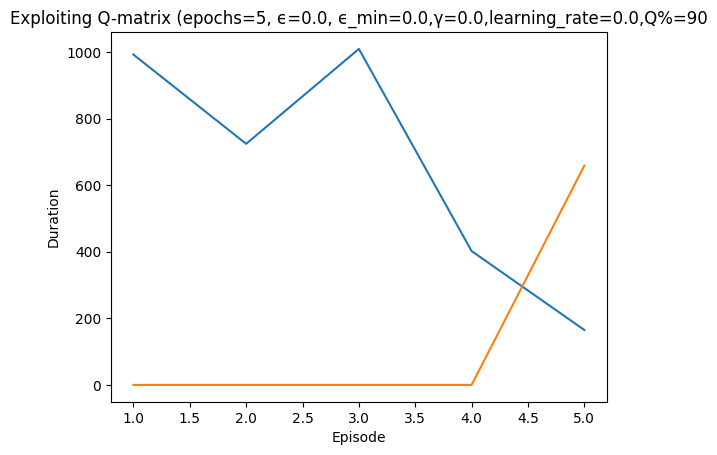

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix",
)

In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state_batch = torch.tensor(states_to_consider).to(device)
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sample_valid_action to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sample_valid_action` for environment variables or `env.get_wrapper_attr('sample_valid_action')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   16.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   20.0|last_reward_at:   17|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 58|reward:  120.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  120.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  134.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  134.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  140.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  140.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  146.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  146.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  154.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  154.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  154.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 181|reward:  254.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 181|reward:  254.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 1|Iteration 220|reward:  265.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 1|Iteration 220|reward:  265.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 1|Iteration 225|reward:  274.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 1|Iteration 225|reward:  274.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward:  276.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward:  276.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  280.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 306|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 397|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 440|reward:  380.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 440|reward:  380.0|last_reward_at:  440|Elapsed Time: 0:00:00||

Episode 1|Iteration 459|reward:  391.0|last_reward_at:  440|Elapsed Time: 0:00:00||

Episode 1|Iteration 459|reward:  391.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 1|Iteration 463|reward:  399.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 1|Iteration 463|reward:  399.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 1|Iteration 469|reward:  399.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 1|Iteration 474|reward:  399.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 476|reward:  408.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 476|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 482|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 487|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 490|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 495|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 501|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 507|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:  408.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 516|reward:  414.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 516|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:01||

Episode 1|Iteration 522|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 527|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 533|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 544|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 550|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 556|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 562|reward:  414.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 564|reward:  514.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 564|reward:  514.0|last_reward_at:  564|Elapsed Time: 0:00:02||

Episode 1|Iteration 569|reward:  514.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 1|Iteration 575|reward:  514.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 1|Iteration 580|reward:  514.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 1|Iteration 585|reward:  525.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 1|Iteration 585|reward:  525.0|last_reward_at:  585|Elapsed Time: 0:00:03||

Episode 1|Iteration 590|reward:  525.0|last_reward_at:  585|Elapsed Time: 0:00:03||

Episode 1|Iteration 595|reward:  525.0|last_reward_at:  585|Elapsed Time: 0:00:03||

Episode 1|Iteration 601|reward:  525.0|last_reward_at:  585|Elapsed Time: 0:00:03||

Episode 1|Iteration 607|reward:  525.0|last_reward_at:  585|Elapsed Time: 0:00:03||

Episode 1|Iteration 613|reward:  525.0|last_reward_at:  585|Elapsed Time: 0:00:03||

Episode 1|Iteration 614|reward:  529.0|last_reward_at:  585|Elapsed Time: 0:00:03||

Episode 1|Iteration 614|reward:  529.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 1|Iteration 617|reward:  529.0|last_reward_at:  614|Elapsed Time: 0:00:04||

Episode 1|Iteration 622|reward:  529.0|last_reward_at:  614|Elapsed Time: 0:00:04||

Episode 1|Iteration 624|reward:  531.0|last_reward_at:  614|Elapsed Time: 0:00:04||

Episode 1|Iteration 624|reward:  531.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 1|Iteration 630|reward:  531.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 1|Iteration 636|reward:  531.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 1|Iteration 642|reward:  531.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 1|Iteration 648|reward:  531.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 1|Iteration 649|reward:  540.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 1|Iteration 649|reward:  540.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 1|Iteration 655|reward:  540.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 1|Iteration 659|reward:  540.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 1|Iteration 662|reward:  540.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 1|Iteration 667|reward:  540.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 1|Iteration 672|reward:  540.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 1|Iteration 677|reward:  540.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 1|Iteration 680|reward:  640.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 1|Iteration 680|reward:  640.0|last_reward_at:  680|Elapsed Time: 0:00:05||

Episode 1|Iteration 684|reward:  640.0|last_reward_at:  680|Elapsed Time: 0:00:05||

Episode 1|Iteration 685|reward:  654.0|last_reward_at:  680|Elapsed Time: 0:00:05||

Episode 1|Iteration 685|reward:  654.0|last_reward_at:  685|Elapsed Time: 0:00:05||

Episode 1|Iteration 690|reward:  654.0|last_reward_at:  685|Elapsed Time: 0:00:05||

Episode 1|Iteration 695|reward:  654.0|last_reward_at:  685|Elapsed Time: 0:00:05||

Episode 1|Iteration 701|reward:  654.0|last_reward_at:  685|Elapsed Time: 0:00:05||

Episode 1|Iteration 707|reward:  654.0|last_reward_at:  685|Elapsed Time: 0:00:05||

Episode 1|Iteration 712|reward:  654.0|last_reward_at:  685|Elapsed Time: 0:00:06||

Episode 1|Iteration 717|reward:  654.0|last_reward_at:  685|Elapsed Time: 0:00:06||

Episode 1|Iteration 719|reward:  754.0|last_reward_at:  685|Elapsed Time: 0:00:06||

Episode 1|Iteration 719|reward:  754.0|last_reward_at:  719|Elapsed Time: 0:00:06||

Episode 1|Iteration 724|reward:  754.0|last_reward_at:  719|Elapsed Time: 0:00:06||

Episode 1|Iteration 725|reward:  765.0|last_reward_at:  719|Elapsed Time: 0:00:06||

Episode 1|Iteration 725|reward:  765.0|last_reward_at:  725|Elapsed Time: 0:00:06||

Episode 1|Iteration 728|reward:  769.0|last_reward_at:  725|Elapsed Time: 0:00:06||

Episode 1|Iteration 728|reward:  769.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 1|Iteration 734|reward:  775.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 1|Iteration 734|reward:  775.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 1|Iteration 740|reward:  775.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 1|Iteration 745|reward:  777.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 1|Iteration 745|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:06||

Episode 1|Iteration 751|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:06||

Episode 1|Iteration 757|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:06||

Episode 1|Iteration 762|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 767|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 772|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 776|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 781|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 787|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 793|reward:  777.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 794|reward:  786.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 794|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:07||

Episode 1|Iteration 798|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:07||

Episode 1|Iteration 802|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 807|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 811|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 816|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 821|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 826|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 831|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 836|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 841|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:08||

Episode 1|Iteration 847|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 850|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 856|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 861|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 866|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 872|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 878|reward:  786.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 882|reward:  886.0|last_reward_at:  794|Elapsed Time: 0:00:09||

Episode 1|Iteration 882|reward:  886.0|last_reward_at:  882|Elapsed Time: 0:00:09||

Episode 1|Iteration 884|reward:  900.0|last_reward_at:  882|Elapsed Time: 0:00:09||

Episode 1|Iteration 884|reward:  900.0|last_reward_at:  884|Elapsed Time: 0:00:09||

Episode 1|Iteration 889|reward:  900.0|last_reward_at:  884|Elapsed Time: 0:00:09||

Episode 1|Iteration 895|reward:  900.0|last_reward_at:  884|Elapsed Time: 0:00:10||

Episode 1|Iteration 900|reward:  900.0|last_reward_at:  884|Elapsed Time: 0:00:10||

Episode 1|Iteration 905|reward:  900.0|last_reward_at:  884|Elapsed Time: 0:00:10||

Episode 1|Iteration 909|reward:  908.0|last_reward_at:  884|Elapsed Time: 0:00:10||

Episode 1|Iteration 909|reward:  908.0|last_reward_at:  909|Elapsed Time: 0:00:10||

Episode 1|Iteration 910|reward:  914.0|last_reward_at:  909|Elapsed Time: 0:00:10||

Episode 1|Iteration 910|reward:  914.0|last_reward_at:  910|Elapsed Time: 0:00:10||

Episode 1|Iteration 915|reward:  914.0|last_reward_at:  910|Elapsed Time: 0:00:10||

Episode 1|Iteration 920|reward:  914.0|last_reward_at:  910|Elapsed Time: 0:00:10||

Episode 1|Iteration 921|reward:  920.0|last_reward_at:  910|Elapsed Time: 0:00:10||

Episode 1|Iteration 921|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:10||

Episode 1|Iteration 926|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:10||

Episode 1|Iteration 931|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:10||

Episode 1|Iteration 936|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:10||

Episode 1|Iteration 941|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 946|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 951|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 956|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 961|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 966|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 971|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 975|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 981|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 986|reward:  920.0|last_reward_at:  921|Elapsed Time: 0:00:11||

Episode 1|Iteration 987|reward: 1020.0|last_reward_at:  921|Elapsed Time: 0:00:12||

Episode 1|Iteration 987|reward: 1020.0|last_reward_at:  987|Elapsed Time: 0:00:12||

Episode 1|Iteration 988|reward: 1031.0|last_reward_at:  987|Elapsed Time: 0:00:12||

Episode 1|Iteration 988|reward: 1031.0|last_reward_at:  988|Elapsed Time: 0:00:12||

Episode 1|Iteration 992|reward: 1031.0|last_reward_at:  988|Elapsed Time: 0:00:12||

Episode 1|Iteration 993|reward: 1031.0|last_reward_at:  988|Elapsed Time: 0:00:12||

Episode 1|Iteration 998|reward: 1031.0|last_reward_at:  988|Elapsed Time: 0:00:12||

Episode 1|Iteration 999|reward: 1031.0|last_reward_at:  988|Elapsed Time: 0:00:12||

Episode 1|Iteration 1003|reward: 1035.0|last_reward_at:  988|Elapsed Time: 0:00:12||

Episode 1|Iteration 1003|reward: 1035.0|last_reward_at: 1003|Elapsed Time: 0:00:12||

Episode 1|Iteration 1008|reward: 1035.0|last_reward_at: 1003|Elapsed Time: 0:00:13||

Episode 1|Iteration 1013|reward: 1044.0|last_reward_at: 1003|Elapsed Time: 0:00:13||

Episode 1|Iteration 1013|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1018|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1022|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1026|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1029|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1034|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1039|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1044|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1049|reward: 1044.0|last_reward_at: 1013|Elapsed Time: 0:00:13||

Episode 1|Iteration 1051|reward: 1144.0|last_reward_at: 1013|Elapsed Time: 0:00:14||

Episode 1|Iteration 1051|reward: 1144.0|last_reward_at: 1051|Elapsed Time: 0:00:14||

Episode 1|Iteration 1052|reward: 1158.0|last_reward_at: 1051|Elapsed Time: 0:00:14||

Episode 1|Iteration 1052|reward: 1158.0|last_reward_at: 1052|Elapsed Time: 0:00:14||

Episode 1|Iteration 1054|reward: 1258.0|last_reward_at: 1052|Elapsed Time: 0:00:14||

Episode 1|Iteration 1054|reward: 1258.0|last_reward_at: 1054|Elapsed Time: 0:00:14||

Episode 1|Iteration 1058|reward: 1269.0|last_reward_at: 1054|Elapsed Time: 0:00:14||

Episode 1|Iteration 1058|reward: 1269.0|last_reward_at: 1058|Elapsed Time: 0:00:14||

Episode 1|Iteration 1063|reward: 1269.0|last_reward_at: 1058|Elapsed Time: 0:00:14||

Episode 1|Iteration 1066|reward: 1269.0|last_reward_at: 1058|Elapsed Time: 0:00:14||

Episode 1|Iteration 1068|reward: 1278.0|last_reward_at: 1058|Elapsed Time: 0:00:14||

Episode 1|Iteration 1068|reward: 1278.0|last_reward_at: 1068|Elapsed Time: 0:00:14||

Episode 1|Iteration 1073|reward: 1278.0|last_reward_at: 1068|Elapsed Time: 0:00:14||

Episode 1|Iteration 1078|reward: 1278.0|last_reward_at: 1068|Elapsed Time: 0:00:14||

Episode 1|Iteration 1080|reward: 6278.0|last_reward_at: 1068|Elapsed Time: 0:00:14||

Episode 1|Iteration 1080|reward: 6278.0|last_reward_at: 1080|Elapsed Time: 0:00:14||

  Episode 1 ended at t=1080 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/201 (0.04)
    explore-remote: 16/322 (0.05)
    explore-connect: 3/348 (0.01)
    exploit-local: 10/55 (0.15)
    exploit-remote: 1/17 (0.06)
    exploit-connect: 8/91 (0.08)
  exploit deflected to exploration: 22
  ## Episode: 2/50 'DQL' ϵ=0.7447, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  245.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  245.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  368.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  368.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  370.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  370.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  370.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  370.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  376.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  376.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  476.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  476.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  487.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 2|Iteration 49|reward:  487.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 2|Iteration 50|reward:  496.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 2|Iteration 50|reward:  496.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 2|Iteration 52|reward:  498.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 2|Iteration 52|reward:  498.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 2|Iteration 56|reward:  598.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 2|Iteration 56|reward:  598.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 2|Iteration 57|reward:  600.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 2|Iteration 57|reward:  600.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 2|Iteration 59|reward:  614.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 2|Iteration 59|reward:  614.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 2|Iteration 64|reward:  616.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 2|Iteration 64|reward:  616.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 2|Iteration 66|reward:  622.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 2|Iteration 66|reward:  622.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 2|Iteration 68|reward:  628.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 2|Iteration 68|reward:  628.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 2|Iteration 71|reward:  634.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 2|Iteration 71|reward:  634.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 2|Iteration 76|reward:  636.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 2|Iteration 76|reward:  636.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 78|reward:  644.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 78|reward:  644.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 2|Iteration 83|reward:  650.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 2|Iteration 83|reward:  650.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward:  650.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 2|Iteration 95|reward:  650.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 2|Iteration 101|reward:  650.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 2|Iteration 106|reward:  650.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 2|Iteration 110|reward:  750.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 2|Iteration 110|reward:  750.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 2|Iteration 114|reward:  750.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 2|Iteration 118|reward:  750.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 2|Iteration 122|reward:  761.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 2|Iteration 122|reward:  761.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 2|Iteration 123|reward:  770.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 2|Iteration 123|reward:  770.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 127|reward:  772.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 127|reward:  772.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 132|reward:  772.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 134|reward:  872.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 134|reward:  872.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 2|Iteration 139|reward:  872.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 2|Iteration 145|reward:  872.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 2|Iteration 146|reward:  874.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 2|Iteration 146|reward:  874.0|last_reward_at:  146|Elapsed Time: 0:00:02||

Episode 2|Iteration 149|reward:  888.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 2|Iteration 149|reward:  888.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 2|Iteration 153|reward:  890.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 2|Iteration 153|reward:  890.0|last_reward_at:  153|Elapsed Time: 0:00:03||

Episode 2|Iteration 159|reward:  890.0|last_reward_at:  153|Elapsed Time: 0:00:03||

Episode 2|Iteration 163|reward:  896.0|last_reward_at:  153|Elapsed Time: 0:00:03||

Episode 2|Iteration 163|reward:  896.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 2|Iteration 168|reward:  896.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 2|Iteration 173|reward:  896.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 2|Iteration 178|reward:  896.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 2|Iteration 184|reward:  896.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 2|Iteration 189|reward:  902.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 2|Iteration 189|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 2|Iteration 195|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 2|Iteration 201|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 206|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 211|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 216|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 221|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 226|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 231|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 236|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 241|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 2|Iteration 246|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 251|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 256|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 261|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 266|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 271|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 276|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 281|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 286|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 2|Iteration 291|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:06||

Episode 2|Iteration 297|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:06||

Episode 2|Iteration 302|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:06||

Episode 2|Iteration 307|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:06||

Episode 2|Iteration 312|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:06||

Episode 2|Iteration 317|reward:  902.0|last_reward_at:  189|Elapsed Time: 0:00:06||

Episode 2|Iteration 319|reward: 1002.0|last_reward_at:  189|Elapsed Time: 0:00:06||

Episode 2|Iteration 319|reward: 1002.0|last_reward_at:  319|Elapsed Time: 0:00:06||

Episode 2|Iteration 320|reward: 1013.0|last_reward_at:  319|Elapsed Time: 0:00:06||

Episode 2|Iteration 320|reward: 1013.0|last_reward_at:  320|Elapsed Time: 0:00:06||

Episode 2|Iteration 322|reward: 1017.0|last_reward_at:  320|Elapsed Time: 0:00:06||

Episode 2|Iteration 322|reward: 1017.0|last_reward_at:  322|Elapsed Time: 0:00:06||

Episode 2|Iteration 327|reward: 1017.0|last_reward_at:  322|Elapsed Time: 0:00:06||

Episode 2|Iteration 328|reward: 1026.0|last_reward_at:  322|Elapsed Time: 0:00:06||

Episode 2|Iteration 328|reward: 1026.0|last_reward_at:  328|Elapsed Time: 0:00:06||

Episode 2|Iteration 333|reward: 1026.0|last_reward_at:  328|Elapsed Time: 0:00:06||

Episode 2|Iteration 338|reward: 1026.0|last_reward_at:  328|Elapsed Time: 0:00:07||

Episode 2|Iteration 342|reward: 1026.0|last_reward_at:  328|Elapsed Time: 0:00:07||

Episode 2|Iteration 347|reward: 1026.0|last_reward_at:  328|Elapsed Time: 0:00:07||

Episode 2|Iteration 352|reward: 1026.0|last_reward_at:  328|Elapsed Time: 0:00:07||

Episode 2|Iteration 357|reward: 1026.0|last_reward_at:  328|Elapsed Time: 0:00:07||

Episode 2|Iteration 360|reward: 1126.0|last_reward_at:  328|Elapsed Time: 0:00:07||

Episode 2|Iteration 360|reward: 1126.0|last_reward_at:  360|Elapsed Time: 0:00:07||

Episode 2|Iteration 361|reward: 1140.0|last_reward_at:  360|Elapsed Time: 0:00:07||

Episode 2|Iteration 361|reward: 1140.0|last_reward_at:  361|Elapsed Time: 0:00:07||

Episode 2|Iteration 363|reward: 1240.0|last_reward_at:  361|Elapsed Time: 0:00:07||

Episode 2|Iteration 363|reward: 1240.0|last_reward_at:  363|Elapsed Time: 0:00:07||

Episode 2|Iteration 366|reward: 1251.0|last_reward_at:  363|Elapsed Time: 0:00:07||

Episode 2|Iteration 366|reward: 1251.0|last_reward_at:  366|Elapsed Time: 0:00:07||

Episode 2|Iteration 369|reward: 1260.0|last_reward_at:  366|Elapsed Time: 0:00:07||

Episode 2|Iteration 369|reward: 1260.0|last_reward_at:  369|Elapsed Time: 0:00:07||

Episode 2|Iteration 374|reward: 1260.0|last_reward_at:  369|Elapsed Time: 0:00:07||

Episode 2|Iteration 379|reward: 1260.0|last_reward_at:  369|Elapsed Time: 0:00:07||

Episode 2|Iteration 384|reward: 6260.0|last_reward_at:  369|Elapsed Time: 0:00:08||

Episode 2|Iteration 384|reward: 6260.0|last_reward_at:  384|Elapsed Time: 0:00:08||

  Episode 2 ended at t=384 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/61 (0.08)
    explore-remote: 13/95 (0.12)
    explore-connect: 1/95 (0.01)
    exploit-local: 13/4 (0.76)
    exploit-remote: 3/34 (0.08)
    exploit-connect: 10/50 (0.17)
  exploit deflected to exploration: 2
  ## Episode: 3/50 'DQL' ϵ=0.6971, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  131.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  137.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  137.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  137.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  137.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  137.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  145.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 48|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 52|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 58|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 64|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 68|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 72|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 73|reward:  154.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 73|reward:  154.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 3|Iteration 79|reward:  154.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 3|Iteration 82|reward:  254.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 3|Iteration 82|reward:  254.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 3|Iteration 85|reward:  265.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 3|Iteration 85|reward:  265.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 3|Iteration 87|reward:  269.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 3|Iteration 87|reward:  269.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 3|Iteration 92|reward:  278.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 3|Iteration 92|reward:  278.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 3|Iteration 97|reward:  378.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 3|Iteration 97|reward:  378.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 3|Iteration 98|reward:  392.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 3|Iteration 98|reward:  392.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 3|Iteration 101|reward:  492.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 3|Iteration 101|reward:  492.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 3|Iteration 105|reward:  503.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 3|Iteration 105|reward:  503.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 3|Iteration 106|reward:  512.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 3|Iteration 106|reward:  512.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 3|Iteration 110|reward:  612.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 3|Iteration 110|reward:  612.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 112|reward:  626.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 112|reward:  626.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 3|Iteration 117|reward:  626.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 3|Iteration 123|reward:  626.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 3|Iteration 129|reward:  726.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 3|Iteration 129|reward:  726.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 3|Iteration 131|reward:  737.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 3|Iteration 131|reward:  737.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 3|Iteration 134|reward:  739.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 3|Iteration 134|reward:  739.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 3|Iteration 135|reward:  748.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 3|Iteration 135|reward:  748.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 3|Iteration 136|reward:  750.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 3|Iteration 136|reward:  750.0|last_reward_at:  136|Elapsed Time: 0:00:02||

Episode 3|Iteration 137|reward:  756.0|last_reward_at:  136|Elapsed Time: 0:00:02||

Episode 3|Iteration 137|reward:  756.0|last_reward_at:  137|Elapsed Time: 0:00:02||

Episode 3|Iteration 142|reward:  756.0|last_reward_at:  137|Elapsed Time: 0:00:03||

Episode 3|Iteration 145|reward:  758.0|last_reward_at:  137|Elapsed Time: 0:00:03||

Episode 3|Iteration 145|reward:  758.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 148|reward:  762.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 148|reward:  762.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 150|reward:  768.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 150|reward:  768.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 3|Iteration 151|reward:  868.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 3|Iteration 151|reward:  868.0|last_reward_at:  151|Elapsed Time: 0:00:03||

Episode 3|Iteration 153|reward:  870.0|last_reward_at:  151|Elapsed Time: 0:00:03||

Episode 3|Iteration 153|reward:  870.0|last_reward_at:  153|Elapsed Time: 0:00:03||

Episode 3|Iteration 154|reward:  884.0|last_reward_at:  153|Elapsed Time: 0:00:03||

Episode 3|Iteration 154|reward:  884.0|last_reward_at:  154|Elapsed Time: 0:00:03||

Episode 3|Iteration 157|reward:  984.0|last_reward_at:  154|Elapsed Time: 0:00:03||

Episode 3|Iteration 157|reward:  984.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 3|Iteration 158|reward:  995.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 3|Iteration 158|reward:  995.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 3|Iteration 159|reward: 1004.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 3|Iteration 159|reward: 1004.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 3|Iteration 161|reward: 1010.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 3|Iteration 161|reward: 1010.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 3|Iteration 166|reward: 1012.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 3|Iteration 166|reward: 1012.0|last_reward_at:  166|Elapsed Time: 0:00:03||

Episode 3|Iteration 171|reward: 1012.0|last_reward_at:  166|Elapsed Time: 0:00:03||

Episode 3|Iteration 176|reward: 1012.0|last_reward_at:  166|Elapsed Time: 0:00:03||

Episode 3|Iteration 179|reward: 1018.0|last_reward_at:  166|Elapsed Time: 0:00:03||

Episode 3|Iteration 179|reward: 1018.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 3|Iteration 184|reward: 1118.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 3|Iteration 184|reward: 1118.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 3|Iteration 189|reward: 1124.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 3|Iteration 189|reward: 1124.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 3|Iteration 192|reward: 1138.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 3|Iteration 192|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 197|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 202|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 207|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 212|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 217|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 221|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 225|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 3|Iteration 230|reward: 1138.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 3|Iteration 233|reward: 1144.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 3|Iteration 233|reward: 1144.0|last_reward_at:  233|Elapsed Time: 0:00:05||

Episode 3|Iteration 234|reward: 1150.0|last_reward_at:  233|Elapsed Time: 0:00:05||

Episode 3|Iteration 234|reward: 1150.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 3|Iteration 239|reward: 1150.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 3|Iteration 243|reward: 1158.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 3|Iteration 243|reward: 1158.0|last_reward_at:  243|Elapsed Time: 0:00:05||

Episode 3|Iteration 248|reward: 1158.0|last_reward_at:  243|Elapsed Time: 0:00:05||

Episode 3|Iteration 250|reward: 1258.0|last_reward_at:  243|Elapsed Time: 0:00:05||

Episode 3|Iteration 250|reward: 1258.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 255|reward: 1258.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 257|reward: 1269.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 257|reward: 1269.0|last_reward_at:  257|Elapsed Time: 0:00:05||

Episode 3|Iteration 262|reward: 1269.0|last_reward_at:  257|Elapsed Time: 0:00:05||

Episode 3|Iteration 265|reward: 1278.0|last_reward_at:  257|Elapsed Time: 0:00:05||

Episode 3|Iteration 265|reward: 1278.0|last_reward_at:  265|Elapsed Time: 0:00:05||

Episode 3|Iteration 270|reward: 1278.0|last_reward_at:  265|Elapsed Time: 0:00:05||

Episode 3|Iteration 275|reward: 1278.0|last_reward_at:  265|Elapsed Time: 0:00:06||

Episode 3|Iteration 280|reward: 1278.0|last_reward_at:  265|Elapsed Time: 0:00:06||

Episode 3|Iteration 284|reward: 1284.0|last_reward_at:  265|Elapsed Time: 0:00:06||

Episode 3|Iteration 284|reward: 1284.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 3|Iteration 289|reward: 1284.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 3|Iteration 294|reward: 1284.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 3|Iteration 297|reward: 6284.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 3|Iteration 297|reward: 6284.0|last_reward_at:  297|Elapsed Time: 0:00:06||

  Episode 3 ended at t=297 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/41 (0.11)
    explore-remote: 16/76 (0.17)
    explore-connect: 1/84 (0.01)
    exploit-local: 14/2 (0.88)
    exploit-remote: 2/13 (0.13)
    exploit-connect: 10/33 (0.23)
  exploit deflected to exploration: 14
  ## Episode: 4/50 'DQL' ϵ=0.6626, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  251.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  251.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  260.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  260.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  264.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  264.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  270.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  270.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  276.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  276.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  376.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  376.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  390.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 4|Iteration 58|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 4|Iteration 63|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 4|Iteration 68|reward:  398.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 4|Iteration 68|reward:  398.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 4|Iteration 69|reward:  400.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 4|Iteration 69|reward:  400.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 4|Iteration 73|reward:  500.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 4|Iteration 73|reward:  500.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 4|Iteration 75|reward:  511.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 4|Iteration 75|reward:  511.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 4|Iteration 76|reward:  520.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 4|Iteration 76|reward:  520.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 79|reward:  526.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 79|reward:  526.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 84|reward:  526.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 89|reward:  626.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 89|reward:  626.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 4|Iteration 92|reward:  640.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 4|Iteration 92|reward:  640.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 4|Iteration 94|reward:  642.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 4|Iteration 94|reward:  642.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 4|Iteration 100|reward:  642.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 4|Iteration 106|reward:  650.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 4|Iteration 106|reward:  650.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 4|Iteration 108|reward:  656.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 4|Iteration 108|reward:  656.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 4|Iteration 111|reward:  658.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 4|Iteration 111|reward:  658.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 4|Iteration 112|reward:  758.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 4|Iteration 112|reward:  758.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 4|Iteration 113|reward:  764.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 4|Iteration 113|reward:  764.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 4|Iteration 119|reward:  775.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 4|Iteration 119|reward:  775.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 4|Iteration 120|reward:  784.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 4|Iteration 120|reward:  784.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 4|Iteration 122|reward:  786.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 4|Iteration 122|reward:  786.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 4|Iteration 128|reward:  786.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 4|Iteration 131|reward:  790.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 4|Iteration 131|reward:  790.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 4|Iteration 137|reward:  790.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 4|Iteration 139|reward:  890.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 4|Iteration 139|reward:  890.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 4|Iteration 144|reward:  890.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 4|Iteration 149|reward:  890.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 4|Iteration 152|reward:  904.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 4|Iteration 152|reward:  904.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 4|Iteration 158|reward:  912.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 4|Iteration 158|reward:  912.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 4|Iteration 159|reward:  918.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 4|Iteration 159|reward:  918.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 4|Iteration 164|reward:  918.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 4|Iteration 170|reward:  918.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 4|Iteration 175|reward:  918.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 4|Iteration 180|reward:  918.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 4|Iteration 185|reward:  918.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 4|Iteration 189|reward: 1018.0|last_reward_at:  159|Elapsed Time: 0:00:03||

Episode 4|Iteration 189|reward: 1018.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 4|Iteration 194|reward: 1018.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 4|Iteration 195|reward: 1029.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 4|Iteration 195|reward: 1029.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 4|Iteration 199|reward: 1038.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 4|Iteration 199|reward: 1038.0|last_reward_at:  199|Elapsed Time: 0:00:04||

Episode 4|Iteration 201|reward: 1044.0|last_reward_at:  199|Elapsed Time: 0:00:04||

Episode 4|Iteration 201|reward: 1044.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 206|reward: 1044.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 212|reward: 1044.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 217|reward: 1044.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 222|reward: 1044.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 227|reward: 1044.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 232|reward: 1044.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 234|reward: 1046.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 4|Iteration 234|reward: 1046.0|last_reward_at:  234|Elapsed Time: 0:00:04||

Episode 4|Iteration 239|reward: 1046.0|last_reward_at:  234|Elapsed Time: 0:00:04||

Episode 4|Iteration 244|reward: 1046.0|last_reward_at:  234|Elapsed Time: 0:00:04||

Episode 4|Iteration 249|reward: 1046.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 4|Iteration 254|reward: 1046.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 4|Iteration 259|reward: 1052.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 4|Iteration 259|reward: 1052.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 4|Iteration 264|reward: 1052.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 4|Iteration 267|reward: 1152.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 4|Iteration 267|reward: 1152.0|last_reward_at:  267|Elapsed Time: 0:00:05||

Episode 4|Iteration 270|reward: 1166.0|last_reward_at:  267|Elapsed Time: 0:00:05||

Episode 4|Iteration 270|reward: 1166.0|last_reward_at:  270|Elapsed Time: 0:00:05||

Episode 4|Iteration 275|reward: 1166.0|last_reward_at:  270|Elapsed Time: 0:00:05||

Episode 4|Iteration 276|reward: 1172.0|last_reward_at:  270|Elapsed Time: 0:00:05||

Episode 4|Iteration 276|reward: 1172.0|last_reward_at:  276|Elapsed Time: 0:00:05||

Episode 4|Iteration 281|reward: 1172.0|last_reward_at:  276|Elapsed Time: 0:00:05||

Episode 4|Iteration 285|reward: 1172.0|last_reward_at:  276|Elapsed Time: 0:00:05||

Episode 4|Iteration 290|reward: 1172.0|last_reward_at:  276|Elapsed Time: 0:00:06||

Episode 4|Iteration 295|reward: 1172.0|last_reward_at:  276|Elapsed Time: 0:00:06||

Episode 4|Iteration 297|reward: 1272.0|last_reward_at:  276|Elapsed Time: 0:00:06||

Episode 4|Iteration 297|reward: 1272.0|last_reward_at:  297|Elapsed Time: 0:00:06||

Episode 4|Iteration 301|reward: 1283.0|last_reward_at:  297|Elapsed Time: 0:00:06||

Episode 4|Iteration 301|reward: 1283.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 304|reward: 1292.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 304|reward: 1292.0|last_reward_at:  304|Elapsed Time: 0:00:06||

Episode 4|Iteration 309|reward: 1292.0|last_reward_at:  304|Elapsed Time: 0:00:06||

Episode 4|Iteration 311|reward: 6292.0|last_reward_at:  304|Elapsed Time: 0:00:06||

Episode 4|Iteration 311|reward: 6292.0|last_reward_at:  311|Elapsed Time: 0:00:06||

  Episode 4 ended at t=311 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/58 (0.05)
    explore-remote: 14/67 (0.17)
    explore-connect: 0/61 (0.00)
    exploit-local: 17/9 (0.65)
    exploit-remote: 4/28 (0.12)
    exploit-connect: 11/39 (0.22)
  exploit deflected to exploration: 0
  ## Episode: 5/50 'DQL' ϵ=0.6287, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  250.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  256.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  356.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  370.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  370.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  372.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  380.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  380.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  386.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  386.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  392.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  392.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  398.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  398.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  398.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:  398.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  400.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  400.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  400.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 5|Iteration 62|reward:  400.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 5|Iteration 68|reward:  400.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 5|Iteration 71|reward:  406.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 5|Iteration 71|reward:  406.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 5|Iteration 76|reward:  406.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 5|Iteration 81|reward:  406.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 5|Iteration 85|reward:  408.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 5|Iteration 85|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 5|Iteration 91|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 5|Iteration 97|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 5|Iteration 103|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 108|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 114|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 119|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 125|reward:  408.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 126|reward:  508.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 126|reward:  508.0|last_reward_at:  126|Elapsed Time: 0:00:02||

Episode 5|Iteration 127|reward:  519.0|last_reward_at:  126|Elapsed Time: 0:00:02||

Episode 5|Iteration 127|reward:  519.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 5|Iteration 128|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 5|Iteration 128|reward:  528.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 5|Iteration 134|reward:  528.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 5|Iteration 139|reward:  528.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 5|Iteration 143|reward:  628.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 5|Iteration 143|reward:  628.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 5|Iteration 149|reward:  628.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 5|Iteration 150|reward:  642.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 5|Iteration 150|reward:  642.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 5|Iteration 155|reward:  642.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 5|Iteration 156|reward:  644.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 5|Iteration 156|reward:  644.0|last_reward_at:  156|Elapsed Time: 0:00:03||

Episode 5|Iteration 157|reward:  646.0|last_reward_at:  156|Elapsed Time: 0:00:03||

Episode 5|Iteration 157|reward:  646.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 5|Iteration 160|reward:  746.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 5|Iteration 160|reward:  746.0|last_reward_at:  160|Elapsed Time: 0:00:03||

Episode 5|Iteration 164|reward:  760.0|last_reward_at:  160|Elapsed Time: 0:00:03||

Episode 5|Iteration 164|reward:  760.0|last_reward_at:  164|Elapsed Time: 0:00:03||

Episode 5|Iteration 167|reward:  766.0|last_reward_at:  164|Elapsed Time: 0:00:03||

Episode 5|Iteration 167|reward:  766.0|last_reward_at:  167|Elapsed Time: 0:00:03||

Episode 5|Iteration 172|reward:  770.0|last_reward_at:  167|Elapsed Time: 0:00:03||

Episode 5|Iteration 172|reward:  770.0|last_reward_at:  172|Elapsed Time: 0:00:03||

Episode 5|Iteration 176|reward:  770.0|last_reward_at:  172|Elapsed Time: 0:00:03||

Episode 5|Iteration 178|reward:  870.0|last_reward_at:  172|Elapsed Time: 0:00:03||

Episode 5|Iteration 178|reward:  870.0|last_reward_at:  178|Elapsed Time: 0:00:03||

Episode 5|Iteration 183|reward:  870.0|last_reward_at:  178|Elapsed Time: 0:00:03||

Episode 5|Iteration 184|reward:  884.0|last_reward_at:  178|Elapsed Time: 0:00:03||

Episode 5|Iteration 184|reward:  884.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 5|Iteration 189|reward:  884.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 5|Iteration 195|reward:  884.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 5|Iteration 200|reward:  984.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 200|reward:  984.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 5|Iteration 203|reward:  998.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 5|Iteration 203|reward:  998.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 5|Iteration 208|reward:  998.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 5|Iteration 213|reward:  998.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 5|Iteration 214|reward: 1004.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 5|Iteration 214|reward: 1004.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 5|Iteration 218|reward: 1010.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 5|Iteration 218|reward: 1010.0|last_reward_at:  218|Elapsed Time: 0:00:04||

Episode 5|Iteration 222|reward: 1110.0|last_reward_at:  218|Elapsed Time: 0:00:04||

Episode 5|Iteration 222|reward: 1110.0|last_reward_at:  222|Elapsed Time: 0:00:04||

Episode 5|Iteration 227|reward: 1110.0|last_reward_at:  222|Elapsed Time: 0:00:04||

Episode 5|Iteration 228|reward: 1124.0|last_reward_at:  222|Elapsed Time: 0:00:04||

Episode 5|Iteration 228|reward: 1124.0|last_reward_at:  228|Elapsed Time: 0:00:04||

Episode 5|Iteration 231|reward: 1132.0|last_reward_at:  228|Elapsed Time: 0:00:04||

Episode 5|Iteration 231|reward: 1132.0|last_reward_at:  231|Elapsed Time: 0:00:04||

Episode 5|Iteration 236|reward: 1132.0|last_reward_at:  231|Elapsed Time: 0:00:04||

Episode 5|Iteration 237|reward: 1134.0|last_reward_at:  231|Elapsed Time: 0:00:04||

Episode 5|Iteration 237|reward: 1134.0|last_reward_at:  237|Elapsed Time: 0:00:04||

Episode 5|Iteration 238|reward: 1136.0|last_reward_at:  237|Elapsed Time: 0:00:04||

Episode 5|Iteration 238|reward: 1136.0|last_reward_at:  238|Elapsed Time: 0:00:04||

Episode 5|Iteration 243|reward: 1136.0|last_reward_at:  238|Elapsed Time: 0:00:05||

Episode 5|Iteration 245|reward: 1142.0|last_reward_at:  238|Elapsed Time: 0:00:05||

Episode 5|Iteration 245|reward: 1142.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 5|Iteration 250|reward: 1142.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 5|Iteration 251|reward: 1242.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 5|Iteration 251|reward: 1242.0|last_reward_at:  251|Elapsed Time: 0:00:05||

Episode 5|Iteration 254|reward: 1256.0|last_reward_at:  251|Elapsed Time: 0:00:05||

Episode 5|Iteration 254|reward: 1256.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 5|Iteration 259|reward: 1256.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 5|Iteration 264|reward: 1256.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 5|Iteration 269|reward: 1256.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 5|Iteration 270|reward: 6256.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 5|Iteration 270|reward: 6256.0|last_reward_at:  270|Elapsed Time: 0:00:05||

  Episode 5 ended at t=270 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/44 (0.12)
    explore-remote: 12/37 (0.24)
    explore-connect: 0/79 (0.00)
    exploit-local: 10/18 (0.36)
    exploit-remote: 5/22 (0.19)
    exploit-connect: 11/26 (0.30)
  exploit deflected to exploration: 0
  ## Episode: 6/50 'DQL' ϵ=0.6009, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  246.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  246.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  346.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  352.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  352.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  363.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  363.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  369.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  369.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  369.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  375.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  375.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  375.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  375.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 6|Iteration 36|reward:  375.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 6|Iteration 39|reward:  375.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 6|Iteration 45|reward:  375.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 6|Iteration 46|reward:  381.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 6|Iteration 46|reward:  381.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 6|Iteration 47|reward:  383.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 6|Iteration 47|reward:  383.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 6|Iteration 49|reward:  383.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 6|Iteration 54|reward:  383.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 6|Iteration 57|reward:  383.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 6|Iteration 63|reward:  383.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 6|Iteration 69|reward:  383.0|last_reward_at:   47|Elapsed Time: 0:00:02||

Episode 6|Iteration 70|reward:  392.0|last_reward_at:   47|Elapsed Time: 0:00:02||

Episode 6|Iteration 70|reward:  392.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 6|Iteration 72|reward:  398.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 6|Iteration 72|reward:  398.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 6|Iteration 76|reward:  498.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 6|Iteration 76|reward:  498.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 6|Iteration 78|reward:  512.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 6|Iteration 78|reward:  512.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 6|Iteration 84|reward:  512.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 6|Iteration 89|reward:  512.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 6|Iteration 92|reward:  514.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 6|Iteration 92|reward:  514.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 6|Iteration 94|reward:  520.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 6|Iteration 94|reward:  520.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 6|Iteration 97|reward:  522.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 6|Iteration 97|reward:  522.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 6|Iteration 103|reward:  522.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 6|Iteration 109|reward:  522.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward:  526.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward:  526.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 6|Iteration 117|reward:  526.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 6|Iteration 123|reward:  526.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 6|Iteration 129|reward:  526.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 6|Iteration 135|reward:  526.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 6|Iteration 141|reward:  526.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 6|Iteration 147|reward:  526.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 6|Iteration 148|reward:  626.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 6|Iteration 148|reward:  626.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 6|Iteration 151|reward:  640.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 6|Iteration 151|reward:  640.0|last_reward_at:  151|Elapsed Time: 0:00:03||

Episode 6|Iteration 157|reward:  640.0|last_reward_at:  151|Elapsed Time: 0:00:03||

Episode 6|Iteration 158|reward:  646.0|last_reward_at:  151|Elapsed Time: 0:00:03||

Episode 6|Iteration 158|reward:  646.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 6|Iteration 163|reward:  746.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 6|Iteration 163|reward:  746.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 6|Iteration 164|reward:  752.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 6|Iteration 164|reward:  752.0|last_reward_at:  164|Elapsed Time: 0:00:03||

Episode 6|Iteration 165|reward:  766.0|last_reward_at:  164|Elapsed Time: 0:00:03||

Episode 6|Iteration 165|reward:  766.0|last_reward_at:  165|Elapsed Time: 0:00:03||

Episode 6|Iteration 171|reward:  766.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 6|Iteration 176|reward:  766.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 6|Iteration 181|reward:  766.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 6|Iteration 184|reward:  772.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 6|Iteration 184|reward:  772.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 6|Iteration 188|reward:  776.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 6|Iteration 188|reward:  776.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 6|Iteration 193|reward:  876.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 6|Iteration 193|reward:  876.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 6|Iteration 194|reward:  890.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 6|Iteration 194|reward:  890.0|last_reward_at:  194|Elapsed Time: 0:00:04||

Episode 6|Iteration 199|reward:  890.0|last_reward_at:  194|Elapsed Time: 0:00:04||

Episode 6|Iteration 203|reward:  896.0|last_reward_at:  194|Elapsed Time: 0:00:04||

Episode 6|Iteration 203|reward:  896.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 6|Iteration 204|reward:  904.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 6|Iteration 204|reward:  904.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 6|Iteration 209|reward:  904.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 6|Iteration 215|reward:  904.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 6|Iteration 220|reward:  904.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 6|Iteration 224|reward: 1004.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 6|Iteration 224|reward: 1004.0|last_reward_at:  224|Elapsed Time: 0:00:05||

Episode 6|Iteration 227|reward: 1018.0|last_reward_at:  224|Elapsed Time: 0:00:05||

Episode 6|Iteration 227|reward: 1018.0|last_reward_at:  227|Elapsed Time: 0:00:05||

Episode 6|Iteration 232|reward: 1018.0|last_reward_at:  227|Elapsed Time: 0:00:05||

Episode 6|Iteration 233|reward: 1118.0|last_reward_at:  227|Elapsed Time: 0:00:05||

Episode 6|Iteration 233|reward: 1118.0|last_reward_at:  233|Elapsed Time: 0:00:05||

Episode 6|Iteration 234|reward: 1132.0|last_reward_at:  233|Elapsed Time: 0:00:05||

Episode 6|Iteration 234|reward: 1132.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 6|Iteration 240|reward: 1132.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 6|Iteration 241|reward: 1232.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 6|Iteration 241|reward: 1232.0|last_reward_at:  241|Elapsed Time: 0:00:05||

Episode 6|Iteration 244|reward: 1234.0|last_reward_at:  241|Elapsed Time: 0:00:05||

Episode 6|Iteration 244|reward: 1234.0|last_reward_at:  244|Elapsed Time: 0:00:05||

Episode 6|Iteration 246|reward: 1248.0|last_reward_at:  244|Elapsed Time: 0:00:05||

Episode 6|Iteration 246|reward: 1248.0|last_reward_at:  246|Elapsed Time: 0:00:05||

Episode 6|Iteration 248|reward: 1250.0|last_reward_at:  246|Elapsed Time: 0:00:05||

Episode 6|Iteration 248|reward: 1250.0|last_reward_at:  248|Elapsed Time: 0:00:05||

Episode 6|Iteration 251|reward: 1256.0|last_reward_at:  248|Elapsed Time: 0:00:05||

Episode 6|Iteration 251|reward: 1256.0|last_reward_at:  251|Elapsed Time: 0:00:05||

Episode 6|Iteration 256|reward: 1262.0|last_reward_at:  251|Elapsed Time: 0:00:05||

Episode 6|Iteration 256|reward: 1262.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 6|Iteration 261|reward: 1262.0|last_reward_at:  256|Elapsed Time: 0:00:06||

Episode 6|Iteration 265|reward: 1268.0|last_reward_at:  256|Elapsed Time: 0:00:06||

Episode 6|Iteration 265|reward: 1268.0|last_reward_at:  265|Elapsed Time: 0:00:06||

Episode 6|Iteration 266|reward: 1270.0|last_reward_at:  265|Elapsed Time: 0:00:06||

Episode 6|Iteration 266|reward: 1270.0|last_reward_at:  266|Elapsed Time: 0:00:06||

Episode 6|Iteration 269|reward: 6270.0|last_reward_at:  266|Elapsed Time: 0:00:06||

Episode 6|Iteration 269|reward: 6270.0|last_reward_at:  269|Elapsed Time: 0:00:06||

  Episode 6 ended at t=269 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/56 (0.11)
    explore-remote: 12/38 (0.24)
    explore-connect: 0/58 (0.00)
    exploit-local: 10/5 (0.67)
    exploit-remote: 7/47 (0.13)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 12
  ## Episode: 7/50 'DQL' ϵ=0.5747, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  131.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  131.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  133.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  141.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  143.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  143.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  143.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  143.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  143.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  143.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  152.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  152.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  152.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  252.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 7|Iteration 52|reward:  252.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  266.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  266.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 58|reward:  366.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 58|reward:  366.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 7|Iteration 61|reward:  380.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 7|Iteration 61|reward:  380.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 7|Iteration 62|reward:  480.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 7|Iteration 62|reward:  480.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward:  494.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward:  494.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:  496.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:  496.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward:  502.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward:  502.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 7|Iteration 73|reward:  602.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 7|Iteration 73|reward:  602.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 7|Iteration 75|reward:  616.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 7|Iteration 75|reward:  616.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 7|Iteration 76|reward:  716.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 7|Iteration 76|reward:  716.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 7|Iteration 77|reward:  730.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 7|Iteration 77|reward:  730.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 7|Iteration 79|reward:  830.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 7|Iteration 79|reward:  830.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 7|Iteration 80|reward:  844.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 7|Iteration 80|reward:  844.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 7|Iteration 81|reward:  852.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 7|Iteration 81|reward:  852.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 7|Iteration 83|reward:  854.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 7|Iteration 83|reward:  854.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 7|Iteration 84|reward:  954.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 7|Iteration 84|reward:  954.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 7|Iteration 89|reward:  968.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 7|Iteration 89|reward:  968.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 7|Iteration 92|reward: 1068.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 7|Iteration 92|reward: 1068.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 7|Iteration 94|reward: 1082.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 7|Iteration 94|reward: 1082.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 7|Iteration 95|reward: 1182.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 7|Iteration 95|reward: 1182.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 7|Iteration 96|reward: 1188.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 7|Iteration 96|reward: 1188.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 7|Iteration 99|reward: 1202.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 7|Iteration 99|reward: 1202.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 7|Iteration 102|reward: 6202.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 7|Iteration 102|reward: 6202.0|last_reward_at:  102|Elapsed Time: 0:00:02||

  Episode 7 ended at t=102 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 6/20 (0.23)
    explore-connect: 0/25 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 3/14 (0.18)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 3
  ## Episode: 8/50 'DQL' ϵ=0.5651, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  140.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  254.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  354.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  354.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  368.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  468.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  468.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  470.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  470.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  476.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  476.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  490.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  490.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  494.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  494.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  594.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  594.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  608.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  608.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  614.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  614.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  714.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  714.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  728.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  728.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  828.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  828.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  842.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  842.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  848.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  848.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  948.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  948.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  950.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  950.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  952.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  952.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  966.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  966.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  972.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  972.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  974.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 41|reward:  974.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 8|Iteration 42|reward: 1074.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 8|Iteration 42|reward: 1074.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward: 1088.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward: 1088.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 51|reward: 1088.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 52|reward: 1090.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 52|reward: 1090.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 8|Iteration 53|reward: 1096.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 8|Iteration 53|reward: 1096.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 8|Iteration 56|reward: 1196.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 8|Iteration 56|reward: 1196.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 8|Iteration 57|reward: 1202.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 8|Iteration 57|reward: 1202.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 8|Iteration 58|reward: 1216.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 8|Iteration 58|reward: 1216.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 59|reward: 6216.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 59|reward: 6216.0|last_reward_at:   59|Elapsed Time: 0:00:01||

  Episode 8 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 10/10 (0.50)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 1
  ## Episode: 9/50 'DQL' ϵ=0.5596, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  252.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  372.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  372.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  374.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  374.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  380.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  380.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  388.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  388.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  488.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  488.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  502.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  502.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  602.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  602.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  608.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  610.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  610.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  624.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  624.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  724.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  724.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  738.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  738.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward:  838.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward:  838.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  844.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  844.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  858.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  858.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  860.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  860.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  960.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  960.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  974.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 9|Iteration 52|reward:  974.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 9|Iteration 53|reward: 1074.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 9|Iteration 53|reward: 1074.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 9|Iteration 55|reward: 1076.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 9|Iteration 55|reward: 1076.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 9|Iteration 57|reward: 1078.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 9|Iteration 57|reward: 1078.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 9|Iteration 58|reward: 1092.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 9|Iteration 58|reward: 1092.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 9|Iteration 59|reward: 1100.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 9|Iteration 59|reward: 1100.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 9|Iteration 61|reward: 1200.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 9|Iteration 61|reward: 1200.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 9|Iteration 62|reward: 1214.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 9|Iteration 62|reward: 1214.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 9|Iteration 65|reward: 6214.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 9|Iteration 65|reward: 6214.0|last_reward_at:   65|Elapsed Time: 0:00:01||

  Episode 9 ended at t=65 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 9/7 (0.56)
    explore-connect: 0/13 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.5537, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  364.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  370.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  370.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  378.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  378.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  380.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  380.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  480.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  480.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  486.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  486.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  500.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  500.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  506.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  506.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  606.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  606.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  612.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  612.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  626.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  626.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  632.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  632.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  732.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  732.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  746.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  746.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  846.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  846.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  860.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  860.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  960.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  960.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  962.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  962.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  976.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  976.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward: 1076.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward: 1076.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward: 1090.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward: 1090.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward: 1190.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward: 1190.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward: 1204.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward: 1204.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward: 6204.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 10|Iteration 46|reward: 6204.0|last_reward_at:   46|Elapsed Time: 0:00:01||

  Episode 10 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 8/4 (0.67)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 11/50 'DQL' ϵ=0.5495, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 11|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 11|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  358.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  458.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  460.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  460.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  474.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  474.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  574.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  574.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  588.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  588.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  688.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  688.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  694.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  694.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  696.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  696.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  710.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  710.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  810.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  810.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  824.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  824.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 28|reward:  924.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 28|reward:  924.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  938.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  938.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward: 1038.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward: 1038.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward: 1052.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward: 1052.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward: 1054.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward: 1054.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward: 1062.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward: 1062.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward: 1162.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward: 1162.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 37|reward: 1168.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 37|reward: 1168.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward: 1182.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward: 1182.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward: 1188.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward: 1188.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward: 1194.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 11|Iteration 42|reward: 1194.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 11|Iteration 43|reward: 6194.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 11|Iteration 43|reward: 6194.0|last_reward_at:   43|Elapsed Time: 0:00:01||

  Episode 11 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 9/5 (0.64)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 12/50 'DQL' ϵ=0.5457, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  358.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 11|reward:  458.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 11|reward:  458.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  464.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  464.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  478.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  478.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  578.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  578.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  592.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  592.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  692.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  692.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  706.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  706.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:  806.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:  806.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  820.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  820.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  920.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  920.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  934.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  934.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  940.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  940.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  942.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  942.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  948.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  948.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward: 1048.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward: 1048.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward: 1062.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward: 1062.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward: 1068.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward: 1068.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward: 1168.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward: 1168.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward: 1182.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward: 1182.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward: 6182.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward: 6182.0|last_reward_at:   41|Elapsed Time: 0:00:00||

  Episode 12 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/7 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'DQL' ϵ=0.5420, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 9|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  248.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  254.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  254.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  354.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  354.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  368.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  368.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  374.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  374.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  382.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  382.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 27|reward:  482.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 27|reward:  482.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  496.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  596.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  596.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  602.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  602.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  616.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  616.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward:  618.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward:  618.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  718.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  718.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 43|reward:  724.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 43|reward:  724.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 13|Iteration 47|reward:  738.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 13|Iteration 47|reward:  738.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 13|Iteration 49|reward:  838.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 13|Iteration 49|reward:  838.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 13|Iteration 50|reward:  852.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 13|Iteration 50|reward:  852.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 13|Iteration 51|reward:  952.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 13|Iteration 51|reward:  952.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 13|Iteration 52|reward:  966.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 13|Iteration 52|reward:  966.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 13|Iteration 53|reward: 1066.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 13|Iteration 53|reward: 1066.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 13|Iteration 54|reward: 1080.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 13|Iteration 54|reward: 1080.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 13|Iteration 56|reward: 1180.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 13|Iteration 56|reward: 1180.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 13|Iteration 60|reward: 1186.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 13|Iteration 60|reward: 1186.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 13|Iteration 63|reward: 1200.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 13|Iteration 63|reward: 1200.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 13|Iteration 65|reward: 1206.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 13|Iteration 65|reward: 1206.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 13|Iteration 66|reward: 1212.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 13|Iteration 66|reward: 1212.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 13|Iteration 67|reward: 6212.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 13|Iteration 67|reward: 6212.0|last_reward_at:   67|Elapsed Time: 0:00:01||

  Episode 13 ended at t=67 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/11 (0.21)
    explore-remote: 7/9 (0.44)
    explore-connect: 0/14 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'DQL' ϵ=0.5362, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  368.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  368.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:  468.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:  468.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  482.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  482.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  582.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  582.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  596.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  596.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  696.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  696.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  710.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  710.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  810.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  810.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  816.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 28|reward:  830.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 28|reward:  830.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  930.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  930.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward:  944.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward:  944.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 33|reward: 1044.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 33|reward: 1044.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward: 1058.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward: 1058.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward: 1158.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward: 1158.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward: 1172.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward: 1172.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward: 6172.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward: 6172.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 14 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.5329, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  350.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  364.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  364.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  464.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 18|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 18|reward:  478.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  578.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  578.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 21|reward:  592.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 21|reward:  592.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  692.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  692.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  706.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  706.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  806.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  806.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:  812.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:  812.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  826.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  826.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  828.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  828.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 29|reward:  928.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 29|reward:  928.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:  942.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:  942.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward: 1042.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward: 1042.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward: 1056.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward: 1056.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward: 1156.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward: 1156.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward: 1170.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward: 1170.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward: 6170.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward: 6170.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 15 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/3 (0.50)
    explore-connect: 1/5 (0.17)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 16/50 'DQL' ϵ=0.5297, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  128.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  128.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  130.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:  230.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 23|reward:  246.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 23|reward:  246.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  346.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  346.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  360.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  360.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:  460.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:  460.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 16|Iteration 32|reward:  466.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 16|Iteration 32|reward:  466.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 16|Iteration 34|reward:  480.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 16|Iteration 34|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  486.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  486.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 41|reward:  492.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 41|reward:  492.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward:  592.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward:  592.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 43|reward:  606.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 43|reward:  606.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 16|Iteration 45|reward:  706.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 16|Iteration 45|reward:  706.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 16|Iteration 46|reward:  720.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 16|Iteration 46|reward:  720.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 16|Iteration 48|reward:  820.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 48|reward:  820.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 16|Iteration 49|reward:  834.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 16|Iteration 49|reward:  834.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 16|Iteration 50|reward:  840.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 16|Iteration 50|reward:  840.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 16|Iteration 53|reward:  940.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 16|Iteration 53|reward:  940.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 16|Iteration 54|reward:  954.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 16|Iteration 54|reward:  954.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 16|Iteration 55|reward: 1054.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 16|Iteration 55|reward: 1054.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 16|Iteration 56|reward: 1060.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 16|Iteration 56|reward: 1060.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 16|Iteration 57|reward: 1074.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 16|Iteration 57|reward: 1074.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 16|Iteration 60|reward: 1080.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 16|Iteration 60|reward: 1080.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 16|Iteration 62|reward: 1180.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 16|Iteration 62|reward: 1180.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 16|Iteration 63|reward: 1186.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 16|Iteration 63|reward: 1186.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 16|Iteration 64|reward: 1200.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 16|Iteration 64|reward: 1200.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 16|Iteration 66|reward: 6200.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 16|Iteration 66|reward: 6200.0|last_reward_at:   66|Elapsed Time: 0:00:01||

  Episode 16 ended at t=66 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 7/15 (0.32)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'DQL' ϵ=0.5240, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:  456.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  570.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  572.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  572.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  586.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  586.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  594.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  594.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  596.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  596.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  696.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  696.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  698.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  698.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  698.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:  712.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:  712.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  812.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  812.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 30|reward:  826.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 30|reward:  826.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  926.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  926.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  940.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  940.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward: 1040.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward: 1040.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward: 1054.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward: 1054.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 36|reward: 1060.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 36|reward: 1060.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward: 1062.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward: 1062.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 39|reward: 1162.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 39|reward: 1162.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward: 1168.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 17|Iteration 42|reward: 1168.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 17|Iteration 43|reward: 1182.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 17|Iteration 43|reward: 1182.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 17|Iteration 44|reward: 1188.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 17|Iteration 44|reward: 1188.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 17|Iteration 45|reward: 6188.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 17|Iteration 45|reward: 6188.0|last_reward_at:   45|Elapsed Time: 0:00:01||

  Episode 17 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 6/2 (0.75)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 18/50 'DQL' ϵ=0.5202, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  458.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  572.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  572.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  574.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  574.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:  588.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:  588.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  688.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  688.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  702.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  702.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 29|reward:  702.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 30|reward:  802.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 30|reward:  802.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  804.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  804.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  818.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  818.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  918.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  918.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  924.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  924.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  938.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  938.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward: 1038.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward: 1038.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward: 1052.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward: 1052.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward: 1152.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward: 1152.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 42|reward: 1154.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 42|reward: 1154.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward: 1168.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward: 1168.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 45|reward: 6168.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 18|Iteration 45|reward: 6168.0|last_reward_at:   45|Elapsed Time: 0:00:01||

  Episode 18 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 5/4 (0.56)
    explore-connect: 0/11 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'DQL' ϵ=0.5165, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  456.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  458.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  464.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  466.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  580.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  580.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  591.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  591.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  591.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  597.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  597.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  603.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 19|Iteration 30|reward:  603.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 19|Iteration 32|reward:  609.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 19|Iteration 32|reward:  609.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 19|Iteration 33|reward:  609.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 19|Iteration 34|reward:  609.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 19|Iteration 35|reward:  611.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 19|Iteration 35|reward:  611.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 19|Iteration 36|reward:  613.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 19|Iteration 36|reward:  613.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 19|Iteration 37|reward:  619.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 19|Iteration 37|reward:  619.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 19|Iteration 38|reward:  619.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 19|Iteration 39|reward:  619.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 19|Iteration 40|reward:  619.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 19|Iteration 41|reward:  625.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 19|Iteration 41|reward:  625.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 19|Iteration 42|reward:  625.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 19|Iteration 44|reward:  625.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 19|Iteration 46|reward:  625.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 19|Iteration 47|reward:  625.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 19|Iteration 49|reward:  631.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 19|Iteration 49|reward:  631.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 19|Iteration 51|reward:  631.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 19|Iteration 53|reward:  631.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 19|Iteration 56|reward:  631.0|last_reward_at:   49|Elapsed Time: 0:00:03||

Episode 19|Iteration 57|reward:  633.0|last_reward_at:   49|Elapsed Time: 0:00:03||

Episode 19|Iteration 57|reward:  633.0|last_reward_at:   57|Elapsed Time: 0:00:03||

Episode 19|Iteration 58|reward:  633.0|last_reward_at:   57|Elapsed Time: 0:00:03||

Episode 19|Iteration 63|reward:  633.0|last_reward_at:   57|Elapsed Time: 0:00:03||

Episode 19|Iteration 68|reward:  633.0|last_reward_at:   57|Elapsed Time: 0:00:03||

Episode 19|Iteration 70|reward:  641.0|last_reward_at:   57|Elapsed Time: 0:00:03||

Episode 19|Iteration 70|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 19|Iteration 75|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 19|Iteration 77|reward:  643.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 19|Iteration 77|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 19|Iteration 82|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 19|Iteration 87|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 19|Iteration 90|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 91|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 92|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 97|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 98|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 100|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 102|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 104|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:04||

Episode 19|Iteration 107|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:05||

Episode 19|Iteration 110|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:05||

Episode 19|Iteration 114|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:05||

Episode 19|Iteration 118|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:05||

Episode 19|Iteration 123|reward:  643.0|last_reward_at:   77|Elapsed Time: 0:00:05||

Episode 19|Iteration 127|reward:  649.0|last_reward_at:   77|Elapsed Time: 0:00:05||

Episode 19|Iteration 127|reward:  649.0|last_reward_at:  127|Elapsed Time: 0:00:05||

Episode 19|Iteration 132|reward:  649.0|last_reward_at:  127|Elapsed Time: 0:00:05||

Episode 19|Iteration 136|reward:  649.0|last_reward_at:  127|Elapsed Time: 0:00:05||

Episode 19|Iteration 137|reward:  658.0|last_reward_at:  127|Elapsed Time: 0:00:05||

Episode 19|Iteration 137|reward:  658.0|last_reward_at:  137|Elapsed Time: 0:00:05||

Episode 19|Iteration 142|reward:  658.0|last_reward_at:  137|Elapsed Time: 0:00:05||

Episode 19|Iteration 148|reward:  658.0|last_reward_at:  137|Elapsed Time: 0:00:06||

Episode 19|Iteration 151|reward:  758.0|last_reward_at:  137|Elapsed Time: 0:00:06||

Episode 19|Iteration 151|reward:  758.0|last_reward_at:  151|Elapsed Time: 0:00:06||

Episode 19|Iteration 153|reward:  772.0|last_reward_at:  151|Elapsed Time: 0:00:06||

Episode 19|Iteration 153|reward:  772.0|last_reward_at:  153|Elapsed Time: 0:00:06||

Episode 19|Iteration 156|reward:  778.0|last_reward_at:  153|Elapsed Time: 0:00:06||

Episode 19|Iteration 156|reward:  778.0|last_reward_at:  156|Elapsed Time: 0:00:06||

Episode 19|Iteration 157|reward:  878.0|last_reward_at:  156|Elapsed Time: 0:00:06||

Episode 19|Iteration 157|reward:  878.0|last_reward_at:  157|Elapsed Time: 0:00:06||

Episode 19|Iteration 158|reward:  892.0|last_reward_at:  157|Elapsed Time: 0:00:06||

Episode 19|Iteration 158|reward:  892.0|last_reward_at:  158|Elapsed Time: 0:00:06||

Episode 19|Iteration 163|reward:  892.0|last_reward_at:  158|Elapsed Time: 0:00:06||

Episode 19|Iteration 168|reward:  898.0|last_reward_at:  158|Elapsed Time: 0:00:06||

Episode 19|Iteration 168|reward:  898.0|last_reward_at:  168|Elapsed Time: 0:00:06||

Episode 19|Iteration 173|reward:  898.0|last_reward_at:  168|Elapsed Time: 0:00:06||

Episode 19|Iteration 178|reward:  898.0|last_reward_at:  168|Elapsed Time: 0:00:06||

Episode 19|Iteration 183|reward:  900.0|last_reward_at:  168|Elapsed Time: 0:00:06||

Episode 19|Iteration 183|reward:  900.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 19|Iteration 185|reward:  906.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 19|Iteration 185|reward:  906.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 19|Iteration 190|reward:  906.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 19|Iteration 195|reward:  906.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 19|Iteration 200|reward:  914.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 19|Iteration 200|reward:  914.0|last_reward_at:  200|Elapsed Time: 0:00:07||

Episode 19|Iteration 206|reward:  914.0|last_reward_at:  200|Elapsed Time: 0:00:07||

Episode 19|Iteration 211|reward:  914.0|last_reward_at:  200|Elapsed Time: 0:00:07||

Episode 19|Iteration 214|reward: 1014.0|last_reward_at:  200|Elapsed Time: 0:00:07||

Episode 19|Iteration 214|reward: 1014.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 19|Iteration 216|reward: 1028.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 19|Iteration 216|reward: 1028.0|last_reward_at:  216|Elapsed Time: 0:00:07||

Episode 19|Iteration 217|reward: 1128.0|last_reward_at:  216|Elapsed Time: 0:00:07||

Episode 19|Iteration 217|reward: 1128.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 19|Iteration 218|reward: 1142.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 19|Iteration 218|reward: 1142.0|last_reward_at:  218|Elapsed Time: 0:00:07||

Episode 19|Iteration 222|reward: 1242.0|last_reward_at:  218|Elapsed Time: 0:00:07||

Episode 19|Iteration 222|reward: 1242.0|last_reward_at:  222|Elapsed Time: 0:00:07||

Episode 19|Iteration 224|reward: 1256.0|last_reward_at:  222|Elapsed Time: 0:00:07||

Episode 19|Iteration 224|reward: 1256.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 19|Iteration 225|reward: 6256.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 19|Iteration 225|reward: 6256.0|last_reward_at:  225|Elapsed Time: 0:00:07||

  Episode 19 ended at t=225 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/36 (0.22)
    explore-remote: 10/37 (0.21)
    explore-connect: 0/49 (0.00)
    exploit-local: 7/3 (0.70)
    exploit-remote: 5/57 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 32
  ## Episode: 20/50 'DQL' ϵ=0.4981, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 11|reward:  144.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 11|reward:  144.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  258.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  258.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  360.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  360.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  374.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  374.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  382.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  382.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 21|reward:  384.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 21|reward:  384.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 20|Iteration 24|reward:  390.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 20|Iteration 24|reward:  390.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 20|Iteration 30|reward:  390.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  392.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  392.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  398.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  398.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  398.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 41|reward:  498.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 41|reward:  498.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward:  512.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward:  512.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:  612.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:  612.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  626.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  626.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 20|Iteration 49|reward:  632.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 20|Iteration 49|reward:  632.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 20|Iteration 54|reward:  634.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 20|Iteration 54|reward:  634.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 20|Iteration 59|reward:  634.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 20|Iteration 63|reward:  636.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 20|Iteration 63|reward:  636.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 20|Iteration 66|reward:  644.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 20|Iteration 66|reward:  644.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 20|Iteration 70|reward:  744.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 20|Iteration 70|reward:  744.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 20|Iteration 72|reward:  758.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 20|Iteration 72|reward:  758.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 20|Iteration 73|reward:  858.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 20|Iteration 73|reward:  858.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 20|Iteration 77|reward:  860.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 20|Iteration 77|reward:  860.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 20|Iteration 81|reward:  860.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 20|Iteration 82|reward:  860.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 20|Iteration 86|reward:  860.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 92|reward:  860.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 97|reward:  860.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 102|reward:  860.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 105|reward:  866.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 105|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 20|Iteration 110|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 20|Iteration 112|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 20|Iteration 117|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 20|Iteration 122|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 20|Iteration 127|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 20|Iteration 132|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 20|Iteration 136|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 20|Iteration 141|reward:  866.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 20|Iteration 142|reward:  877.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 20|Iteration 142|reward:  877.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 20|Iteration 147|reward:  877.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 20|Iteration 148|reward:  879.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 20|Iteration 148|reward:  879.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 20|Iteration 149|reward:  887.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 20|Iteration 149|reward:  887.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 20|Iteration 154|reward:  887.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 20|Iteration 159|reward:  887.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 20|Iteration 160|reward:  893.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 20|Iteration 160|reward:  893.0|last_reward_at:  160|Elapsed Time: 0:00:03||

Episode 20|Iteration 165|reward:  893.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 20|Iteration 170|reward:  893.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 20|Iteration 175|reward:  893.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 20|Iteration 181|reward:  893.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 20|Iteration 186|reward:  893.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 20|Iteration 191|reward:  893.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 20|Iteration 195|reward:  899.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 20|Iteration 195|reward:  899.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 20|Iteration 200|reward:  899.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 20|Iteration 204|reward:  905.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 20|Iteration 204|reward:  905.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 20|Iteration 209|reward:  905.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 20|Iteration 214|reward:  905.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 20|Iteration 215|reward:  905.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 20|Iteration 220|reward:  905.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 20|Iteration 225|reward:  905.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 20|Iteration 230|reward:  905.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 20|Iteration 232|reward:  911.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 20|Iteration 232|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 20|Iteration 237|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 20|Iteration 242|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:05||

Episode 20|Iteration 247|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 20|Iteration 252|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 20|Iteration 257|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 20|Iteration 262|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 20|Iteration 267|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 20|Iteration 272|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 20|Iteration 278|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 20|Iteration 283|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 20|Iteration 288|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 20|Iteration 294|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 20|Iteration 300|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 20|Iteration 305|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 20|Iteration 310|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 20|Iteration 315|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 20|Iteration 320|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 20|Iteration 325|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 20|Iteration 330|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 20|Iteration 335|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 20|Iteration 340|reward:  911.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 20|Iteration 341|reward:  920.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 20|Iteration 341|reward:  920.0|last_reward_at:  341|Elapsed Time: 0:00:08||

Episode 20|Iteration 342|reward: 1020.0|last_reward_at:  341|Elapsed Time: 0:00:08||

Episode 20|Iteration 342|reward: 1020.0|last_reward_at:  342|Elapsed Time: 0:00:08||

Episode 20|Iteration 344|reward: 1034.0|last_reward_at:  342|Elapsed Time: 0:00:08||

Episode 20|Iteration 344|reward: 1034.0|last_reward_at:  344|Elapsed Time: 0:00:08||

Episode 20|Iteration 345|reward: 1134.0|last_reward_at:  344|Elapsed Time: 0:00:08||

Episode 20|Iteration 345|reward: 1134.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 20|Iteration 349|reward: 1134.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 20|Iteration 353|reward: 1134.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 20|Iteration 357|reward: 1134.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 20|Iteration 359|reward: 1136.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 20|Iteration 359|reward: 1136.0|last_reward_at:  359|Elapsed Time: 0:00:09||

Episode 20|Iteration 363|reward: 1136.0|last_reward_at:  359|Elapsed Time: 0:00:09||

Episode 20|Iteration 367|reward: 1136.0|last_reward_at:  359|Elapsed Time: 0:00:09||

Episode 20|Iteration 370|reward: 1138.0|last_reward_at:  359|Elapsed Time: 0:00:09||

Episode 20|Iteration 370|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:09||

Episode 20|Iteration 374|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:09||

Episode 20|Iteration 378|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:09||

Episode 20|Iteration 382|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:09||

Episode 20|Iteration 387|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:10||

Episode 20|Iteration 392|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:10||

Episode 20|Iteration 397|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:10||

Episode 20|Iteration 401|reward: 1138.0|last_reward_at:  370|Elapsed Time: 0:00:10||

Episode 20|Iteration 402|reward: 1144.0|last_reward_at:  370|Elapsed Time: 0:00:10||

Episode 20|Iteration 402|reward: 1144.0|last_reward_at:  402|Elapsed Time: 0:00:10||

Episode 20|Iteration 407|reward: 1144.0|last_reward_at:  402|Elapsed Time: 0:00:10||

Episode 20|Iteration 412|reward: 1144.0|last_reward_at:  402|Elapsed Time: 0:00:10||

Episode 20|Iteration 413|reward: 1144.0|last_reward_at:  402|Elapsed Time: 0:00:10||

Episode 20|Iteration 416|reward: 1158.0|last_reward_at:  402|Elapsed Time: 0:00:10||

Episode 20|Iteration 416|reward: 1158.0|last_reward_at:  416|Elapsed Time: 0:00:10||

Episode 20|Iteration 420|reward: 1258.0|last_reward_at:  416|Elapsed Time: 0:00:11||

Episode 20|Iteration 420|reward: 1258.0|last_reward_at:  420|Elapsed Time: 0:00:11||

Episode 20|Iteration 422|reward: 1272.0|last_reward_at:  420|Elapsed Time: 0:00:11||

Episode 20|Iteration 422|reward: 1272.0|last_reward_at:  422|Elapsed Time: 0:00:11||

Episode 20|Iteration 423|reward: 6272.0|last_reward_at:  422|Elapsed Time: 0:00:11||

Episode 20|Iteration 423|reward: 6272.0|last_reward_at:  423|Elapsed Time: 0:00:11||

  Episode 20 ended at t=423 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/54 (0.11)
    explore-remote: 6/65 (0.08)
    explore-connect: 0/74 (0.00)
    exploit-local: 11/18 (0.38)
    exploit-remote: 12/165 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 10
  ## Episode: 21/50 'DQL' ϵ=0.4658, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 15|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  129.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 21|reward:  138.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 21|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward:  146.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward:  146.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 31|reward:  146.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 36|reward:  146.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 41|reward:  146.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 43|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 21|Iteration 43|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 47|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 52|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 58|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 64|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 70|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 75|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 80|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 85|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 91|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 98|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 104|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 111|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 117|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 123|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 128|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 133|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 139|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 21|Iteration 145|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:03||

Episode 21|Iteration 152|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:03||

Episode 21|Iteration 158|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:03||

Episode 21|Iteration 163|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:03||

Episode 21|Iteration 169|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:03||

Episode 21|Iteration 175|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:03||

Episode 21|Iteration 180|reward:  252.0|last_reward_at:   43|Elapsed Time: 0:00:03||

Episode 21|Iteration 180|reward:  252.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 21|Iteration 182|reward:  266.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 21|Iteration 182|reward:  266.0|last_reward_at:  182|Elapsed Time: 0:00:03||

Episode 21|Iteration 183|reward:  366.0|last_reward_at:  182|Elapsed Time: 0:00:03||

Episode 21|Iteration 183|reward:  366.0|last_reward_at:  183|Elapsed Time: 0:00:03||

Episode 21|Iteration 185|reward:  380.0|last_reward_at:  183|Elapsed Time: 0:00:03||

Episode 21|Iteration 185|reward:  380.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 21|Iteration 190|reward:  380.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 21|Iteration 193|reward:  382.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 21|Iteration 193|reward:  382.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 21|Iteration 197|reward:  388.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 21|Iteration 197|reward:  388.0|last_reward_at:  197|Elapsed Time: 0:00:04||

Episode 21|Iteration 198|reward:  390.0|last_reward_at:  197|Elapsed Time: 0:00:04||

Episode 21|Iteration 198|reward:  390.0|last_reward_at:  198|Elapsed Time: 0:00:04||

Episode 21|Iteration 199|reward:  398.0|last_reward_at:  198|Elapsed Time: 0:00:04||

Episode 21|Iteration 199|reward:  398.0|last_reward_at:  199|Elapsed Time: 0:00:04||

Episode 21|Iteration 201|reward:  498.0|last_reward_at:  199|Elapsed Time: 0:00:04||

Episode 21|Iteration 201|reward:  498.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 21|Iteration 203|reward:  512.0|last_reward_at:  201|Elapsed Time: 0:00:04||

Episode 21|Iteration 203|reward:  512.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 21|Iteration 204|reward:  612.0|last_reward_at:  203|Elapsed Time: 0:00:04||

Episode 21|Iteration 204|reward:  612.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 21|Iteration 206|reward:  626.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 21|Iteration 206|reward:  626.0|last_reward_at:  206|Elapsed Time: 0:00:04||

Episode 21|Iteration 208|reward:  632.0|last_reward_at:  206|Elapsed Time: 0:00:04||

Episode 21|Iteration 208|reward:  632.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 21|Iteration 209|reward:  732.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 21|Iteration 209|reward:  732.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 21|Iteration 210|reward:  746.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 21|Iteration 210|reward:  746.0|last_reward_at:  210|Elapsed Time: 0:00:04||

Episode 21|Iteration 211|reward:  846.0|last_reward_at:  210|Elapsed Time: 0:00:04||

Episode 21|Iteration 211|reward:  846.0|last_reward_at:  211|Elapsed Time: 0:00:04||

Episode 21|Iteration 212|reward:  860.0|last_reward_at:  211|Elapsed Time: 0:00:04||

Episode 21|Iteration 212|reward:  860.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 21|Iteration 213|reward:  960.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 21|Iteration 213|reward:  960.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 21|Iteration 218|reward:  960.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 21|Iteration 221|reward:  974.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 21|Iteration 221|reward:  974.0|last_reward_at:  221|Elapsed Time: 0:00:04||

Episode 21|Iteration 222|reward: 1074.0|last_reward_at:  221|Elapsed Time: 0:00:04||

Episode 21|Iteration 222|reward: 1074.0|last_reward_at:  222|Elapsed Time: 0:00:04||

Episode 21|Iteration 223|reward: 1088.0|last_reward_at:  222|Elapsed Time: 0:00:04||

Episode 21|Iteration 223|reward: 1088.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 21|Iteration 224|reward: 1188.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 21|Iteration 224|reward: 1188.0|last_reward_at:  224|Elapsed Time: 0:00:04||

Episode 21|Iteration 225|reward: 1202.0|last_reward_at:  224|Elapsed Time: 0:00:04||

Episode 21|Iteration 225|reward: 1202.0|last_reward_at:  225|Elapsed Time: 0:00:04||

Episode 21|Iteration 228|reward: 6202.0|last_reward_at:  225|Elapsed Time: 0:00:04||

Episode 21|Iteration 228|reward: 6202.0|last_reward_at:  228|Elapsed Time: 0:00:04||

  Episode 21 ended at t=228 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 2/50 (0.04)
    explore-connect: 0/44 (0.00)
    exploit-local: 11/28 (0.28)
    exploit-remote: 6/59 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 22/50 'DQL' ϵ=0.4495, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 22|Iteration 9|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 22|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 22|Iteration 10|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 22|Iteration 10|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 22|Iteration 11|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 22|Iteration 11|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  456.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  456.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 13|reward:  458.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 13|reward:  458.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  472.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  572.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  572.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 16|reward:  578.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 16|reward:  578.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  592.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 19|reward:  692.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 19|reward:  692.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  706.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  706.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  806.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  806.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  820.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  820.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  920.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  920.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  934.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  934.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward: 1034.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward: 1034.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 28|reward: 1036.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 28|reward: 1036.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward: 1050.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward: 1050.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward: 1150.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward: 1150.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 36|reward: 1164.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 36|reward: 1164.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 22|Iteration 37|reward: 1170.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 22|Iteration 37|reward: 1170.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward: 1176.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward: 1176.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 40|reward: 6176.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 40|reward: 6176.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 22 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 5/4 (0.56)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.4468, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  142.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  242.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 18|reward:  256.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  370.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  370.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  470.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  470.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  484.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  484.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 25|reward:  584.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 25|reward:  584.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  598.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  598.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  698.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  698.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 30|reward:  712.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 30|reward:  712.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 23|Iteration 31|reward:  718.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 23|Iteration 31|reward:  718.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  818.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  818.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 33|reward:  832.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 33|reward:  832.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  932.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  932.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  946.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  946.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward: 1046.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward: 1046.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 40|reward: 1060.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 40|reward: 1060.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward: 1062.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward: 1062.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 44|reward: 1068.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 44|reward: 1068.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 23|Iteration 46|reward: 1074.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 23|Iteration 46|reward: 1074.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 23|Iteration 48|reward: 1080.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 23|Iteration 48|reward: 1080.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 23|Iteration 49|reward: 1086.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 23|Iteration 49|reward: 1086.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 23|Iteration 52|reward: 1186.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 23|Iteration 52|reward: 1186.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 23|Iteration 53|reward: 1200.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 23|Iteration 53|reward: 1200.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 23|Iteration 54|reward: 6200.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 23|Iteration 54|reward: 6200.0|last_reward_at:   54|Elapsed Time: 0:00:01||

  Episode 23 ended at t=54 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/8 (0.27)
    explore-remote: 3/7 (0.30)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/2 (0.83)
    exploit-remote: 4/3 (0.57)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 24/50 'DQL' ϵ=0.4430, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 10|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 10|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 24|Iteration 12|reward:  252.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 24|Iteration 12|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  466.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  466.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 21|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 21|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 24|Iteration 22|reward:  482.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 24|Iteration 22|reward:  482.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 24|Iteration 24|reward:  582.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 24|Iteration 24|reward:  582.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  596.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  596.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  696.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  696.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 28|reward:  702.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 28|reward:  702.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 24|Iteration 29|reward:  716.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 24|Iteration 29|reward:  716.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 24|Iteration 30|reward:  816.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 24|Iteration 30|reward:  816.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 24|Iteration 31|reward:  830.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 24|Iteration 31|reward:  830.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 24|Iteration 32|reward:  838.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 24|Iteration 32|reward:  838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 24|Iteration 33|reward:  938.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 24|Iteration 33|reward:  938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 24|Iteration 34|reward:  952.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 24|Iteration 34|reward:  952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 24|Iteration 35|reward: 1052.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 24|Iteration 35|reward: 1052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward: 1066.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward: 1066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 37|reward: 1166.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 37|reward: 1166.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 24|Iteration 39|reward: 1172.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 24|Iteration 39|reward: 1172.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward: 1186.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward: 1186.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 43|reward: 6186.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 43|reward: 6186.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 24 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 7/3 (0.70)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.4401, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 14|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 14|reward:  570.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  584.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  584.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  684.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  684.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  698.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  698.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 24|reward:  798.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 24|reward:  798.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  804.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  804.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  818.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  818.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  918.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  918.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 28|reward:  932.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 28|reward:  932.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward: 1032.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward: 1032.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward: 1034.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward: 1034.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward: 1048.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward: 1048.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward: 1050.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward: 1050.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 25|Iteration 35|reward: 1056.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 25|Iteration 35|reward: 1056.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 25|Iteration 36|reward: 1156.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 25|Iteration 36|reward: 1156.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 25|Iteration 37|reward: 1170.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 25|Iteration 37|reward: 1170.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 25|Iteration 38|reward: 6170.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 25|Iteration 38|reward: 6170.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 25 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 1/7 (0.12)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'DQL' ϵ=0.4375, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  360.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  460.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  460.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  474.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  474.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 14|reward:  574.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 14|reward:  574.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 26|Iteration 15|reward:  588.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 26|Iteration 15|reward:  588.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  688.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  688.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  702.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  702.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  704.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  704.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  804.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  804.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 23|reward:  818.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 23|reward:  818.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 26|Iteration 27|reward:  918.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 26|Iteration 27|reward:  918.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 26|Iteration 29|reward:  932.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 26|Iteration 29|reward:  932.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 26|Iteration 30|reward: 1032.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 26|Iteration 30|reward: 1032.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 26|Iteration 31|reward: 1034.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 26|Iteration 31|reward: 1034.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 26|Iteration 34|reward: 1036.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 26|Iteration 34|reward: 1036.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 26|Iteration 36|reward: 1042.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 26|Iteration 36|reward: 1042.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 26|Iteration 40|reward: 1044.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 26|Iteration 40|reward: 1044.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 26|Iteration 42|reward: 1050.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 26|Iteration 42|reward: 1050.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 26|Iteration 45|reward: 1056.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 26|Iteration 45|reward: 1056.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 26|Iteration 46|reward: 1058.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 26|Iteration 46|reward: 1058.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 26|Iteration 48|reward: 1064.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 26|Iteration 48|reward: 1064.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 26|Iteration 52|reward: 1064.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 26|Iteration 53|reward: 1070.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 26|Iteration 53|reward: 1070.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 26|Iteration 57|reward: 1070.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 26|Iteration 61|reward: 1070.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 26|Iteration 62|reward: 1072.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 26|Iteration 62|reward: 1072.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 26|Iteration 64|reward: 1072.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 26|Iteration 68|reward: 1078.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 26|Iteration 68|reward: 1078.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 26|Iteration 69|reward: 1078.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 26|Iteration 70|reward: 1084.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 26|Iteration 70|reward: 1084.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 26|Iteration 72|reward: 1084.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 26|Iteration 76|reward: 1084.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 26|Iteration 82|reward: 1084.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 26|Iteration 84|reward: 1090.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 26|Iteration 84|reward: 1090.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 26|Iteration 89|reward: 1092.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 26|Iteration 89|reward: 1092.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 26|Iteration 92|reward: 1094.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 26|Iteration 92|reward: 1094.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 26|Iteration 96|reward: 1100.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 26|Iteration 96|reward: 1100.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 26|Iteration 99|reward: 1106.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 26|Iteration 99|reward: 1106.0|last_reward_at:   99|Elapsed Time: 0:00:03||

Episode 26|Iteration 104|reward: 1106.0|last_reward_at:   99|Elapsed Time: 0:00:03||

Episode 26|Iteration 108|reward: 1112.0|last_reward_at:   99|Elapsed Time: 0:00:03||

Episode 26|Iteration 108|reward: 1112.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 26|Iteration 111|reward: 1112.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 26|Iteration 114|reward: 1112.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 26|Iteration 115|reward: 1114.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 26|Iteration 115|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 26|Iteration 119|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 26|Iteration 124|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 26|Iteration 129|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 26|Iteration 134|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 26|Iteration 135|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 140|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 145|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 150|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 155|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 160|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 165|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 170|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 175|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 26|Iteration 180|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:05||

Episode 26|Iteration 185|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:05||

Episode 26|Iteration 188|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:05||

Episode 26|Iteration 193|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:05||

Episode 26|Iteration 198|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:05||

Episode 26|Iteration 203|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:05||

Episode 26|Iteration 208|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:05||

Episode 26|Iteration 211|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:06||

Episode 26|Iteration 216|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:06||

Episode 26|Iteration 221|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:06||

Episode 26|Iteration 226|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:06||

Episode 26|Iteration 231|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:06||

Episode 26|Iteration 236|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:06||

Episode 26|Iteration 241|reward: 1114.0|last_reward_at:  115|Elapsed Time: 0:00:06||

Episode 26|Iteration 246|reward: 1120.0|last_reward_at:  115|Elapsed Time: 0:00:07||

Episode 26|Iteration 246|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 251|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 256|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 261|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 266|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 271|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 276|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 281|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 286|reward: 1120.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 287|reward: 1131.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 26|Iteration 287|reward: 1131.0|last_reward_at:  287|Elapsed Time: 0:00:07||

Episode 26|Iteration 289|reward: 1140.0|last_reward_at:  287|Elapsed Time: 0:00:08||

Episode 26|Iteration 289|reward: 1140.0|last_reward_at:  289|Elapsed Time: 0:00:08||

Episode 26|Iteration 294|reward: 1240.0|last_reward_at:  289|Elapsed Time: 0:00:08||

Episode 26|Iteration 294|reward: 1240.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 26|Iteration 295|reward: 1254.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 26|Iteration 295|reward: 1254.0|last_reward_at:  295|Elapsed Time: 0:00:08||

Episode 26|Iteration 298|reward: 6254.0|last_reward_at:  295|Elapsed Time: 0:00:08||

Episode 26|Iteration 298|reward: 6254.0|last_reward_at:  298|Elapsed Time: 0:00:08||

  Episode 26 ended at t=298 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/30 (0.14)
    explore-remote: 8/38 (0.17)
    explore-connect: 0/54 (0.00)
    exploit-local: 11/9 (0.55)
    exploit-remote: 10/122 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 7
  ## Episode: 27/50 'DQL' ϵ=0.4180, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  476.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  576.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  576.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  590.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  590.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  592.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  592.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  692.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  692.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  706.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  706.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  806.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  806.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  820.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  820.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  920.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  920.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 23|reward:  934.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 23|reward:  934.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 27|Iteration 24|reward: 1034.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 27|Iteration 24|reward: 1034.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 27|Iteration 26|reward: 1048.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 27|Iteration 26|reward: 1048.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 27|Iteration 29|reward: 1148.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 27|Iteration 29|reward: 1148.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward: 1154.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward: 1154.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward: 1168.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward: 1168.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 32|reward: 6168.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 32|reward: 6168.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 27 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.4160, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  358.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  458.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  458.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  472.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  472.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 14|reward:  572.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 14|reward:  572.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  586.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  586.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  686.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  686.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  700.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  700.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  800.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  800.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  814.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  814.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 23|reward:  914.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 23|reward:  914.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  928.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  928.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 26|reward:  930.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 26|reward:  930.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward: 1030.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward: 1030.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 31|reward: 1036.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 31|reward: 1036.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 28|Iteration 32|reward: 1050.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 28|Iteration 32|reward: 1050.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 28|Iteration 33|reward: 1056.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 28|Iteration 33|reward: 1056.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward: 1062.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward: 1062.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward: 1068.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward: 1068.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 36|reward: 1070.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 36|reward: 1070.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 28|Iteration 37|reward: 1072.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 28|Iteration 37|reward: 1072.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 28|Iteration 38|reward: 1078.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 28|Iteration 38|reward: 1078.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 28|Iteration 39|reward: 1178.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 28|Iteration 39|reward: 1178.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward: 1192.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward: 1192.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 42|reward: 6192.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 42|reward: 6192.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 28 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'DQL' ϵ=0.4133, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 7|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 29|Iteration 8|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 29|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 14|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 29|Iteration 15|reward:  464.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 29|Iteration 15|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  478.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 17|reward:  578.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 17|reward:  578.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 29|Iteration 18|reward:  592.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 29|Iteration 18|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 29|Iteration 19|reward:  692.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 29|Iteration 19|reward:  692.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 29|Iteration 20|reward:  706.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 29|Iteration 20|reward:  706.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 29|Iteration 21|reward:  712.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 29|Iteration 21|reward:  712.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  812.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  812.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 23|reward:  826.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 23|reward:  826.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 29|Iteration 24|reward:  926.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 29|Iteration 24|reward:  926.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 29|Iteration 25|reward:  940.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 29|Iteration 25|reward:  940.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 29|Iteration 26|reward: 1040.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 29|Iteration 26|reward: 1040.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward: 1054.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward: 1054.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 29|reward: 1154.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 29|reward: 1154.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 29|Iteration 30|reward: 1168.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 29|Iteration 30|reward: 1168.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward: 6168.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward: 6168.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 29 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/1 (0.92)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 30/50 'DQL' ϵ=0.4113, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  134.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  248.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  348.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 20|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 20|reward:  362.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 30|Iteration 21|reward:  462.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 30|Iteration 21|reward:  462.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 30|Iteration 24|reward:  473.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 30|Iteration 24|reward:  473.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  482.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 26|reward:  484.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 26|reward:  484.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  490.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  490.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 32|reward:  492.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 32|reward:  492.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  494.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  494.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  500.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  500.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 36|reward:  506.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 36|reward:  506.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward:  510.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward:  510.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 30|Iteration 45|reward:  510.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 30|Iteration 46|reward:  610.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 30|Iteration 46|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 30|Iteration 47|reward:  624.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 30|Iteration 47|reward:  624.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 30|Iteration 49|reward:  724.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 30|Iteration 49|reward:  724.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 30|Iteration 51|reward:  738.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 30|Iteration 51|reward:  738.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 30|Iteration 52|reward:  838.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 30|Iteration 52|reward:  838.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 30|Iteration 53|reward:  852.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 30|Iteration 53|reward:  852.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 30|Iteration 56|reward:  952.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 30|Iteration 56|reward:  952.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 30|Iteration 57|reward:  966.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 30|Iteration 57|reward:  966.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 30|Iteration 61|reward: 1066.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 30|Iteration 61|reward: 1066.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 30|Iteration 62|reward: 1080.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 30|Iteration 62|reward: 1080.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 30|Iteration 65|reward: 1180.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 30|Iteration 65|reward: 1180.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 30|Iteration 69|reward: 1194.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 30|Iteration 69|reward: 1194.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 30|Iteration 70|reward: 6194.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 30|Iteration 70|reward: 6194.0|last_reward_at:   70|Elapsed Time: 0:00:01||

  Episode 30 ended at t=70 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 3/7 (0.30)
    explore-connect: 0/16 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 6/7 (0.46)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 4
  ## Episode: 31/50 'DQL' ϵ=0.4070, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  464.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 16|reward:  478.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 16|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  578.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  578.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  592.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  598.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  598.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  698.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  698.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 25|reward:  704.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 25|reward:  704.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  706.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  706.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  708.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  708.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 29|reward:  710.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 29|reward:  710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 31|Iteration 31|reward:  712.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 31|Iteration 31|reward:  712.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  718.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  718.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward:  718.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 42|reward:  720.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 42|reward:  720.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 31|Iteration 48|reward:  726.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 31|Iteration 48|reward:  726.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 31|Iteration 54|reward:  726.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 31|Iteration 57|reward:  732.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 31|Iteration 57|reward:  732.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 31|Iteration 62|reward:  732.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 31|Iteration 67|reward:  743.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 31|Iteration 67|reward:  743.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 31|Iteration 70|reward:  747.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 31|Iteration 70|reward:  747.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 31|Iteration 75|reward:  747.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 31|Iteration 81|reward:  747.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 31|Iteration 84|reward:  749.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 31|Iteration 84|reward:  749.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 31|Iteration 90|reward:  749.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 31|Iteration 95|reward:  749.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 31|Iteration 100|reward:  755.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 31|Iteration 100|reward:  755.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 31|Iteration 103|reward:  761.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 31|Iteration 103|reward:  761.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 31|Iteration 105|reward:  767.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 31|Iteration 105|reward:  767.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 31|Iteration 110|reward:  767.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 31|Iteration 114|reward:  767.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 31|Iteration 118|reward:  767.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 31|Iteration 119|reward:  773.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 31|Iteration 119|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 31|Iteration 125|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 31|Iteration 130|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 31|Iteration 133|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 138|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 143|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 148|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 153|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 159|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 164|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 169|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 175|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 31|Iteration 181|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 31|Iteration 186|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 31|Iteration 190|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 31|Iteration 196|reward:  773.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 31|Iteration 200|reward:  779.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 31|Iteration 200|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 31|Iteration 205|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 31|Iteration 211|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 31|Iteration 215|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 31|Iteration 220|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 31|Iteration 225|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:05||

Episode 31|Iteration 230|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:05||

Episode 31|Iteration 235|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:05||

Episode 31|Iteration 240|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:05||

Episode 31|Iteration 245|reward:  779.0|last_reward_at:  200|Elapsed Time: 0:00:05||

Episode 31|Iteration 247|reward:  788.0|last_reward_at:  200|Elapsed Time: 0:00:05||

Episode 31|Iteration 247|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 31|Iteration 252|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 31|Iteration 258|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 31|Iteration 263|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 31|Iteration 268|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 31|Iteration 273|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 278|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 284|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 289|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 294|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 299|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 304|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 308|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 313|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 31|Iteration 318|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 324|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 329|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 334|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 339|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 344|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 349|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 354|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 359|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:07||

Episode 31|Iteration 364|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 369|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 374|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 380|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 385|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 391|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 396|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 401|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 406|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:08||

Episode 31|Iteration 411|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 416|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 421|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 427|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 432|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 437|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 443|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 448|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 453|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:09||

Episode 31|Iteration 459|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 464|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 469|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 474|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 479|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 484|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 489|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 494|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 499|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 505|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:10||

Episode 31|Iteration 510|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 515|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 520|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 525|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 530|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 535|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 540|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 545|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 551|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:11||

Episode 31|Iteration 556|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 561|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 566|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 570|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 574|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 579|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 583|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 587|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 591|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 596|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:12||

Episode 31|Iteration 601|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 606|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 611|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 617|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 622|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 627|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 631|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 636|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 641|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:13||

Episode 31|Iteration 647|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 652|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 658|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 663|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 668|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 673|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 677|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 682|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 687|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:14||

Episode 31|Iteration 692|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 697|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 702|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 706|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 711|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 716|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 721|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 726|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 731|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:15||

Episode 31|Iteration 736|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 741|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 746|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 752|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 758|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 763|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 768|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 773|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 778|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:16||

Episode 31|Iteration 783|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 788|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 793|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 798|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 802|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 807|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 812|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 817|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 822|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:17||

Episode 31|Iteration 827|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 832|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 837|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 842|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 847|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 852|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 857|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 862|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 867|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:18||

Episode 31|Iteration 872|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 877|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 882|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 888|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 893|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 898|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 903|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 908|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 912|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:19||

Episode 31|Iteration 916|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:20||

Episode 31|Iteration 921|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:20||

Episode 31|Iteration 926|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:20||

Episode 31|Iteration 931|reward:  788.0|last_reward_at:  247|Elapsed Time: 0:00:20||

Episode 31|Iteration 935|reward:  888.0|last_reward_at:  247|Elapsed Time: 0:00:20||

Episode 31|Iteration 935|reward:  888.0|last_reward_at:  935|Elapsed Time: 0:00:20||

Episode 31|Iteration 936|reward:  902.0|last_reward_at:  935|Elapsed Time: 0:00:20||

Episode 31|Iteration 936|reward:  902.0|last_reward_at:  936|Elapsed Time: 0:00:20||

Episode 31|Iteration 937|reward: 1002.0|last_reward_at:  936|Elapsed Time: 0:00:20||

Episode 31|Iteration 937|reward: 1002.0|last_reward_at:  937|Elapsed Time: 0:00:20||

Episode 31|Iteration 940|reward: 1016.0|last_reward_at:  937|Elapsed Time: 0:00:20||

Episode 31|Iteration 940|reward: 1016.0|last_reward_at:  940|Elapsed Time: 0:00:20||

Episode 31|Iteration 941|reward: 1116.0|last_reward_at:  940|Elapsed Time: 0:00:20||

Episode 31|Iteration 941|reward: 1116.0|last_reward_at:  941|Elapsed Time: 0:00:20||

Episode 31|Iteration 944|reward: 1130.0|last_reward_at:  941|Elapsed Time: 0:00:20||

Episode 31|Iteration 944|reward: 1130.0|last_reward_at:  944|Elapsed Time: 0:00:20||

Episode 31|Iteration 947|reward: 1230.0|last_reward_at:  944|Elapsed Time: 0:00:20||

Episode 31|Iteration 947|reward: 1230.0|last_reward_at:  947|Elapsed Time: 0:00:20||

Episode 31|Iteration 950|reward: 1236.0|last_reward_at:  947|Elapsed Time: 0:00:20||

Episode 31|Iteration 950|reward: 1236.0|last_reward_at:  950|Elapsed Time: 0:00:20||

Episode 31|Iteration 951|reward: 1250.0|last_reward_at:  950|Elapsed Time: 0:00:20||

Episode 31|Iteration 951|reward: 1250.0|last_reward_at:  951|Elapsed Time: 0:00:20||

Episode 31|Iteration 952|reward: 6250.0|last_reward_at:  951|Elapsed Time: 0:00:20||

Episode 31|Iteration 952|reward: 6250.0|last_reward_at:  952|Elapsed Time: 0:00:20||

  Episode 31 ended at t=952 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/90 (0.06)
    explore-remote: 3/118 (0.02)
    explore-connect: 1/138 (0.01)
    exploit-local: 11/103 (0.10)
    exploit-remote: 12/432 (0.03)
    exploit-connect: 10/28 (0.26)
  exploit deflected to exploration: 1
  ## Episode: 32/50 'DQL' ϵ=0.3538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  358.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  358.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  458.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  458.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  464.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  464.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  478.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  478.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  480.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  480.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 14|reward:  580.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 14|reward:  580.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  594.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  594.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  694.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  694.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  708.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  708.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  808.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  808.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 19|reward:  810.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 19|reward:  810.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 32|Iteration 21|reward:  824.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 32|Iteration 21|reward:  824.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  924.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  924.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 23|reward:  930.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 23|reward:  930.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 32|Iteration 24|reward:  944.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 32|Iteration 24|reward:  944.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward: 1044.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward: 1044.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 28|reward: 1050.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 28|reward: 1050.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward: 1064.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward: 1064.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward: 1164.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward: 1164.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward: 1178.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward: 1178.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward: 6178.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward: 6178.0|last_reward_at:   34|Elapsed Time: 0:00:00||

  Episode 32 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 6/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.3520, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  364.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  364.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  464.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  464.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  478.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  478.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  484.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  484.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  490.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  490.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  590.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  590.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  604.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  604.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  704.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  704.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  718.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  718.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  818.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  818.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  832.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  832.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  932.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  932.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  946.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  946.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 25|reward: 1046.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 25|reward: 1046.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward: 1060.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward: 1060.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward: 1160.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward: 1160.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward: 1174.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward: 1174.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 29|reward: 6174.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 29|reward: 6174.0|last_reward_at:   29|Elapsed Time: 0:00:00||

  Episode 33 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.3506, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 10|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 10|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  462.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  476.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  576.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  590.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  590.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  596.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  596.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  696.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  696.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  710.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  710.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  810.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  810.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  824.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  824.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 24|reward:  924.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 24|reward:  924.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  938.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  938.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward: 1038.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward: 1038.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward: 1052.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward: 1052.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 34|Iteration 28|reward: 1054.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 34|Iteration 28|reward: 1054.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward: 1154.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward: 1154.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 30|reward: 1160.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 30|reward: 1160.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward: 1174.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward: 1174.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 35|reward: 6174.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 35|reward: 6174.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 34 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.3488, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 8|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 11|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 11|reward:  358.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  364.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  464.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  464.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  478.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  478.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  480.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  480.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  580.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  580.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 19|reward:  582.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 19|reward:  582.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  596.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  596.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  696.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  696.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  710.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  710.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  810.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  810.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 24|reward:  816.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 24|reward:  816.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 35|Iteration 26|reward:  822.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 35|Iteration 26|reward:  822.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 35|Iteration 27|reward:  836.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 35|Iteration 27|reward:  836.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 35|Iteration 28|reward:  936.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 35|Iteration 28|reward:  936.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 35|Iteration 29|reward:  950.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 35|Iteration 29|reward:  950.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 35|Iteration 30|reward: 1050.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 35|Iteration 30|reward: 1050.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 35|Iteration 31|reward: 1064.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 35|Iteration 31|reward: 1064.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 35|Iteration 32|reward: 1164.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 35|Iteration 32|reward: 1164.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 35|Iteration 33|reward: 1166.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 35|Iteration 33|reward: 1166.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 35|Iteration 34|reward: 1180.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 35|Iteration 34|reward: 1180.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 35|Iteration 35|reward: 6180.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 35|Iteration 35|reward: 6180.0|last_reward_at:   35|Elapsed Time: 0:00:01||

  Episode 35 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'DQL' ϵ=0.3471, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  246.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  460.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  460.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  474.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  474.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  476.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  576.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 16|reward:  590.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 16|reward:  590.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 36|Iteration 17|reward:  690.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 36|Iteration 17|reward:  690.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 36|Iteration 18|reward:  704.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 36|Iteration 18|reward:  704.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  804.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  804.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  818.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  818.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  918.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  918.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  932.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  932.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 24|reward: 1032.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 24|reward: 1032.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward: 1046.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward: 1046.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward: 1146.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward: 1146.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward: 1160.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward: 1160.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 31|reward: 1166.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 31|reward: 1166.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 36|Iteration 32|reward: 6166.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 36|Iteration 32|reward: 6166.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 36 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.3455, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  358.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  458.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  458.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  472.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  572.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  572.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  578.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  578.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  592.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  592.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  692.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  692.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  706.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  706.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  806.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  806.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward:  820.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward:  820.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 37|Iteration 24|reward:  920.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 37|Iteration 24|reward:  920.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 37|Iteration 25|reward:  934.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 37|Iteration 25|reward:  934.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward: 1034.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward: 1034.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 27|reward: 1048.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 27|reward: 1048.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 37|Iteration 30|reward: 1148.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 37|Iteration 30|reward: 1148.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward: 1162.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward: 1162.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 35|reward: 6162.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 35|reward: 6162.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 37 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/6 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.3438, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  358.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  358.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  458.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  458.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  472.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  472.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  572.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  572.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  586.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  586.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 16|reward:  588.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 16|reward:  588.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  688.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  688.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 19|reward:  702.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 19|reward:  702.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward:  802.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward:  802.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  816.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  816.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  824.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  824.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  924.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  924.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  938.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  938.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward: 1038.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward: 1038.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 28|reward: 1052.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 28|reward: 1052.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward: 1152.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward: 1152.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward: 1166.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward: 1166.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 32|reward: 6166.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 32|reward: 6166.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 38 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.3423, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 11|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 15|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 15|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  458.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 17|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 17|reward:  472.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  572.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  572.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  586.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  586.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  592.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  592.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  692.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  692.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 27|reward:  706.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 27|reward:  706.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward:  806.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward:  806.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward:  820.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward:  820.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward:  920.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward:  920.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 39|Iteration 31|reward:  934.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 39|Iteration 31|reward:  934.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 39|Iteration 33|reward:  940.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 39|Iteration 33|reward:  940.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 39|Iteration 38|reward:  940.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 39|Iteration 39|reward:  942.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 39|Iteration 39|reward:  942.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 39|Iteration 40|reward:  944.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 39|Iteration 40|reward:  944.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 39|Iteration 41|reward:  950.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 39|Iteration 41|reward:  950.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 39|Iteration 43|reward:  952.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 39|Iteration 43|reward:  952.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 39|Iteration 44|reward:  958.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 39|Iteration 44|reward:  958.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 39|Iteration 47|reward: 1058.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 39|Iteration 47|reward: 1058.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 39|Iteration 48|reward: 1072.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 39|Iteration 48|reward: 1072.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 39|Iteration 49|reward: 1172.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 39|Iteration 49|reward: 1172.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 39|Iteration 50|reward: 1186.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 39|Iteration 50|reward: 1186.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 39|Iteration 51|reward: 6186.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 39|Iteration 51|reward: 6186.0|last_reward_at:   51|Elapsed Time: 0:00:01||

  Episode 39 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 7/7 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.3398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  246.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  360.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  366.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  366.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  466.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  466.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  480.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  480.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  580.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  580.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 17|reward:  594.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 17|reward:  594.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 40|Iteration 18|reward:  600.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 40|Iteration 18|reward:  600.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 40|Iteration 19|reward:  700.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 40|Iteration 19|reward:  700.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  714.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  714.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 23|reward:  814.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 23|reward:  814.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  816.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  816.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  830.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  830.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward:  930.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward:  930.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward:  944.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward:  944.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 30|reward: 1044.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 30|reward: 1044.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward: 1058.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward: 1058.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 35|reward: 1158.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 35|reward: 1158.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 40|Iteration 36|reward: 1172.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 40|Iteration 36|reward: 1172.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward: 6172.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward: 6172.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 40 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/5 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.3380, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  358.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  358.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  458.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  458.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  472.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  472.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  572.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  572.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  586.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  586.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  592.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  592.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  692.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  692.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  706.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  706.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  806.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  806.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  820.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  820.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  920.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  920.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 24|reward:  934.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 24|reward:  934.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward: 1034.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward: 1034.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 41|Iteration 29|reward: 1048.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 41|Iteration 29|reward: 1048.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 41|Iteration 30|reward: 1148.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 41|Iteration 30|reward: 1148.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward: 1162.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward: 1162.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 35|reward: 6162.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 35|reward: 6162.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 41 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.3364, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  584.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  684.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  684.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  698.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  698.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  798.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  798.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  812.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  812.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  912.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  912.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  914.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  914.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  928.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  928.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward: 1028.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward: 1028.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward: 1042.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward: 1042.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward: 1142.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward: 1142.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward: 1156.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward: 1156.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward: 6156.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward: 6156.0|last_reward_at:   27|Elapsed Time: 0:00:00||

  Episode 42 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.3351, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 7|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  364.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  364.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  464.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  464.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  478.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  478.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  484.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  484.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  584.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  590.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  590.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  604.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  604.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 19|reward:  704.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 19|reward:  704.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  718.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  718.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  818.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  818.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 24|reward:  832.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 24|reward:  832.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  932.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  932.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  934.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  934.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 27|reward:  948.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 27|reward:  948.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 43|Iteration 28|reward: 1048.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 43|Iteration 28|reward: 1048.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 43|Iteration 29|reward: 1062.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 43|Iteration 29|reward: 1062.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 43|Iteration 30|reward: 1162.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 43|Iteration 30|reward: 1162.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward: 1176.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward: 1176.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward: 6176.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward: 6176.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 43 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.3336, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 44|Iteration 10|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 44|Iteration 10|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  570.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 13|reward:  576.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 13|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 44|Iteration 14|reward:  590.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 44|Iteration 14|reward:  590.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  598.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  598.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 16|reward:  698.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 16|reward:  698.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  712.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  712.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  812.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  812.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 20|reward:  814.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 20|reward:  814.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 44|Iteration 21|reward:  828.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 44|Iteration 21|reward:  828.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 44|Iteration 22|reward:  830.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 44|Iteration 22|reward:  830.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward:  930.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward:  930.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  944.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  944.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward: 1044.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward: 1044.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 29|reward: 1058.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 29|reward: 1058.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 44|Iteration 30|reward: 1064.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 44|Iteration 30|reward: 1064.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 44|Iteration 31|reward: 1164.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 44|Iteration 31|reward: 1164.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 44|Iteration 33|reward: 1178.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 44|Iteration 33|reward: 1178.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 44|Iteration 35|reward: 6178.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 44|Iteration 35|reward: 6178.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 44 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.3320, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  460.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  460.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  474.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  474.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 12|reward:  574.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 12|reward:  574.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  588.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  588.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 15|reward:  688.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 15|reward:  688.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  702.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  702.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  802.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  802.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  808.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  808.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  814.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  814.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  820.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  820.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  834.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  834.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  934.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  934.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  948.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  948.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward: 1048.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward: 1048.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward: 1062.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward: 1062.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 27|reward: 1064.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 27|reward: 1064.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward: 1164.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward: 1164.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward: 1178.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward: 1178.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 6178.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 6178.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 45 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/1 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.3305, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  362.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 16|reward:  462.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 16|reward:  462.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  476.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  476.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 20|reward:  482.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 20|reward:  482.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  484.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  484.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  486.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  486.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  492.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  492.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 29|reward:  494.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 29|reward:  494.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward:  494.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward:  494.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 46|Iteration 41|reward:  494.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 46|Iteration 45|reward:  494.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 46|Iteration 49|reward:  498.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 46|Iteration 49|reward:  498.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 46|Iteration 54|reward:  498.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 46|Iteration 59|reward:  498.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 46|Iteration 64|reward:  498.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 46|Iteration 69|reward:  498.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 46|Iteration 74|reward:  498.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 46|Iteration 75|reward:  504.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 46|Iteration 75|reward:  504.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 46|Iteration 77|reward:  510.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 46|Iteration 77|reward:  510.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 46|Iteration 80|reward:  610.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 46|Iteration 80|reward:  610.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 46|Iteration 81|reward:  624.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 46|Iteration 81|reward:  624.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 46|Iteration 85|reward:  724.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 46|Iteration 85|reward:  724.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 46|Iteration 86|reward:  738.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 46|Iteration 86|reward:  738.0|last_reward_at:   86|Elapsed Time: 0:00:02||

Episode 46|Iteration 87|reward:  838.0|last_reward_at:   86|Elapsed Time: 0:00:02||

Episode 46|Iteration 87|reward:  838.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 46|Iteration 88|reward:  852.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 46|Iteration 88|reward:  852.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 46|Iteration 89|reward:  952.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 46|Iteration 89|reward:  952.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 46|Iteration 92|reward:  966.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 46|Iteration 92|reward:  966.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 46|Iteration 93|reward: 1066.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 46|Iteration 93|reward: 1066.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 46|Iteration 94|reward: 1080.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 46|Iteration 94|reward: 1080.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 46|Iteration 95|reward: 1180.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 46|Iteration 95|reward: 1180.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 46|Iteration 96|reward: 1194.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 46|Iteration 96|reward: 1194.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 46|Iteration 97|reward: 6194.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 46|Iteration 97|reward: 6194.0|last_reward_at:   97|Elapsed Time: 0:00:02||

  Episode 46 ended at t=97 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 4/8 (0.33)
    explore-connect: 1/17 (0.06)
    exploit-local: 11/0 (1.00)
    exploit-remote: 5/27 (0.16)
    exploit-connect: 10/7 (0.59)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.3261, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  364.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  372.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  372.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 15|reward:  374.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 15|reward:  374.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  474.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  474.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 17|reward:  488.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 17|reward:  488.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  588.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  588.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 20|reward:  602.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 20|reward:  602.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  702.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  702.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  716.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  716.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 23|reward:  816.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 23|reward:  816.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 47|Iteration 24|reward:  830.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 47|Iteration 24|reward:  830.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 47|Iteration 25|reward:  930.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 47|Iteration 25|reward:  930.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward:  944.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward:  944.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward: 1044.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward: 1044.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward: 1058.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward: 1058.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 30|reward: 1060.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 30|reward: 1060.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward: 1062.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward: 1062.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward: 1064.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward: 1064.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward: 1070.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward: 1070.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 38|reward: 1076.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 38|reward: 1076.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 47|Iteration 41|reward: 1176.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 47|Iteration 41|reward: 1176.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 47|Iteration 44|reward: 1190.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 47|Iteration 44|reward: 1190.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 47|Iteration 45|reward: 6190.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 47|Iteration 45|reward: 6190.0|last_reward_at:   45|Elapsed Time: 0:00:01||

  Episode 47 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 7/3 (0.70)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.3241, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  456.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  570.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  584.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  586.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  586.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  686.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  686.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  700.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  700.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  800.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  800.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  814.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  814.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  820.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  820.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  920.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  920.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 22|reward:  934.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 22|reward:  934.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward: 1034.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward: 1034.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward: 1048.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward: 1048.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward: 1148.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward: 1148.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 30|reward: 1162.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 30|reward: 1162.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward: 6162.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward: 6162.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 48 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.3227, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  570.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  576.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  590.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  590.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  690.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  690.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  704.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  704.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  706.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  706.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  806.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  806.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  820.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  820.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward:  920.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward:  920.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  934.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  934.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 26|reward: 1034.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 26|reward: 1034.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward: 1048.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward: 1048.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 49|Iteration 28|reward: 1148.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 49|Iteration 28|reward: 1148.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward: 1162.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward: 1162.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward: 1164.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward: 1164.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward: 6164.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward: 6164.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 49 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'DQL' ϵ=0.3213, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  358.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  358.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 10|reward:  458.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 10|reward:  458.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 50|Iteration 11|reward:  472.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 50|Iteration 11|reward:  472.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 50|Iteration 12|reward:  572.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 50|Iteration 12|reward:  572.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  586.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  586.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 15|reward:  686.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 15|reward:  686.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  700.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  700.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 18|reward:  800.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 18|reward:  800.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 50|Iteration 19|reward:  814.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 50|Iteration 19|reward:  814.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 50|Iteration 20|reward:  914.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 50|Iteration 20|reward:  914.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 50|Iteration 21|reward:  928.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 50|Iteration 21|reward:  928.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward: 1028.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward: 1028.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward: 1042.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward: 1042.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 25|reward: 1142.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 25|reward: 1142.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 50|Iteration 26|reward: 1144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 50|Iteration 26|reward: 1144.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward: 1158.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward: 1158.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward: 6158.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward: 6158.0|last_reward_at:   28|Elapsed Time: 0:00:00||

  Episode 50 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.name to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.name` for environment variables or `env.get_wrapper_attr('name')` that will search the reminding wrappers.
  logger.warn(


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 1 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 3 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 4 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 5 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  120.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  134.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  134.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  140.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  140.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 47|reward:  240.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 47|reward:  240.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  251.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  251.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  260.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  260.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  264.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  270.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  270.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  276.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  276.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  278.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 166|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 313|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 398|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 408|reward:  378.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 408|reward:  378.0|last_reward_at:  408|Elapsed Time: 0:00:00||

Episode 1|Iteration 443|reward:  389.0|last_reward_at:  408|Elapsed Time: 0:00:00||

Episode 1|Iteration 443|reward:  389.0|last_reward_at:  443|Elapsed Time: 0:00:00||

Episode 1|Iteration 450|reward:  397.0|last_reward_at:  443|Elapsed Time: 0:00:00||

Episode 1|Iteration 450|reward:  397.0|last_reward_at:  450|Elapsed Time: 0:00:00||

Episode 1|Iteration 464|reward:  403.0|last_reward_at:  450|Elapsed Time: 0:00:00||

Episode 1|Iteration 464|reward:  403.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 1|Iteration 512|reward:  403.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 1|Iteration 564|reward:  403.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 1|Iteration 607|reward:  412.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 1|Iteration 607|reward:  412.0|last_reward_at:  607|Elapsed Time: 0:00:00||

Episode 1|Iteration 658|reward:  412.0|last_reward_at:  607|Elapsed Time: 0:00:00||

Episode 1|Iteration 684|reward:  412.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 1|Iteration 738|reward:  412.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 1|Iteration 798|reward:  412.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 1|Iteration 853|reward:  412.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 1|Iteration 896|reward:  512.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 1|Iteration 896|reward:  512.0|last_reward_at:  896|Elapsed Time: 0:00:01||

Episode 1|Iteration 924|reward:  523.0|last_reward_at:  896|Elapsed Time: 0:00:01||

Episode 1|Iteration 924|reward:  523.0|last_reward_at:  924|Elapsed Time: 0:00:01||

Episode 1|Iteration 932|reward:  527.0|last_reward_at:  924|Elapsed Time: 0:00:01||

Episode 1|Iteration 932|reward:  527.0|last_reward_at:  932|Elapsed Time: 0:00:01||

Episode 1|Iteration 961|reward:  536.0|last_reward_at:  932|Elapsed Time: 0:00:01||

Episode 1|Iteration 961|reward:  536.0|last_reward_at:  961|Elapsed Time: 0:00:01||

Episode 1|Iteration 1008|reward:  536.0|last_reward_at:  961|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  538.0|last_reward_at:  961|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:01||

Episode 1|Iteration 1073|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:01||

Episode 1|Iteration 1124|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:01||

Episode 1|Iteration 1175|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1223|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1254|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1299|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1341|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1368|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1415|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1458|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1482|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1528|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1573|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1617|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 1|Iteration 1662|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:03||

Episode 1|Iteration 1707|reward:  538.0|last_reward_at: 1026|Elapsed Time: 0:00:03||

Episode 1|Iteration 1714|reward:  638.0|last_reward_at: 1026|Elapsed Time: 0:00:03||

Episode 1|Iteration 1714|reward:  638.0|last_reward_at: 1714|Elapsed Time: 0:00:03||

Episode 1|Iteration 1748|reward:  638.0|last_reward_at: 1714|Elapsed Time: 0:00:03||

Episode 1|Iteration 1779|reward:  638.0|last_reward_at: 1714|Elapsed Time: 0:00:03||

Episode 1|Iteration 1790|reward:  649.0|last_reward_at: 1714|Elapsed Time: 0:00:03||

Episode 1|Iteration 1790|reward:  649.0|last_reward_at: 1790|Elapsed Time: 0:00:03||

Episode 1|Iteration 1799|reward:  658.0|last_reward_at: 1790|Elapsed Time: 0:00:03||

Episode 1|Iteration 1799|reward:  658.0|last_reward_at: 1799|Elapsed Time: 0:00:03||

Episode 1|Iteration 1823|reward:  658.0|last_reward_at: 1799|Elapsed Time: 0:00:03||

Episode 1|Iteration 1859|reward:  658.0|last_reward_at: 1799|Elapsed Time: 0:00:03||

Episode 1|Iteration 1896|reward:  658.0|last_reward_at: 1799|Elapsed Time: 0:00:03||

Episode 1|Iteration 1917|reward:  664.0|last_reward_at: 1799|Elapsed Time: 0:00:03||

Episode 1|Iteration 1917|reward:  664.0|last_reward_at: 1917|Elapsed Time: 0:00:03||

Episode 1|Iteration 1926|reward:  764.0|last_reward_at: 1917|Elapsed Time: 0:00:03||

Episode 1|Iteration 1926|reward:  764.0|last_reward_at: 1926|Elapsed Time: 0:00:03||

Episode 1|Iteration 1933|reward:  775.0|last_reward_at: 1926|Elapsed Time: 0:00:03||

Episode 1|Iteration 1933|reward:  775.0|last_reward_at: 1933|Elapsed Time: 0:00:03||

Episode 1|Iteration 1936|reward:  779.0|last_reward_at: 1933|Elapsed Time: 0:00:03||

Episode 1|Iteration 1936|reward:  779.0|last_reward_at: 1936|Elapsed Time: 0:00:03||

Episode 1|Iteration 1967|reward:  788.0|last_reward_at: 1936|Elapsed Time: 0:00:03||

Episode 1|Iteration 1967|reward:  788.0|last_reward_at: 1967|Elapsed Time: 0:00:03||

Episode 1|Iteration 1970|reward:  794.0|last_reward_at: 1967|Elapsed Time: 0:00:03||

Episode 1|Iteration 1970|reward:  794.0|last_reward_at: 1970|Elapsed Time: 0:00:03||

Episode 1|Iteration 2000|reward:  794.0|last_reward_at: 1970|Elapsed Time: 0:00:04||

Episode 1|Iteration 2031|reward:  794.0|last_reward_at: 1970|Elapsed Time: 0:00:04||

Episode 1|Iteration 2051|reward:  794.0|last_reward_at: 1970|Elapsed Time: 0:00:04||

Episode 1|Iteration 2053|reward:  796.0|last_reward_at: 1970|Elapsed Time: 0:00:04||

Episode 1|Iteration 2053|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2081|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2112|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2141|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2165|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2196|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2227|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2259|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:04||

Episode 1|Iteration 2279|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2309|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2342|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2374|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2393|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2421|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2453|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2483|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2507|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2537|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2568|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:05||

Episode 1|Iteration 2599|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2621|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2649|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2677|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2705|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2731|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2761|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2790|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2823|reward:  796.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2838|reward:  896.0|last_reward_at: 2053|Elapsed Time: 0:00:06||

Episode 1|Iteration 2838|reward:  896.0|last_reward_at: 2838|Elapsed Time: 0:00:06||

Episode 1|Iteration 2865|reward:  896.0|last_reward_at: 2838|Elapsed Time: 0:00:07||

Episode 1|Iteration 2891|reward:  896.0|last_reward_at: 2838|Elapsed Time: 0:00:07||

Episode 1|Iteration 2916|reward:  896.0|last_reward_at: 2838|Elapsed Time: 0:00:07||

Episode 1|Iteration 2943|reward:  896.0|last_reward_at: 2838|Elapsed Time: 0:00:07||

Episode 1|Iteration 2956|reward:  910.0|last_reward_at: 2838|Elapsed Time: 0:00:07||

Episode 1|Iteration 2956|reward:  910.0|last_reward_at: 2956|Elapsed Time: 0:00:07||

Episode 1|Iteration 2981|reward:  910.0|last_reward_at: 2956|Elapsed Time: 0:00:07||

Episode 1|Iteration 3006|reward:  910.0|last_reward_at: 2956|Elapsed Time: 0:00:07||

Episode 1|Iteration 3030|reward:  910.0|last_reward_at: 2956|Elapsed Time: 0:00:07||

Episode 1|Iteration 3034|reward:  916.0|last_reward_at: 2956|Elapsed Time: 0:00:07||

Episode 1|Iteration 3034|reward:  916.0|last_reward_at: 3034|Elapsed Time: 0:00:07||

Episode 1|Iteration 3058|reward:  924.0|last_reward_at: 3034|Elapsed Time: 0:00:07||

Episode 1|Iteration 3058|reward:  924.0|last_reward_at: 3058|Elapsed Time: 0:00:07||

Episode 1|Iteration 3073|reward:  930.0|last_reward_at: 3058|Elapsed Time: 0:00:07||

Episode 1|Iteration 3073|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:07||

Episode 1|Iteration 3099|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:07||

Episode 1|Iteration 3123|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3147|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3172|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3190|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3212|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3237|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3262|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3287|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3304|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3328|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3353|reward:  930.0|last_reward_at: 3073|Elapsed Time: 0:00:08||

Episode 1|Iteration 3361|reward: 1030.0|last_reward_at: 3073|Elapsed Time: 0:00:09||

Episode 1|Iteration 3361|reward: 1030.0|last_reward_at: 3361|Elapsed Time: 0:00:09||

Episode 1|Iteration 3385|reward: 1030.0|last_reward_at: 3361|Elapsed Time: 0:00:09||

Episode 1|Iteration 3408|reward: 1030.0|last_reward_at: 3361|Elapsed Time: 0:00:09||

Episode 1|Iteration 3427|reward: 1044.0|last_reward_at: 3361|Elapsed Time: 0:00:09||

Episode 1|Iteration 3427|reward: 1044.0|last_reward_at: 3427|Elapsed Time: 0:00:09||

Episode 1|Iteration 3448|reward: 1044.0|last_reward_at: 3427|Elapsed Time: 0:00:09||

Episode 1|Iteration 3455|reward: 1050.0|last_reward_at: 3427|Elapsed Time: 0:00:09||

Episode 1|Iteration 3455|reward: 1050.0|last_reward_at: 3455|Elapsed Time: 0:00:09||

Episode 1|Iteration 3478|reward: 1050.0|last_reward_at: 3455|Elapsed Time: 0:00:09||

Episode 1|Iteration 3499|reward: 1050.0|last_reward_at: 3455|Elapsed Time: 0:00:09||

Episode 1|Iteration 3508|reward: 1052.0|last_reward_at: 3455|Elapsed Time: 0:00:09||

Episode 1|Iteration 3508|reward: 1052.0|last_reward_at: 3508|Elapsed Time: 0:00:09||

Episode 1|Iteration 3529|reward: 1052.0|last_reward_at: 3508|Elapsed Time: 0:00:09||

Episode 1|Iteration 3550|reward: 1052.0|last_reward_at: 3508|Elapsed Time: 0:00:09||

Episode 1|Iteration 3561|reward: 1056.0|last_reward_at: 3508|Elapsed Time: 0:00:09||

Episode 1|Iteration 3561|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:09||

Episode 1|Iteration 3583|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3605|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3628|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3646|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3666|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3686|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3705|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3724|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3745|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3760|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:10||

Episode 1|Iteration 3778|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3799|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3820|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3840|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3861|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3874|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3894|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3914|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3936|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3957|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:11||

Episode 1|Iteration 3977|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 3999|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4020|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4039|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4056|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4077|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4097|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4119|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4141|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4162|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:12||

Episode 1|Iteration 4184|reward: 1056.0|last_reward_at: 3561|Elapsed Time: 0:00:13||

Episode 1|Iteration 4198|reward: 1156.0|last_reward_at: 3561|Elapsed Time: 0:00:13||

Episode 1|Iteration 4198|reward: 1156.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 1|Iteration 4212|reward: 1170.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 1|Iteration 4212|reward: 1170.0|last_reward_at: 4212|Elapsed Time: 0:00:13||

Episode 1|Iteration 4231|reward: 1170.0|last_reward_at: 4212|Elapsed Time: 0:00:13||

Episode 1|Iteration 4240|reward: 1176.0|last_reward_at: 4212|Elapsed Time: 0:00:13||

Episode 1|Iteration 4240|reward: 1176.0|last_reward_at: 4240|Elapsed Time: 0:00:13||

Episode 1|Iteration 4256|reward: 1184.0|last_reward_at: 4240|Elapsed Time: 0:00:13||

Episode 1|Iteration 4256|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:13||

Episode 1|Iteration 4273|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:13||

Episode 1|Iteration 4289|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:13||

Episode 1|Iteration 4307|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:13||

Episode 1|Iteration 4325|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:13||

Episode 1|Iteration 4343|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:14||

Episode 1|Iteration 4362|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:14||

Episode 1|Iteration 4380|reward: 1184.0|last_reward_at: 4256|Elapsed Time: 0:00:14||

Episode 1|Iteration 4386|reward: 1190.0|last_reward_at: 4256|Elapsed Time: 0:00:14||

Episode 1|Iteration 4386|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4404|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4422|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4442|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4461|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4480|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4500|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4520|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:14||

Episode 1|Iteration 4538|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4557|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4574|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4592|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4611|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4629|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4646|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4664|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4682|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4698|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:15||

Episode 1|Iteration 4715|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4731|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4748|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4766|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4785|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4803|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4820|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4838|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4857|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:16||

Episode 1|Iteration 4876|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 4893|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 4899|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 4914|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 4932|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 4950|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 4968|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 4986|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 5004|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 5021|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 5039|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:17||

Episode 1|Iteration 5054|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5070|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5087|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5103|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5113|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5125|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5135|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5150|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5163|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:18||

Episode 1|Iteration 5178|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5192|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5203|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5215|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5228|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5241|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5257|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5270|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5286|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5300|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:19||

Episode 1|Iteration 5314|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5329|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5346|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5364|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5382|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5399|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5417|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5434|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5453|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5469|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:20||

Episode 1|Iteration 5486|reward: 1190.0|last_reward_at: 4386|Elapsed Time: 0:00:21||

Episode 1|Iteration 5489|reward: 1290.0|last_reward_at: 4386|Elapsed Time: 0:00:21||

Episode 1|Iteration 5489|reward: 1290.0|last_reward_at: 5489|Elapsed Time: 0:00:21||

Episode 1|Iteration 5500|reward: 1301.0|last_reward_at: 5489|Elapsed Time: 0:00:21||

Episode 1|Iteration 5500|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5516|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5533|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5550|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5567|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5583|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5597|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5613|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5630|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:21||

Episode 1|Iteration 5646|reward: 1301.0|last_reward_at: 5500|Elapsed Time: 0:00:22||

Episode 1|Iteration 5658|reward: 1310.0|last_reward_at: 5500|Elapsed Time: 0:00:22||

Episode 1|Iteration 5658|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5675|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5692|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5708|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5724|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5741|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5756|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5772|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5789|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:22||

Episode 1|Iteration 5806|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5823|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5840|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5857|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5872|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5889|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5905|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5922|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5938|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5954|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:23||

Episode 1|Iteration 5971|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 5987|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6004|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6020|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6038|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6055|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6072|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6089|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6107|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:24||

Episode 1|Iteration 6125|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6143|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6161|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6178|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6195|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6211|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6229|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6246|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6264|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6282|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:25||

Episode 1|Iteration 6299|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6316|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6334|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6351|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6366|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6380|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6396|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6411|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6428|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6445|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:26||

Episode 1|Iteration 6459|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6475|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6492|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6507|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6523|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6536|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6551|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6566|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6581|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6598|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:27||

Episode 1|Iteration 6608|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6623|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6639|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6654|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6671|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6685|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6700|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6715|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6732|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6749|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:28||

Episode 1|Iteration 6765|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6782|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6798|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6814|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6831|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6848|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6863|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6880|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6898|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6915|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:29||

Episode 1|Iteration 6930|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 6947|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 6965|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 6981|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 6999|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 7016|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 7032|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 7048|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 7064|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:30||

Episode 1|Iteration 7081|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7098|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7114|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7130|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7145|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7160|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7176|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7191|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7207|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7223|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:31||

Episode 1|Iteration 7239|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7256|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7273|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7289|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7305|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7321|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7337|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7354|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7370|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7385|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:32||

Episode 1|Iteration 7401|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7418|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7434|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7450|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7467|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7484|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7501|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7517|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7534|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7551|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:33||

Episode 1|Iteration 7565|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7580|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7597|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7613|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7629|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7646|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7662|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7679|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7696|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:34||

Episode 1|Iteration 7711|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7727|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7743|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7759|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7775|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7791|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7807|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7823|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7838|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7854|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:35||

Episode 1|Iteration 7870|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 7886|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 7903|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 7919|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 7936|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 7953|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 7969|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 7984|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 8000|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 8017|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:36||

Episode 1|Iteration 8031|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8046|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8060|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8074|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8088|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8102|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8117|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8133|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8149|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:37||

Episode 1|Iteration 8165|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8182|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8199|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8216|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8232|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8248|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8264|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8280|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8296|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8312|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:38||

Episode 1|Iteration 8329|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8345|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8361|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8376|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8392|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8408|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8424|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8440|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8456|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8473|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:39||

Episode 1|Iteration 8489|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8505|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8521|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8537|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8553|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8569|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8585|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8601|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8618|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8634|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:40||

Episode 1|Iteration 8650|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8659|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8674|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8690|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8706|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8722|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8737|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8751|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8766|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8780|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:41||

Episode 1|Iteration 8796|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8811|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8827|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8843|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8858|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8874|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8887|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8902|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8918|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:42||

Episode 1|Iteration 8934|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:43||

Episode 1|Iteration 8950|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:43||

Episode 1|Iteration 8966|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:43||

Episode 1|Iteration 8983|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:43||

Episode 1|Iteration 8998|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:43||

Episode 1|Iteration 9000|reward: 1310.0|last_reward_at: 5658|Elapsed Time: 0:00:43||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2578 (0.01)
    explore-remote: 20/3140 (0.01)
    explore-connect: 10/3231 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  131.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  131.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  137.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  137.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  145.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  145.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  154.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  154.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  254.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  254.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward:  268.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward:  268.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  272.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  272.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 179|reward:  274.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 179|reward:  274.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  274.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  280.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 329|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 412|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 502|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 570|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 643|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 684|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 759|reward:  280.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 829|reward:  380.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 2|Iteration 829|reward:  380.0|last_reward_at:  829|Elapsed Time: 0:00:01||

Episode 2|Iteration 847|reward:  391.0|last_reward_at:  829|Elapsed Time: 0:00:01||

Episode 2|Iteration 847|reward:  391.0|last_reward_at:  847|Elapsed Time: 0:00:01||

Episode 2|Iteration 871|reward:  399.0|last_reward_at:  847|Elapsed Time: 0:00:01||

Episode 2|Iteration 871|reward:  399.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 875|reward:  405.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 875|reward:  405.0|last_reward_at:  875|Elapsed Time: 0:00:01||

Episode 2|Iteration 884|reward:  414.0|last_reward_at:  875|Elapsed Time: 0:00:01||

Episode 2|Iteration 884|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 940|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 994|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1087|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1200|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1254|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1315|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1368|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 2|Iteration 1427|reward:  414.0|last_reward_at:  884|Elapsed Time: 0:00:02||

Episode 2|Iteration 1438|reward:  514.0|last_reward_at:  884|Elapsed Time: 0:00:02||

Episode 2|Iteration 1438|reward:  514.0|last_reward_at: 1438|Elapsed Time: 0:00:02||

Episode 2|Iteration 1466|reward:  528.0|last_reward_at: 1438|Elapsed Time: 0:00:02||

Episode 2|Iteration 1466|reward:  528.0|last_reward_at: 1466|Elapsed Time: 0:00:02||

Episode 2|Iteration 1472|reward:  532.0|last_reward_at: 1466|Elapsed Time: 0:00:02||

Episode 2|Iteration 1472|reward:  532.0|last_reward_at: 1472|Elapsed Time: 0:00:02||

Episode 2|Iteration 1489|reward:  534.0|last_reward_at: 1472|Elapsed Time: 0:00:02||

Episode 2|Iteration 1489|reward:  534.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 2|Iteration 1526|reward:  540.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 2|Iteration 1526|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1568|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1595|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1639|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1681|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1709|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1742|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1779|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:02||

Episode 2|Iteration 1813|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 2|Iteration 1853|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 2|Iteration 1895|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 2|Iteration 1937|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 2|Iteration 1980|reward:  540.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 2|Iteration 1982|reward:  640.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 2|Iteration 1982|reward:  640.0|last_reward_at: 1982|Elapsed Time: 0:00:03||

Episode 2|Iteration 2020|reward:  640.0|last_reward_at: 1982|Elapsed Time: 0:00:03||

Episode 2|Iteration 2030|reward:  651.0|last_reward_at: 1982|Elapsed Time: 0:00:03||

Episode 2|Iteration 2030|reward:  651.0|last_reward_at: 2030|Elapsed Time: 0:00:03||

Episode 2|Iteration 2051|reward:  651.0|last_reward_at: 2030|Elapsed Time: 0:00:03||

Episode 2|Iteration 2070|reward:  659.0|last_reward_at: 2030|Elapsed Time: 0:00:03||

Episode 2|Iteration 2070|reward:  659.0|last_reward_at: 2070|Elapsed Time: 0:00:03||

Episode 2|Iteration 2087|reward:  665.0|last_reward_at: 2070|Elapsed Time: 0:00:03||

Episode 2|Iteration 2087|reward:  665.0|last_reward_at: 2087|Elapsed Time: 0:00:03||

Episode 2|Iteration 2090|reward:  674.0|last_reward_at: 2087|Elapsed Time: 0:00:03||

Episode 2|Iteration 2090|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:03||

Episode 2|Iteration 2121|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:03||

Episode 2|Iteration 2154|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:03||

Episode 2|Iteration 2190|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2221|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2252|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2279|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2311|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2340|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2374|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2393|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2428|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2462|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2488|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:04||

Episode 2|Iteration 2507|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2539|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2574|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2611|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2643|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2680|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2716|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2752|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2790|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2825|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:05||

Episode 2|Iteration 2849|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 2884|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 2918|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 2954|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 2989|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 3016|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 3048|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 3076|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 3110|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 3144|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:06||

Episode 2|Iteration 3179|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3212|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3239|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3274|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3304|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3334|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3365|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3402|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3438|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3469|reward:  674.0|last_reward_at: 2090|Elapsed Time: 0:00:07||

Episode 2|Iteration 3498|reward:  774.0|last_reward_at: 2090|Elapsed Time: 0:00:08||

Episode 2|Iteration 3498|reward:  774.0|last_reward_at: 3498|Elapsed Time: 0:00:08||

Episode 2|Iteration 3528|reward:  788.0|last_reward_at: 3498|Elapsed Time: 0:00:08||

Episode 2|Iteration 3528|reward:  788.0|last_reward_at: 3528|Elapsed Time: 0:00:08||

Episode 2|Iteration 3552|reward:  792.0|last_reward_at: 3528|Elapsed Time: 0:00:08||

Episode 2|Iteration 3552|reward:  792.0|last_reward_at: 3552|Elapsed Time: 0:00:08||

Episode 2|Iteration 3574|reward:  794.0|last_reward_at: 3552|Elapsed Time: 0:00:08||

Episode 2|Iteration 3574|reward:  794.0|last_reward_at: 3574|Elapsed Time: 0:00:08||

Episode 2|Iteration 3590|reward:  800.0|last_reward_at: 3574|Elapsed Time: 0:00:08||

Episode 2|Iteration 3590|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:08||

Episode 2|Iteration 3615|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:08||

Episode 2|Iteration 3645|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:08||

Episode 2|Iteration 3675|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:08||

Episode 2|Iteration 3705|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:08||

Episode 2|Iteration 3733|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:08||

Episode 2|Iteration 3759|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:08||

Episode 2|Iteration 3789|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 3819|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 3845|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 3874|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 3904|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 3934|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 3963|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 3988|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 4018|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 4047|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:09||

Episode 2|Iteration 4072|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:10||

Episode 2|Iteration 4102|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:10||

Episode 2|Iteration 4124|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:10||

Episode 2|Iteration 4151|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:10||

Episode 2|Iteration 4181|reward:  800.0|last_reward_at: 3590|Elapsed Time: 0:00:10||

Episode 2|Iteration 4189|reward:  900.0|last_reward_at: 3590|Elapsed Time: 0:00:10||

Episode 2|Iteration 4189|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:10||

Episode 2|Iteration 4216|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:10||

Episode 2|Iteration 4242|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:10||

Episode 2|Iteration 4267|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:10||

Episode 2|Iteration 4291|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:10||

Episode 2|Iteration 4316|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:11||

Episode 2|Iteration 4330|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:11||

Episode 2|Iteration 4351|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:11||

Episode 2|Iteration 4374|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:11||

Episode 2|Iteration 4401|reward:  900.0|last_reward_at: 4189|Elapsed Time: 0:00:11||

Episode 2|Iteration 4409|reward:  914.0|last_reward_at: 4189|Elapsed Time: 0:00:11||

Episode 2|Iteration 4409|reward:  914.0|last_reward_at: 4409|Elapsed Time: 0:00:11||

Episode 2|Iteration 4430|reward:  922.0|last_reward_at: 4409|Elapsed Time: 0:00:11||

Episode 2|Iteration 4430|reward:  922.0|last_reward_at: 4430|Elapsed Time: 0:00:11||

Episode 2|Iteration 4443|reward:  928.0|last_reward_at: 4430|Elapsed Time: 0:00:11||

Episode 2|Iteration 4443|reward:  928.0|last_reward_at: 4443|Elapsed Time: 0:00:11||

Episode 2|Iteration 4468|reward:  928.0|last_reward_at: 4443|Elapsed Time: 0:00:11||

Episode 2|Iteration 4492|reward:  928.0|last_reward_at: 4443|Elapsed Time: 0:00:11||

Episode 2|Iteration 4511|reward:  934.0|last_reward_at: 4443|Elapsed Time: 0:00:11||

Episode 2|Iteration 4511|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:11||

Episode 2|Iteration 4535|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:11||

Episode 2|Iteration 4557|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4581|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4604|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4629|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4654|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4671|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4695|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4720|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4745|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4769|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4785|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 2|Iteration 4808|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4831|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4852|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4874|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4898|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4922|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4947|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4970|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 4992|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 5013|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:13||

Episode 2|Iteration 5035|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5060|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5084|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5109|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5127|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5150|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5175|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5200|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5225|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5241|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:14||

Episode 2|Iteration 5265|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5289|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5311|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5333|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5355|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5375|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5397|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5422|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5447|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5469|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:15||

Episode 2|Iteration 5492|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5516|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5539|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5564|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5583|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5607|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5632|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5657|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5679|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5697|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:16||

Episode 2|Iteration 5720|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5745|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5768|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5792|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5811|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5833|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5858|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5883|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5908|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5925|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5948|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:17||

Episode 2|Iteration 5972|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 5996|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6020|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6038|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6060|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6084|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6109|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6130|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6151|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6172|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:18||

Episode 2|Iteration 6195|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6218|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6241|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6266|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6287|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6310|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6333|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6358|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6380|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6403|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:19||

Episode 2|Iteration 6428|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6452|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6475|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6494|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6518|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6543|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6568|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6590|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6608|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6629|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:20||

Episode 2|Iteration 6651|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6674|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6693|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6713|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6722|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6741|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6763|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6786|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6810|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6833|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:21||

Episode 2|Iteration 6856|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 6879|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 6900|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 6924|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 6948|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 6972|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 6996|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 7020|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 7040|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 7063|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:22||

Episode 2|Iteration 7088|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7113|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7136|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7160|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7178|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7200|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7222|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7245|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7266|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7289|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:23||

Episode 2|Iteration 7311|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7332|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7355|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7380|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7405|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7430|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7455|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7479|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7502|reward:  934.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7507|reward: 1034.0|last_reward_at: 4511|Elapsed Time: 0:00:24||

Episode 2|Iteration 7507|reward: 1034.0|last_reward_at: 7507|Elapsed Time: 0:00:24||

Episode 2|Iteration 7519|reward: 1034.0|last_reward_at: 7507|Elapsed Time: 0:00:24||

Episode 2|Iteration 7520|reward: 1048.0|last_reward_at: 7507|Elapsed Time: 0:00:24||

Episode 2|Iteration 7520|reward: 1048.0|last_reward_at: 7520|Elapsed Time: 0:00:24||

Episode 2|Iteration 7529|reward: 1054.0|last_reward_at: 7520|Elapsed Time: 0:00:25||

Episode 2|Iteration 7529|reward: 1054.0|last_reward_at: 7529|Elapsed Time: 0:00:25||

Episode 2|Iteration 7548|reward: 1058.0|last_reward_at: 7529|Elapsed Time: 0:00:25||

Episode 2|Iteration 7548|reward: 1058.0|last_reward_at: 7548|Elapsed Time: 0:00:25||

Episode 2|Iteration 7568|reward: 1058.0|last_reward_at: 7548|Elapsed Time: 0:00:25||

Episode 2|Iteration 7573|reward: 1060.0|last_reward_at: 7548|Elapsed Time: 0:00:25||

Episode 2|Iteration 7573|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7594|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7616|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7633|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7653|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7671|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7689|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7705|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:25||

Episode 2|Iteration 7724|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7742|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7759|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7780|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7801|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7822|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7842|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7861|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7881|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7900|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:26||

Episode 2|Iteration 7921|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 7943|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 7963|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 7975|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 7995|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 8016|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 8037|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 8058|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 8078|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 8089|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:27||

Episode 2|Iteration 8105|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8123|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8142|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8162|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8181|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8198|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8217|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8235|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8255|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8274|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:28||

Episode 2|Iteration 8295|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8316|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8335|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8355|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8376|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8397|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8418|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8431|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8449|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8469|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:29||

Episode 2|Iteration 8489|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8510|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8527|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8544|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8565|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8586|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8608|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8629|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8649|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8659|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8677|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:30||

Episode 2|Iteration 8698|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8719|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8739|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8760|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8773|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8792|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8811|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8832|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8853|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8870|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:31||

Episode 2|Iteration 8887|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

Episode 2|Iteration 8907|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

Episode 2|Iteration 8926|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

Episode 2|Iteration 8947|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

Episode 2|Iteration 8966|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

Episode 2|Iteration 8987|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

Episode 2|Iteration 9000|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

Episode 2|Iteration 9000|reward: 1060.0|last_reward_at: 7573|Elapsed Time: 0:00:32||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2505 (0.01)
    explore-remote: 18/3204 (0.01)
    explore-connect: 8/3248 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  120.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  134.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  134.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:  140.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:  140.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 3|Iteration 102|reward:  146.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 3|Iteration 102|reward:  146.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward:  154.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward:  154.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 178|reward:  254.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 178|reward:  254.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  268.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  268.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  270.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  270.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 201|reward:  276.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 201|reward:  276.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 3|Iteration 220|reward:  280.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 3|Iteration 220|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 303|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 388|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 536|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 622|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 766|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 854|reward:  280.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 885|reward:  380.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 3|Iteration 885|reward:  380.0|last_reward_at:  885|Elapsed Time: 0:00:01||

Episode 3|Iteration 888|reward:  394.0|last_reward_at:  885|Elapsed Time: 0:00:01||

Episode 3|Iteration 888|reward:  394.0|last_reward_at:  888|Elapsed Time: 0:00:01||

Episode 3|Iteration 915|reward:  402.0|last_reward_at:  888|Elapsed Time: 0:00:01||

Episode 3|Iteration 915|reward:  402.0|last_reward_at:  915|Elapsed Time: 0:00:01||

Episode 3|Iteration 924|reward:  408.0|last_reward_at:  915|Elapsed Time: 0:00:01||

Episode 3|Iteration 924|reward:  408.0|last_reward_at:  924|Elapsed Time: 0:00:01||

Episode 3|Iteration 982|reward:  408.0|last_reward_at:  924|Elapsed Time: 0:00:01||

Episode 3|Iteration 1004|reward:  414.0|last_reward_at:  924|Elapsed Time: 0:00:01||

Episode 3|Iteration 1004|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1062|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1114|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1176|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1234|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1297|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1356|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1411|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:01||

Episode 3|Iteration 1464|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:02||

Episode 3|Iteration 1524|reward:  414.0|last_reward_at: 1004|Elapsed Time: 0:00:02||

Episode 3|Iteration 1553|reward:  514.0|last_reward_at: 1004|Elapsed Time: 0:00:02||

Episode 3|Iteration 1553|reward:  514.0|last_reward_at: 1553|Elapsed Time: 0:00:02||

Episode 3|Iteration 1578|reward:  525.0|last_reward_at: 1553|Elapsed Time: 0:00:02||

Episode 3|Iteration 1578|reward:  525.0|last_reward_at: 1578|Elapsed Time: 0:00:02||

Episode 3|Iteration 1583|reward:  527.0|last_reward_at: 1578|Elapsed Time: 0:00:02||

Episode 3|Iteration 1583|reward:  527.0|last_reward_at: 1583|Elapsed Time: 0:00:02||

Episode 3|Iteration 1596|reward:  531.0|last_reward_at: 1583|Elapsed Time: 0:00:02||

Episode 3|Iteration 1596|reward:  531.0|last_reward_at: 1596|Elapsed Time: 0:00:02||

Episode 3|Iteration 1627|reward:  540.0|last_reward_at: 1596|Elapsed Time: 0:00:02||

Episode 3|Iteration 1627|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:02||

Episode 3|Iteration 1673|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:02||

Episode 3|Iteration 1709|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:02||

Episode 3|Iteration 1747|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:02||

Episode 3|Iteration 1791|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:02||

Episode 3|Iteration 1823|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:02||

Episode 3|Iteration 1870|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:02||

Episode 3|Iteration 1920|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 1964|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2009|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2051|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2098|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2145|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2190|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2239|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2279|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2325|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2370|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:03||

Episode 3|Iteration 2393|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2436|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2477|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2507|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2552|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2602|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2645|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2693|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2735|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2780|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:04||

Episode 3|Iteration 2826|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:05||

Episode 3|Iteration 2875|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:05||

Episode 3|Iteration 2922|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:05||

Episode 3|Iteration 2961|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:05||

Episode 3|Iteration 3008|reward:  540.0|last_reward_at: 1627|Elapsed Time: 0:00:05||

Episode 3|Iteration 3016|reward:  640.0|last_reward_at: 1627|Elapsed Time: 0:00:05||

Episode 3|Iteration 3016|reward:  640.0|last_reward_at: 3016|Elapsed Time: 0:00:05||

Episode 3|Iteration 3042|reward:  651.0|last_reward_at: 3016|Elapsed Time: 0:00:05||

Episode 3|Iteration 3042|reward:  651.0|last_reward_at: 3042|Elapsed Time: 0:00:05||

Episode 3|Iteration 3065|reward:  659.0|last_reward_at: 3042|Elapsed Time: 0:00:05||

Episode 3|Iteration 3065|reward:  659.0|last_reward_at: 3065|Elapsed Time: 0:00:05||

Episode 3|Iteration 3102|reward:  659.0|last_reward_at: 3065|Elapsed Time: 0:00:05||

Episode 3|Iteration 3104|reward:  665.0|last_reward_at: 3065|Elapsed Time: 0:00:05||

Episode 3|Iteration 3104|reward:  665.0|last_reward_at: 3104|Elapsed Time: 0:00:05||

Episode 3|Iteration 3137|reward:  665.0|last_reward_at: 3104|Elapsed Time: 0:00:05||

Episode 3|Iteration 3160|reward:  674.0|last_reward_at: 3104|Elapsed Time: 0:00:05||

Episode 3|Iteration 3160|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:05||

Episode 3|Iteration 3190|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:05||

Episode 3|Iteration 3223|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3248|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3283|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3304|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3338|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3372|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3406|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3441|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3477|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3514|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:06||

Episode 3|Iteration 3550|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3582|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3617|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3646|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3683|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3719|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3752|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3789|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3827|reward:  674.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3854|reward:  774.0|last_reward_at: 3160|Elapsed Time: 0:00:07||

Episode 3|Iteration 3854|reward:  774.0|last_reward_at: 3854|Elapsed Time: 0:00:07||

Episode 3|Iteration 3874|reward:  774.0|last_reward_at: 3854|Elapsed Time: 0:00:07||

Episode 3|Iteration 3889|reward:  788.0|last_reward_at: 3854|Elapsed Time: 0:00:07||

Episode 3|Iteration 3889|reward:  788.0|last_reward_at: 3889|Elapsed Time: 0:00:07||

Episode 3|Iteration 3913|reward:  792.0|last_reward_at: 3889|Elapsed Time: 0:00:08||

Episode 3|Iteration 3913|reward:  792.0|last_reward_at: 3913|Elapsed Time: 0:00:08||

Episode 3|Iteration 3918|reward:  794.0|last_reward_at: 3913|Elapsed Time: 0:00:08||

Episode 3|Iteration 3918|reward:  794.0|last_reward_at: 3918|Elapsed Time: 0:00:08||

Episode 3|Iteration 3925|reward:  800.0|last_reward_at: 3918|Elapsed Time: 0:00:08||

Episode 3|Iteration 3925|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 3956|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 3984|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 4014|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 4045|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 4074|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 4102|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 4129|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 4157|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:08||

Episode 3|Iteration 4189|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4216|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4242|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4270|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4300|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4330|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4358|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4386|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4417|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4444|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:09||

Episode 3|Iteration 4473|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4502|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4532|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4557|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4582|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4611|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4640|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4670|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4695|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4720|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:10||

Episode 3|Iteration 4751|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:11||

Episode 3|Iteration 4783|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:11||

Episode 3|Iteration 4814|reward:  800.0|last_reward_at: 3925|Elapsed Time: 0:00:11||

Episode 3|Iteration 4839|reward:  900.0|last_reward_at: 3925|Elapsed Time: 0:00:11||

Episode 3|Iteration 4839|reward:  900.0|last_reward_at: 4839|Elapsed Time: 0:00:11||

Episode 3|Iteration 4865|reward:  900.0|last_reward_at: 4839|Elapsed Time: 0:00:11||

Episode 3|Iteration 4890|reward:  914.0|last_reward_at: 4839|Elapsed Time: 0:00:11||

Episode 3|Iteration 4890|reward:  914.0|last_reward_at: 4890|Elapsed Time: 0:00:11||

Episode 3|Iteration 4893|reward:  920.0|last_reward_at: 4890|Elapsed Time: 0:00:11||

Episode 3|Iteration 4893|reward:  920.0|last_reward_at: 4893|Elapsed Time: 0:00:11||

Episode 3|Iteration 4901|reward:  926.0|last_reward_at: 4893|Elapsed Time: 0:00:11||

Episode 3|Iteration 4901|reward:  926.0|last_reward_at: 4901|Elapsed Time: 0:00:11||

Episode 3|Iteration 4927|reward:  926.0|last_reward_at: 4901|Elapsed Time: 0:00:11||

Episode 3|Iteration 4938|reward:  934.0|last_reward_at: 4901|Elapsed Time: 0:00:11||

Episode 3|Iteration 4938|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:11||

Episode 3|Iteration 4961|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:11||

Episode 3|Iteration 4986|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:11||

Episode 3|Iteration 5011|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5036|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5060|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5084|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5109|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5127|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5149|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5172|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5195|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5218|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:12||

Episode 3|Iteration 5240|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5261|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5281|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5295|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5317|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5342|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5355|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5378|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5402|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5424|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:13||

Episode 3|Iteration 5449|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5469|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5492|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5515|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5538|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5562|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5583|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5605|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5628|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5653|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5678|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:14||

Episode 3|Iteration 5697|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5721|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5745|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5769|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5793|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5811|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5835|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5858|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5878|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5902|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:15||

Episode 3|Iteration 5925|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 5948|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 5972|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 5997|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 6022|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 6038|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 6061|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 6085|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 6106|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 6126|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:16||

Episode 3|Iteration 6148|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6172|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6197|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6220|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6243|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6266|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6289|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6312|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6335|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6358|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:17||

Episode 3|Iteration 6378|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6398|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6420|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6440|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6461|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6485|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6509|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6533|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6558|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6580|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:18||

Episode 3|Iteration 6599|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6622|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6646|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6669|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6691|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6715|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6738|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6763|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6789|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6814|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:19||

Episode 3|Iteration 6836|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:20||

Episode 3|Iteration 6860|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:20||

Episode 3|Iteration 6883|reward:  934.0|last_reward_at: 4938|Elapsed Time: 0:00:20||

Episode 3|Iteration 6888|reward: 1034.0|last_reward_at: 4938|Elapsed Time: 0:00:20||

Episode 3|Iteration 6888|reward: 1034.0|last_reward_at: 6888|Elapsed Time: 0:00:20||

Episode 3|Iteration 6911|reward: 1034.0|last_reward_at: 6888|Elapsed Time: 0:00:20||

Episode 3|Iteration 6934|reward: 1034.0|last_reward_at: 6888|Elapsed Time: 0:00:20||

Episode 3|Iteration 6950|reward: 1034.0|last_reward_at: 6888|Elapsed Time: 0:00:20||

Episode 3|Iteration 6950|reward: 1045.0|last_reward_at: 6888|Elapsed Time: 0:00:20||

Episode 3|Iteration 6950|reward: 1045.0|last_reward_at: 6950|Elapsed Time: 0:00:20||

Episode 3|Iteration 6971|reward: 1045.0|last_reward_at: 6950|Elapsed Time: 0:00:20||

Episode 3|Iteration 6992|reward: 1045.0|last_reward_at: 6950|Elapsed Time: 0:00:20||

Episode 3|Iteration 6997|reward: 1054.0|last_reward_at: 6950|Elapsed Time: 0:00:20||

Episode 3|Iteration 6997|reward: 1054.0|last_reward_at: 6997|Elapsed Time: 0:00:20||

Episode 3|Iteration 7005|reward: 1056.0|last_reward_at: 6997|Elapsed Time: 0:00:20||

Episode 3|Iteration 7005|reward: 1056.0|last_reward_at: 7005|Elapsed Time: 0:00:20||

Episode 3|Iteration 7024|reward: 1060.0|last_reward_at: 7005|Elapsed Time: 0:00:20||

Episode 3|Iteration 7024|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:20||

Episode 3|Iteration 7043|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7062|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7081|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7102|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7124|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7145|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7166|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7178|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7198|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7218|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:21||

Episode 3|Iteration 7238|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:22||

Episode 3|Iteration 7259|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:22||

Episode 3|Iteration 7279|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:22||

Episode 3|Iteration 7292|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:22||

Episode 3|Iteration 7311|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:22||

Episode 3|Iteration 7332|reward: 1060.0|last_reward_at: 7024|Elapsed Time: 0:00:22||

Episode 3|Iteration 7352|reward: 1160.0|last_reward_at: 7024|Elapsed Time: 0:00:22||

Episode 3|Iteration 7352|reward: 1160.0|last_reward_at: 7352|Elapsed Time: 0:00:22||

Episode 3|Iteration 7371|reward: 1160.0|last_reward_at: 7352|Elapsed Time: 0:00:22||

Episode 3|Iteration 7389|reward: 1160.0|last_reward_at: 7352|Elapsed Time: 0:00:22||

Episode 3|Iteration 7404|reward: 1174.0|last_reward_at: 7352|Elapsed Time: 0:00:22||

Episode 3|Iteration 7404|reward: 1174.0|last_reward_at: 7404|Elapsed Time: 0:00:22||

Episode 3|Iteration 7422|reward: 1174.0|last_reward_at: 7404|Elapsed Time: 0:00:23||

Episode 3|Iteration 7439|reward: 1174.0|last_reward_at: 7404|Elapsed Time: 0:00:23||

Episode 3|Iteration 7455|reward: 1174.0|last_reward_at: 7404|Elapsed Time: 0:00:23||

Episode 3|Iteration 7458|reward: 1180.0|last_reward_at: 7404|Elapsed Time: 0:00:23||

Episode 3|Iteration 7458|reward: 1180.0|last_reward_at: 7458|Elapsed Time: 0:00:23||

Episode 3|Iteration 7467|reward: 1188.0|last_reward_at: 7458|Elapsed Time: 0:00:23||

Episode 3|Iteration 7467|reward: 1188.0|last_reward_at: 7467|Elapsed Time: 0:00:23||

Episode 3|Iteration 7483|reward: 1188.0|last_reward_at: 7467|Elapsed Time: 0:00:23||

Episode 3|Iteration 7500|reward: 1188.0|last_reward_at: 7467|Elapsed Time: 0:00:23||

Episode 3|Iteration 7516|reward: 1188.0|last_reward_at: 7467|Elapsed Time: 0:00:23||

Episode 3|Iteration 7530|reward: 1194.0|last_reward_at: 7467|Elapsed Time: 0:00:23||

Episode 3|Iteration 7530|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:23||

Episode 3|Iteration 7547|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:23||

Episode 3|Iteration 7560|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:23||

Episode 3|Iteration 7577|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7594|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7612|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7625|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7641|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7655|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7672|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7689|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7705|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7721|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:24||

Episode 3|Iteration 7736|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7747|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7763|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7780|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7797|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7815|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7833|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7852|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7869|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7888|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:25||

Episode 3|Iteration 7907|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 7926|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 7944|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 7961|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 7975|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 7993|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 8011|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 8030|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 8049|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 8067|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:26||

Episode 3|Iteration 8086|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8105|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8123|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8141|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8159|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8176|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8194|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8212|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8229|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8247|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:27||

Episode 3|Iteration 8265|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8283|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8301|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8317|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8334|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8352|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8370|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8389|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8408|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8427|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:28||

Episode 3|Iteration 8446|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:29||

Episode 3|Iteration 8465|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:29||

Episode 3|Iteration 8483|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:29||

Episode 3|Iteration 8502|reward: 1194.0|last_reward_at: 7530|Elapsed Time: 0:00:29||

Episode 3|Iteration 8511|reward: 1294.0|last_reward_at: 7530|Elapsed Time: 0:00:29||

Episode 3|Iteration 8511|reward: 1294.0|last_reward_at: 8511|Elapsed Time: 0:00:29||

Episode 3|Iteration 8527|reward: 1294.0|last_reward_at: 8511|Elapsed Time: 0:00:29||

Episode 3|Iteration 8535|reward: 1305.0|last_reward_at: 8511|Elapsed Time: 0:00:29||

Episode 3|Iteration 8535|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:29||

Episode 3|Iteration 8545|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:29||

Episode 3|Iteration 8560|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:29||

Episode 3|Iteration 8577|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:29||

Episode 3|Iteration 8594|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8612|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8629|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8645|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8659|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8674|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8690|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8707|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8723|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8739|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:30||

Episode 3|Iteration 8756|reward: 1305.0|last_reward_at: 8535|Elapsed Time: 0:00:31||

Episode 3|Iteration 8767|reward: 1314.0|last_reward_at: 8535|Elapsed Time: 0:00:31||

Episode 3|Iteration 8767|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8784|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8800|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8817|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8834|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8850|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8866|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8883|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8899|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:31||

Episode 3|Iteration 8915|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

Episode 3|Iteration 8932|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

Episode 3|Iteration 8949|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

Episode 3|Iteration 8962|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

Episode 3|Iteration 8975|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

Episode 3|Iteration 8992|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

Episode 3|Iteration 9000|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

Episode 3|Iteration 9000|reward: 1314.0|last_reward_at: 8767|Elapsed Time: 0:00:32||

  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2469 (0.01)
    explore-remote: 20/3182 (0.01)
    explore-connect: 10/3298 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   16.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  116.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  118.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  118.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  129.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  129.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  135.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  135.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  144.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  144.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  152.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  152.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 180|reward:  252.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 180|reward:  252.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  252.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 4|Iteration 247|reward:  263.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 4|Iteration 247|reward:  263.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 4|Iteration 252|reward:  267.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 4|Iteration 252|reward:  267.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 4|Iteration 287|reward:  269.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 4|Iteration 287|reward:  269.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 4|Iteration 298|reward:  278.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 4|Iteration 298|reward:  278.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward:  378.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward:  378.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 313|reward:  392.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 313|reward:  392.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 4|Iteration 334|reward:  398.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 4|Iteration 334|reward:  398.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 4|Iteration 338|reward:  404.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 4|Iteration 338|reward:  404.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 4|Iteration 397|reward:  412.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 4|Iteration 397|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 4|Iteration 511|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 4|Iteration 624|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 4|Iteration 683|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 4|Iteration 720|reward:  512.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 4|Iteration 720|reward:  512.0|last_reward_at:  720|Elapsed Time: 0:00:01||

Episode 4|Iteration 742|reward:  523.0|last_reward_at:  720|Elapsed Time: 0:00:01||

Episode 4|Iteration 742|reward:  523.0|last_reward_at:  742|Elapsed Time: 0:00:01||

Episode 4|Iteration 746|reward:  527.0|last_reward_at:  742|Elapsed Time: 0:00:01||

Episode 4|Iteration 746|reward:  527.0|last_reward_at:  746|Elapsed Time: 0:00:01||

Episode 4|Iteration 749|reward:  529.0|last_reward_at:  746|Elapsed Time: 0:00:01||

Episode 4|Iteration 749|reward:  529.0|last_reward_at:  749|Elapsed Time: 0:00:01||

Episode 4|Iteration 786|reward:  538.0|last_reward_at:  749|Elapsed Time: 0:00:01||

Episode 4|Iteration 786|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||

Episode 4|Iteration 830|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||

Episode 4|Iteration 869|reward:  638.0|last_reward_at:  786|Elapsed Time: 0:00:01||

Episode 4|Iteration 869|reward:  638.0|last_reward_at:  869|Elapsed Time: 0:00:01||

Episode 4|Iteration 905|reward:  638.0|last_reward_at:  869|Elapsed Time: 0:00:01||

Episode 4|Iteration 944|reward:  638.0|last_reward_at:  869|Elapsed Time: 0:00:01||

Episode 4|Iteration 966|reward:  652.0|last_reward_at:  869|Elapsed Time: 0:00:01||

Episode 4|Iteration 966|reward:  652.0|last_reward_at:  966|Elapsed Time: 0:00:01||

Episode 4|Iteration 971|reward:  752.0|last_reward_at:  966|Elapsed Time: 0:00:01||

Episode 4|Iteration 971|reward:  752.0|last_reward_at:  971|Elapsed Time: 0:00:01||

Episode 4|Iteration 973|reward:  758.0|last_reward_at:  971|Elapsed Time: 0:00:01||

Episode 4|Iteration 973|reward:  758.0|last_reward_at:  973|Elapsed Time: 0:00:01||

Episode 4|Iteration 981|reward:  764.0|last_reward_at:  973|Elapsed Time: 0:00:01||

Episode 4|Iteration 981|reward:  764.0|last_reward_at:  981|Elapsed Time: 0:00:01||

Episode 4|Iteration 1010|reward:  778.0|last_reward_at:  981|Elapsed Time: 0:00:01||

Episode 4|Iteration 1010|reward:  778.0|last_reward_at: 1010|Elapsed Time: 0:00:01||

Episode 4|Iteration 1011|reward:  784.0|last_reward_at: 1010|Elapsed Time: 0:00:01||

Episode 4|Iteration 1011|reward:  784.0|last_reward_at: 1011|Elapsed Time: 0:00:01||

Episode 4|Iteration 1029|reward:  786.0|last_reward_at: 1011|Elapsed Time: 0:00:01||

Episode 4|Iteration 1029|reward:  786.0|last_reward_at: 1029|Elapsed Time: 0:00:01||

Episode 4|Iteration 1037|reward:  792.0|last_reward_at: 1029|Elapsed Time: 0:00:01||

Episode 4|Iteration 1037|reward:  792.0|last_reward_at: 1037|Elapsed Time: 0:00:01||

Episode 4|Iteration 1065|reward:  792.0|last_reward_at: 1037|Elapsed Time: 0:00:02||

Episode 4|Iteration 1093|reward:  792.0|last_reward_at: 1037|Elapsed Time: 0:00:02||

Episode 4|Iteration 1101|reward:  796.0|last_reward_at: 1037|Elapsed Time: 0:00:02||

Episode 4|Iteration 1101|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1133|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1164|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1197|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1230|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1254|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1283|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1315|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1346|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:02||

Episode 4|Iteration 1398|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1425|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1457|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1482|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1511|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1539|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1568|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1595|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1627|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1657|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1685|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1709|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1738|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1769|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1799|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1823|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1851|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1882|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1912|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1937|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

Episode 4|Iteration 1965|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 1996|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2027|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2051|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2082|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2113|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2143|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2165|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2194|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2226|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:05||

Episode 4|Iteration 2256|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2279|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2310|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2340|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2371|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2393|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2422|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2451|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2481|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2507|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2537|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 4|Iteration 2559|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2587|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2615|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2644|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2675|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2706|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2735|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2765|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2794|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2822|reward:  796.0|last_reward_at: 1101|Elapsed Time: 0:00:07||

Episode 4|Iteration 2845|reward:  896.0|last_reward_at: 1101|Elapsed Time: 0:00:08||

Episode 4|Iteration 2845|reward:  896.0|last_reward_at: 2845|Elapsed Time: 0:00:08||

Episode 4|Iteration 2868|reward:  910.0|last_reward_at: 2845|Elapsed Time: 0:00:08||

Episode 4|Iteration 2868|reward:  910.0|last_reward_at: 2868|Elapsed Time: 0:00:08||

Episode 4|Iteration 2872|reward:  916.0|last_reward_at: 2868|Elapsed Time: 0:00:08||

Episode 4|Iteration 2872|reward:  916.0|last_reward_at: 2872|Elapsed Time: 0:00:08||

Episode 4|Iteration 2879|reward:  922.0|last_reward_at: 2872|Elapsed Time: 0:00:08||

Episode 4|Iteration 2879|reward:  922.0|last_reward_at: 2879|Elapsed Time: 0:00:08||

Episode 4|Iteration 2902|reward:  922.0|last_reward_at: 2879|Elapsed Time: 0:00:08||

Episode 4|Iteration 2912|reward:  930.0|last_reward_at: 2879|Elapsed Time: 0:00:08||

Episode 4|Iteration 2912|reward:  930.0|last_reward_at: 2912|Elapsed Time: 0:00:08||

Episode 4|Iteration 2936|reward:  930.0|last_reward_at: 2912|Elapsed Time: 0:00:08||

Episode 4|Iteration 2959|reward:  930.0|last_reward_at: 2912|Elapsed Time: 0:00:08||

Episode 4|Iteration 2985|reward:  930.0|last_reward_at: 2912|Elapsed Time: 0:00:08||

Episode 4|Iteration 3011|reward:  930.0|last_reward_at: 2912|Elapsed Time: 0:00:08||

Episode 4|Iteration 3021|reward: 1030.0|last_reward_at: 2912|Elapsed Time: 0:00:08||

Episode 4|Iteration 3021|reward: 1030.0|last_reward_at: 3021|Elapsed Time: 0:00:08||

Episode 4|Iteration 3045|reward: 1030.0|last_reward_at: 3021|Elapsed Time: 0:00:08||

Episode 4|Iteration 3049|reward: 1044.0|last_reward_at: 3021|Elapsed Time: 0:00:08||

Episode 4|Iteration 3049|reward: 1044.0|last_reward_at: 3049|Elapsed Time: 0:00:08||

Episode 4|Iteration 3063|reward: 1046.0|last_reward_at: 3049|Elapsed Time: 0:00:08||

Episode 4|Iteration 3063|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:08||

Episode 4|Iteration 3076|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3094|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3116|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3138|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3161|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3183|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3205|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3226|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3246|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3263|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:09||

Episode 4|Iteration 3278|reward: 1046.0|last_reward_at: 3063|Elapsed Time: 0:00:10||

Episode 4|Iteration 3297|reward: 1052.0|last_reward_at: 3063|Elapsed Time: 0:00:10||

Episode 4|Iteration 3297|reward: 1052.0|last_reward_at: 3297|Elapsed Time: 0:00:10||

Episode 4|Iteration 3317|reward: 1052.0|last_reward_at: 3297|Elapsed Time: 0:00:10||

Episode 4|Iteration 3338|reward: 1052.0|last_reward_at: 3297|Elapsed Time: 0:00:10||

Episode 4|Iteration 3359|reward: 1052.0|last_reward_at: 3297|Elapsed Time: 0:00:10||

Episode 4|Iteration 3380|reward: 1052.0|last_reward_at: 3297|Elapsed Time: 0:00:10||

Episode 4|Iteration 3401|reward: 1052.0|last_reward_at: 3297|Elapsed Time: 0:00:10||

Episode 4|Iteration 3403|reward: 1056.0|last_reward_at: 3297|Elapsed Time: 0:00:10||

Episode 4|Iteration 3403|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:10||

Episode 4|Iteration 3418|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:10||

Episode 4|Iteration 3439|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:10||

Episode 4|Iteration 3460|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:10||

Episode 4|Iteration 3482|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3504|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3526|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3548|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3571|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3594|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3615|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3637|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3660|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3681|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:11||

Episode 4|Iteration 3702|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3724|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3744|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3760|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3778|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3800|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3821|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3843|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3865|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3886|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:12||

Episode 4|Iteration 3907|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 3929|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 3949|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 3971|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 3988|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 4008|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 4029|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 4048|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 4069|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 4090|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:13||

Episode 4|Iteration 4102|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4123|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4145|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4163|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4183|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4205|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4228|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4249|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4269|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4287|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:14||

Episode 4|Iteration 4305|reward: 1056.0|last_reward_at: 3403|Elapsed Time: 0:00:15||

Episode 4|Iteration 4307|reward: 1156.0|last_reward_at: 3403|Elapsed Time: 0:00:15||

Episode 4|Iteration 4307|reward: 1156.0|last_reward_at: 4307|Elapsed Time: 0:00:15||

Episode 4|Iteration 4324|reward: 1167.0|last_reward_at: 4307|Elapsed Time: 0:00:15||

Episode 4|Iteration 4324|reward: 1167.0|last_reward_at: 4324|Elapsed Time: 0:00:15||

Episode 4|Iteration 4344|reward: 1167.0|last_reward_at: 4324|Elapsed Time: 0:00:15||

Episode 4|Iteration 4361|reward: 1173.0|last_reward_at: 4324|Elapsed Time: 0:00:15||

Episode 4|Iteration 4361|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:15||

Episode 4|Iteration 4381|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:15||

Episode 4|Iteration 4400|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:15||

Episode 4|Iteration 4419|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:15||

Episode 4|Iteration 4437|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:15||

Episode 4|Iteration 4456|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:15||

Episode 4|Iteration 4474|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:15||

Episode 4|Iteration 4491|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:16||

Episode 4|Iteration 4510|reward: 1173.0|last_reward_at: 4361|Elapsed Time: 0:00:16||

Episode 4|Iteration 4514|reward: 1181.0|last_reward_at: 4361|Elapsed Time: 0:00:16||

Episode 4|Iteration 4514|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4533|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4552|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4570|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4588|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4606|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4625|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4643|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4661|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:16||

Episode 4|Iteration 4671|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:17||

Episode 4|Iteration 4689|reward: 1181.0|last_reward_at: 4514|Elapsed Time: 0:00:17||

Episode 4|Iteration 4695|reward: 1190.0|last_reward_at: 4514|Elapsed Time: 0:00:17||

Episode 4|Iteration 4695|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4714|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4730|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4748|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4765|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4783|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4802|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4821|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4839|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:17||

Episode 4|Iteration 4858|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4878|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4895|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4912|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4930|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4946|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4963|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4981|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 4999|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 5013|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:18||

Episode 4|Iteration 5030|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5047|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5063|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5080|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5099|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5118|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5127|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5144|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5162|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5180|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:19||

Episode 4|Iteration 5198|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5217|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5235|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5254|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5273|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5291|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5308|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5323|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5340|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5355|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:20||

Episode 4|Iteration 5372|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5391|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5411|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5430|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5449|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5468|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5486|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5505|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5524|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:21||

Episode 4|Iteration 5541|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5559|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5577|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5596|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5615|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5634|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5653|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5670|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5686|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5697|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5712|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:22||

Episode 4|Iteration 5731|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5750|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5767|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5783|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5802|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5820|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5838|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5857|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5875|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:23||

Episode 4|Iteration 5893|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 5912|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 5925|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 5942|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 5960|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 5979|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 5997|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 6015|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 6034|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 6051|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:24||

Episode 4|Iteration 6067|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6085|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6103|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6122|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6141|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6152|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6169|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6187|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6205|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6224|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:25||

Episode 4|Iteration 6242|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6261|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6280|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6298|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6317|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6335|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6353|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6371|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6390|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6408|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:26||

Episode 4|Iteration 6424|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6442|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6460|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6478|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6494|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6510|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6526|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6542|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6560|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6577|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:27||

Episode 4|Iteration 6595|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6608|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6624|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6642|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6661|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6680|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6697|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6715|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6733|reward: 1190.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6744|reward: 1290.0|last_reward_at: 4695|Elapsed Time: 0:00:28||

Episode 4|Iteration 6744|reward: 1290.0|last_reward_at: 6744|Elapsed Time: 0:00:28||

Episode 4|Iteration 6761|reward: 1290.0|last_reward_at: 6744|Elapsed Time: 0:00:29||

Episode 4|Iteration 6776|reward: 1304.0|last_reward_at: 6744|Elapsed Time: 0:00:29||

Episode 4|Iteration 6776|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6793|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6810|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6827|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6836|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6852|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6868|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6884|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6900|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:29||

Episode 4|Iteration 6915|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 6931|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 6947|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 6963|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 6979|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 6993|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 7010|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 7026|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 7041|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 7056|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:30||

Episode 4|Iteration 7072|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7084|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7099|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7112|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7125|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7141|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7154|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7169|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7186|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7202|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:31||

Episode 4|Iteration 7218|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:32||

Episode 4|Iteration 7235|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:32||

Episode 4|Iteration 7249|reward: 1304.0|last_reward_at: 6776|Elapsed Time: 0:00:32||

Episode 4|Iteration 7261|reward: 1310.0|last_reward_at: 6776|Elapsed Time: 0:00:32||

Episode 4|Iteration 7261|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:32||

Episode 4|Iteration 7278|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:32||

Episode 4|Iteration 7292|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:32||

Episode 4|Iteration 7307|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:32||

Episode 4|Iteration 7323|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:32||

Episode 4|Iteration 7340|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:32||

Episode 4|Iteration 7356|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:32||

Episode 4|Iteration 7372|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7389|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7403|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7419|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7436|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7452|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7467|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7482|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7498|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7513|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:33||

Episode 4|Iteration 7530|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7547|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7564|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7581|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7599|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7616|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7632|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7649|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7666|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:34||

Episode 4|Iteration 7682|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7699|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7716|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7731|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7747|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7763|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7779|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7795|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7811|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7828|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:35||

Episode 4|Iteration 7844|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7860|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7876|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7892|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7908|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7924|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7940|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7956|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7972|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 7988|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:36||

Episode 4|Iteration 8004|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8020|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8037|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8054|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8068|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8084|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8100|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8116|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8129|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8142|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:37||

Episode 4|Iteration 8158|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8175|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8191|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8203|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8219|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8236|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8252|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8268|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8285|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8301|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:38||

Episode 4|Iteration 8317|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8334|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8351|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8369|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8386|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8403|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8416|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8431|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8447|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8463|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:39||

Episode 4|Iteration 8479|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8495|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8512|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8530|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8545|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8561|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8577|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8593|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8608|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:40||

Episode 4|Iteration 8622|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8638|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8651|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8667|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8683|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8700|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8715|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8731|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8747|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8763|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:41||

Episode 4|Iteration 8773|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8787|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8803|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8816|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8830|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8845|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8859|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8873|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8887|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8901|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:42||

Episode 4|Iteration 8916|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

Episode 4|Iteration 8931|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

Episode 4|Iteration 8945|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

Episode 4|Iteration 8959|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

Episode 4|Iteration 8973|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

Episode 4|Iteration 8988|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

Episode 4|Iteration 9000|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

Episode 4|Iteration 9000|reward: 1310.0|last_reward_at: 7261|Elapsed Time: 0:00:43||

  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2637 (0.01)
    explore-remote: 20/3113 (0.01)
    explore-connect: 10/3199 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  120.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  131.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  131.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  137.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  137.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  146.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  146.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  154.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  154.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  154.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 327|reward:  154.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 420|reward:  154.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 514|reward:  254.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 514|reward:  254.0|last_reward_at:  514|Elapsed Time: 0:00:00||

Episode 5|Iteration 522|reward:  268.0|last_reward_at:  514|Elapsed Time: 0:00:00||

Episode 5|Iteration 522|reward:  268.0|last_reward_at:  522|Elapsed Time: 0:00:00||

Episode 5|Iteration 545|reward:  270.0|last_reward_at:  522|Elapsed Time: 0:00:00||

Episode 5|Iteration 545|reward:  270.0|last_reward_at:  545|Elapsed Time: 0:00:00||

Episode 5|Iteration 546|reward:  276.0|last_reward_at:  545|Elapsed Time: 0:00:00||

Episode 5|Iteration 546|reward:  276.0|last_reward_at:  546|Elapsed Time: 0:00:00||

Episode 5|Iteration 548|reward:  280.0|last_reward_at:  546|Elapsed Time: 0:00:00||

Episode 5|Iteration 548|reward:  280.0|last_reward_at:  548|Elapsed Time: 0:00:00||

Episode 5|Iteration 635|reward:  280.0|last_reward_at:  548|Elapsed Time: 0:00:00||

Episode 5|Iteration 647|reward:  380.0|last_reward_at:  548|Elapsed Time: 0:00:00||

Episode 5|Iteration 647|reward:  380.0|last_reward_at:  647|Elapsed Time: 0:00:00||

Episode 5|Iteration 674|reward:  391.0|last_reward_at:  647|Elapsed Time: 0:00:00||

Episode 5|Iteration 674|reward:  391.0|last_reward_at:  674|Elapsed Time: 0:00:00||

Episode 5|Iteration 675|reward:  397.0|last_reward_at:  674|Elapsed Time: 0:00:00||

Episode 5|Iteration 675|reward:  397.0|last_reward_at:  675|Elapsed Time: 0:00:00||

Episode 5|Iteration 694|reward:  405.0|last_reward_at:  675|Elapsed Time: 0:00:00||

Episode 5|Iteration 694|reward:  405.0|last_reward_at:  694|Elapsed Time: 0:00:00||

Episode 5|Iteration 754|reward:  405.0|last_reward_at:  694|Elapsed Time: 0:00:00||

Episode 5|Iteration 798|reward:  405.0|last_reward_at:  694|Elapsed Time: 0:00:00||

Episode 5|Iteration 816|reward:  414.0|last_reward_at:  694|Elapsed Time: 0:00:01||

Episode 5|Iteration 816|reward:  414.0|last_reward_at:  816|Elapsed Time: 0:00:01||

Episode 5|Iteration 868|reward:  514.0|last_reward_at:  816|Elapsed Time: 0:00:01||

Episode 5|Iteration 868|reward:  514.0|last_reward_at:  868|Elapsed Time: 0:00:01||

Episode 5|Iteration 891|reward:  525.0|last_reward_at:  868|Elapsed Time: 0:00:01||

Episode 5|Iteration 891|reward:  525.0|last_reward_at:  891|Elapsed Time: 0:00:01||

Episode 5|Iteration 907|reward:  529.0|last_reward_at:  891|Elapsed Time: 0:00:01||

Episode 5|Iteration 907|reward:  529.0|last_reward_at:  907|Elapsed Time: 0:00:01||

Episode 5|Iteration 908|reward:  531.0|last_reward_at:  907|Elapsed Time: 0:00:01||

Episode 5|Iteration 908|reward:  531.0|last_reward_at:  908|Elapsed Time: 0:00:01||

Episode 5|Iteration 909|reward:  540.0|last_reward_at:  908|Elapsed Time: 0:00:01||

Episode 5|Iteration 909|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 957|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1001|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1051|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1098|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1188|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1229|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1254|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 5|Iteration 1291|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1336|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1414|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1457|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1482|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1529|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1574|reward:  540.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1602|reward:  640.0|last_reward_at:  909|Elapsed Time: 0:00:02||

Episode 5|Iteration 1602|reward:  640.0|last_reward_at: 1602|Elapsed Time: 0:00:02||

Episode 5|Iteration 1614|reward:  654.0|last_reward_at: 1602|Elapsed Time: 0:00:02||

Episode 5|Iteration 1614|reward:  654.0|last_reward_at: 1614|Elapsed Time: 0:00:02||

Episode 5|Iteration 1626|reward:  662.0|last_reward_at: 1614|Elapsed Time: 0:00:02||

Episode 5|Iteration 1626|reward:  662.0|last_reward_at: 1626|Elapsed Time: 0:00:02||

Episode 5|Iteration 1661|reward:  662.0|last_reward_at: 1626|Elapsed Time: 0:00:02||

Episode 5|Iteration 1670|reward:  668.0|last_reward_at: 1626|Elapsed Time: 0:00:02||

Episode 5|Iteration 1670|reward:  668.0|last_reward_at: 1670|Elapsed Time: 0:00:02||

Episode 5|Iteration 1706|reward:  668.0|last_reward_at: 1670|Elapsed Time: 0:00:03||

Episode 5|Iteration 1721|reward:  674.0|last_reward_at: 1670|Elapsed Time: 0:00:03||

Episode 5|Iteration 1721|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 1757|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 1794|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 1823|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 1857|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 1896|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 1935|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 1973|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 2011|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 2050|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:03||

Episode 5|Iteration 2087|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2125|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2164|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2197|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2233|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2266|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2299|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2338|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2373|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2393|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:04||

Episode 5|Iteration 2425|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2459|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2494|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2525|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2563|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2601|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2621|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2659|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2695|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2727|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:05||

Episode 5|Iteration 2761|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 2798|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 2836|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 2871|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 2908|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 2946|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 2983|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 3019|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 3056|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 3076|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:06||

Episode 5|Iteration 3110|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3142|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3175|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3213|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3247|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3285|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3323|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3360|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3398|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3418|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3452|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:07||

Episode 5|Iteration 3486|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3522|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3557|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3589|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3626|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3646|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3682|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3717|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3754|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3791|reward:  674.0|last_reward_at: 1721|Elapsed Time: 0:00:08||

Episode 5|Iteration 3821|reward:  774.0|last_reward_at: 1721|Elapsed Time: 0:00:09||

Episode 5|Iteration 3821|reward:  774.0|last_reward_at: 3821|Elapsed Time: 0:00:09||

Episode 5|Iteration 3853|reward:  774.0|last_reward_at: 3821|Elapsed Time: 0:00:09||

Episode 5|Iteration 3874|reward:  774.0|last_reward_at: 3821|Elapsed Time: 0:00:09||

Episode 5|Iteration 3903|reward:  774.0|last_reward_at: 3821|Elapsed Time: 0:00:09||

Episode 5|Iteration 3910|reward:  785.0|last_reward_at: 3821|Elapsed Time: 0:00:09||

Episode 5|Iteration 3910|reward:  785.0|last_reward_at: 3910|Elapsed Time: 0:00:09||

Episode 5|Iteration 3917|reward:  789.0|last_reward_at: 3910|Elapsed Time: 0:00:09||

Episode 5|Iteration 3917|reward:  789.0|last_reward_at: 3917|Elapsed Time: 0:00:09||

Episode 5|Iteration 3927|reward:  791.0|last_reward_at: 3917|Elapsed Time: 0:00:09||

Episode 5|Iteration 3927|reward:  791.0|last_reward_at: 3927|Elapsed Time: 0:00:09||

Episode 5|Iteration 3958|reward:  791.0|last_reward_at: 3927|Elapsed Time: 0:00:09||

Episode 5|Iteration 3987|reward:  791.0|last_reward_at: 3927|Elapsed Time: 0:00:09||

Episode 5|Iteration 4016|reward:  791.0|last_reward_at: 3927|Elapsed Time: 0:00:09||

Episode 5|Iteration 4048|reward:  791.0|last_reward_at: 3927|Elapsed Time: 0:00:09||

Episode 5|Iteration 4078|reward:  791.0|last_reward_at: 3927|Elapsed Time: 0:00:09||

Episode 5|Iteration 4102|reward:  791.0|last_reward_at: 3927|Elapsed Time: 0:00:09||

Episode 5|Iteration 4103|reward:  800.0|last_reward_at: 3927|Elapsed Time: 0:00:10||

Episode 5|Iteration 4103|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4133|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4163|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4194|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4216|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4245|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4276|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4307|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4330|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4359|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4386|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:10||

Episode 5|Iteration 4415|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4444|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4474|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4500|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4528|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4557|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4586|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4617|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4647|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4671|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:11||

Episode 5|Iteration 4699|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4729|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4759|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4785|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4814|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4845|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4875|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4899|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4929|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4958|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:12||

Episode 5|Iteration 4987|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5013|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5043|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5072|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5099|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5127|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5155|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5183|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5212|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5239|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:13||

Episode 5|Iteration 5268|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5298|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5327|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5355|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5383|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5413|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5441|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5464|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5487|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5514|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:14||

Episode 5|Iteration 5542|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5571|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5598|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5625|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5654|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5683|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5710|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5737|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5766|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5795|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:15||

Episode 5|Iteration 5811|reward:  800.0|last_reward_at: 4103|Elapsed Time: 0:00:16||

Episode 5|Iteration 5820|reward:  900.0|last_reward_at: 4103|Elapsed Time: 0:00:16||

Episode 5|Iteration 5820|reward:  900.0|last_reward_at: 5820|Elapsed Time: 0:00:16||

Episode 5|Iteration 5845|reward:  900.0|last_reward_at: 5820|Elapsed Time: 0:00:16||

Episode 5|Iteration 5849|reward:  914.0|last_reward_at: 5820|Elapsed Time: 0:00:16||

Episode 5|Iteration 5849|reward:  914.0|last_reward_at: 5849|Elapsed Time: 0:00:16||

Episode 5|Iteration 5874|reward:  914.0|last_reward_at: 5849|Elapsed Time: 0:00:16||

Episode 5|Iteration 5881|reward:  922.0|last_reward_at: 5849|Elapsed Time: 0:00:16||

Episode 5|Iteration 5881|reward:  922.0|last_reward_at: 5881|Elapsed Time: 0:00:16||

Episode 5|Iteration 5885|reward:  928.0|last_reward_at: 5881|Elapsed Time: 0:00:16||

Episode 5|Iteration 5885|reward:  928.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 5|Iteration 5907|reward:  928.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 5|Iteration 5925|reward:  928.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 5|Iteration 5939|reward: 1028.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 5|Iteration 5939|reward: 1028.0|last_reward_at: 5939|Elapsed Time: 0:00:16||

Episode 5|Iteration 5960|reward: 1028.0|last_reward_at: 5939|Elapsed Time: 0:00:16||

Episode 5|Iteration 5962|reward: 1034.0|last_reward_at: 5939|Elapsed Time: 0:00:16||

Episode 5|Iteration 5962|reward: 1034.0|last_reward_at: 5962|Elapsed Time: 0:00:16||

Episode 5|Iteration 5984|reward: 1034.0|last_reward_at: 5962|Elapsed Time: 0:00:16||

Episode 5|Iteration 6004|reward: 1034.0|last_reward_at: 5962|Elapsed Time: 0:00:16||

Episode 5|Iteration 6027|reward: 1048.0|last_reward_at: 5962|Elapsed Time: 0:00:17||

Episode 5|Iteration 6027|reward: 1048.0|last_reward_at: 6027|Elapsed Time: 0:00:17||

Episode 5|Iteration 6031|reward: 1050.0|last_reward_at: 6027|Elapsed Time: 0:00:17||

Episode 5|Iteration 6031|reward: 1050.0|last_reward_at: 6031|Elapsed Time: 0:00:17||

Episode 5|Iteration 6037|reward: 1054.0|last_reward_at: 6031|Elapsed Time: 0:00:17||

Episode 5|Iteration 6037|reward: 1054.0|last_reward_at: 6037|Elapsed Time: 0:00:17||

Episode 5|Iteration 6058|reward: 1054.0|last_reward_at: 6037|Elapsed Time: 0:00:17||

Episode 5|Iteration 6079|reward: 1054.0|last_reward_at: 6037|Elapsed Time: 0:00:17||

Episode 5|Iteration 6089|reward: 1154.0|last_reward_at: 6037|Elapsed Time: 0:00:17||

Episode 5|Iteration 6089|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:17||

Episode 5|Iteration 6108|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:17||

Episode 5|Iteration 6127|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:17||

Episode 5|Iteration 6145|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:17||

Episode 5|Iteration 6162|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:17||

Episode 5|Iteration 6180|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:17||

Episode 5|Iteration 6199|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:17||

Episode 5|Iteration 6216|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:18||

Episode 5|Iteration 6235|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:18||

Episode 5|Iteration 6254|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:18||

Episode 5|Iteration 6266|reward: 1154.0|last_reward_at: 6089|Elapsed Time: 0:00:18||

Episode 5|Iteration 6276|reward: 1165.0|last_reward_at: 6089|Elapsed Time: 0:00:18||

Episode 5|Iteration 6276|reward: 1165.0|last_reward_at: 6276|Elapsed Time: 0:00:18||

Episode 5|Iteration 6279|reward: 1171.0|last_reward_at: 6276|Elapsed Time: 0:00:18||

Episode 5|Iteration 6279|reward: 1171.0|last_reward_at: 6279|Elapsed Time: 0:00:18||

Episode 5|Iteration 6294|reward: 1179.0|last_reward_at: 6279|Elapsed Time: 0:00:18||

Episode 5|Iteration 6294|reward: 1179.0|last_reward_at: 6294|Elapsed Time: 0:00:18||

Episode 5|Iteration 6311|reward: 1188.0|last_reward_at: 6294|Elapsed Time: 0:00:18||

Episode 5|Iteration 6311|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:18||

Episode 5|Iteration 6328|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:18||

Episode 5|Iteration 6346|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:18||

Episode 5|Iteration 6359|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:18||

Episode 5|Iteration 6370|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:18||

Episode 5|Iteration 6380|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6397|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6416|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6434|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6452|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6471|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6488|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6505|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6520|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6537|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:19||

Episode 5|Iteration 6555|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6574|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6591|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6606|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6624|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6643|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6662|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6681|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6699|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:20||

Episode 5|Iteration 6717|reward: 1188.0|last_reward_at: 6311|Elapsed Time: 0:00:21||

Episode 5|Iteration 6721|reward: 1194.0|last_reward_at: 6311|Elapsed Time: 0:00:21||

Episode 5|Iteration 6721|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6738|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6757|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6776|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6795|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6813|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6832|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6851|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6870|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6889|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:21||

Episode 5|Iteration 6905|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 6923|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 6941|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 6960|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 6979|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 6997|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 7016|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 7033|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 7051|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 7064|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:22||

Episode 5|Iteration 7080|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7099|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7118|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7136|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7154|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7172|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7190|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7207|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7226|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7244|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:23||

Episode 5|Iteration 7262|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7281|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7292|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7309|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7328|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7347|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7364|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7382|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7399|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7415|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:24||

Episode 5|Iteration 7431|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7447|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7466|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7484|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7502|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7519|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7535|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7552|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7567|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7584|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:25||

Episode 5|Iteration 7600|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7617|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7633|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7647|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7664|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7682|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7700|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7718|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7735|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7747|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:26||

Episode 5|Iteration 7763|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7780|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7796|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7813|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7831|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7849|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7861|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7878|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7896|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7913|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:27||

Episode 5|Iteration 7930|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 7948|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 7966|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 7984|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 8001|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 8018|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 8035|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 8052|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 8070|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:28||

Episode 5|Iteration 8088|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8104|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8120|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8135|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8149|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8165|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8182|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8199|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8217|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8236|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:29||

Episode 5|Iteration 8253|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8270|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8287|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8304|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8317|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8333|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8348|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8363|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8379|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8394|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:30||

Episode 5|Iteration 8411|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8429|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8447|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8465|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8480|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8496|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8511|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8525|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8542|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8557|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:31||

Episode 5|Iteration 8571|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8588|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8605|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8621|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8635|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8649|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8659|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8672|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8687|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8705|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:32||

Episode 5|Iteration 8723|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8742|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8761|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8773|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8790|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8808|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8826|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8844|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8862|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8880|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:33||

Episode 5|Iteration 8897|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

Episode 5|Iteration 8915|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

Episode 5|Iteration 8933|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

Episode 5|Iteration 8951|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

Episode 5|Iteration 8969|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

Episode 5|Iteration 8986|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

Episode 5|Iteration 9000|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

Episode 5|Iteration 9000|reward: 1194.0|last_reward_at: 6721|Elapsed Time: 0:00:34||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2529 (0.01)
    explore-remote: 20/3146 (0.01)
    explore-connect: 9/3277 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


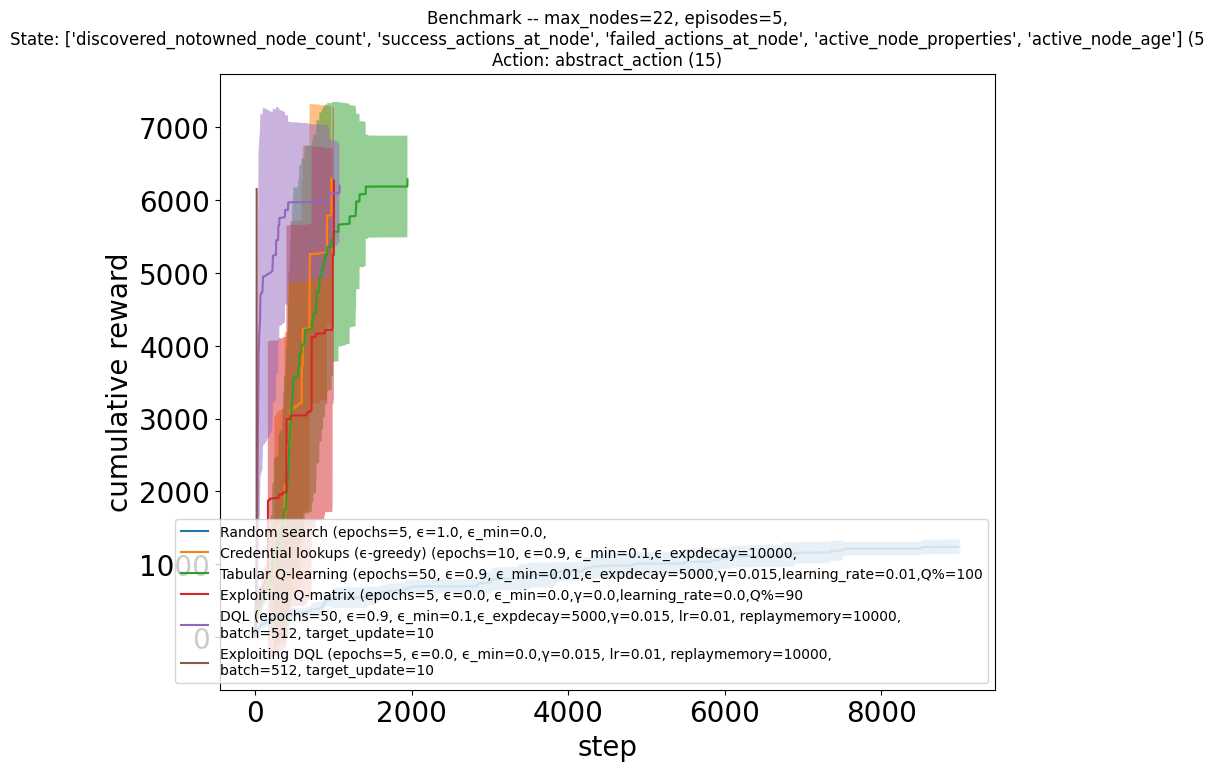

In [13]:
%matplotlib inline
# Compare and plot results for all the agents
all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
    save_at=os.path.join(plots_dir, "benchmark-chain-cumrewards.png"),
)

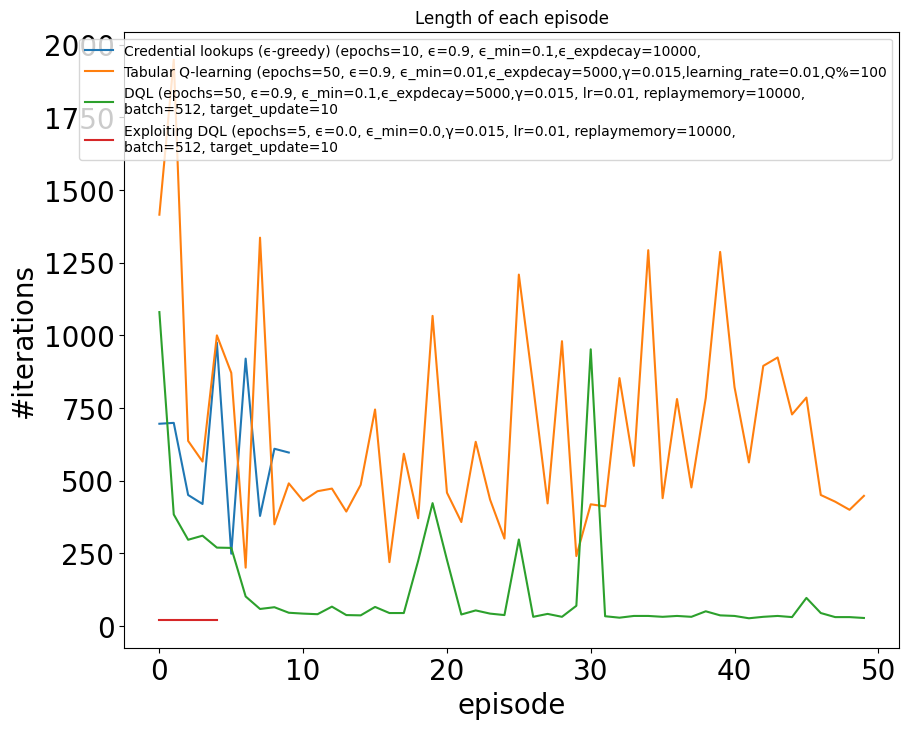

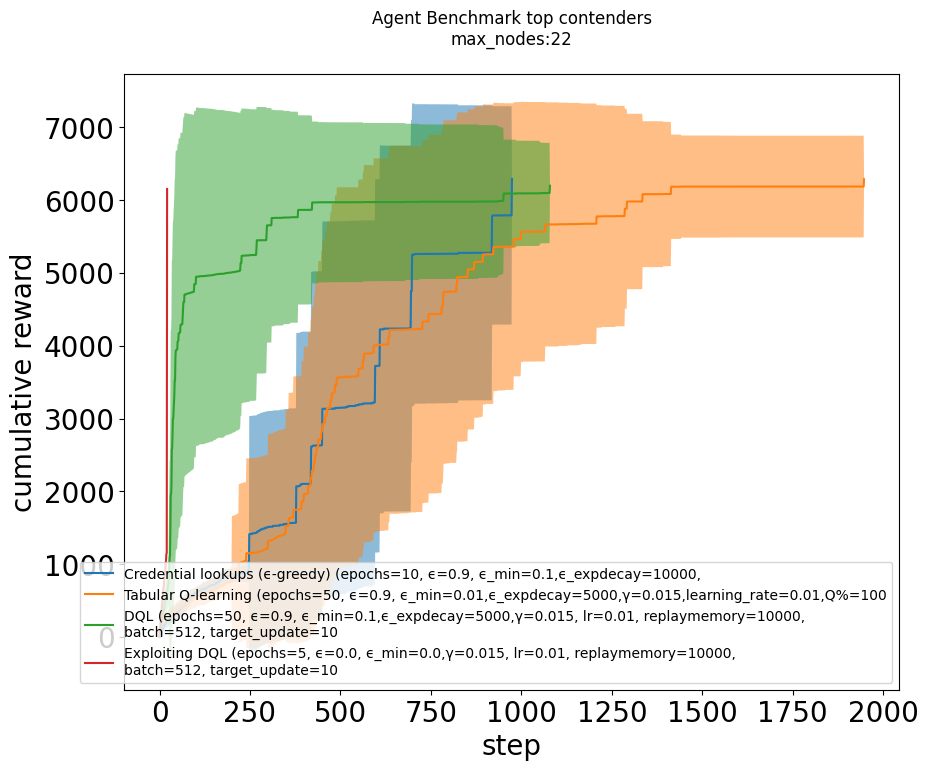

In [14]:
contenders = [credlookup_run, tabularq_run, dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(title=f"Agent Benchmark top contenders\n" f"max_nodes:{ep.maximum_node_count}\n", all_runs=contenders,
                                    save_at=os.path.join(plots_dir, "benchmark-chain-cumreward_contenders.png"))

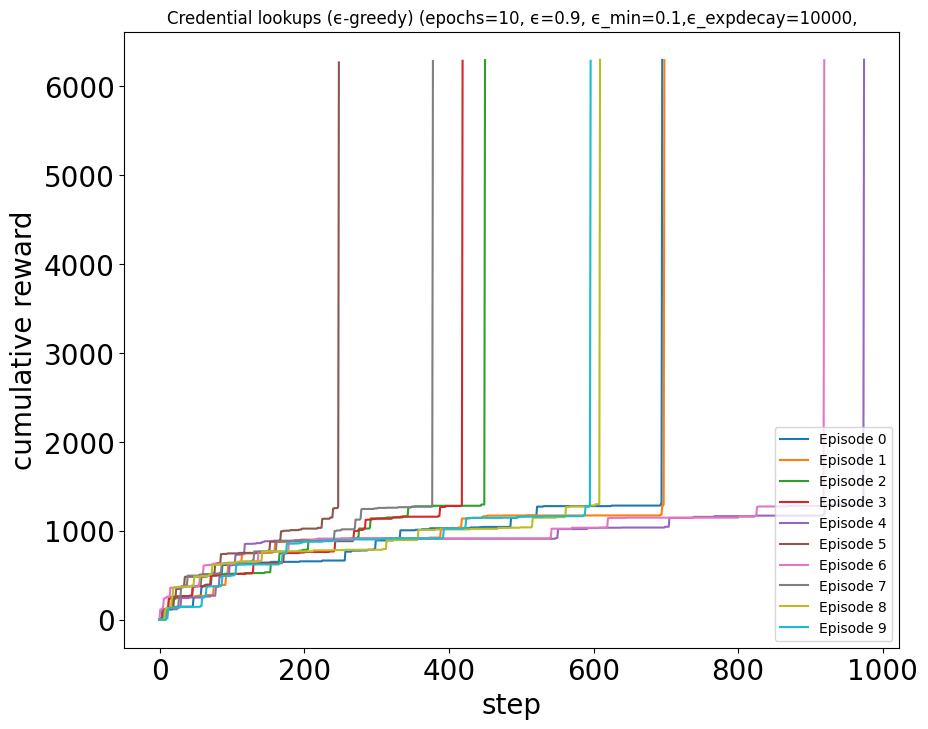

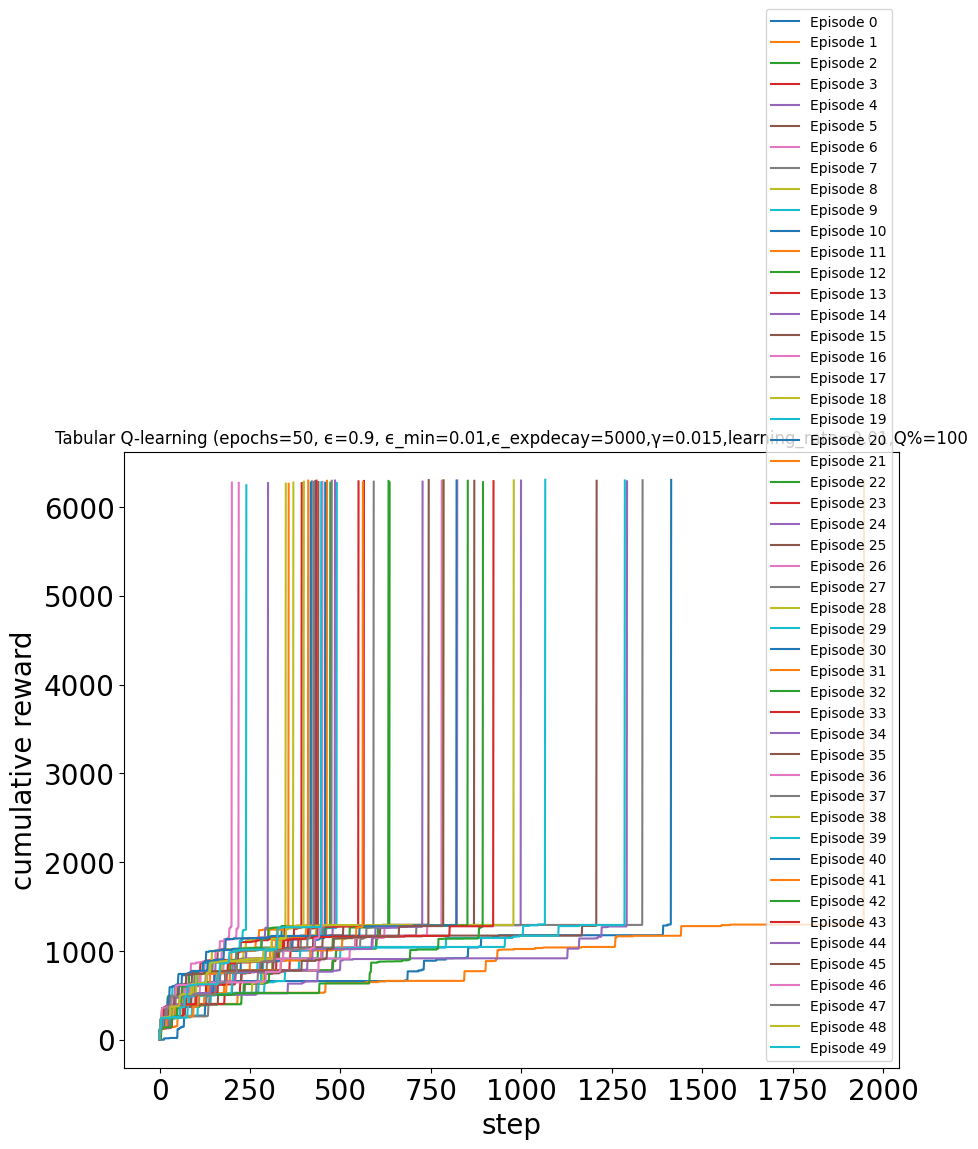

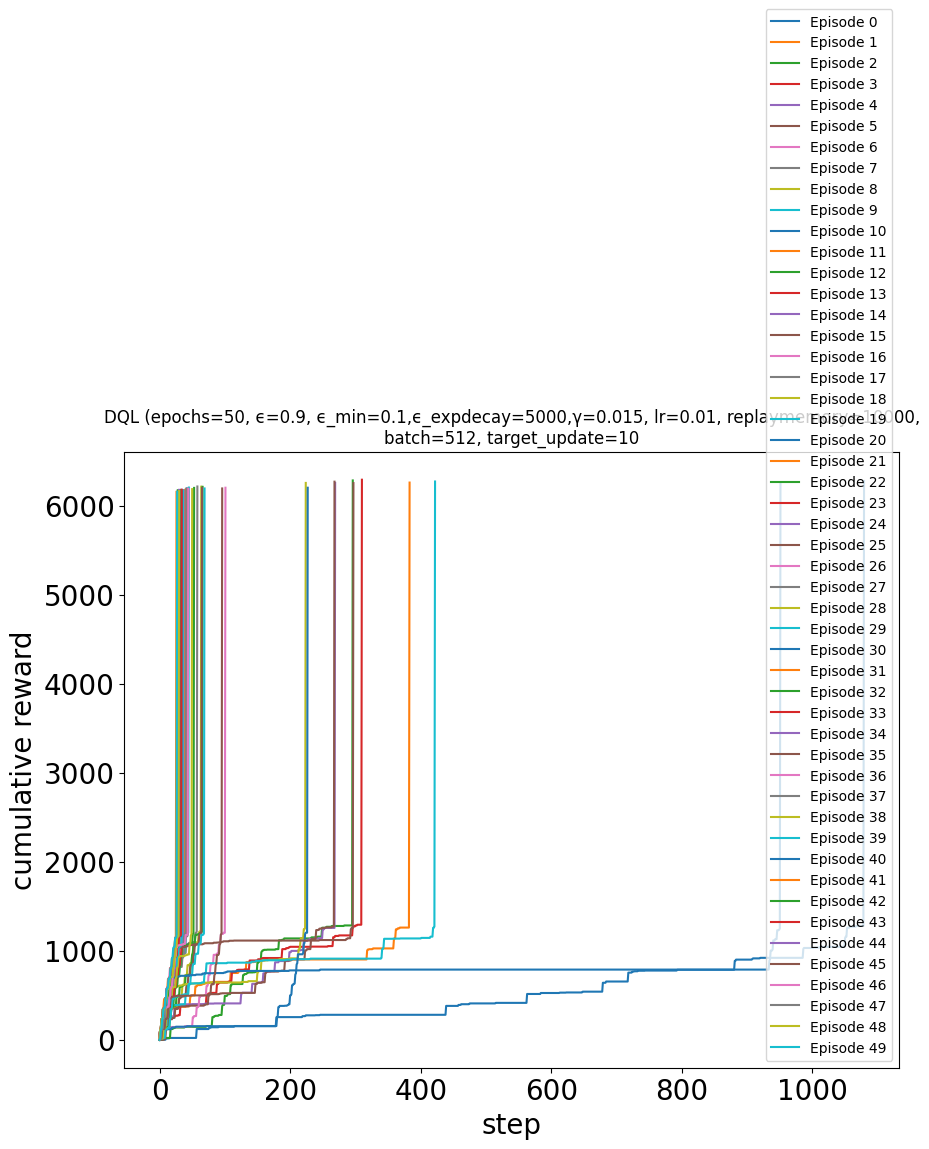

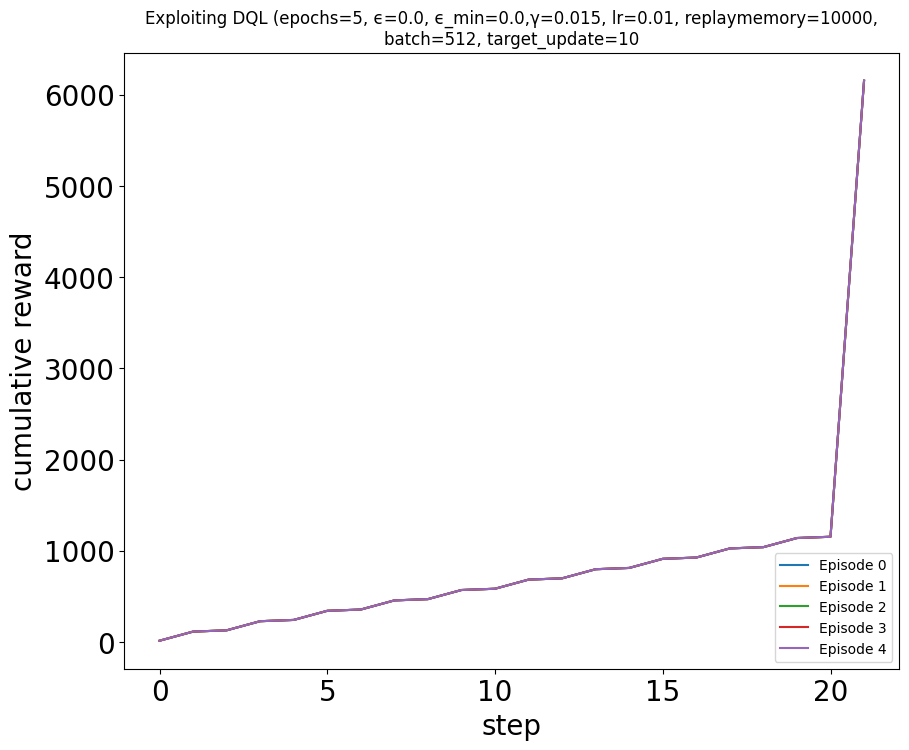

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)